In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import StratifiedKFold
import random

In [2]:
# Python optimisation variables
learning_rate = 0.0001
epochs = 500
dropout_rate = 0.15


In [3]:
filename = '/Users/vinitaboolchandani/nanolab/workspace/MDSimulation-Git/MDSimulation/jcs_paper_data.dat'

In [17]:
#data load
'''contents = open(filename).read().splitlines()
contents = contents[1:]
random.shuffle(contents)
input_params=[]
output_density=[]
pos_val=[]
error_bars = []
num_rows = 10 #len(contents)
for line in range(1, num_rows):
            line_arr = contents[line].split(",")
            input_params.append(list(map(float, line_arr[0:5])))
            pos_val.append(list(map(float, line_arr[5:155])))
            output_density.append(list(map(float, line_arr[155:305])))
            error_bars.append(list(map(float, line_arr[305:455])))
train_input,test_input=input_params[0:2432],input_params[2432:]
train_gt,test_gt=output_density[0:2432],output_density[2432:]'''


'contents = open(filename).read().splitlines()\ncontents = contents[1:]\nrandom.shuffle(contents)\ninput_params=[]\noutput_density=[]\npos_val=[]\nerror_bars = []\nnum_rows = 10 #len(contents)\nfor line in range(1, num_rows):\n            line_arr = contents[line].split(",")\n            input_params.append(list(map(float, line_arr[0:5])))\n            pos_val.append(list(map(float, line_arr[5:155])))\n            output_density.append(list(map(float, line_arr[155:305])))\n            error_bars.append(list(map(float, line_arr[305:455])))\ntrain_input,test_input=input_params[0:2432],input_params[2432:]\ntrain_gt,test_gt=output_density[0:2432],output_density[2432:]'

In [34]:
#data load
contents = open(filename).read().splitlines()
contents = contents[1:]
#random.shuffle(contents)
input_params=[]
output_density=[]
pos_val=[]
error_bars = []
num_rows = len(contents)
for line in range(1, num_rows-1):
            line_arr = contents[line].split(",")
            input_params.append(list(map(float, line_arr[0:5])))
            pos_val.append(list(map(float, line_arr[21:155])))   
            output_density.append(list(map(float, line_arr[171:305])))  
            #print(list(map(float,line_arr[305:454])))

#print("input params",input_params)
#print("output density:",len(output_density[0]))
#print("pos vals:",pos_val)

In [35]:
train_size = 3*num_rows//5
train_input,test_input=input_params[0:train_size],input_params[train_size:]
train_pos, test_pos = pos_val[0:train_size], pos_val[train_size:]
train_gt,test_gt=output_density[0:train_size],output_density[train_size:]

#print(train_gt)
#print(train_input)
print(len(test_gt), len(test_pos))

573 573


In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, input_shape=(5,), kernel_initializer=keras.initializers.glorot_normal(seed=None), kernel_constraint=maxnorm(3), activation="relu"),
  tf.keras.layers.Dropout(dropout_rate),
  tf.keras.layers.Dense(256, kernel_initializer=keras.initializers.glorot_normal(seed=None), kernel_constraint=maxnorm(3), activation="relu"),
  tf.keras.layers.Dropout(dropout_rate),
  tf.keras.layers.Dense(134, kernel_initializer=keras.initializers.glorot_normal(seed=None),activation="linear")
])

In [42]:
#Stochastic GD
sgd = SGD(lr=0.01, momentum=0.9)

In [43]:
#Compile the model
model.compile(optimizer='adam', loss="mean_squared_error", metrics=['accuracy'])

In [44]:
#skf = StratifiedKFold(n_splits=100, random_state=None, shuffle=False)
#for train_index, test_index in skf.split(np.array(input_params), np.array(output_density)):
#    print("TRAIN:", train_index, "TEST:", test_index)

In [45]:
model.fit(train_input, train_gt, epochs = 70000)


Epoch 1/70000
27/27 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.0580
Epoch 2/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.0684
Epoch 3/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.1195
Epoch 4/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 0.0974
Epoch 5/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.1160
Epoch 6/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.1079
Epoch 7/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.1195
Epoch 8/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.1148
Epoch 9/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 0.1183
Epoch 10/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0047 - accura

27/27 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.2517
Epoch 82/70000
27/27 [==============================] - 0s 1ms/step - loss: 9.3834e-04 - accuracy: 0.2506
Epoch 83/70000
27/27 [==============================] - 0s 1ms/step - loss: 9.4440e-04 - accuracy: 0.2668
Epoch 84/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.2854
Epoch 85/70000
27/27 [==============================] - 0s 1ms/step - loss: 9.9220e-04 - accuracy: 0.2633
Epoch 86/70000
27/27 [==============================] - 0s 1ms/step - loss: 9.1905e-04 - accuracy: 0.2715
Epoch 87/70000
27/27 [==============================] - 0s 1ms/step - loss: 9.7846e-04 - accuracy: 0.2355
Epoch 88/70000
27/27 [==============================] - 0s 1ms/step - loss: 8.6550e-04 - accuracy: 0.2726
Epoch 89/70000
27/27 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.2552
Epoch 90/70000
27/27 [==============================] - 0s 1ms/step - los

27/27 [==============================] - 0s 1ms/step - loss: 7.6032e-04 - accuracy: 0.3399
Epoch 159/70000
27/27 [==============================] - 0s 1ms/step - loss: 9.2942e-04 - accuracy: 0.3132
Epoch 160/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.6411e-04 - accuracy: 0.3411
Epoch 161/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0413e-04 - accuracy: 0.3364
Epoch 162/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.3434e-04 - accuracy: 0.3376
Epoch 163/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.0346e-04 - accuracy: 0.3573
Epoch 164/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.3284e-04 - accuracy: 0.3283
Epoch 165/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.4272e-04 - accuracy: 0.3341
Epoch 166/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.9222e-04 - accuracy: 0.3271
Epoch 167/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 5.6337e-04 - accuracy: 0.4037
Epoch 235/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9261e-04 - accuracy: 0.4084
Epoch 236/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.5045e-04 - accuracy: 0.3991
Epoch 237/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.8266e-04 - accuracy: 0.4049
Epoch 238/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.1372e-04 - accuracy: 0.3956
Epoch 239/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.1608e-04 - accuracy: 0.4084
Epoch 240/70000
27/27 [==============================] - 0s 2ms/step - loss: 7.5045e-04 - accuracy: 0.4269
Epoch 241/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.7342e-04 - accuracy: 0.4072
Epoch 242/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.1648e-04 - accuracy: 0.4014
Epoch 243/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 6.1598e-04 - accuracy: 0.4304
Epoch 311/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9801e-04 - accuracy: 0.4536
Epoch 312/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0061e-04 - accuracy: 0.4594
Epoch 313/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.1320e-04 - accuracy: 0.4397
Epoch 314/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7876e-04 - accuracy: 0.4490
Epoch 315/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.4938e-04 - accuracy: 0.4420
Epoch 316/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0061e-04 - accuracy: 0.4664
Epoch 317/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2586e-04 - accuracy: 0.4490
Epoch 318/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2369e-04 - accuracy: 0.4443
Epoch 319/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 5.3542e-04 - accuracy: 0.4536
Epoch 387/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0306e-04 - accuracy: 0.4698
Epoch 388/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5402e-04 - accuracy: 0.4513
Epoch 389/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9557e-04 - accuracy: 0.4826
Epoch 390/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5932e-04 - accuracy: 0.4722
Epoch 391/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6116e-04 - accuracy: 0.4594
Epoch 392/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3925e-04 - accuracy: 0.4629
Epoch 393/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2337e-04 - accuracy: 0.4606
Epoch 394/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.1507e-04 - accuracy: 0.4849
Epoch 395/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 5.6545e-04 - accuracy: 0.4606
Epoch 463/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9724e-04 - accuracy: 0.4640
Epoch 464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9661e-04 - accuracy: 0.4768
Epoch 465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6966e-04 - accuracy: 0.4675
Epoch 466/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.7365e-04 - accuracy: 0.4675
Epoch 467/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.3367e-04 - accuracy: 0.4536
Epoch 468/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.1834e-04 - accuracy: 0.4617
Epoch 469/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6037e-04 - accuracy: 0.4687
Epoch 470/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2821e-04 - accuracy: 0.4733
Epoch 471/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 5.4258e-04 - accuracy: 0.4791
Epoch 539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5235e-04 - accuracy: 0.4640
Epoch 540/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3953e-04 - accuracy: 0.4640
Epoch 541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7586e-04 - accuracy: 0.4606
Epoch 542/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3515e-04 - accuracy: 0.4698
Epoch 543/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6412e-04 - accuracy: 0.4675
Epoch 544/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6567e-04 - accuracy: 0.4664
Epoch 545/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0589e-04 - accuracy: 0.4513
Epoch 546/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3325e-04 - accuracy: 0.4675
Epoch 547/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 5.0986e-04 - accuracy: 0.4664
Epoch 615/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1764e-04 - accuracy: 0.4617
Epoch 616/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7891e-04 - accuracy: 0.4733
Epoch 617/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3667e-04 - accuracy: 0.4687
Epoch 618/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.7627e-04 - accuracy: 0.4756
Epoch 619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4745e-04 - accuracy: 0.4826
Epoch 620/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8063e-04 - accuracy: 0.4664
Epoch 621/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1818e-04 - accuracy: 0.4722
Epoch 622/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2027e-04 - accuracy: 0.4733
Epoch 623/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 5.1955e-04 - accuracy: 0.4803
Epoch 691/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3805e-04 - accuracy: 0.4675
Epoch 692/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6429e-04 - accuracy: 0.4594
Epoch 693/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5713e-04 - accuracy: 0.4652
Epoch 694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3444e-04 - accuracy: 0.4733
Epoch 695/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8755e-04 - accuracy: 0.4675
Epoch 696/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8328e-04 - accuracy: 0.4513
Epoch 697/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2865e-04 - accuracy: 0.4745
Epoch 698/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4179e-04 - accuracy: 0.4675
Epoch 699/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 4.7442e-04 - accuracy: 0.4640
Epoch 767/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0346e-04 - accuracy: 0.4617
Epoch 768/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3544e-04 - accuracy: 0.4675
Epoch 769/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2473e-04 - accuracy: 0.4814
Epoch 770/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6900e-04 - accuracy: 0.4664
Epoch 771/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1409e-04 - accuracy: 0.4490
Epoch 772/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2419e-04 - accuracy: 0.4606
Epoch 773/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0834e-04 - accuracy: 0.4698
Epoch 774/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0055e-04 - accuracy: 0.4687
Epoch 775/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 5.9387e-04 - accuracy: 0.4698
Epoch 843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9460e-04 - accuracy: 0.4640
Epoch 844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8563e-04 - accuracy: 0.4664
Epoch 845/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2297e-04 - accuracy: 0.4710
Epoch 846/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6428e-04 - accuracy: 0.4768
Epoch 847/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1574e-04 - accuracy: 0.4617
Epoch 848/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.7099e-04 - accuracy: 0.4617
Epoch 849/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9863e-04 - accuracy: 0.4490
Epoch 850/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0333e-04 - accuracy: 0.4664
Epoch 851/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 4.8019e-04 - accuracy: 0.4664
Epoch 919/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3865e-04 - accuracy: 0.4896
Epoch 920/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0561e-04 - accuracy: 0.4722
Epoch 921/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6790e-04 - accuracy: 0.4826
Epoch 922/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5744e-04 - accuracy: 0.4571
Epoch 923/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4457e-04 - accuracy: 0.4814
Epoch 924/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5902e-04 - accuracy: 0.4710
Epoch 925/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6769e-04 - accuracy: 0.4687
Epoch 926/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5351e-04 - accuracy: 0.4640
Epoch 927/70000
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 5.3852e-04 - accuracy: 0.4838
Epoch 995/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3314e-04 - accuracy: 0.4664
Epoch 996/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0271e-04 - accuracy: 0.4733
Epoch 997/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9020e-04 - accuracy: 0.4617
Epoch 998/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2114e-04 - accuracy: 0.4640
Epoch 999/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9873e-04 - accuracy: 0.4838
Epoch 1000/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5818e-04 - accuracy: 0.4733
Epoch 1001/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5297e-04 - accuracy: 0.4814
Epoch 1002/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2999e-04 - accuracy: 0.4606
Epoch 1003/70000
27/27 [==========================

27/27 [==============================] - 0s 1ms/step - loss: 4.7979e-04 - accuracy: 0.4780
Epoch 1071/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9881e-04 - accuracy: 0.4756
Epoch 1072/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4851e-04 - accuracy: 0.4594
Epoch 1073/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.3909e-04 - accuracy: 0.4606
Epoch 1074/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9058e-04 - accuracy: 0.4640
Epoch 1075/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9710e-04 - accuracy: 0.4687
Epoch 1076/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8590e-04 - accuracy: 0.4687
Epoch 1077/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2549e-04 - accuracy: 0.4780
Epoch 1078/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8029e-04 - accuracy: 0.4780
Epoch 1079/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.1808e-04 - accuracy: 0.4710
Epoch 1147/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.4067e-04 - accuracy: 0.4710
Epoch 1148/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2278e-04 - accuracy: 0.4768
Epoch 1149/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1159e-04 - accuracy: 0.4652
Epoch 1150/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6748e-04 - accuracy: 0.4710
Epoch 1151/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6110e-04 - accuracy: 0.4849
Epoch 1152/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.9819e-04 - accuracy: 0.4606
Epoch 1153/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.5735e-04 - accuracy: 0.4803
Epoch 1154/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7568e-04 - accuracy: 0.4640
Epoch 1155/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.0016e-04 - accuracy: 0.4664
Epoch 1223/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8057e-04 - accuracy: 0.4652
Epoch 1224/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1139e-04 - accuracy: 0.4698
Epoch 1225/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6087e-04 - accuracy: 0.4733
Epoch 1226/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0906e-04 - accuracy: 0.4582
Epoch 1227/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3574e-04 - accuracy: 0.4710
Epoch 1228/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7853e-04 - accuracy: 0.4617
Epoch 1229/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8241e-04 - accuracy: 0.4733
Epoch 1230/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0438e-04 - accuracy: 0.4571
Epoch 1231/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.9163e-04 - accuracy: 0.4617
Epoch 1299/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7248e-04 - accuracy: 0.4664
Epoch 1300/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7342e-04 - accuracy: 0.4780
Epoch 1301/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1484e-04 - accuracy: 0.4710
Epoch 1302/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8867e-04 - accuracy: 0.4571
Epoch 1303/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1932e-04 - accuracy: 0.4838
Epoch 1304/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4647e-04 - accuracy: 0.4756
Epoch 1305/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6716e-04 - accuracy: 0.4745
Epoch 1306/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9557e-04 - accuracy: 0.4733
Epoch 1307/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.8387e-04 - accuracy: 0.4652
Epoch 1375/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9000e-04 - accuracy: 0.4722
Epoch 1376/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1218e-04 - accuracy: 0.4675
Epoch 1377/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1075e-04 - accuracy: 0.4722
Epoch 1378/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8605e-04 - accuracy: 0.4617
Epoch 1379/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4281e-04 - accuracy: 0.4594
Epoch 1380/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0188e-04 - accuracy: 0.4548
Epoch 1381/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6605e-04 - accuracy: 0.4652
Epoch 1382/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8370e-04 - accuracy: 0.4710
Epoch 1383/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.9743e-04 - accuracy: 0.4710
Epoch 1451/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2940e-04 - accuracy: 0.4640
Epoch 1452/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5598e-04 - accuracy: 0.4629
Epoch 1453/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.0366e-04 - accuracy: 0.4606
Epoch 1454/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1751e-04 - accuracy: 0.4826
Epoch 1455/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8863e-04 - accuracy: 0.4629
Epoch 1456/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1696e-04 - accuracy: 0.4710
Epoch 1457/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8990e-04 - accuracy: 0.4780
Epoch 1458/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6058e-04 - accuracy: 0.4710
Epoch 1459/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.0520e-04 - accuracy: 0.4826
Epoch 1527/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0515e-04 - accuracy: 0.4664
Epoch 1528/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1778e-04 - accuracy: 0.4745
Epoch 1529/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7978e-04 - accuracy: 0.4722
Epoch 1530/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1358e-04 - accuracy: 0.4803
Epoch 1531/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3604e-04 - accuracy: 0.4524
Epoch 1532/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1750e-04 - accuracy: 0.4698
Epoch 1533/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7480e-04 - accuracy: 0.4698
Epoch 1534/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8162e-04 - accuracy: 0.4536
Epoch 1535/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.0749e-04 - accuracy: 0.4640
Epoch 1603/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8887e-04 - accuracy: 0.4710
Epoch 1604/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0094e-04 - accuracy: 0.4675
Epoch 1605/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3086e-04 - accuracy: 0.4768
Epoch 1606/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5765e-04 - accuracy: 0.4745
Epoch 1607/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8658e-04 - accuracy: 0.4675
Epoch 1608/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9533e-04 - accuracy: 0.4698
Epoch 1609/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2049e-04 - accuracy: 0.4768
Epoch 1610/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.5070e-04 - accuracy: 0.4698
Epoch 1611/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.5453e-04 - accuracy: 0.4640
Epoch 1679/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9512e-04 - accuracy: 0.4722
Epoch 1680/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7090e-04 - accuracy: 0.4582
Epoch 1681/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1684e-04 - accuracy: 0.4698
Epoch 1682/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3028e-04 - accuracy: 0.4791
Epoch 1683/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7245e-04 - accuracy: 0.4629
Epoch 1684/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3056e-04 - accuracy: 0.4849
Epoch 1685/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6530e-04 - accuracy: 0.4640
Epoch 1686/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0280e-04 - accuracy: 0.4745
Epoch 1687/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7759e-04 - accuracy: 0.4780
Epoch 1755/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4827e-04 - accuracy: 0.4629
Epoch 1756/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0822e-04 - accuracy: 0.4594
Epoch 1757/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4178e-04 - accuracy: 0.4652
Epoch 1758/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9086e-04 - accuracy: 0.4698
Epoch 1759/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1997e-04 - accuracy: 0.4617
Epoch 1760/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7912e-04 - accuracy: 0.4838
Epoch 1761/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9064e-04 - accuracy: 0.4664
Epoch 1762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8420e-04 - accuracy: 0.4768
Epoch 1763/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.9897e-04 - accuracy: 0.4698
Epoch 1831/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8191e-04 - accuracy: 0.4594
Epoch 1832/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2356e-04 - accuracy: 0.4733
Epoch 1833/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5432e-04 - accuracy: 0.4687
Epoch 1834/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4129e-04 - accuracy: 0.4594
Epoch 1835/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0380e-04 - accuracy: 0.4710
Epoch 1836/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1082e-04 - accuracy: 0.4710
Epoch 1837/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2469e-04 - accuracy: 0.4768
Epoch 1838/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0083e-04 - accuracy: 0.4640
Epoch 1839/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2229e-04 - accuracy: 0.4687
Epoch 1907/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5135e-04 - accuracy: 0.4687
Epoch 1908/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1066e-04 - accuracy: 0.4548
Epoch 1909/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0017e-04 - accuracy: 0.4640
Epoch 1910/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0001e-04 - accuracy: 0.4849
Epoch 1911/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6859e-04 - accuracy: 0.4861
Epoch 1912/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1792e-04 - accuracy: 0.4652
Epoch 1913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3334e-04 - accuracy: 0.4756
Epoch 1914/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0398e-04 - accuracy: 0.4745
Epoch 1915/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.2292e-04 - accuracy: 0.4710
Epoch 1983/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7566e-04 - accuracy: 0.4652
Epoch 1984/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7141e-04 - accuracy: 0.4687
Epoch 1985/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5662e-04 - accuracy: 0.4698
Epoch 1986/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6346e-04 - accuracy: 0.4780
Epoch 1987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6256e-04 - accuracy: 0.4733
Epoch 1988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7633e-04 - accuracy: 0.4675
Epoch 1989/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3883e-04 - accuracy: 0.4652
Epoch 1990/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6418e-04 - accuracy: 0.4513
Epoch 1991/70000
27/27 [=====================

27/27 [==============================] - 0s 2ms/step - loss: 4.6877e-04 - accuracy: 0.4768
Epoch 2059/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7922e-04 - accuracy: 0.4745
Epoch 2060/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6099e-04 - accuracy: 0.4652
Epoch 2061/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1008e-04 - accuracy: 0.4652
Epoch 2062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8386e-04 - accuracy: 0.4710
Epoch 2063/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1047e-04 - accuracy: 0.4571
Epoch 2064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5281e-04 - accuracy: 0.4814
Epoch 2065/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6065e-04 - accuracy: 0.4675
Epoch 2066/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0944e-04 - accuracy: 0.4733
Epoch 2067/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2402e-04 - accuracy: 0.4791
Epoch 2135/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0117e-04 - accuracy: 0.4838
Epoch 2136/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.5169e-04 - accuracy: 0.4664
Epoch 2137/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6326e-04 - accuracy: 0.4687
Epoch 2138/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3852e-04 - accuracy: 0.4722
Epoch 2139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4432e-04 - accuracy: 0.4803
Epoch 2140/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0066e-04 - accuracy: 0.4803
Epoch 2141/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1354e-04 - accuracy: 0.4733
Epoch 2142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8021e-04 - accuracy: 0.4756
Epoch 2143/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.2438e-04 - accuracy: 0.4722
Epoch 2211/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1358e-04 - accuracy: 0.4675
Epoch 2212/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7573e-04 - accuracy: 0.4745
Epoch 2213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7121e-04 - accuracy: 0.4698
Epoch 2214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4206e-04 - accuracy: 0.4930
Epoch 2215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6484e-04 - accuracy: 0.4814
Epoch 2216/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0430e-04 - accuracy: 0.4745
Epoch 2217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6039e-04 - accuracy: 0.4698
Epoch 2218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7229e-04 - accuracy: 0.4640
Epoch 2219/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7751e-04 - accuracy: 0.4664
Epoch 2287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6399e-04 - accuracy: 0.4710
Epoch 2288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1507e-04 - accuracy: 0.4687
Epoch 2289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8959e-04 - accuracy: 0.4687
Epoch 2290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5049e-04 - accuracy: 0.4652
Epoch 2291/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9783e-04 - accuracy: 0.4768
Epoch 2292/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3041e-04 - accuracy: 0.4640
Epoch 2293/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.1720e-04 - accuracy: 0.4664
Epoch 2294/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3255e-04 - accuracy: 0.4501
Epoch 2295/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2208e-04 - accuracy: 0.4582
Epoch 2363/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3847e-04 - accuracy: 0.4652
Epoch 2364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6192e-04 - accuracy: 0.4733
Epoch 2365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4604e-04 - accuracy: 0.4652
Epoch 2366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3913e-04 - accuracy: 0.4698
Epoch 2367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6865e-04 - accuracy: 0.4617
Epoch 2368/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3883e-04 - accuracy: 0.4675
Epoch 2369/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1590e-04 - accuracy: 0.4629
Epoch 2370/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6335e-04 - accuracy: 0.4640
Epoch 2371/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6921e-04 - accuracy: 0.4652
Epoch 2439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8020e-04 - accuracy: 0.4791
Epoch 2440/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1368e-04 - accuracy: 0.4687
Epoch 2441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6758e-04 - accuracy: 0.4768
Epoch 2442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5705e-04 - accuracy: 0.4640
Epoch 2443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6698e-04 - accuracy: 0.4664
Epoch 2444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4767e-04 - accuracy: 0.4722
Epoch 2445/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5293e-04 - accuracy: 0.4687
Epoch 2446/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6426e-04 - accuracy: 0.4617
Epoch 2447/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6636e-04 - accuracy: 0.4768
Epoch 2515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5006e-04 - accuracy: 0.4629
Epoch 2516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6497e-04 - accuracy: 0.4768
Epoch 2517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5444e-04 - accuracy: 0.4594
Epoch 2518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5392e-04 - accuracy: 0.4896
Epoch 2519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7517e-04 - accuracy: 0.4698
Epoch 2520/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7183e-04 - accuracy: 0.4838
Epoch 2521/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0151e-04 - accuracy: 0.4640
Epoch 2522/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4407e-04 - accuracy: 0.4664
Epoch 2523/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.8805e-04 - accuracy: 0.4710
Epoch 2591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8587e-04 - accuracy: 0.4722
Epoch 2592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5858e-04 - accuracy: 0.4617
Epoch 2593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7544e-04 - accuracy: 0.4652
Epoch 2594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7762e-04 - accuracy: 0.4675
Epoch 2595/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9037e-04 - accuracy: 0.4791
Epoch 2596/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2975e-04 - accuracy: 0.4664
Epoch 2597/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6862e-04 - accuracy: 0.4524
Epoch 2598/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2988e-04 - accuracy: 0.4687
Epoch 2599/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2241e-04 - accuracy: 0.4756
Epoch 2667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8954e-04 - accuracy: 0.4698
Epoch 2668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9593e-04 - accuracy: 0.4872
Epoch 2669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7792e-04 - accuracy: 0.4675
Epoch 2670/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8293e-04 - accuracy: 0.4710
Epoch 2671/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7072e-04 - accuracy: 0.4768
Epoch 2672/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1794e-04 - accuracy: 0.4814
Epoch 2673/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9077e-04 - accuracy: 0.4675
Epoch 2674/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8555e-04 - accuracy: 0.4768
Epoch 2675/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7188e-04 - accuracy: 0.4698
Epoch 2743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6947e-04 - accuracy: 0.4698
Epoch 2744/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8090e-04 - accuracy: 0.4826
Epoch 2745/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8906e-04 - accuracy: 0.4768
Epoch 2746/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3567e-04 - accuracy: 0.4722
Epoch 2747/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5575e-04 - accuracy: 0.4733
Epoch 2748/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6077e-04 - accuracy: 0.4652
Epoch 2749/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6840e-04 - accuracy: 0.4710
Epoch 2750/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5252e-04 - accuracy: 0.4722
Epoch 2751/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.9958e-04 - accuracy: 0.4814
Epoch 2819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6597e-04 - accuracy: 0.4768
Epoch 2820/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3909e-04 - accuracy: 0.4745
Epoch 2821/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9162e-04 - accuracy: 0.4838
Epoch 2822/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0441e-04 - accuracy: 0.4629
Epoch 2823/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9981e-04 - accuracy: 0.4629
Epoch 2824/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2745e-04 - accuracy: 0.4687
Epoch 2825/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5052e-04 - accuracy: 0.4617
Epoch 2826/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3652e-04 - accuracy: 0.4548
Epoch 2827/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.9309e-04 - accuracy: 0.4722
Epoch 2895/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3072e-04 - accuracy: 0.4594
Epoch 2896/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1752e-04 - accuracy: 0.4745
Epoch 2897/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5278e-04 - accuracy: 0.4884
Epoch 2898/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8641e-04 - accuracy: 0.4780
Epoch 2899/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6658e-04 - accuracy: 0.4733
Epoch 2900/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0408e-04 - accuracy: 0.4722
Epoch 2901/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4933e-04 - accuracy: 0.4536
Epoch 2902/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7678e-04 - accuracy: 0.4606
Epoch 2903/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3242e-04 - accuracy: 0.4803
Epoch 2971/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7421e-04 - accuracy: 0.4664
Epoch 2972/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4895e-04 - accuracy: 0.4733
Epoch 2973/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5480e-04 - accuracy: 0.4629
Epoch 2974/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2683e-04 - accuracy: 0.4826
Epoch 2975/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8417e-04 - accuracy: 0.4698
Epoch 2976/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7738e-04 - accuracy: 0.4664
Epoch 2977/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2693e-04 - accuracy: 0.4664
Epoch 2978/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9047e-04 - accuracy: 0.4640
Epoch 2979/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3173e-04 - accuracy: 0.4606
Epoch 3047/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0468e-04 - accuracy: 0.4803
Epoch 3048/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6207e-04 - accuracy: 0.4826
Epoch 3049/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6543e-04 - accuracy: 0.4756
Epoch 3050/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0471e-04 - accuracy: 0.4675
Epoch 3051/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6683e-04 - accuracy: 0.4629
Epoch 3052/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8564e-04 - accuracy: 0.4722
Epoch 3053/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9083e-04 - accuracy: 0.4849
Epoch 3054/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1081e-04 - accuracy: 0.4606
Epoch 3055/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.5194e-04 - accuracy: 0.4582
Epoch 3123/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3355e-04 - accuracy: 0.4780
Epoch 3124/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7457e-04 - accuracy: 0.4710
Epoch 3125/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9480e-04 - accuracy: 0.4664
Epoch 3126/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7049e-04 - accuracy: 0.4756
Epoch 3127/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4063e-04 - accuracy: 0.4698
Epoch 3128/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3382e-04 - accuracy: 0.4791
Epoch 3129/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3556e-04 - accuracy: 0.4548
Epoch 3130/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4267e-04 - accuracy: 0.4687
Epoch 3131/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.4580e-04 - accuracy: 0.4791
Epoch 3199/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3685e-04 - accuracy: 0.4745
Epoch 3200/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8733e-04 - accuracy: 0.4710
Epoch 3201/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2802e-04 - accuracy: 0.4814
Epoch 3202/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9633e-04 - accuracy: 0.4478
Epoch 3203/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7925e-04 - accuracy: 0.4629
Epoch 3204/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4586e-04 - accuracy: 0.4594
Epoch 3205/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0457e-04 - accuracy: 0.4745
Epoch 3206/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1733e-04 - accuracy: 0.4652
Epoch 3207/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.1914e-04 - accuracy: 0.4640
Epoch 3275/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9686e-04 - accuracy: 0.4687
Epoch 3276/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0295e-04 - accuracy: 0.4652
Epoch 3277/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0591e-04 - accuracy: 0.4675
Epoch 3278/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1615e-04 - accuracy: 0.4617
Epoch 3279/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2401e-04 - accuracy: 0.4745
Epoch 3280/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2425e-04 - accuracy: 0.4698
Epoch 3281/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0647e-04 - accuracy: 0.4756
Epoch 3282/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9743e-04 - accuracy: 0.4861
Epoch 3283/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.2803e-04 - accuracy: 0.4780
Epoch 3351/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6900e-04 - accuracy: 0.4606
Epoch 3352/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2476e-04 - accuracy: 0.4698
Epoch 3353/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6772e-04 - accuracy: 0.4756
Epoch 3354/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1454e-04 - accuracy: 0.4617
Epoch 3355/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8414e-04 - accuracy: 0.4722
Epoch 3356/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5911e-04 - accuracy: 0.4652
Epoch 3357/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1378e-04 - accuracy: 0.4826
Epoch 3358/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9073e-04 - accuracy: 0.4722
Epoch 3359/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5153e-04 - accuracy: 0.4733
Epoch 3427/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7805e-04 - accuracy: 0.4814
Epoch 3428/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.5352e-04 - accuracy: 0.4722
Epoch 3429/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7894e-04 - accuracy: 0.4710
Epoch 3430/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9357e-04 - accuracy: 0.4791
Epoch 3431/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6994e-04 - accuracy: 0.4745
Epoch 3432/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7115e-04 - accuracy: 0.4606
Epoch 3433/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7892e-04 - accuracy: 0.4733
Epoch 3434/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8292e-04 - accuracy: 0.4687
Epoch 3435/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.8872e-04 - accuracy: 0.4698
Epoch 3503/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0323e-04 - accuracy: 0.4768
Epoch 3504/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0285e-04 - accuracy: 0.4780
Epoch 3505/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3325e-04 - accuracy: 0.4849
Epoch 3506/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9124e-04 - accuracy: 0.4640
Epoch 3507/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5661e-04 - accuracy: 0.4814
Epoch 3508/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7903e-04 - accuracy: 0.4698
Epoch 3509/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2335e-04 - accuracy: 0.4733
Epoch 3510/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0447e-04 - accuracy: 0.4652
Epoch 3511/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.1431e-04 - accuracy: 0.4687
Epoch 3579/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1355e-04 - accuracy: 0.4640
Epoch 3580/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4126e-04 - accuracy: 0.4733
Epoch 3581/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9612e-04 - accuracy: 0.4907
Epoch 3582/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7483e-04 - accuracy: 0.4745
Epoch 3583/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8504e-04 - accuracy: 0.4872
Epoch 3584/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0022e-04 - accuracy: 0.4768
Epoch 3585/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7551e-04 - accuracy: 0.4803
Epoch 3586/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1687e-04 - accuracy: 0.4652
Epoch 3587/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7796e-04 - accuracy: 0.4722
Epoch 3655/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3087e-04 - accuracy: 0.4768
Epoch 3656/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7460e-04 - accuracy: 0.4664
Epoch 3657/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0858e-04 - accuracy: 0.4838
Epoch 3658/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1879e-04 - accuracy: 0.4698
Epoch 3659/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9050e-04 - accuracy: 0.4548
Epoch 3660/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9690e-04 - accuracy: 0.4768
Epoch 3661/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0529e-04 - accuracy: 0.4780
Epoch 3662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5176e-04 - accuracy: 0.4710
Epoch 3663/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.8972e-04 - accuracy: 0.4675
Epoch 3731/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4789e-04 - accuracy: 0.4687
Epoch 3732/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2401e-04 - accuracy: 0.4513
Epoch 3733/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5141e-04 - accuracy: 0.4617
Epoch 3734/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1699e-04 - accuracy: 0.4826
Epoch 3735/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3722e-04 - accuracy: 0.4768
Epoch 3736/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1232e-04 - accuracy: 0.4536
Epoch 3737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7660e-04 - accuracy: 0.4640
Epoch 3738/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0836e-04 - accuracy: 0.4826
Epoch 3739/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5177e-04 - accuracy: 0.4803
Epoch 3807/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2241e-04 - accuracy: 0.4861
Epoch 3808/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3256e-04 - accuracy: 0.4640
Epoch 3809/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0916e-04 - accuracy: 0.4652
Epoch 3810/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7394e-04 - accuracy: 0.4664
Epoch 3811/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4117e-04 - accuracy: 0.4629
Epoch 3812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7021e-04 - accuracy: 0.4791
Epoch 3813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5418e-04 - accuracy: 0.4710
Epoch 3814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7109e-04 - accuracy: 0.4907
Epoch 3815/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.1863e-04 - accuracy: 0.4791
Epoch 3883/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9590e-04 - accuracy: 0.4722
Epoch 3884/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9302e-04 - accuracy: 0.4768
Epoch 3885/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8175e-04 - accuracy: 0.4733
Epoch 3886/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9369e-04 - accuracy: 0.4733
Epoch 3887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7269e-04 - accuracy: 0.4710
Epoch 3888/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0291e-04 - accuracy: 0.4606
Epoch 3889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4508e-04 - accuracy: 0.4687
Epoch 3890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9724e-04 - accuracy: 0.4768
Epoch 3891/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2585e-04 - accuracy: 0.4629
Epoch 3959/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3639e-04 - accuracy: 0.4745
Epoch 3960/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4582e-04 - accuracy: 0.4826
Epoch 3961/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5592e-04 - accuracy: 0.4756
Epoch 3962/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.7380e-04 - accuracy: 0.4791
Epoch 3963/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.3634e-04 - accuracy: 0.4838
Epoch 3964/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5988e-04 - accuracy: 0.4733
Epoch 3965/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2156e-04 - accuracy: 0.4710
Epoch 3966/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0728e-04 - accuracy: 0.4745
Epoch 3967/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.2464e-04 - accuracy: 0.4698
Epoch 4035/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5415e-04 - accuracy: 0.4710
Epoch 4036/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7715e-04 - accuracy: 0.4501
Epoch 4037/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2983e-04 - accuracy: 0.4675
Epoch 4038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3982e-04 - accuracy: 0.4664
Epoch 4039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3727e-04 - accuracy: 0.4791
Epoch 4040/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1553e-04 - accuracy: 0.4733
Epoch 4041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6186e-04 - accuracy: 0.4756
Epoch 4042/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3928e-04 - accuracy: 0.4606
Epoch 4043/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7952e-04 - accuracy: 0.4548
Epoch 4111/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7554e-04 - accuracy: 0.4849
Epoch 4112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3498e-04 - accuracy: 0.4617
Epoch 4113/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0714e-04 - accuracy: 0.4640
Epoch 4114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3001e-04 - accuracy: 0.4756
Epoch 4115/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2253e-04 - accuracy: 0.4652
Epoch 4116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7317e-04 - accuracy: 0.4768
Epoch 4117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7149e-04 - accuracy: 0.4849
Epoch 4118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7604e-04 - accuracy: 0.4629
Epoch 4119/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2210e-04 - accuracy: 0.4617
Epoch 4187/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1806e-04 - accuracy: 0.4652
Epoch 4188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9264e-04 - accuracy: 0.4675
Epoch 4189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7766e-04 - accuracy: 0.4675
Epoch 4190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4136e-04 - accuracy: 0.4629
Epoch 4191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4786e-04 - accuracy: 0.4559
Epoch 4192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6802e-04 - accuracy: 0.4548
Epoch 4193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2988e-04 - accuracy: 0.4710
Epoch 4194/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9275e-04 - accuracy: 0.4756
Epoch 4195/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6900e-04 - accuracy: 0.4710
Epoch 4263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3799e-04 - accuracy: 0.4780
Epoch 4264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4321e-04 - accuracy: 0.4780
Epoch 4265/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2181e-04 - accuracy: 0.4582
Epoch 4266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8511e-04 - accuracy: 0.4745
Epoch 4267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4552e-04 - accuracy: 0.4907
Epoch 4268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5068e-04 - accuracy: 0.4640
Epoch 4269/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1417e-04 - accuracy: 0.4606
Epoch 4270/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5636e-04 - accuracy: 0.4780
Epoch 4271/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2252e-04 - accuracy: 0.4884
Epoch 4339/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1683e-04 - accuracy: 0.4548
Epoch 4340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8219e-04 - accuracy: 0.4710
Epoch 4341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6308e-04 - accuracy: 0.4745
Epoch 4342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7839e-04 - accuracy: 0.4652
Epoch 4343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8211e-04 - accuracy: 0.4698
Epoch 4344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7564e-04 - accuracy: 0.4675
Epoch 4345/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5852e-04 - accuracy: 0.4640
Epoch 4346/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0417e-04 - accuracy: 0.4780
Epoch 4347/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.1307e-04 - accuracy: 0.4756
Epoch 4415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2067e-04 - accuracy: 0.4733
Epoch 4416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5065e-04 - accuracy: 0.4617
Epoch 4417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7732e-04 - accuracy: 0.4733
Epoch 4418/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0295e-04 - accuracy: 0.4780
Epoch 4419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8510e-04 - accuracy: 0.4698
Epoch 4420/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2141e-04 - accuracy: 0.4698
Epoch 4421/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6198e-04 - accuracy: 0.4791
Epoch 4422/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3345e-04 - accuracy: 0.4745
Epoch 4423/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6281e-04 - accuracy: 0.4780
Epoch 4491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8400e-04 - accuracy: 0.4710
Epoch 4492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8715e-04 - accuracy: 0.4629
Epoch 4493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8239e-04 - accuracy: 0.4582
Epoch 4494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6203e-04 - accuracy: 0.4826
Epoch 4495/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9365e-04 - accuracy: 0.4698
Epoch 4496/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6873e-04 - accuracy: 0.4791
Epoch 4497/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9345e-04 - accuracy: 0.4826
Epoch 4498/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5893e-04 - accuracy: 0.4629
Epoch 4499/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2847e-04 - accuracy: 0.4582
Epoch 4567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1981e-04 - accuracy: 0.4664
Epoch 4568/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9535e-04 - accuracy: 0.4652
Epoch 4569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3893e-04 - accuracy: 0.4652
Epoch 4570/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8835e-04 - accuracy: 0.4617
Epoch 4571/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3381e-04 - accuracy: 0.4768
Epoch 4572/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0224e-04 - accuracy: 0.4722
Epoch 4573/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5362e-04 - accuracy: 0.4664
Epoch 4574/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4915e-04 - accuracy: 0.4861
Epoch 4575/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5342e-04 - accuracy: 0.4756
Epoch 4643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4161e-04 - accuracy: 0.4582
Epoch 4644/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4843e-04 - accuracy: 0.4780
Epoch 4645/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5889e-04 - accuracy: 0.4652
Epoch 4646/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9669e-04 - accuracy: 0.4698
Epoch 4647/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3305e-04 - accuracy: 0.4745
Epoch 4648/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5052e-04 - accuracy: 0.4652
Epoch 4649/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5161e-04 - accuracy: 0.4606
Epoch 4650/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5635e-04 - accuracy: 0.4629
Epoch 4651/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7020e-04 - accuracy: 0.4745
Epoch 4719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7083e-04 - accuracy: 0.4594
Epoch 4720/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8193e-04 - accuracy: 0.4814
Epoch 4721/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2960e-04 - accuracy: 0.4710
Epoch 4722/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4414e-04 - accuracy: 0.4559
Epoch 4723/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4129e-04 - accuracy: 0.4791
Epoch 4724/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6162e-04 - accuracy: 0.4617
Epoch 4725/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6245e-04 - accuracy: 0.4745
Epoch 4726/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0265e-04 - accuracy: 0.4687
Epoch 4727/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3860e-04 - accuracy: 0.4814
Epoch 4795/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7649e-04 - accuracy: 0.4803
Epoch 4796/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4450e-04 - accuracy: 0.4664
Epoch 4797/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1030e-04 - accuracy: 0.4652
Epoch 4798/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1545e-04 - accuracy: 0.4745
Epoch 4799/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6957e-04 - accuracy: 0.4710
Epoch 4800/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9336e-04 - accuracy: 0.4849
Epoch 4801/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7601e-04 - accuracy: 0.4768
Epoch 4802/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6563e-04 - accuracy: 0.4606
Epoch 4803/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.4569e-04 - accuracy: 0.4722
Epoch 4871/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0700e-04 - accuracy: 0.4629
Epoch 4872/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1528e-04 - accuracy: 0.4768
Epoch 4873/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2323e-04 - accuracy: 0.4780
Epoch 4874/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5590e-04 - accuracy: 0.4687
Epoch 4875/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6878e-04 - accuracy: 0.4687
Epoch 4876/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8160e-04 - accuracy: 0.4548
Epoch 4877/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4701e-04 - accuracy: 0.4687
Epoch 4878/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9377e-04 - accuracy: 0.4803
Epoch 4879/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.1399e-04 - accuracy: 0.4698
Epoch 4947/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2157e-04 - accuracy: 0.4606
Epoch 4948/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7202e-04 - accuracy: 0.4710
Epoch 4949/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4681e-04 - accuracy: 0.4838
Epoch 4950/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1536e-04 - accuracy: 0.4664
Epoch 4951/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2503e-04 - accuracy: 0.4664
Epoch 4952/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4121e-04 - accuracy: 0.4629
Epoch 4953/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5061e-04 - accuracy: 0.4524
Epoch 4954/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0475e-04 - accuracy: 0.4780
Epoch 4955/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.0685e-04 - accuracy: 0.4629
Epoch 5023/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7652e-04 - accuracy: 0.4745
Epoch 5024/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8705e-04 - accuracy: 0.4756
Epoch 5025/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0642e-04 - accuracy: 0.4826
Epoch 5026/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2320e-04 - accuracy: 0.4722
Epoch 5027/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0690e-04 - accuracy: 0.4536
Epoch 5028/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0943e-04 - accuracy: 0.4710
Epoch 5029/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9707e-04 - accuracy: 0.4733
Epoch 5030/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2531e-04 - accuracy: 0.4745
Epoch 5031/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.8459e-04 - accuracy: 0.4756
Epoch 5099/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0290e-04 - accuracy: 0.4780
Epoch 5100/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4985e-04 - accuracy: 0.4652
Epoch 5101/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1543e-04 - accuracy: 0.4629
Epoch 5102/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3519e-04 - accuracy: 0.4780
Epoch 5103/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8409e-04 - accuracy: 0.4733
Epoch 5104/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5899e-04 - accuracy: 0.4907
Epoch 5105/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1296e-04 - accuracy: 0.4675
Epoch 5106/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1534e-04 - accuracy: 0.4838
Epoch 5107/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.9680e-04 - accuracy: 0.4675
Epoch 5175/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0135e-04 - accuracy: 0.4814
Epoch 5176/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7078e-04 - accuracy: 0.4814
Epoch 5177/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1299e-04 - accuracy: 0.4710
Epoch 5178/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0254e-04 - accuracy: 0.4791
Epoch 5179/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4494e-04 - accuracy: 0.4710
Epoch 5180/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8167e-04 - accuracy: 0.4722
Epoch 5181/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7935e-04 - accuracy: 0.4698
Epoch 5182/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3645e-04 - accuracy: 0.4571
Epoch 5183/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3400e-04 - accuracy: 0.4826
Epoch 5251/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0874e-04 - accuracy: 0.4710
Epoch 5252/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6789e-04 - accuracy: 0.4640
Epoch 5253/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2180e-04 - accuracy: 0.4884
Epoch 5254/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1821e-04 - accuracy: 0.4756
Epoch 5255/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2002e-04 - accuracy: 0.4640
Epoch 5256/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7174e-04 - accuracy: 0.4780
Epoch 5257/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0762e-04 - accuracy: 0.4640
Epoch 5258/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8917e-04 - accuracy: 0.4733
Epoch 5259/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3891e-04 - accuracy: 0.4768
Epoch 5327/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5834e-04 - accuracy: 0.4675
Epoch 5328/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3701e-04 - accuracy: 0.4617
Epoch 5329/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4910e-04 - accuracy: 0.4849
Epoch 5330/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4251e-04 - accuracy: 0.4814
Epoch 5331/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6091e-04 - accuracy: 0.4803
Epoch 5332/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0153e-04 - accuracy: 0.4826
Epoch 5333/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8103e-04 - accuracy: 0.4652
Epoch 5334/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5382e-04 - accuracy: 0.4617
Epoch 5335/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7552e-04 - accuracy: 0.4826
Epoch 5403/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9376e-04 - accuracy: 0.4745
Epoch 5404/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1297e-04 - accuracy: 0.4571
Epoch 5405/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.5084e-04 - accuracy: 0.4640
Epoch 5406/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1247e-04 - accuracy: 0.4687
Epoch 5407/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4220e-04 - accuracy: 0.4664
Epoch 5408/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3496e-04 - accuracy: 0.4582
Epoch 5409/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4595e-04 - accuracy: 0.4710
Epoch 5410/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2599e-04 - accuracy: 0.4652
Epoch 5411/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3676e-04 - accuracy: 0.4606
Epoch 5479/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3149e-04 - accuracy: 0.4687
Epoch 5480/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2319e-04 - accuracy: 0.4756
Epoch 5481/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3986e-04 - accuracy: 0.4629
Epoch 5482/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4319e-04 - accuracy: 0.4745
Epoch 5483/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4422e-04 - accuracy: 0.4559
Epoch 5484/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3105e-04 - accuracy: 0.4733
Epoch 5485/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8282e-04 - accuracy: 0.4884
Epoch 5486/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8770e-04 - accuracy: 0.4617
Epoch 5487/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.5683e-04 - accuracy: 0.4814
Epoch 5555/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2045e-04 - accuracy: 0.4606
Epoch 5556/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6446e-04 - accuracy: 0.4826
Epoch 5557/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2535e-04 - accuracy: 0.4826
Epoch 5558/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6919e-04 - accuracy: 0.4745
Epoch 5559/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4081e-04 - accuracy: 0.4884
Epoch 5560/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8303e-04 - accuracy: 0.4698
Epoch 5561/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3008e-04 - accuracy: 0.4675
Epoch 5562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7394e-04 - accuracy: 0.4791
Epoch 5563/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2312e-04 - accuracy: 0.4606
Epoch 5631/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8991e-04 - accuracy: 0.4710
Epoch 5632/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2880e-04 - accuracy: 0.4733
Epoch 5633/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9345e-04 - accuracy: 0.4582
Epoch 5634/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4087e-04 - accuracy: 0.4768
Epoch 5635/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8524e-04 - accuracy: 0.4687
Epoch 5636/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0357e-04 - accuracy: 0.4698
Epoch 5637/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3589e-04 - accuracy: 0.4675
Epoch 5638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6543e-04 - accuracy: 0.4791
Epoch 5639/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.8094e-04 - accuracy: 0.4606
Epoch 5707/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9770e-04 - accuracy: 0.4710
Epoch 5708/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2396e-04 - accuracy: 0.4617
Epoch 5709/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4974e-04 - accuracy: 0.4617
Epoch 5710/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3720e-04 - accuracy: 0.4698
Epoch 5711/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0203e-04 - accuracy: 0.4814
Epoch 5712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7120e-04 - accuracy: 0.4629
Epoch 5713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2500e-04 - accuracy: 0.4652
Epoch 5714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6894e-04 - accuracy: 0.4733
Epoch 5715/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5249e-04 - accuracy: 0.4733
Epoch 5783/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4348e-04 - accuracy: 0.4640
Epoch 5784/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4385e-04 - accuracy: 0.4710
Epoch 5785/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5221e-04 - accuracy: 0.4768
Epoch 5786/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8348e-04 - accuracy: 0.4582
Epoch 5787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8656e-04 - accuracy: 0.4594
Epoch 5788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6306e-04 - accuracy: 0.4652
Epoch 5789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7178e-04 - accuracy: 0.4733
Epoch 5790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9739e-04 - accuracy: 0.4664
Epoch 5791/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3764e-04 - accuracy: 0.4675
Epoch 5859/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1781e-04 - accuracy: 0.4640
Epoch 5860/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3203e-04 - accuracy: 0.4629
Epoch 5861/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9034e-04 - accuracy: 0.4664
Epoch 5862/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0383e-04 - accuracy: 0.4698
Epoch 5863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5562e-04 - accuracy: 0.4722
Epoch 5864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6052e-04 - accuracy: 0.4687
Epoch 5865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4974e-04 - accuracy: 0.4768
Epoch 5866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7870e-04 - accuracy: 0.4803
Epoch 5867/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.4385e-04 - accuracy: 0.4745
Epoch 5935/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8595e-04 - accuracy: 0.4745
Epoch 5936/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5826e-04 - accuracy: 0.4652
Epoch 5937/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1298e-04 - accuracy: 0.4675
Epoch 5938/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1440e-04 - accuracy: 0.4745
Epoch 5939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5789e-04 - accuracy: 0.4698
Epoch 5940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2078e-04 - accuracy: 0.4652
Epoch 5941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0648e-04 - accuracy: 0.4768
Epoch 5942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2746e-04 - accuracy: 0.4826
Epoch 5943/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.3457e-04 - accuracy: 0.4930
Epoch 6011/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6312e-04 - accuracy: 0.4791
Epoch 6012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0024e-04 - accuracy: 0.4768
Epoch 6013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1518e-04 - accuracy: 0.4791
Epoch 6014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5790e-04 - accuracy: 0.4710
Epoch 6015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6723e-04 - accuracy: 0.4710
Epoch 6016/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2667e-04 - accuracy: 0.4664
Epoch 6017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1235e-04 - accuracy: 0.4664
Epoch 6018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3435e-04 - accuracy: 0.4687
Epoch 6019/70000
27/27 [=====================

27/27 [==============================] - 0s 2ms/step - loss: 5.3526e-04 - accuracy: 0.4513
Epoch 6087/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.5359e-04 - accuracy: 0.4988
Epoch 6088/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2758e-04 - accuracy: 0.4710
Epoch 6089/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6663e-04 - accuracy: 0.4745
Epoch 6090/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8378e-04 - accuracy: 0.4803
Epoch 6091/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4051e-04 - accuracy: 0.4582
Epoch 6092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5994e-04 - accuracy: 0.4756
Epoch 6093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6788e-04 - accuracy: 0.4733
Epoch 6094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6351e-04 - accuracy: 0.4606
Epoch 6095/70000
27/27 [=====================

27/27 [==============================] - 0s 2ms/step - loss: 4.5157e-04 - accuracy: 0.4733
Epoch 6163/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9302e-04 - accuracy: 0.4803
Epoch 6164/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6103e-04 - accuracy: 0.4675
Epoch 6165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9565e-04 - accuracy: 0.4722
Epoch 6166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8761e-04 - accuracy: 0.4652
Epoch 6167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7793e-04 - accuracy: 0.4687
Epoch 6168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6922e-04 - accuracy: 0.4664
Epoch 6169/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0815e-04 - accuracy: 0.4814
Epoch 6170/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0108e-04 - accuracy: 0.4780
Epoch 6171/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5274e-04 - accuracy: 0.4861
Epoch 6239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2067e-04 - accuracy: 0.4675
Epoch 6240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9587e-04 - accuracy: 0.4791
Epoch 6241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6234e-04 - accuracy: 0.4745
Epoch 6242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9029e-04 - accuracy: 0.4803
Epoch 6243/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1574e-04 - accuracy: 0.4652
Epoch 6244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3552e-04 - accuracy: 0.4710
Epoch 6245/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6842e-04 - accuracy: 0.4884
Epoch 6246/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4044e-04 - accuracy: 0.4675
Epoch 6247/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3286e-04 - accuracy: 0.4722
Epoch 6315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8303e-04 - accuracy: 0.4687
Epoch 6316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1372e-04 - accuracy: 0.4698
Epoch 6317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9634e-04 - accuracy: 0.4675
Epoch 6318/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2752e-04 - accuracy: 0.4582
Epoch 6319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7418e-04 - accuracy: 0.4466
Epoch 6320/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8195e-04 - accuracy: 0.4814
Epoch 6321/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5757e-04 - accuracy: 0.4710
Epoch 6322/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0647e-04 - accuracy: 0.4733
Epoch 6323/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6723e-04 - accuracy: 0.4733
Epoch 6391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3897e-04 - accuracy: 0.4791
Epoch 6392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5894e-04 - accuracy: 0.4698
Epoch 6393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4093e-04 - accuracy: 0.4756
Epoch 6394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3510e-04 - accuracy: 0.4629
Epoch 6395/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4669e-04 - accuracy: 0.4664
Epoch 6396/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6711e-04 - accuracy: 0.4780
Epoch 6397/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9424e-04 - accuracy: 0.4640
Epoch 6398/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4060e-04 - accuracy: 0.4640
Epoch 6399/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2757e-04 - accuracy: 0.4664
Epoch 6467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9966e-04 - accuracy: 0.4838
Epoch 6468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5875e-04 - accuracy: 0.4733
Epoch 6469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6136e-04 - accuracy: 0.4652
Epoch 6470/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9540e-04 - accuracy: 0.4675
Epoch 6471/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3612e-04 - accuracy: 0.4594
Epoch 6472/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1395e-04 - accuracy: 0.4722
Epoch 6473/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4717e-04 - accuracy: 0.4803
Epoch 6474/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8567e-04 - accuracy: 0.4640
Epoch 6475/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.4264e-04 - accuracy: 0.4780
Epoch 6543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2152e-04 - accuracy: 0.4838
Epoch 6544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4185e-04 - accuracy: 0.4594
Epoch 6545/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6844e-04 - accuracy: 0.4803
Epoch 6546/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3069e-04 - accuracy: 0.4919
Epoch 6547/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4142e-04 - accuracy: 0.4722
Epoch 6548/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2617e-04 - accuracy: 0.4675
Epoch 6549/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4605e-04 - accuracy: 0.4780
Epoch 6550/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1982e-04 - accuracy: 0.4571
Epoch 6551/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5859e-04 - accuracy: 0.4861
Epoch 6619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6450e-04 - accuracy: 0.4745
Epoch 6620/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5631e-04 - accuracy: 0.4756
Epoch 6621/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9840e-04 - accuracy: 0.4536
Epoch 6622/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0562e-04 - accuracy: 0.4872
Epoch 6623/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7338e-04 - accuracy: 0.4745
Epoch 6624/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4709e-04 - accuracy: 0.4780
Epoch 6625/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3932e-04 - accuracy: 0.4756
Epoch 6626/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5603e-04 - accuracy: 0.4710
Epoch 6627/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3653e-04 - accuracy: 0.4803
Epoch 6695/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7485e-04 - accuracy: 0.4722
Epoch 6696/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3904e-04 - accuracy: 0.4826
Epoch 6697/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2519e-04 - accuracy: 0.4756
Epoch 6698/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4662e-04 - accuracy: 0.4919
Epoch 6699/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4758e-04 - accuracy: 0.4814
Epoch 6700/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7182e-04 - accuracy: 0.4803
Epoch 6701/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1124e-04 - accuracy: 0.4664
Epoch 6702/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2481e-04 - accuracy: 0.4791
Epoch 6703/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2415e-04 - accuracy: 0.4675
Epoch 6771/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1062e-04 - accuracy: 0.4768
Epoch 6772/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5665e-04 - accuracy: 0.4756
Epoch 6773/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5566e-04 - accuracy: 0.4548
Epoch 6774/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6176e-04 - accuracy: 0.4722
Epoch 6775/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9028e-04 - accuracy: 0.4652
Epoch 6776/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5320e-04 - accuracy: 0.4617
Epoch 6777/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3004e-04 - accuracy: 0.4768
Epoch 6778/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1134e-04 - accuracy: 0.4768
Epoch 6779/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.6524e-04 - accuracy: 0.4687
Epoch 6847/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0135e-04 - accuracy: 0.4675
Epoch 6848/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7145e-04 - accuracy: 0.4652
Epoch 6849/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3171e-04 - accuracy: 0.4640
Epoch 6850/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0502e-04 - accuracy: 0.4664
Epoch 6851/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2295e-04 - accuracy: 0.4733
Epoch 6852/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6071e-04 - accuracy: 0.4664
Epoch 6853/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9814e-04 - accuracy: 0.4640
Epoch 6854/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0359e-04 - accuracy: 0.4710
Epoch 6855/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5493e-04 - accuracy: 0.4582
Epoch 6923/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5323e-04 - accuracy: 0.4745
Epoch 6924/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6206e-04 - accuracy: 0.4687
Epoch 6925/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9146e-04 - accuracy: 0.4791
Epoch 6926/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5682e-04 - accuracy: 0.4733
Epoch 6927/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1474e-04 - accuracy: 0.4768
Epoch 6928/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5327e-04 - accuracy: 0.4640
Epoch 6929/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8476e-04 - accuracy: 0.4698
Epoch 6930/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5032e-04 - accuracy: 0.4745
Epoch 6931/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.4011e-04 - accuracy: 0.4698
Epoch 6999/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2512e-04 - accuracy: 0.4930
Epoch 7000/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6774e-04 - accuracy: 0.4768
Epoch 7001/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5289e-04 - accuracy: 0.4698
Epoch 7002/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7660e-04 - accuracy: 0.4698
Epoch 7003/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7705e-04 - accuracy: 0.4745
Epoch 7004/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1132e-04 - accuracy: 0.4896
Epoch 7005/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5259e-04 - accuracy: 0.4756
Epoch 7006/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7927e-04 - accuracy: 0.4768
Epoch 7007/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3559e-04 - accuracy: 0.4780
Epoch 7075/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0703e-04 - accuracy: 0.4826
Epoch 7076/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1417e-04 - accuracy: 0.4768
Epoch 7077/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9617e-04 - accuracy: 0.4617
Epoch 7078/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0383e-04 - accuracy: 0.4710
Epoch 7079/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5780e-04 - accuracy: 0.4745
Epoch 7080/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7015e-04 - accuracy: 0.4698
Epoch 7081/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6259e-04 - accuracy: 0.4780
Epoch 7082/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3966e-04 - accuracy: 0.4652
Epoch 7083/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3627e-04 - accuracy: 0.4745
Epoch 7151/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8397e-04 - accuracy: 0.4733
Epoch 7152/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9928e-04 - accuracy: 0.4652
Epoch 7153/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8043e-04 - accuracy: 0.4780
Epoch 7154/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9787e-04 - accuracy: 0.4594
Epoch 7155/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1154e-04 - accuracy: 0.4640
Epoch 7156/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2261e-04 - accuracy: 0.4733
Epoch 7157/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4107e-04 - accuracy: 0.4617
Epoch 7158/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4848e-04 - accuracy: 0.4640
Epoch 7159/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.2835e-04 - accuracy: 0.4896
Epoch 7227/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7877e-04 - accuracy: 0.4733
Epoch 7228/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2950e-04 - accuracy: 0.4687
Epoch 7229/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8918e-04 - accuracy: 0.4698
Epoch 7230/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4247e-04 - accuracy: 0.4698
Epoch 7231/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9380e-04 - accuracy: 0.4722
Epoch 7232/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0379e-04 - accuracy: 0.4814
Epoch 7233/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2205e-04 - accuracy: 0.4652
Epoch 7234/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3720e-04 - accuracy: 0.4733
Epoch 7235/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.1835e-04 - accuracy: 0.4629
Epoch 7303/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9367e-04 - accuracy: 0.4826
Epoch 7304/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5317e-04 - accuracy: 0.4722
Epoch 7305/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7016e-04 - accuracy: 0.4710
Epoch 7306/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3951e-04 - accuracy: 0.4745
Epoch 7307/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.5087e-04 - accuracy: 0.4698
Epoch 7308/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.5252e-04 - accuracy: 0.4710
Epoch 7309/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9226e-04 - accuracy: 0.4640
Epoch 7310/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5386e-04 - accuracy: 0.4698
Epoch 7311/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3663e-04 - accuracy: 0.4756
Epoch 7379/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2135e-04 - accuracy: 0.4768
Epoch 7380/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7433e-04 - accuracy: 0.4768
Epoch 7381/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9898e-04 - accuracy: 0.4675
Epoch 7382/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8716e-04 - accuracy: 0.4733
Epoch 7383/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2455e-04 - accuracy: 0.4803
Epoch 7384/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9623e-04 - accuracy: 0.4698
Epoch 7385/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2493e-04 - accuracy: 0.4791
Epoch 7386/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7486e-04 - accuracy: 0.4838
Epoch 7387/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.2880e-04 - accuracy: 0.4687
Epoch 7455/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6526e-04 - accuracy: 0.4872
Epoch 7456/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1940e-04 - accuracy: 0.4675
Epoch 7457/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1397e-04 - accuracy: 0.4780
Epoch 7458/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3146e-04 - accuracy: 0.4791
Epoch 7459/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7147e-04 - accuracy: 0.4756
Epoch 7460/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5362e-04 - accuracy: 0.4756
Epoch 7461/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8453e-04 - accuracy: 0.4698
Epoch 7462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7883e-04 - accuracy: 0.4536
Epoch 7463/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2050e-04 - accuracy: 0.4838
Epoch 7531/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5843e-04 - accuracy: 0.4791
Epoch 7532/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5595e-04 - accuracy: 0.4687
Epoch 7533/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7688e-04 - accuracy: 0.4733
Epoch 7534/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0740e-04 - accuracy: 0.4629
Epoch 7535/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9137e-04 - accuracy: 0.4733
Epoch 7536/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8833e-04 - accuracy: 0.4791
Epoch 7537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4366e-04 - accuracy: 0.4687
Epoch 7538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6784e-04 - accuracy: 0.4745
Epoch 7539/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 3.7851e-04 - accuracy: 0.4640
Epoch 7607/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1523e-04 - accuracy: 0.4861
Epoch 7608/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2316e-04 - accuracy: 0.4768
Epoch 7609/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5613e-04 - accuracy: 0.4768
Epoch 7610/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8882e-04 - accuracy: 0.4687
Epoch 7611/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8657e-04 - accuracy: 0.4582
Epoch 7612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8439e-04 - accuracy: 0.4606
Epoch 7613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5073e-04 - accuracy: 0.4698
Epoch 7614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1220e-04 - accuracy: 0.4710
Epoch 7615/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.1845e-04 - accuracy: 0.4872
Epoch 7683/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8391e-04 - accuracy: 0.4687
Epoch 7684/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7737e-04 - accuracy: 0.4814
Epoch 7685/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5135e-04 - accuracy: 0.4791
Epoch 7686/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7106e-04 - accuracy: 0.4524
Epoch 7687/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0454e-04 - accuracy: 0.4768
Epoch 7688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8326e-04 - accuracy: 0.4640
Epoch 7689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0814e-04 - accuracy: 0.4582
Epoch 7690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3707e-04 - accuracy: 0.4884
Epoch 7691/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5201e-04 - accuracy: 0.4745
Epoch 7759/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5902e-04 - accuracy: 0.4896
Epoch 7760/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3238e-04 - accuracy: 0.4617
Epoch 7761/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4533e-04 - accuracy: 0.4745
Epoch 7762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5215e-04 - accuracy: 0.4652
Epoch 7763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7198e-04 - accuracy: 0.4791
Epoch 7764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6910e-04 - accuracy: 0.4722
Epoch 7765/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2373e-04 - accuracy: 0.4733
Epoch 7766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1569e-04 - accuracy: 0.4548
Epoch 7767/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.4370e-04 - accuracy: 0.4640
Epoch 7835/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1816e-04 - accuracy: 0.4745
Epoch 7836/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0596e-04 - accuracy: 0.4756
Epoch 7837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5597e-04 - accuracy: 0.4722
Epoch 7838/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1107e-04 - accuracy: 0.4710
Epoch 7839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5850e-04 - accuracy: 0.4652
Epoch 7840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6725e-04 - accuracy: 0.4710
Epoch 7841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0612e-04 - accuracy: 0.4745
Epoch 7842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2947e-04 - accuracy: 0.4756
Epoch 7843/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7955e-04 - accuracy: 0.4710
Epoch 7911/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7791e-04 - accuracy: 0.4803
Epoch 7912/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2665e-04 - accuracy: 0.4803
Epoch 7913/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8659e-04 - accuracy: 0.4872
Epoch 7914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5458e-04 - accuracy: 0.4733
Epoch 7915/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3699e-04 - accuracy: 0.4745
Epoch 7916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6624e-04 - accuracy: 0.4710
Epoch 7917/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7879e-04 - accuracy: 0.4756
Epoch 7918/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0244e-04 - accuracy: 0.4814
Epoch 7919/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.2478e-04 - accuracy: 0.4559
Epoch 7987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9646e-04 - accuracy: 0.4652
Epoch 7988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3134e-04 - accuracy: 0.4652
Epoch 7989/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0862e-04 - accuracy: 0.4710
Epoch 7990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5425e-04 - accuracy: 0.4826
Epoch 7991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2167e-04 - accuracy: 0.4664
Epoch 7992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3663e-04 - accuracy: 0.4698
Epoch 7993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5566e-04 - accuracy: 0.4780
Epoch 7994/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0408e-04 - accuracy: 0.4722
Epoch 7995/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.3873e-04 - accuracy: 0.4733
Epoch 8063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8272e-04 - accuracy: 0.4617
Epoch 8064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4823e-04 - accuracy: 0.4814
Epoch 8065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9738e-04 - accuracy: 0.4919
Epoch 8066/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6402e-04 - accuracy: 0.4640
Epoch 8067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8450e-04 - accuracy: 0.4687
Epoch 8068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8646e-04 - accuracy: 0.4745
Epoch 8069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7653e-04 - accuracy: 0.4838
Epoch 8070/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4310e-04 - accuracy: 0.4687
Epoch 8071/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 5.1780e-04 - accuracy: 0.4814
Epoch 8139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6761e-04 - accuracy: 0.4780
Epoch 8140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8187e-04 - accuracy: 0.4814
Epoch 8141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4817e-04 - accuracy: 0.4606
Epoch 8142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7772e-04 - accuracy: 0.4745
Epoch 8143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7027e-04 - accuracy: 0.4606
Epoch 8144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3395e-04 - accuracy: 0.4722
Epoch 8145/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2112e-04 - accuracy: 0.4803
Epoch 8146/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0819e-04 - accuracy: 0.4814
Epoch 8147/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.2282e-04 - accuracy: 0.4814
Epoch 8215/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0468e-04 - accuracy: 0.4733
Epoch 8216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6682e-04 - accuracy: 0.4722
Epoch 8217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2349e-04 - accuracy: 0.4849
Epoch 8218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6299e-04 - accuracy: 0.4768
Epoch 8219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4169e-04 - accuracy: 0.4710
Epoch 8220/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3231e-04 - accuracy: 0.4664
Epoch 8221/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6126e-04 - accuracy: 0.4722
Epoch 8222/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9485e-04 - accuracy: 0.4814
Epoch 8223/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.4664e-04 - accuracy: 0.4722
Epoch 8291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0241e-04 - accuracy: 0.4756
Epoch 8292/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1054e-04 - accuracy: 0.4629
Epoch 8293/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6984e-04 - accuracy: 0.4698
Epoch 8294/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0673e-04 - accuracy: 0.4722
Epoch 8295/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6895e-04 - accuracy: 0.4710
Epoch 8296/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6057e-04 - accuracy: 0.4617
Epoch 8297/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8239e-04 - accuracy: 0.4722
Epoch 8298/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7273e-04 - accuracy: 0.4536
Epoch 8299/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.4644e-04 - accuracy: 0.4826
Epoch 8367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6889e-04 - accuracy: 0.4803
Epoch 8368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4851e-04 - accuracy: 0.4606
Epoch 8369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7875e-04 - accuracy: 0.4710
Epoch 8370/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3482e-04 - accuracy: 0.4745
Epoch 8371/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5026e-04 - accuracy: 0.4756
Epoch 8372/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4011e-04 - accuracy: 0.4803
Epoch 8373/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5901e-04 - accuracy: 0.4710
Epoch 8374/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1220e-04 - accuracy: 0.4745
Epoch 8375/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3099e-04 - accuracy: 0.4791
Epoch 8443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3857e-04 - accuracy: 0.4559
Epoch 8444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4348e-04 - accuracy: 0.4733
Epoch 8445/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3869e-04 - accuracy: 0.4745
Epoch 8446/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4137e-04 - accuracy: 0.4698
Epoch 8447/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9291e-04 - accuracy: 0.4733
Epoch 8448/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1723e-04 - accuracy: 0.4826
Epoch 8449/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4761e-04 - accuracy: 0.4710
Epoch 8450/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8828e-04 - accuracy: 0.4652
Epoch 8451/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6739e-04 - accuracy: 0.4710
Epoch 8519/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2809e-04 - accuracy: 0.4687
Epoch 8520/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5132e-04 - accuracy: 0.4687
Epoch 8521/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7845e-04 - accuracy: 0.4907
Epoch 8522/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3639e-04 - accuracy: 0.4722
Epoch 8523/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8100e-04 - accuracy: 0.4664
Epoch 8524/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0709e-04 - accuracy: 0.4710
Epoch 8525/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7811e-04 - accuracy: 0.4559
Epoch 8526/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8869e-04 - accuracy: 0.4791
Epoch 8527/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.4341e-04 - accuracy: 0.4675
Epoch 8595/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4646e-04 - accuracy: 0.4826
Epoch 8596/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3117e-04 - accuracy: 0.4768
Epoch 8597/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6953e-04 - accuracy: 0.4803
Epoch 8598/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3819e-04 - accuracy: 0.4664
Epoch 8599/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9535e-04 - accuracy: 0.4687
Epoch 8600/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5843e-04 - accuracy: 0.4524
Epoch 8601/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2855e-04 - accuracy: 0.4768
Epoch 8602/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8828e-04 - accuracy: 0.4768
Epoch 8603/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.9638e-04 - accuracy: 0.4803
Epoch 8671/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2805e-04 - accuracy: 0.4733
Epoch 8672/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1178e-04 - accuracy: 0.4629
Epoch 8673/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5390e-04 - accuracy: 0.4756
Epoch 8674/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0539e-04 - accuracy: 0.4606
Epoch 8675/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0420e-04 - accuracy: 0.4652
Epoch 8676/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7083e-04 - accuracy: 0.4687
Epoch 8677/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3069e-04 - accuracy: 0.4710
Epoch 8678/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7849e-04 - accuracy: 0.4768
Epoch 8679/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5867e-04 - accuracy: 0.4710
Epoch 8747/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7555e-04 - accuracy: 0.4756
Epoch 8748/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6502e-04 - accuracy: 0.4664
Epoch 8749/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5914e-04 - accuracy: 0.4594
Epoch 8750/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5616e-04 - accuracy: 0.4826
Epoch 8751/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2577e-04 - accuracy: 0.4698
Epoch 8752/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3312e-04 - accuracy: 0.4814
Epoch 8753/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1818e-04 - accuracy: 0.4733
Epoch 8754/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6399e-04 - accuracy: 0.4756
Epoch 8755/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.2916e-04 - accuracy: 0.4745
Epoch 8823/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4328e-04 - accuracy: 0.4687
Epoch 8824/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2961e-04 - accuracy: 0.4733
Epoch 8825/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4363e-04 - accuracy: 0.4814
Epoch 8826/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1803e-04 - accuracy: 0.4652
Epoch 8827/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9386e-04 - accuracy: 0.4617
Epoch 8828/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3802e-04 - accuracy: 0.4733
Epoch 8829/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7699e-04 - accuracy: 0.4652
Epoch 8830/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8417e-04 - accuracy: 0.4710
Epoch 8831/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.1727e-04 - accuracy: 0.4896
Epoch 8899/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2682e-04 - accuracy: 0.4826
Epoch 8900/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8140e-04 - accuracy: 0.4814
Epoch 8901/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1055e-04 - accuracy: 0.4814
Epoch 8902/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5980e-04 - accuracy: 0.4698
Epoch 8903/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3326e-04 - accuracy: 0.4698
Epoch 8904/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9173e-04 - accuracy: 0.4722
Epoch 8905/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6882e-04 - accuracy: 0.4675
Epoch 8906/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3396e-04 - accuracy: 0.4745
Epoch 8907/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6570e-04 - accuracy: 0.4745
Epoch 8975/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7139e-04 - accuracy: 0.4768
Epoch 8976/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8627e-04 - accuracy: 0.4826
Epoch 8977/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5535e-04 - accuracy: 0.4687
Epoch 8978/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8390e-04 - accuracy: 0.4768
Epoch 8979/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4774e-04 - accuracy: 0.4756
Epoch 8980/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5544e-04 - accuracy: 0.4733
Epoch 8981/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3673e-04 - accuracy: 0.4930
Epoch 8982/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2515e-04 - accuracy: 0.4733
Epoch 8983/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5079e-04 - accuracy: 0.4791
Epoch 9051/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4268e-04 - accuracy: 0.4594
Epoch 9052/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4822e-04 - accuracy: 0.4838
Epoch 9053/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5468e-04 - accuracy: 0.4710
Epoch 9054/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5180e-04 - accuracy: 0.4733
Epoch 9055/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5176e-04 - accuracy: 0.4652
Epoch 9056/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9621e-04 - accuracy: 0.4791
Epoch 9057/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4951e-04 - accuracy: 0.4571
Epoch 9058/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6913e-04 - accuracy: 0.4919
Epoch 9059/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3855e-04 - accuracy: 0.4780
Epoch 9127/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9035e-04 - accuracy: 0.4884
Epoch 9128/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7374e-04 - accuracy: 0.4768
Epoch 9129/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4319e-04 - accuracy: 0.4722
Epoch 9130/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4641e-04 - accuracy: 0.4745
Epoch 9131/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5427e-04 - accuracy: 0.4606
Epoch 9132/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0948e-04 - accuracy: 0.4687
Epoch 9133/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5153e-04 - accuracy: 0.4617
Epoch 9134/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8462e-04 - accuracy: 0.4722
Epoch 9135/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.8358e-04 - accuracy: 0.4780
Epoch 9203/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0205e-04 - accuracy: 0.4768
Epoch 9204/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4147e-04 - accuracy: 0.4687
Epoch 9205/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2995e-04 - accuracy: 0.4768
Epoch 9206/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1482e-04 - accuracy: 0.4907
Epoch 9207/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2495e-04 - accuracy: 0.4722
Epoch 9208/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8881e-04 - accuracy: 0.4768
Epoch 9209/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1926e-04 - accuracy: 0.4629
Epoch 9210/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7484e-04 - accuracy: 0.4675
Epoch 9211/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 3.9965e-04 - accuracy: 0.4826
Epoch 9279/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5704e-04 - accuracy: 0.4675
Epoch 9280/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2409e-04 - accuracy: 0.4710
Epoch 9281/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2791e-04 - accuracy: 0.4629
Epoch 9282/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7488e-04 - accuracy: 0.4629
Epoch 9283/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5327e-04 - accuracy: 0.4745
Epoch 9284/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7072e-04 - accuracy: 0.4803
Epoch 9285/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2688e-04 - accuracy: 0.4675
Epoch 9286/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7281e-04 - accuracy: 0.4780
Epoch 9287/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.5329e-04 - accuracy: 0.4756
Epoch 9355/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0284e-04 - accuracy: 0.4675
Epoch 9356/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9420e-04 - accuracy: 0.4675
Epoch 9357/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5799e-04 - accuracy: 0.4872
Epoch 9358/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6991e-04 - accuracy: 0.4722
Epoch 9359/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7893e-04 - accuracy: 0.4710
Epoch 9360/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7122e-04 - accuracy: 0.4629
Epoch 9361/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8346e-04 - accuracy: 0.4803
Epoch 9362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1160e-04 - accuracy: 0.4780
Epoch 9363/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.1257e-04 - accuracy: 0.4733
Epoch 9431/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4631e-04 - accuracy: 0.4745
Epoch 9432/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0895e-04 - accuracy: 0.4640
Epoch 9433/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5573e-04 - accuracy: 0.4640
Epoch 9434/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5141e-04 - accuracy: 0.4675
Epoch 9435/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5197e-04 - accuracy: 0.4733
Epoch 9436/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2687e-04 - accuracy: 0.4768
Epoch 9437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1402e-04 - accuracy: 0.4791
Epoch 9438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6167e-04 - accuracy: 0.4687
Epoch 9439/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6117e-04 - accuracy: 0.4791
Epoch 9507/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5306e-04 - accuracy: 0.4652
Epoch 9508/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7711e-04 - accuracy: 0.4849
Epoch 9509/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6021e-04 - accuracy: 0.4838
Epoch 9510/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2742e-04 - accuracy: 0.4698
Epoch 9511/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0828e-04 - accuracy: 0.4814
Epoch 9512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7433e-04 - accuracy: 0.4722
Epoch 9513/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5046e-04 - accuracy: 0.4710
Epoch 9514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8772e-04 - accuracy: 0.4756
Epoch 9515/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.9338e-04 - accuracy: 0.4722
Epoch 9583/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7550e-04 - accuracy: 0.4791
Epoch 9584/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4297e-04 - accuracy: 0.4710
Epoch 9585/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6907e-04 - accuracy: 0.4745
Epoch 9586/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8474e-04 - accuracy: 0.4756
Epoch 9587/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1567e-04 - accuracy: 0.4675
Epoch 9588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5133e-04 - accuracy: 0.4745
Epoch 9589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6503e-04 - accuracy: 0.4652
Epoch 9590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6124e-04 - accuracy: 0.4652
Epoch 9591/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.3402e-04 - accuracy: 0.4733
Epoch 9659/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8635e-04 - accuracy: 0.4559
Epoch 9660/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6927e-04 - accuracy: 0.4687
Epoch 9661/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8482e-04 - accuracy: 0.4733
Epoch 9662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8066e-04 - accuracy: 0.4745
Epoch 9663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2559e-04 - accuracy: 0.4884
Epoch 9664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5544e-04 - accuracy: 0.4652
Epoch 9665/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0057e-04 - accuracy: 0.4582
Epoch 9666/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4810e-04 - accuracy: 0.4710
Epoch 9667/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.8105e-04 - accuracy: 0.4582
Epoch 9735/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6026e-04 - accuracy: 0.4675
Epoch 9736/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5492e-04 - accuracy: 0.4780
Epoch 9737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1648e-04 - accuracy: 0.4849
Epoch 9738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5148e-04 - accuracy: 0.4849
Epoch 9739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8537e-04 - accuracy: 0.4872
Epoch 9740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7747e-04 - accuracy: 0.4664
Epoch 9741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7364e-04 - accuracy: 0.4733
Epoch 9742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4121e-04 - accuracy: 0.4722
Epoch 9743/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7390e-04 - accuracy: 0.4675
Epoch 9811/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3629e-04 - accuracy: 0.4780
Epoch 9812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8546e-04 - accuracy: 0.4838
Epoch 9813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2166e-04 - accuracy: 0.4814
Epoch 9814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1225e-04 - accuracy: 0.4838
Epoch 9815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7813e-04 - accuracy: 0.4722
Epoch 9816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4599e-04 - accuracy: 0.4814
Epoch 9817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1387e-04 - accuracy: 0.4768
Epoch 9818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6027e-04 - accuracy: 0.4768
Epoch 9819/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.7528e-04 - accuracy: 0.4907
Epoch 9887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7026e-04 - accuracy: 0.4768
Epoch 9888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2322e-04 - accuracy: 0.4617
Epoch 9889/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9226e-04 - accuracy: 0.4687
Epoch 9890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3290e-04 - accuracy: 0.4687
Epoch 9891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4496e-04 - accuracy: 0.4780
Epoch 9892/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6679e-04 - accuracy: 0.4722
Epoch 9893/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0431e-04 - accuracy: 0.4652
Epoch 9894/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0187e-04 - accuracy: 0.4652
Epoch 9895/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.1816e-04 - accuracy: 0.4687
Epoch 9963/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0478e-04 - accuracy: 0.4791
Epoch 9964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9349e-04 - accuracy: 0.4768
Epoch 9965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5335e-04 - accuracy: 0.4675
Epoch 9966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4130e-04 - accuracy: 0.4826
Epoch 9967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5064e-04 - accuracy: 0.4594
Epoch 9968/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1380e-04 - accuracy: 0.4594
Epoch 9969/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9391e-04 - accuracy: 0.4675
Epoch 9970/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4999e-04 - accuracy: 0.4698
Epoch 9971/70000
27/27 [=====================

27/27 [==============================] - 0s 1ms/step - loss: 4.6962e-04 - accuracy: 0.4629
Epoch 10038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0310e-04 - accuracy: 0.4629
Epoch 10039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3021e-04 - accuracy: 0.4768
Epoch 10040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1299e-04 - accuracy: 0.4826
Epoch 10041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8588e-04 - accuracy: 0.4733
Epoch 10042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3348e-04 - accuracy: 0.4606
Epoch 10043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1587e-04 - accuracy: 0.4733
Epoch 10044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8142e-04 - accuracy: 0.4594
Epoch 10045/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7780e-04 - accuracy: 0.4756
Epoch 10046/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0671e-04 - accuracy: 0.4768
Epoch 10113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3318e-04 - accuracy: 0.4698
Epoch 10114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6707e-04 - accuracy: 0.4698
Epoch 10115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8501e-04 - accuracy: 0.4803
Epoch 10116/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0782e-04 - accuracy: 0.4791
Epoch 10117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4843e-04 - accuracy: 0.4710
Epoch 10118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8945e-04 - accuracy: 0.4698
Epoch 10119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5651e-04 - accuracy: 0.4698
Epoch 10120/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3180e-04 - accuracy: 0.4698
Epoch 10121/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3159e-04 - accuracy: 0.4745
Epoch 10188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5376e-04 - accuracy: 0.4756
Epoch 10189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6102e-04 - accuracy: 0.4733
Epoch 10190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4426e-04 - accuracy: 0.4756
Epoch 10191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9934e-04 - accuracy: 0.4896
Epoch 10192/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1872e-04 - accuracy: 0.4687
Epoch 10193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7775e-04 - accuracy: 0.4791
Epoch 10194/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0574e-04 - accuracy: 0.4606
Epoch 10195/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8404e-04 - accuracy: 0.4664
Epoch 10196/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6069e-04 - accuracy: 0.4826
Epoch 10263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3607e-04 - accuracy: 0.4849
Epoch 10264/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3215e-04 - accuracy: 0.4617
Epoch 10265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6005e-04 - accuracy: 0.4733
Epoch 10266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6619e-04 - accuracy: 0.4722
Epoch 10267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2450e-04 - accuracy: 0.4814
Epoch 10268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4372e-04 - accuracy: 0.4791
Epoch 10269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7349e-04 - accuracy: 0.4849
Epoch 10270/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3066e-04 - accuracy: 0.4687
Epoch 10271/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3433e-04 - accuracy: 0.4594
Epoch 10338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0048e-04 - accuracy: 0.4768
Epoch 10339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7772e-04 - accuracy: 0.4722
Epoch 10340/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3025e-04 - accuracy: 0.4571
Epoch 10341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8918e-04 - accuracy: 0.4814
Epoch 10342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5703e-04 - accuracy: 0.4896
Epoch 10343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9693e-04 - accuracy: 0.4571
Epoch 10344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3418e-04 - accuracy: 0.4675
Epoch 10345/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2967e-04 - accuracy: 0.4803
Epoch 10346/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0212e-04 - accuracy: 0.4640
Epoch 10413/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0040e-04 - accuracy: 0.4710
Epoch 10414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4734e-04 - accuracy: 0.4733
Epoch 10415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4031e-04 - accuracy: 0.4571
Epoch 10416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0295e-04 - accuracy: 0.4838
Epoch 10417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4055e-04 - accuracy: 0.4756
Epoch 10418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2762e-04 - accuracy: 0.4640
Epoch 10419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1183e-04 - accuracy: 0.4733
Epoch 10420/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9485e-04 - accuracy: 0.4652
Epoch 10421/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 6.0785e-04 - accuracy: 0.4710
Epoch 10488/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0665e-04 - accuracy: 0.4629
Epoch 10489/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0465e-04 - accuracy: 0.4675
Epoch 10490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2750e-04 - accuracy: 0.4652
Epoch 10491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0772e-04 - accuracy: 0.4803
Epoch 10492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0414e-04 - accuracy: 0.4640
Epoch 10493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5097e-04 - accuracy: 0.4710
Epoch 10494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3507e-04 - accuracy: 0.4582
Epoch 10495/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7708e-04 - accuracy: 0.4698
Epoch 10496/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0041e-04 - accuracy: 0.4675
Epoch 10563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1906e-04 - accuracy: 0.4594
Epoch 10564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7445e-04 - accuracy: 0.4722
Epoch 10565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4522e-04 - accuracy: 0.4861
Epoch 10566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3982e-04 - accuracy: 0.4698
Epoch 10567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2993e-04 - accuracy: 0.4675
Epoch 10568/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9806e-04 - accuracy: 0.4687
Epoch 10569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7953e-04 - accuracy: 0.4559
Epoch 10570/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1427e-04 - accuracy: 0.4675
Epoch 10571/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3320e-04 - accuracy: 0.4791
Epoch 10638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7981e-04 - accuracy: 0.4710
Epoch 10639/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0387e-04 - accuracy: 0.4710
Epoch 10640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2655e-04 - accuracy: 0.4756
Epoch 10641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3719e-04 - accuracy: 0.4640
Epoch 10642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3752e-04 - accuracy: 0.4826
Epoch 10643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5515e-04 - accuracy: 0.4582
Epoch 10644/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3198e-04 - accuracy: 0.4896
Epoch 10645/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8830e-04 - accuracy: 0.4791
Epoch 10646/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1596e-04 - accuracy: 0.4698
Epoch 10713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4364e-04 - accuracy: 0.4722
Epoch 10714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1886e-04 - accuracy: 0.4675
Epoch 10715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3961e-04 - accuracy: 0.4687
Epoch 10716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2630e-04 - accuracy: 0.4687
Epoch 10717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1400e-04 - accuracy: 0.4606
Epoch 10718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3253e-04 - accuracy: 0.4675
Epoch 10719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0980e-04 - accuracy: 0.4756
Epoch 10720/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2774e-04 - accuracy: 0.4698
Epoch 10721/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7013e-04 - accuracy: 0.4768
Epoch 10788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3664e-04 - accuracy: 0.4606
Epoch 10789/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4127e-04 - accuracy: 0.4652
Epoch 10790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6640e-04 - accuracy: 0.4722
Epoch 10791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3025e-04 - accuracy: 0.4733
Epoch 10792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1717e-04 - accuracy: 0.4756
Epoch 10793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2851e-04 - accuracy: 0.4884
Epoch 10794/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2294e-04 - accuracy: 0.4722
Epoch 10795/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5678e-04 - accuracy: 0.4582
Epoch 10796/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8563e-04 - accuracy: 0.4675
Epoch 10863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6367e-04 - accuracy: 0.4698
Epoch 10864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7311e-04 - accuracy: 0.4745
Epoch 10865/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9631e-04 - accuracy: 0.4687
Epoch 10866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5215e-04 - accuracy: 0.4617
Epoch 10867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5934e-04 - accuracy: 0.4559
Epoch 10868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1090e-04 - accuracy: 0.4896
Epoch 10869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2586e-04 - accuracy: 0.4768
Epoch 10870/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2264e-04 - accuracy: 0.4652
Epoch 10871/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7140e-04 - accuracy: 0.4652
Epoch 10938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8716e-04 - accuracy: 0.4745
Epoch 10939/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0127e-04 - accuracy: 0.4826
Epoch 10940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4307e-04 - accuracy: 0.4756
Epoch 10941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0267e-04 - accuracy: 0.4756
Epoch 10942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5402e-04 - accuracy: 0.4803
Epoch 10943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2179e-04 - accuracy: 0.4745
Epoch 10944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5525e-04 - accuracy: 0.4791
Epoch 10945/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2453e-04 - accuracy: 0.4733
Epoch 10946/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.1378e-04 - accuracy: 0.4675
Epoch 11013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8822e-04 - accuracy: 0.4756
Epoch 11014/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2602e-04 - accuracy: 0.4640
Epoch 11015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1616e-04 - accuracy: 0.4652
Epoch 11016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8535e-04 - accuracy: 0.4606
Epoch 11017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3974e-04 - accuracy: 0.4803
Epoch 11018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4374e-04 - accuracy: 0.4664
Epoch 11019/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.6264e-04 - accuracy: 0.4780
Epoch 11020/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9307e-04 - accuracy: 0.4780
Epoch 11021/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9948e-04 - accuracy: 0.4814
Epoch 11088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6777e-04 - accuracy: 0.4675
Epoch 11089/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4764e-04 - accuracy: 0.4559
Epoch 11090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8589e-04 - accuracy: 0.4756
Epoch 11091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3526e-04 - accuracy: 0.4756
Epoch 11092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0599e-04 - accuracy: 0.4640
Epoch 11093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1996e-04 - accuracy: 0.4640
Epoch 11094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7748e-04 - accuracy: 0.4780
Epoch 11095/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4354e-04 - accuracy: 0.4803
Epoch 11096/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3147e-04 - accuracy: 0.4710
Epoch 11163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7129e-04 - accuracy: 0.4814
Epoch 11164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2620e-04 - accuracy: 0.4954
Epoch 11165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2777e-04 - accuracy: 0.4629
Epoch 11166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7452e-04 - accuracy: 0.4780
Epoch 11167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3386e-04 - accuracy: 0.4849
Epoch 11168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7451e-04 - accuracy: 0.4617
Epoch 11169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9507e-04 - accuracy: 0.4606
Epoch 11170/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2736e-04 - accuracy: 0.4861
Epoch 11171/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3794e-04 - accuracy: 0.4745
Epoch 11238/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8526e-04 - accuracy: 0.4629
Epoch 11239/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3879e-04 - accuracy: 0.4722
Epoch 11240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6835e-04 - accuracy: 0.4582
Epoch 11241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0369e-04 - accuracy: 0.4861
Epoch 11242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2203e-04 - accuracy: 0.4872
Epoch 11243/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9777e-04 - accuracy: 0.4849
Epoch 11244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2561e-04 - accuracy: 0.4687
Epoch 11245/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1027e-04 - accuracy: 0.4849
Epoch 11246/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1848e-04 - accuracy: 0.4652
Epoch 11313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9319e-04 - accuracy: 0.4675
Epoch 11314/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0185e-04 - accuracy: 0.4606
Epoch 11315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7797e-04 - accuracy: 0.4791
Epoch 11316/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9104e-04 - accuracy: 0.4582
Epoch 11317/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3367e-04 - accuracy: 0.4594
Epoch 11318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7408e-04 - accuracy: 0.4687
Epoch 11319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4003e-04 - accuracy: 0.4687
Epoch 11320/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8531e-04 - accuracy: 0.4733
Epoch 11321/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7498e-04 - accuracy: 0.4664
Epoch 11388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5492e-04 - accuracy: 0.4826
Epoch 11389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3786e-04 - accuracy: 0.4710
Epoch 11390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2129e-04 - accuracy: 0.4606
Epoch 11391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5632e-04 - accuracy: 0.4640
Epoch 11392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4534e-04 - accuracy: 0.4733
Epoch 11393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4555e-04 - accuracy: 0.4559
Epoch 11394/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1694e-04 - accuracy: 0.4710
Epoch 11395/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9545e-04 - accuracy: 0.4710
Epoch 11396/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3864e-04 - accuracy: 0.4687
Epoch 11463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3566e-04 - accuracy: 0.4780
Epoch 11464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2956e-04 - accuracy: 0.4780
Epoch 11465/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1066e-04 - accuracy: 0.4698
Epoch 11466/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9854e-04 - accuracy: 0.4768
Epoch 11467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3041e-04 - accuracy: 0.4722
Epoch 11468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0149e-04 - accuracy: 0.4768
Epoch 11469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0025e-04 - accuracy: 0.4664
Epoch 11470/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9542e-04 - accuracy: 0.4664
Epoch 11471/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4917e-04 - accuracy: 0.4687
Epoch 11538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1059e-04 - accuracy: 0.4675
Epoch 11539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8928e-04 - accuracy: 0.4756
Epoch 11540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9025e-04 - accuracy: 0.4791
Epoch 11541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5040e-04 - accuracy: 0.4710
Epoch 11542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4486e-04 - accuracy: 0.4733
Epoch 11543/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1391e-04 - accuracy: 0.4710
Epoch 11544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6898e-04 - accuracy: 0.4954
Epoch 11545/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4708e-04 - accuracy: 0.4687
Epoch 11546/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2530e-04 - accuracy: 0.4594
Epoch 11613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4789e-04 - accuracy: 0.4664
Epoch 11614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3014e-04 - accuracy: 0.4664
Epoch 11615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8945e-04 - accuracy: 0.4733
Epoch 11616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6313e-04 - accuracy: 0.4814
Epoch 11617/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3828e-04 - accuracy: 0.4826
Epoch 11618/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3766e-04 - accuracy: 0.4675
Epoch 11619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6960e-04 - accuracy: 0.4768
Epoch 11620/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1461e-04 - accuracy: 0.4722
Epoch 11621/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.6034e-04 - accuracy: 0.4629
Epoch 11688/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3471e-04 - accuracy: 0.4640
Epoch 11689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9699e-04 - accuracy: 0.4756
Epoch 11690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7371e-04 - accuracy: 0.4629
Epoch 11691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4859e-04 - accuracy: 0.5046
Epoch 11692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9642e-04 - accuracy: 0.4710
Epoch 11693/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0357e-04 - accuracy: 0.4571
Epoch 11694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4873e-04 - accuracy: 0.4733
Epoch 11695/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1306e-04 - accuracy: 0.4606
Epoch 11696/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9178e-04 - accuracy: 0.4559
Epoch 11763/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2109e-04 - accuracy: 0.4675
Epoch 11764/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.9568e-04 - accuracy: 0.4652
Epoch 11765/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2570e-04 - accuracy: 0.4768
Epoch 11766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6963e-04 - accuracy: 0.4594
Epoch 11767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5884e-04 - accuracy: 0.4664
Epoch 11768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3408e-04 - accuracy: 0.4675
Epoch 11769/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9656e-04 - accuracy: 0.4791
Epoch 11770/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0427e-04 - accuracy: 0.4629
Epoch 11771/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2720e-04 - accuracy: 0.4640
Epoch 11838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7113e-04 - accuracy: 0.4791
Epoch 11839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2374e-04 - accuracy: 0.4640
Epoch 11840/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1342e-04 - accuracy: 0.4559
Epoch 11841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3192e-04 - accuracy: 0.4768
Epoch 11842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0693e-04 - accuracy: 0.4780
Epoch 11843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3233e-04 - accuracy: 0.4768
Epoch 11844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3350e-04 - accuracy: 0.4745
Epoch 11845/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1880e-04 - accuracy: 0.4803
Epoch 11846/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3431e-04 - accuracy: 0.4733
Epoch 11913/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5085e-04 - accuracy: 0.4745
Epoch 11914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3262e-04 - accuracy: 0.4756
Epoch 11915/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7859e-04 - accuracy: 0.4710
Epoch 11916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0055e-04 - accuracy: 0.4664
Epoch 11917/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.5113e-04 - accuracy: 0.4756
Epoch 11918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3486e-04 - accuracy: 0.4652
Epoch 11919/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0637e-04 - accuracy: 0.4640
Epoch 11920/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3642e-04 - accuracy: 0.4594
Epoch 11921/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2893e-04 - accuracy: 0.4675
Epoch 11988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2666e-04 - accuracy: 0.4652
Epoch 11989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8861e-04 - accuracy: 0.4872
Epoch 11990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6429e-04 - accuracy: 0.4548
Epoch 11991/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8025e-04 - accuracy: 0.4733
Epoch 11992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1707e-04 - accuracy: 0.4791
Epoch 11993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0868e-04 - accuracy: 0.4768
Epoch 11994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0559e-04 - accuracy: 0.4745
Epoch 11995/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6695e-04 - accuracy: 0.4756
Epoch 11996/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7557e-04 - accuracy: 0.4745
Epoch 12063/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7221e-04 - accuracy: 0.4664
Epoch 12064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7087e-04 - accuracy: 0.4722
Epoch 12065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6463e-04 - accuracy: 0.4594
Epoch 12066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9645e-04 - accuracy: 0.4687
Epoch 12067/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8936e-04 - accuracy: 0.4524
Epoch 12068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6765e-04 - accuracy: 0.4756
Epoch 12069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7014e-04 - accuracy: 0.4849
Epoch 12070/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2601e-04 - accuracy: 0.4745
Epoch 12071/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5462e-04 - accuracy: 0.4640
Epoch 12138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3165e-04 - accuracy: 0.4849
Epoch 12139/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9785e-04 - accuracy: 0.4559
Epoch 12140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0560e-04 - accuracy: 0.4745
Epoch 12141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6522e-04 - accuracy: 0.4826
Epoch 12142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1666e-04 - accuracy: 0.4814
Epoch 12143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8513e-04 - accuracy: 0.4698
Epoch 12144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6328e-04 - accuracy: 0.4629
Epoch 12145/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2925e-04 - accuracy: 0.4710
Epoch 12146/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7863e-04 - accuracy: 0.4582
Epoch 12213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5445e-04 - accuracy: 0.4826
Epoch 12214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3969e-04 - accuracy: 0.4513
Epoch 12215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5057e-04 - accuracy: 0.4629
Epoch 12216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5430e-04 - accuracy: 0.4745
Epoch 12217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3100e-04 - accuracy: 0.4814
Epoch 12218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0376e-04 - accuracy: 0.4745
Epoch 12219/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3664e-04 - accuracy: 0.4733
Epoch 12220/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8794e-04 - accuracy: 0.4559
Epoch 12221/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1628e-04 - accuracy: 0.4571
Epoch 12288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6674e-04 - accuracy: 0.4687
Epoch 12289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3723e-04 - accuracy: 0.4768
Epoch 12290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1742e-04 - accuracy: 0.4896
Epoch 12291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1729e-04 - accuracy: 0.4698
Epoch 12292/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9552e-04 - accuracy: 0.4826
Epoch 12293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9102e-04 - accuracy: 0.4698
Epoch 12294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3940e-04 - accuracy: 0.4768
Epoch 12295/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3320e-04 - accuracy: 0.4698
Epoch 12296/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 5.1121e-04 - accuracy: 0.4826
Epoch 12363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1857e-04 - accuracy: 0.4838
Epoch 12364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6144e-04 - accuracy: 0.4826
Epoch 12365/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2578e-04 - accuracy: 0.4594
Epoch 12366/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8019e-04 - accuracy: 0.4571
Epoch 12367/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9833e-04 - accuracy: 0.4780
Epoch 12368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3150e-04 - accuracy: 0.4640
Epoch 12369/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0547e-04 - accuracy: 0.4629
Epoch 12370/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4854e-04 - accuracy: 0.4698
Epoch 12371/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2648e-04 - accuracy: 0.4733
Epoch 12438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5687e-04 - accuracy: 0.4687
Epoch 12439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5815e-04 - accuracy: 0.4710
Epoch 12440/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2711e-04 - accuracy: 0.4640
Epoch 12441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9123e-04 - accuracy: 0.4698
Epoch 12442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2832e-04 - accuracy: 0.4803
Epoch 12443/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2743e-04 - accuracy: 0.4745
Epoch 12444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5817e-04 - accuracy: 0.4606
Epoch 12445/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5127e-04 - accuracy: 0.4710
Epoch 12446/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9556e-04 - accuracy: 0.4768
Epoch 12513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9973e-04 - accuracy: 0.4687
Epoch 12514/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7054e-04 - accuracy: 0.4814
Epoch 12515/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7409e-04 - accuracy: 0.4814
Epoch 12516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1722e-04 - accuracy: 0.4803
Epoch 12517/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2271e-04 - accuracy: 0.4571
Epoch 12518/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8987e-04 - accuracy: 0.4745
Epoch 12519/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1704e-04 - accuracy: 0.4606
Epoch 12520/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9918e-04 - accuracy: 0.4617
Epoch 12521/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4549e-04 - accuracy: 0.4733
Epoch 12588/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0244e-04 - accuracy: 0.4617
Epoch 12589/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6326e-04 - accuracy: 0.4872
Epoch 12590/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4001e-04 - accuracy: 0.4733
Epoch 12591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9172e-04 - accuracy: 0.4803
Epoch 12592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9040e-04 - accuracy: 0.4698
Epoch 12593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5253e-04 - accuracy: 0.4698
Epoch 12594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6463e-04 - accuracy: 0.4722
Epoch 12595/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6926e-04 - accuracy: 0.4756
Epoch 12596/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7271e-04 - accuracy: 0.4826
Epoch 12663/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4909e-04 - accuracy: 0.4733
Epoch 12664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5586e-04 - accuracy: 0.4594
Epoch 12665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1662e-04 - accuracy: 0.4617
Epoch 12666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2620e-04 - accuracy: 0.4664
Epoch 12667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2933e-04 - accuracy: 0.4722
Epoch 12668/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0599e-04 - accuracy: 0.4733
Epoch 12669/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5202e-04 - accuracy: 0.4675
Epoch 12670/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3012e-04 - accuracy: 0.4710
Epoch 12671/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6357e-04 - accuracy: 0.4675
Epoch 12738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5672e-04 - accuracy: 0.4675
Epoch 12739/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9013e-04 - accuracy: 0.4640
Epoch 12740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3695e-04 - accuracy: 0.4629
Epoch 12741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0174e-04 - accuracy: 0.4745
Epoch 12742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3574e-04 - accuracy: 0.4861
Epoch 12743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1689e-04 - accuracy: 0.4698
Epoch 12744/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9674e-04 - accuracy: 0.4722
Epoch 12745/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2434e-04 - accuracy: 0.4814
Epoch 12746/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6814e-04 - accuracy: 0.4745
Epoch 12813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3106e-04 - accuracy: 0.4756
Epoch 12814/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9932e-04 - accuracy: 0.4606
Epoch 12815/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0036e-04 - accuracy: 0.4745
Epoch 12816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7375e-04 - accuracy: 0.4861
Epoch 12817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5215e-04 - accuracy: 0.4594
Epoch 12818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8883e-04 - accuracy: 0.4745
Epoch 12819/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3037e-04 - accuracy: 0.4687
Epoch 12820/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1651e-04 - accuracy: 0.4698
Epoch 12821/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9370e-04 - accuracy: 0.4768
Epoch 12888/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0869e-04 - accuracy: 0.4478
Epoch 12889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7370e-04 - accuracy: 0.4745
Epoch 12890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2511e-04 - accuracy: 0.4803
Epoch 12891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2020e-04 - accuracy: 0.4640
Epoch 12892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3516e-04 - accuracy: 0.4722
Epoch 12893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5614e-04 - accuracy: 0.4675
Epoch 12894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2050e-04 - accuracy: 0.4768
Epoch 12895/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5966e-04 - accuracy: 0.4872
Epoch 12896/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8858e-04 - accuracy: 0.4652
Epoch 12963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3456e-04 - accuracy: 0.4606
Epoch 12964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5214e-04 - accuracy: 0.4733
Epoch 12965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8681e-04 - accuracy: 0.4838
Epoch 12966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4012e-04 - accuracy: 0.4954
Epoch 12967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4452e-04 - accuracy: 0.4803
Epoch 12968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4445e-04 - accuracy: 0.4768
Epoch 12969/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5131e-04 - accuracy: 0.4954
Epoch 12970/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5335e-04 - accuracy: 0.4722
Epoch 12971/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.5689e-04 - accuracy: 0.4664
Epoch 13038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3242e-04 - accuracy: 0.4629
Epoch 13039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7082e-04 - accuracy: 0.4768
Epoch 13040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5185e-04 - accuracy: 0.4652
Epoch 13041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2250e-04 - accuracy: 0.4722
Epoch 13042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0130e-04 - accuracy: 0.4698
Epoch 13043/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3494e-04 - accuracy: 0.4814
Epoch 13044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1311e-04 - accuracy: 0.4919
Epoch 13045/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3380e-04 - accuracy: 0.4826
Epoch 13046/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1950e-04 - accuracy: 0.4814
Epoch 13113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3371e-04 - accuracy: 0.4664
Epoch 13114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5251e-04 - accuracy: 0.4710
Epoch 13115/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0236e-04 - accuracy: 0.4664
Epoch 13116/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1262e-04 - accuracy: 0.4803
Epoch 13117/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9081e-04 - accuracy: 0.4687
Epoch 13118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2873e-04 - accuracy: 0.4733
Epoch 13119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5284e-04 - accuracy: 0.4791
Epoch 13120/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1732e-04 - accuracy: 0.4559
Epoch 13121/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4377e-04 - accuracy: 0.4780
Epoch 13188/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7280e-04 - accuracy: 0.4617
Epoch 13189/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3016e-04 - accuracy: 0.4687
Epoch 13190/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1364e-04 - accuracy: 0.4733
Epoch 13191/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0351e-04 - accuracy: 0.4710
Epoch 13192/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9069e-04 - accuracy: 0.4745
Epoch 13193/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4991e-04 - accuracy: 0.4814
Epoch 13194/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5825e-04 - accuracy: 0.4745
Epoch 13195/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9719e-04 - accuracy: 0.4780
Epoch 13196/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8618e-04 - accuracy: 0.4687
Epoch 13263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1198e-04 - accuracy: 0.4745
Epoch 13264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9021e-04 - accuracy: 0.4768
Epoch 13265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6059e-04 - accuracy: 0.4571
Epoch 13266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2862e-04 - accuracy: 0.4675
Epoch 13267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5914e-04 - accuracy: 0.4768
Epoch 13268/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2826e-04 - accuracy: 0.4768
Epoch 13269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5009e-04 - accuracy: 0.4664
Epoch 13270/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4173e-04 - accuracy: 0.4722
Epoch 13271/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7020e-04 - accuracy: 0.4710
Epoch 13338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1377e-04 - accuracy: 0.4756
Epoch 13339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1302e-04 - accuracy: 0.4745
Epoch 13340/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8977e-04 - accuracy: 0.4849
Epoch 13341/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6982e-04 - accuracy: 0.4791
Epoch 13342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5219e-04 - accuracy: 0.4722
Epoch 13343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5516e-04 - accuracy: 0.4675
Epoch 13344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5621e-04 - accuracy: 0.4687
Epoch 13345/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3303e-04 - accuracy: 0.4733
Epoch 13346/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.8916e-04 - accuracy: 0.4872
Epoch 13413/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5966e-04 - accuracy: 0.4884
Epoch 13414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2305e-04 - accuracy: 0.4664
Epoch 13415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4061e-04 - accuracy: 0.4791
Epoch 13416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1032e-04 - accuracy: 0.4791
Epoch 13417/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0060e-04 - accuracy: 0.4652
Epoch 13418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5376e-04 - accuracy: 0.4791
Epoch 13419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3841e-04 - accuracy: 0.4617
Epoch 13420/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3443e-04 - accuracy: 0.4722
Epoch 13421/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2951e-04 - accuracy: 0.4838
Epoch 13488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8235e-04 - accuracy: 0.4640
Epoch 13489/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0932e-04 - accuracy: 0.4664
Epoch 13490/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3295e-04 - accuracy: 0.4698
Epoch 13491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7965e-04 - accuracy: 0.4791
Epoch 13492/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3314e-04 - accuracy: 0.4733
Epoch 13493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6643e-04 - accuracy: 0.4791
Epoch 13494/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4012e-04 - accuracy: 0.4652
Epoch 13495/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2641e-04 - accuracy: 0.4861
Epoch 13496/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0859e-04 - accuracy: 0.4733
Epoch 13563/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9261e-04 - accuracy: 0.4768
Epoch 13564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5813e-04 - accuracy: 0.4803
Epoch 13565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3004e-04 - accuracy: 0.4675
Epoch 13566/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0814e-04 - accuracy: 0.4710
Epoch 13567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1845e-04 - accuracy: 0.4687
Epoch 13568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2741e-04 - accuracy: 0.4687
Epoch 13569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6221e-04 - accuracy: 0.4675
Epoch 13570/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1875e-04 - accuracy: 0.4838
Epoch 13571/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6916e-04 - accuracy: 0.4675
Epoch 13638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6938e-04 - accuracy: 0.4710
Epoch 13639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4423e-04 - accuracy: 0.4710
Epoch 13640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1794e-04 - accuracy: 0.4733
Epoch 13641/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3006e-04 - accuracy: 0.4826
Epoch 13642/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3552e-04 - accuracy: 0.4652
Epoch 13643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3504e-04 - accuracy: 0.4791
Epoch 13644/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1412e-04 - accuracy: 0.4791
Epoch 13645/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7933e-04 - accuracy: 0.4675
Epoch 13646/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.6175e-04 - accuracy: 0.4571
Epoch 13713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9630e-04 - accuracy: 0.4710
Epoch 13714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1788e-04 - accuracy: 0.4594
Epoch 13715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0218e-04 - accuracy: 0.4756
Epoch 13716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9680e-04 - accuracy: 0.4791
Epoch 13717/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8985e-04 - accuracy: 0.4745
Epoch 13718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3387e-04 - accuracy: 0.4559
Epoch 13719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1651e-04 - accuracy: 0.4780
Epoch 13720/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3957e-04 - accuracy: 0.4687
Epoch 13721/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4673e-04 - accuracy: 0.4687
Epoch 13788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1370e-04 - accuracy: 0.4571
Epoch 13789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1732e-04 - accuracy: 0.4768
Epoch 13790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8198e-04 - accuracy: 0.4652
Epoch 13791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9538e-04 - accuracy: 0.4652
Epoch 13792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0498e-04 - accuracy: 0.4513
Epoch 13793/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9019e-04 - accuracy: 0.4780
Epoch 13794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3929e-04 - accuracy: 0.4698
Epoch 13795/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3351e-04 - accuracy: 0.4710
Epoch 13796/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2672e-04 - accuracy: 0.4838
Epoch 13863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3261e-04 - accuracy: 0.4745
Epoch 13864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2813e-04 - accuracy: 0.4594
Epoch 13865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5980e-04 - accuracy: 0.4791
Epoch 13866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4390e-04 - accuracy: 0.4745
Epoch 13867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4380e-04 - accuracy: 0.4722
Epoch 13868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2481e-04 - accuracy: 0.4617
Epoch 13869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0481e-04 - accuracy: 0.4803
Epoch 13870/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5468e-04 - accuracy: 0.4861
Epoch 13871/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4301e-04 - accuracy: 0.4559
Epoch 13938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8820e-04 - accuracy: 0.4675
Epoch 13939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3174e-04 - accuracy: 0.4710
Epoch 13940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5041e-04 - accuracy: 0.4826
Epoch 13941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0875e-04 - accuracy: 0.4745
Epoch 13942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9046e-04 - accuracy: 0.4826
Epoch 13943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4894e-04 - accuracy: 0.4838
Epoch 13944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3892e-04 - accuracy: 0.4780
Epoch 13945/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9887e-04 - accuracy: 0.4826
Epoch 13946/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9202e-04 - accuracy: 0.4768
Epoch 14013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1392e-04 - accuracy: 0.4687
Epoch 14014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7775e-04 - accuracy: 0.4664
Epoch 14015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8766e-04 - accuracy: 0.4745
Epoch 14016/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9608e-04 - accuracy: 0.4768
Epoch 14017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2636e-04 - accuracy: 0.4780
Epoch 14018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9245e-04 - accuracy: 0.4710
Epoch 14019/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3633e-04 - accuracy: 0.4652
Epoch 14020/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6649e-04 - accuracy: 0.4640
Epoch 14021/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9365e-04 - accuracy: 0.4814
Epoch 14088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8149e-04 - accuracy: 0.4664
Epoch 14089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1773e-04 - accuracy: 0.4756
Epoch 14090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3556e-04 - accuracy: 0.4710
Epoch 14091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6585e-04 - accuracy: 0.4791
Epoch 14092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6838e-04 - accuracy: 0.4768
Epoch 14093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5266e-04 - accuracy: 0.4722
Epoch 14094/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3556e-04 - accuracy: 0.4664
Epoch 14095/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9303e-04 - accuracy: 0.4629
Epoch 14096/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 6.4429e-04 - accuracy: 0.4687
Epoch 14163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8825e-04 - accuracy: 0.4664
Epoch 14164/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0856e-04 - accuracy: 0.4733
Epoch 14165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5680e-04 - accuracy: 0.4594
Epoch 14166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5299e-04 - accuracy: 0.4640
Epoch 14167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4619e-04 - accuracy: 0.4745
Epoch 14168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2629e-04 - accuracy: 0.4594
Epoch 14169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2652e-04 - accuracy: 0.4675
Epoch 14170/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1090e-04 - accuracy: 0.4780
Epoch 14171/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4265e-04 - accuracy: 0.4617
Epoch 14238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0246e-04 - accuracy: 0.4652
Epoch 14239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8582e-04 - accuracy: 0.4698
Epoch 14240/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7576e-04 - accuracy: 0.4629
Epoch 14241/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.9799e-04 - accuracy: 0.4698
Epoch 14242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9802e-04 - accuracy: 0.4756
Epoch 14243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7064e-04 - accuracy: 0.4582
Epoch 14244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0975e-04 - accuracy: 0.4814
Epoch 14245/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9752e-04 - accuracy: 0.4849
Epoch 14246/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4707e-04 - accuracy: 0.4664
Epoch 14313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4959e-04 - accuracy: 0.4698
Epoch 14314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8861e-04 - accuracy: 0.4710
Epoch 14315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5461e-04 - accuracy: 0.4698
Epoch 14316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1924e-04 - accuracy: 0.4733
Epoch 14317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3330e-04 - accuracy: 0.4594
Epoch 14318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2572e-04 - accuracy: 0.4698
Epoch 14319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2757e-04 - accuracy: 0.4687
Epoch 14320/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1911e-04 - accuracy: 0.4849
Epoch 14321/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1900e-04 - accuracy: 0.4768
Epoch 14388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8992e-04 - accuracy: 0.4884
Epoch 14389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5896e-04 - accuracy: 0.4780
Epoch 14390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4488e-04 - accuracy: 0.4687
Epoch 14391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1172e-04 - accuracy: 0.4780
Epoch 14392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7945e-04 - accuracy: 0.4664
Epoch 14393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1013e-04 - accuracy: 0.4710
Epoch 14394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2164e-04 - accuracy: 0.4629
Epoch 14395/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3758e-04 - accuracy: 0.4745
Epoch 14396/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2422e-04 - accuracy: 0.4849
Epoch 14463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7174e-04 - accuracy: 0.4675
Epoch 14464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3991e-04 - accuracy: 0.4710
Epoch 14465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7231e-04 - accuracy: 0.4629
Epoch 14466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2495e-04 - accuracy: 0.4617
Epoch 14467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2947e-04 - accuracy: 0.4780
Epoch 14468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4659e-04 - accuracy: 0.4919
Epoch 14469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3086e-04 - accuracy: 0.4675
Epoch 14470/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0486e-04 - accuracy: 0.4698
Epoch 14471/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2797e-04 - accuracy: 0.4838
Epoch 14538/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6120e-04 - accuracy: 0.4745
Epoch 14539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3762e-04 - accuracy: 0.4664
Epoch 14540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3890e-04 - accuracy: 0.4664
Epoch 14541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6328e-04 - accuracy: 0.4768
Epoch 14542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5232e-04 - accuracy: 0.4652
Epoch 14543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1230e-04 - accuracy: 0.4756
Epoch 14544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2943e-04 - accuracy: 0.4861
Epoch 14545/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5732e-04 - accuracy: 0.4814
Epoch 14546/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1161e-04 - accuracy: 0.4791
Epoch 14613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1126e-04 - accuracy: 0.4896
Epoch 14614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3977e-04 - accuracy: 0.4687
Epoch 14615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1665e-04 - accuracy: 0.4710
Epoch 14616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4615e-04 - accuracy: 0.4687
Epoch 14617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8887e-04 - accuracy: 0.4826
Epoch 14618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3325e-04 - accuracy: 0.4780
Epoch 14619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3339e-04 - accuracy: 0.4698
Epoch 14620/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7040e-04 - accuracy: 0.4733
Epoch 14621/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6656e-04 - accuracy: 0.4745
Epoch 14688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3425e-04 - accuracy: 0.4733
Epoch 14689/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0795e-04 - accuracy: 0.4606
Epoch 14690/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1972e-04 - accuracy: 0.4745
Epoch 14691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2362e-04 - accuracy: 0.4745
Epoch 14692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3160e-04 - accuracy: 0.4768
Epoch 14693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2899e-04 - accuracy: 0.4675
Epoch 14694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3639e-04 - accuracy: 0.4803
Epoch 14695/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5286e-04 - accuracy: 0.4652
Epoch 14696/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5427e-04 - accuracy: 0.4652
Epoch 14763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3779e-04 - accuracy: 0.4780
Epoch 14764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8172e-04 - accuracy: 0.4791
Epoch 14765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6478e-04 - accuracy: 0.4664
Epoch 14766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5710e-04 - accuracy: 0.4756
Epoch 14767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1956e-04 - accuracy: 0.4814
Epoch 14768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3220e-04 - accuracy: 0.4640
Epoch 14769/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1523e-04 - accuracy: 0.4791
Epoch 14770/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3127e-04 - accuracy: 0.4698
Epoch 14771/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5679e-04 - accuracy: 0.4791
Epoch 14838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3078e-04 - accuracy: 0.4838
Epoch 14839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2516e-04 - accuracy: 0.4803
Epoch 14840/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0803e-04 - accuracy: 0.4745
Epoch 14841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0616e-04 - accuracy: 0.4640
Epoch 14842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2640e-04 - accuracy: 0.4722
Epoch 14843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1122e-04 - accuracy: 0.4733
Epoch 14844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4552e-04 - accuracy: 0.4675
Epoch 14845/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1581e-04 - accuracy: 0.4594
Epoch 14846/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2048e-04 - accuracy: 0.4733
Epoch 14913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0510e-04 - accuracy: 0.4803
Epoch 14914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0626e-04 - accuracy: 0.4675
Epoch 14915/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3163e-04 - accuracy: 0.4884
Epoch 14916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3512e-04 - accuracy: 0.4617
Epoch 14917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5641e-04 - accuracy: 0.4745
Epoch 14918/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9210e-04 - accuracy: 0.4780
Epoch 14919/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4706e-04 - accuracy: 0.4675
Epoch 14920/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5672e-04 - accuracy: 0.4780
Epoch 14921/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0837e-04 - accuracy: 0.4710
Epoch 14988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0419e-04 - accuracy: 0.4617
Epoch 14989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5040e-04 - accuracy: 0.4675
Epoch 14990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1637e-04 - accuracy: 0.4756
Epoch 14991/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0559e-04 - accuracy: 0.4849
Epoch 14992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4617e-04 - accuracy: 0.4617
Epoch 14993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0730e-04 - accuracy: 0.4849
Epoch 14994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2566e-04 - accuracy: 0.4571
Epoch 14995/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2563e-04 - accuracy: 0.4733
Epoch 14996/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1892e-04 - accuracy: 0.4710
Epoch 15063/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9997e-04 - accuracy: 0.4780
Epoch 15064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6002e-04 - accuracy: 0.4838
Epoch 15065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5287e-04 - accuracy: 0.4745
Epoch 15066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9024e-04 - accuracy: 0.4652
Epoch 15067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3285e-04 - accuracy: 0.4698
Epoch 15068/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9222e-04 - accuracy: 0.4722
Epoch 15069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2264e-04 - accuracy: 0.4675
Epoch 15070/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5903e-04 - accuracy: 0.4675
Epoch 15071/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4444e-04 - accuracy: 0.4756
Epoch 15138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9773e-04 - accuracy: 0.4687
Epoch 15139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0747e-04 - accuracy: 0.4780
Epoch 15140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4083e-04 - accuracy: 0.4745
Epoch 15141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2551e-04 - accuracy: 0.4675
Epoch 15142/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2965e-04 - accuracy: 0.4617
Epoch 15143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7874e-04 - accuracy: 0.4652
Epoch 15144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8642e-04 - accuracy: 0.4722
Epoch 15145/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3424e-04 - accuracy: 0.4756
Epoch 15146/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9408e-04 - accuracy: 0.4733
Epoch 15213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3182e-04 - accuracy: 0.4780
Epoch 15214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2300e-04 - accuracy: 0.4733
Epoch 15215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3934e-04 - accuracy: 0.4710
Epoch 15216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4927e-04 - accuracy: 0.4664
Epoch 15217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3496e-04 - accuracy: 0.4664
Epoch 15218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2646e-04 - accuracy: 0.4768
Epoch 15219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5148e-04 - accuracy: 0.4791
Epoch 15220/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2930e-04 - accuracy: 0.4687
Epoch 15221/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8669e-04 - accuracy: 0.4687
Epoch 15288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1682e-04 - accuracy: 0.4722
Epoch 15289/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8565e-04 - accuracy: 0.4756
Epoch 15290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5389e-04 - accuracy: 0.4733
Epoch 15291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1470e-04 - accuracy: 0.4664
Epoch 15292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8676e-04 - accuracy: 0.4780
Epoch 15293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6812e-04 - accuracy: 0.4722
Epoch 15294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1737e-04 - accuracy: 0.4687
Epoch 15295/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5372e-04 - accuracy: 0.4745
Epoch 15296/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.2800e-04 - accuracy: 0.4606
Epoch 15363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6415e-04 - accuracy: 0.4559
Epoch 15364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7327e-04 - accuracy: 0.4791
Epoch 15365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6232e-04 - accuracy: 0.4617
Epoch 15366/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9693e-04 - accuracy: 0.4780
Epoch 15367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2977e-04 - accuracy: 0.4664
Epoch 15368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3829e-04 - accuracy: 0.4780
Epoch 15369/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0515e-04 - accuracy: 0.4756
Epoch 15370/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5796e-04 - accuracy: 0.4791
Epoch 15371/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3395e-04 - accuracy: 0.4814
Epoch 15438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1628e-04 - accuracy: 0.4884
Epoch 15439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8203e-04 - accuracy: 0.4780
Epoch 15440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8909e-04 - accuracy: 0.4872
Epoch 15441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6642e-04 - accuracy: 0.4698
Epoch 15442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0473e-04 - accuracy: 0.4756
Epoch 15443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8472e-04 - accuracy: 0.4652
Epoch 15444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6207e-04 - accuracy: 0.4838
Epoch 15445/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4850e-04 - accuracy: 0.4571
Epoch 15446/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8568e-04 - accuracy: 0.4664
Epoch 15513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1693e-04 - accuracy: 0.4861
Epoch 15514/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8925e-04 - accuracy: 0.4826
Epoch 15515/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1634e-04 - accuracy: 0.4652
Epoch 15516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4188e-04 - accuracy: 0.4756
Epoch 15517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4073e-04 - accuracy: 0.4698
Epoch 15518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9469e-04 - accuracy: 0.4791
Epoch 15519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4224e-04 - accuracy: 0.4814
Epoch 15520/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5752e-04 - accuracy: 0.4791
Epoch 15521/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2498e-04 - accuracy: 0.4861
Epoch 15588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3335e-04 - accuracy: 0.4791
Epoch 15589/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6408e-04 - accuracy: 0.4768
Epoch 15590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1820e-04 - accuracy: 0.4791
Epoch 15591/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7565e-04 - accuracy: 0.4942
Epoch 15592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5822e-04 - accuracy: 0.4803
Epoch 15593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3978e-04 - accuracy: 0.4548
Epoch 15594/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.9464e-04 - accuracy: 0.4861
Epoch 15595/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6290e-04 - accuracy: 0.4710
Epoch 15596/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0519e-04 - accuracy: 0.4606
Epoch 15663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2746e-04 - accuracy: 0.4756
Epoch 15664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5999e-04 - accuracy: 0.4722
Epoch 15665/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9889e-04 - accuracy: 0.4733
Epoch 15666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4372e-04 - accuracy: 0.4756
Epoch 15667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4561e-04 - accuracy: 0.4826
Epoch 15668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0149e-04 - accuracy: 0.4733
Epoch 15669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3194e-04 - accuracy: 0.4826
Epoch 15670/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4077e-04 - accuracy: 0.4814
Epoch 15671/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1342e-04 - accuracy: 0.4652
Epoch 15738/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7199e-04 - accuracy: 0.4722
Epoch 15739/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4415e-04 - accuracy: 0.4745
Epoch 15740/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5792e-04 - accuracy: 0.4617
Epoch 15741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2630e-04 - accuracy: 0.4687
Epoch 15742/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3635e-04 - accuracy: 0.4594
Epoch 15743/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2604e-04 - accuracy: 0.4780
Epoch 15744/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0054e-04 - accuracy: 0.4791
Epoch 15745/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1210e-04 - accuracy: 0.4768
Epoch 15746/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1357e-04 - accuracy: 0.4861
Epoch 15813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4617e-04 - accuracy: 0.4803
Epoch 15814/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4001e-04 - accuracy: 0.4559
Epoch 15815/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0376e-04 - accuracy: 0.4687
Epoch 15816/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2968e-04 - accuracy: 0.4640
Epoch 15817/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0526e-04 - accuracy: 0.4733
Epoch 15818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9582e-04 - accuracy: 0.4640
Epoch 15819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0121e-04 - accuracy: 0.4606
Epoch 15820/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6851e-04 - accuracy: 0.4722
Epoch 15821/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2894e-04 - accuracy: 0.4756
Epoch 15888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5888e-04 - accuracy: 0.4640
Epoch 15889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2317e-04 - accuracy: 0.4675
Epoch 15890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1651e-04 - accuracy: 0.4745
Epoch 15891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3708e-04 - accuracy: 0.4710
Epoch 15892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9766e-04 - accuracy: 0.4768
Epoch 15893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5286e-04 - accuracy: 0.4756
Epoch 15894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0074e-04 - accuracy: 0.4652
Epoch 15895/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9177e-04 - accuracy: 0.4698
Epoch 15896/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5073e-04 - accuracy: 0.4756
Epoch 15963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9854e-04 - accuracy: 0.4710
Epoch 15964/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0007e-04 - accuracy: 0.4710
Epoch 15965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3670e-04 - accuracy: 0.4652
Epoch 15966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3063e-04 - accuracy: 0.4745
Epoch 15967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1840e-04 - accuracy: 0.4698
Epoch 15968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5406e-04 - accuracy: 0.4559
Epoch 15969/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8552e-04 - accuracy: 0.4617
Epoch 15970/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2825e-04 - accuracy: 0.4687
Epoch 15971/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.1882e-04 - accuracy: 0.4814
Epoch 16038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2966e-04 - accuracy: 0.4675
Epoch 16039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1712e-04 - accuracy: 0.4745
Epoch 16040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8509e-04 - accuracy: 0.4756
Epoch 16041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4905e-04 - accuracy: 0.4791
Epoch 16042/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1296e-04 - accuracy: 0.4756
Epoch 16043/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2553e-04 - accuracy: 0.4733
Epoch 16044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3060e-04 - accuracy: 0.4872
Epoch 16045/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2884e-04 - accuracy: 0.4745
Epoch 16046/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2322e-04 - accuracy: 0.4582
Epoch 16113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2247e-04 - accuracy: 0.4594
Epoch 16114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2635e-04 - accuracy: 0.4838
Epoch 16115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7178e-04 - accuracy: 0.4838
Epoch 16116/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4952e-04 - accuracy: 0.4687
Epoch 16117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2871e-04 - accuracy: 0.4594
Epoch 16118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5406e-04 - accuracy: 0.4745
Epoch 16119/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1415e-04 - accuracy: 0.4664
Epoch 16120/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0448e-04 - accuracy: 0.4768
Epoch 16121/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0206e-04 - accuracy: 0.4698
Epoch 16188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1217e-04 - accuracy: 0.4791
Epoch 16189/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8693e-04 - accuracy: 0.4803
Epoch 16190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7208e-04 - accuracy: 0.4803
Epoch 16191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2768e-04 - accuracy: 0.4675
Epoch 16192/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9961e-04 - accuracy: 0.4664
Epoch 16193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0998e-04 - accuracy: 0.4791
Epoch 16194/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0896e-04 - accuracy: 0.4791
Epoch 16195/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3075e-04 - accuracy: 0.4664
Epoch 16196/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3624e-04 - accuracy: 0.4814
Epoch 16263/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8614e-04 - accuracy: 0.4745
Epoch 16264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8207e-04 - accuracy: 0.4652
Epoch 16265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5332e-04 - accuracy: 0.4687
Epoch 16266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6966e-04 - accuracy: 0.4722
Epoch 16267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0869e-04 - accuracy: 0.4698
Epoch 16268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9105e-04 - accuracy: 0.4780
Epoch 16269/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9532e-04 - accuracy: 0.4675
Epoch 16270/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3624e-04 - accuracy: 0.4710
Epoch 16271/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1511e-04 - accuracy: 0.4733
Epoch 16338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5692e-04 - accuracy: 0.4710
Epoch 16339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7345e-04 - accuracy: 0.4756
Epoch 16340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4733e-04 - accuracy: 0.4629
Epoch 16341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4402e-04 - accuracy: 0.4675
Epoch 16342/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2152e-04 - accuracy: 0.4803
Epoch 16343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2798e-04 - accuracy: 0.4814
Epoch 16344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2098e-04 - accuracy: 0.4861
Epoch 16345/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4830e-04 - accuracy: 0.4710
Epoch 16346/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.1488e-04 - accuracy: 0.4501
Epoch 16413/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2208e-04 - accuracy: 0.4710
Epoch 16414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3937e-04 - accuracy: 0.4606
Epoch 16415/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9974e-04 - accuracy: 0.4780
Epoch 16416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2357e-04 - accuracy: 0.4698
Epoch 16417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4127e-04 - accuracy: 0.4582
Epoch 16418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4258e-04 - accuracy: 0.4745
Epoch 16419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5562e-04 - accuracy: 0.4710
Epoch 16420/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6454e-04 - accuracy: 0.4640
Epoch 16421/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5977e-04 - accuracy: 0.4768
Epoch 16488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2652e-04 - accuracy: 0.4559
Epoch 16489/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8119e-04 - accuracy: 0.4652
Epoch 16490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4142e-04 - accuracy: 0.4710
Epoch 16491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8415e-04 - accuracy: 0.4698
Epoch 16492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2088e-04 - accuracy: 0.4791
Epoch 16493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5809e-04 - accuracy: 0.4814
Epoch 16494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2950e-04 - accuracy: 0.4780
Epoch 16495/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1555e-04 - accuracy: 0.4768
Epoch 16496/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7904e-04 - accuracy: 0.4687
Epoch 16563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3419e-04 - accuracy: 0.4687
Epoch 16564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9452e-04 - accuracy: 0.4664
Epoch 16565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1826e-04 - accuracy: 0.4640
Epoch 16566/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0042e-04 - accuracy: 0.4768
Epoch 16567/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9792e-04 - accuracy: 0.4814
Epoch 16568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2897e-04 - accuracy: 0.4617
Epoch 16569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2362e-04 - accuracy: 0.4780
Epoch 16570/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6607e-04 - accuracy: 0.4803
Epoch 16571/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2446e-04 - accuracy: 0.4629
Epoch 16638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0752e-04 - accuracy: 0.4826
Epoch 16639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8221e-04 - accuracy: 0.4849
Epoch 16640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5195e-04 - accuracy: 0.4652
Epoch 16641/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5591e-04 - accuracy: 0.4698
Epoch 16642/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3017e-04 - accuracy: 0.4803
Epoch 16643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3923e-04 - accuracy: 0.4675
Epoch 16644/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3841e-04 - accuracy: 0.4710
Epoch 16645/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4393e-04 - accuracy: 0.4664
Epoch 16646/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3289e-04 - accuracy: 0.4745
Epoch 16713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1497e-04 - accuracy: 0.4722
Epoch 16714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1092e-04 - accuracy: 0.4629
Epoch 16715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1521e-04 - accuracy: 0.4814
Epoch 16716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4658e-04 - accuracy: 0.4930
Epoch 16717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2766e-04 - accuracy: 0.4803
Epoch 16718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1920e-04 - accuracy: 0.4675
Epoch 16719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4813e-04 - accuracy: 0.4722
Epoch 16720/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5804e-04 - accuracy: 0.4675
Epoch 16721/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3698e-04 - accuracy: 0.4768
Epoch 16788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2474e-04 - accuracy: 0.4814
Epoch 16789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1754e-04 - accuracy: 0.4640
Epoch 16790/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0639e-04 - accuracy: 0.4768
Epoch 16791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5384e-04 - accuracy: 0.4733
Epoch 16792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0685e-04 - accuracy: 0.4687
Epoch 16793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4188e-04 - accuracy: 0.4664
Epoch 16794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2636e-04 - accuracy: 0.4664
Epoch 16795/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7040e-04 - accuracy: 0.4780
Epoch 16796/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2575e-04 - accuracy: 0.4780
Epoch 16863/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9860e-04 - accuracy: 0.4791
Epoch 16864/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1006e-04 - accuracy: 0.4733
Epoch 16865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3940e-04 - accuracy: 0.4478
Epoch 16866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7322e-04 - accuracy: 0.4710
Epoch 16867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5021e-04 - accuracy: 0.4768
Epoch 16868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4705e-04 - accuracy: 0.4687
Epoch 16869/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0389e-04 - accuracy: 0.4745
Epoch 16870/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6743e-04 - accuracy: 0.4617
Epoch 16871/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6753e-04 - accuracy: 0.4780
Epoch 16938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2677e-04 - accuracy: 0.4814
Epoch 16939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4507e-04 - accuracy: 0.4896
Epoch 16940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4454e-04 - accuracy: 0.4780
Epoch 16941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8957e-04 - accuracy: 0.4861
Epoch 16942/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6118e-04 - accuracy: 0.4733
Epoch 16943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4142e-04 - accuracy: 0.4756
Epoch 16944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8144e-04 - accuracy: 0.4710
Epoch 16945/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3559e-04 - accuracy: 0.4548
Epoch 16946/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8554e-04 - accuracy: 0.4745
Epoch 17013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6327e-04 - accuracy: 0.4629
Epoch 17014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7794e-04 - accuracy: 0.4756
Epoch 17015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2610e-04 - accuracy: 0.4640
Epoch 17016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8366e-04 - accuracy: 0.4722
Epoch 17017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3282e-04 - accuracy: 0.4722
Epoch 17018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5012e-04 - accuracy: 0.4617
Epoch 17019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1733e-04 - accuracy: 0.4791
Epoch 17020/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7256e-04 - accuracy: 0.4768
Epoch 17021/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4169e-04 - accuracy: 0.4756
Epoch 17088/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3909e-04 - accuracy: 0.4617
Epoch 17089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5473e-04 - accuracy: 0.4722
Epoch 17090/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1704e-04 - accuracy: 0.4756
Epoch 17091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3008e-04 - accuracy: 0.4722
Epoch 17092/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1542e-04 - accuracy: 0.4803
Epoch 17093/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8306e-04 - accuracy: 0.4814
Epoch 17094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7191e-04 - accuracy: 0.4733
Epoch 17095/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3400e-04 - accuracy: 0.4756
Epoch 17096/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5526e-04 - accuracy: 0.4780
Epoch 17163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2305e-04 - accuracy: 0.4652
Epoch 17164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3316e-04 - accuracy: 0.4513
Epoch 17165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4487e-04 - accuracy: 0.4640
Epoch 17166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2516e-04 - accuracy: 0.4687
Epoch 17167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1158e-04 - accuracy: 0.4675
Epoch 17168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6648e-04 - accuracy: 0.4803
Epoch 17169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5301e-04 - accuracy: 0.4838
Epoch 17170/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1956e-04 - accuracy: 0.4733
Epoch 17171/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9224e-04 - accuracy: 0.4849
Epoch 17238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0138e-04 - accuracy: 0.4814
Epoch 17239/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5626e-04 - accuracy: 0.4814
Epoch 17240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1368e-04 - accuracy: 0.4675
Epoch 17241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3027e-04 - accuracy: 0.4814
Epoch 17242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1745e-04 - accuracy: 0.4780
Epoch 17243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9163e-04 - accuracy: 0.4849
Epoch 17244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3415e-04 - accuracy: 0.4710
Epoch 17245/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3406e-04 - accuracy: 0.4675
Epoch 17246/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9813e-04 - accuracy: 0.4756
Epoch 17313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2391e-04 - accuracy: 0.4803
Epoch 17314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3188e-04 - accuracy: 0.4664
Epoch 17315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3878e-04 - accuracy: 0.4733
Epoch 17316/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0764e-04 - accuracy: 0.4791
Epoch 17317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8220e-04 - accuracy: 0.4710
Epoch 17318/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2848e-04 - accuracy: 0.4559
Epoch 17319/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8469e-04 - accuracy: 0.4814
Epoch 17320/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5619e-04 - accuracy: 0.4536
Epoch 17321/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2592e-04 - accuracy: 0.4733
Epoch 17388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4329e-04 - accuracy: 0.4919
Epoch 17389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2322e-04 - accuracy: 0.4698
Epoch 17390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3860e-04 - accuracy: 0.4803
Epoch 17391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1057e-04 - accuracy: 0.4896
Epoch 17392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2157e-04 - accuracy: 0.4698
Epoch 17393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0886e-04 - accuracy: 0.4780
Epoch 17394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2436e-04 - accuracy: 0.4675
Epoch 17395/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5181e-04 - accuracy: 0.4675
Epoch 17396/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5637e-04 - accuracy: 0.4548
Epoch 17463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9141e-04 - accuracy: 0.4722
Epoch 17464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4590e-04 - accuracy: 0.4652
Epoch 17465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4893e-04 - accuracy: 0.4733
Epoch 17466/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9838e-04 - accuracy: 0.4710
Epoch 17467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1626e-04 - accuracy: 0.4791
Epoch 17468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8050e-04 - accuracy: 0.4733
Epoch 17469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1952e-04 - accuracy: 0.4803
Epoch 17470/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6572e-04 - accuracy: 0.4930
Epoch 17471/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4113e-04 - accuracy: 0.4698
Epoch 17538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5023e-04 - accuracy: 0.4559
Epoch 17539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6622e-04 - accuracy: 0.4443
Epoch 17540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8252e-04 - accuracy: 0.4756
Epoch 17541/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3163e-04 - accuracy: 0.4733
Epoch 17542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3935e-04 - accuracy: 0.4733
Epoch 17543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7836e-04 - accuracy: 0.4675
Epoch 17544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8372e-04 - accuracy: 0.4803
Epoch 17545/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3659e-04 - accuracy: 0.4768
Epoch 17546/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6087e-04 - accuracy: 0.4501
Epoch 17613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0642e-04 - accuracy: 0.4582
Epoch 17614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3123e-04 - accuracy: 0.4733
Epoch 17615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7343e-04 - accuracy: 0.4826
Epoch 17616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1539e-04 - accuracy: 0.4861
Epoch 17617/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9341e-04 - accuracy: 0.4756
Epoch 17618/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8408e-04 - accuracy: 0.4733
Epoch 17619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2403e-04 - accuracy: 0.4722
Epoch 17620/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1468e-04 - accuracy: 0.4814
Epoch 17621/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6176e-04 - accuracy: 0.4675
Epoch 17688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0195e-04 - accuracy: 0.4814
Epoch 17689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4751e-04 - accuracy: 0.4571
Epoch 17690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2707e-04 - accuracy: 0.4559
Epoch 17691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1400e-04 - accuracy: 0.4629
Epoch 17692/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9077e-04 - accuracy: 0.4814
Epoch 17693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4288e-04 - accuracy: 0.4849
Epoch 17694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0868e-04 - accuracy: 0.4780
Epoch 17695/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7403e-04 - accuracy: 0.4675
Epoch 17696/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5522e-04 - accuracy: 0.4826
Epoch 17763/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4845e-04 - accuracy: 0.4745
Epoch 17764/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5879e-04 - accuracy: 0.4733
Epoch 17765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3088e-04 - accuracy: 0.4756
Epoch 17766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0349e-04 - accuracy: 0.4780
Epoch 17767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0865e-04 - accuracy: 0.4745
Epoch 17768/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8702e-04 - accuracy: 0.4768
Epoch 17769/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4161e-04 - accuracy: 0.4640
Epoch 17770/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3837e-04 - accuracy: 0.4768
Epoch 17771/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0898e-04 - accuracy: 0.4838
Epoch 17838/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7836e-04 - accuracy: 0.4768
Epoch 17839/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5976e-04 - accuracy: 0.4838
Epoch 17840/70000
27/27 [==============================] - 0s 3ms/step - loss: 4.7708e-04 - accuracy: 0.4606
Epoch 17841/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1956e-04 - accuracy: 0.4745
Epoch 17842/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4448e-04 - accuracy: 0.4756
Epoch 17843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0749e-04 - accuracy: 0.4838
Epoch 17844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2521e-04 - accuracy: 0.4733
Epoch 17845/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1301e-04 - accuracy: 0.4745
Epoch 17846/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6725e-04 - accuracy: 0.4803
Epoch 17913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4381e-04 - accuracy: 0.4652
Epoch 17914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0102e-04 - accuracy: 0.4710
Epoch 17915/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8092e-04 - accuracy: 0.4513
Epoch 17916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5273e-04 - accuracy: 0.4710
Epoch 17917/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7093e-04 - accuracy: 0.4872
Epoch 17918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5050e-04 - accuracy: 0.4872
Epoch 17919/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9384e-04 - accuracy: 0.4640
Epoch 17920/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3263e-04 - accuracy: 0.4640
Epoch 17921/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.5398e-04 - accuracy: 0.4640
Epoch 17988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6737e-04 - accuracy: 0.4780
Epoch 17989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2685e-04 - accuracy: 0.4582
Epoch 17990/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9201e-04 - accuracy: 0.4733
Epoch 17991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2056e-04 - accuracy: 0.4756
Epoch 17992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3958e-04 - accuracy: 0.4536
Epoch 17993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5435e-04 - accuracy: 0.4791
Epoch 17994/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1089e-04 - accuracy: 0.4559
Epoch 17995/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2034e-04 - accuracy: 0.4733
Epoch 17996/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4013e-04 - accuracy: 0.4652
Epoch 18063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3493e-04 - accuracy: 0.4664
Epoch 18064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3259e-04 - accuracy: 0.4548
Epoch 18065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6943e-04 - accuracy: 0.4733
Epoch 18066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4063e-04 - accuracy: 0.4687
Epoch 18067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4908e-04 - accuracy: 0.4640
Epoch 18068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2647e-04 - accuracy: 0.4768
Epoch 18069/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9586e-04 - accuracy: 0.4664
Epoch 18070/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2124e-04 - accuracy: 0.4722
Epoch 18071/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7911e-04 - accuracy: 0.4664
Epoch 18138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2207e-04 - accuracy: 0.4861
Epoch 18139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0403e-04 - accuracy: 0.4710
Epoch 18140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3311e-04 - accuracy: 0.4687
Epoch 18141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1190e-04 - accuracy: 0.4640
Epoch 18142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2471e-04 - accuracy: 0.4617
Epoch 18143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5228e-04 - accuracy: 0.4664
Epoch 18144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5315e-04 - accuracy: 0.4733
Epoch 18145/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5961e-04 - accuracy: 0.4675
Epoch 18146/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4406e-04 - accuracy: 0.4745
Epoch 18213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4513e-04 - accuracy: 0.4710
Epoch 18214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5174e-04 - accuracy: 0.4756
Epoch 18215/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8450e-04 - accuracy: 0.4861
Epoch 18216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7935e-04 - accuracy: 0.4745
Epoch 18217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0680e-04 - accuracy: 0.4756
Epoch 18218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2320e-04 - accuracy: 0.4745
Epoch 18219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3428e-04 - accuracy: 0.4652
Epoch 18220/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3502e-04 - accuracy: 0.4664
Epoch 18221/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9458e-04 - accuracy: 0.4629
Epoch 18288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5729e-04 - accuracy: 0.4780
Epoch 18289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5051e-04 - accuracy: 0.4733
Epoch 18290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3350e-04 - accuracy: 0.4582
Epoch 18291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2394e-04 - accuracy: 0.4524
Epoch 18292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3025e-04 - accuracy: 0.4814
Epoch 18293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3505e-04 - accuracy: 0.4710
Epoch 18294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4295e-04 - accuracy: 0.4733
Epoch 18295/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2223e-04 - accuracy: 0.4768
Epoch 18296/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9647e-04 - accuracy: 0.4640
Epoch 18363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0733e-04 - accuracy: 0.4687
Epoch 18364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4031e-04 - accuracy: 0.4722
Epoch 18365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9313e-04 - accuracy: 0.4733
Epoch 18366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7463e-04 - accuracy: 0.4745
Epoch 18367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8333e-04 - accuracy: 0.4722
Epoch 18368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4421e-04 - accuracy: 0.4722
Epoch 18369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5070e-04 - accuracy: 0.4664
Epoch 18370/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2031e-04 - accuracy: 0.4710
Epoch 18371/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9683e-04 - accuracy: 0.4664
Epoch 18438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0552e-04 - accuracy: 0.4710
Epoch 18439/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9847e-04 - accuracy: 0.4640
Epoch 18440/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1137e-04 - accuracy: 0.4780
Epoch 18441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8556e-04 - accuracy: 0.4884
Epoch 18442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5080e-04 - accuracy: 0.4606
Epoch 18443/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7829e-04 - accuracy: 0.4768
Epoch 18444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5321e-04 - accuracy: 0.4582
Epoch 18445/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5702e-04 - accuracy: 0.4896
Epoch 18446/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7929e-04 - accuracy: 0.4861
Epoch 18513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3333e-04 - accuracy: 0.4780
Epoch 18514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3044e-04 - accuracy: 0.4745
Epoch 18515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4176e-04 - accuracy: 0.4756
Epoch 18516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9470e-04 - accuracy: 0.4745
Epoch 18517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6715e-04 - accuracy: 0.4710
Epoch 18518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1650e-04 - accuracy: 0.4745
Epoch 18519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4783e-04 - accuracy: 0.4722
Epoch 18520/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3999e-04 - accuracy: 0.4722
Epoch 18521/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2561e-04 - accuracy: 0.4814
Epoch 18588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0794e-04 - accuracy: 0.4814
Epoch 18589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9829e-04 - accuracy: 0.4756
Epoch 18590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7067e-04 - accuracy: 0.4675
Epoch 18591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0478e-04 - accuracy: 0.4687
Epoch 18592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3089e-04 - accuracy: 0.4849
Epoch 18593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2877e-04 - accuracy: 0.4803
Epoch 18594/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6789e-04 - accuracy: 0.4629
Epoch 18595/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3457e-04 - accuracy: 0.4722
Epoch 18596/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3228e-04 - accuracy: 0.4745
Epoch 18663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6302e-04 - accuracy: 0.4768
Epoch 18664/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0721e-04 - accuracy: 0.4687
Epoch 18665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6651e-04 - accuracy: 0.4710
Epoch 18666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0606e-04 - accuracy: 0.4780
Epoch 18667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5953e-04 - accuracy: 0.4803
Epoch 18668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3907e-04 - accuracy: 0.4640
Epoch 18669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5744e-04 - accuracy: 0.4756
Epoch 18670/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0174e-04 - accuracy: 0.4617
Epoch 18671/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4037e-04 - accuracy: 0.4780
Epoch 18738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1787e-04 - accuracy: 0.4733
Epoch 18739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0573e-04 - accuracy: 0.4698
Epoch 18740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4099e-04 - accuracy: 0.4814
Epoch 18741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1479e-04 - accuracy: 0.4722
Epoch 18742/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8574e-04 - accuracy: 0.4803
Epoch 18743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8129e-04 - accuracy: 0.4664
Epoch 18744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8505e-04 - accuracy: 0.4803
Epoch 18745/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4047e-04 - accuracy: 0.4838
Epoch 18746/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4460e-04 - accuracy: 0.4675
Epoch 18813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6593e-04 - accuracy: 0.4872
Epoch 18814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2843e-04 - accuracy: 0.4768
Epoch 18815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8219e-04 - accuracy: 0.4803
Epoch 18816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3580e-04 - accuracy: 0.4594
Epoch 18817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3555e-04 - accuracy: 0.4803
Epoch 18818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9776e-04 - accuracy: 0.4803
Epoch 18819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2825e-04 - accuracy: 0.4756
Epoch 18820/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7582e-04 - accuracy: 0.4756
Epoch 18821/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6562e-04 - accuracy: 0.4872
Epoch 18888/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9481e-04 - accuracy: 0.4838
Epoch 18889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8824e-04 - accuracy: 0.4687
Epoch 18890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8032e-04 - accuracy: 0.4629
Epoch 18891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8497e-04 - accuracy: 0.4652
Epoch 18892/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8287e-04 - accuracy: 0.4640
Epoch 18893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5256e-04 - accuracy: 0.4768
Epoch 18894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2223e-04 - accuracy: 0.4756
Epoch 18895/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8888e-04 - accuracy: 0.4722
Epoch 18896/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0562e-04 - accuracy: 0.4698
Epoch 18963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7414e-04 - accuracy: 0.4838
Epoch 18964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6971e-04 - accuracy: 0.4629
Epoch 18965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7759e-04 - accuracy: 0.4687
Epoch 18966/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7412e-04 - accuracy: 0.4768
Epoch 18967/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6307e-04 - accuracy: 0.4838
Epoch 18968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9999e-04 - accuracy: 0.4826
Epoch 18969/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5571e-04 - accuracy: 0.4675
Epoch 18970/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9215e-04 - accuracy: 0.4884
Epoch 18971/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6072e-04 - accuracy: 0.4814
Epoch 19038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5172e-04 - accuracy: 0.4733
Epoch 19039/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0826e-04 - accuracy: 0.4756
Epoch 19040/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9222e-04 - accuracy: 0.4722
Epoch 19041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0545e-04 - accuracy: 0.4733
Epoch 19042/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9693e-04 - accuracy: 0.4756
Epoch 19043/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8657e-04 - accuracy: 0.4745
Epoch 19044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0797e-04 - accuracy: 0.4768
Epoch 19045/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9098e-04 - accuracy: 0.4791
Epoch 19046/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0356e-04 - accuracy: 0.4640
Epoch 19113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1434e-04 - accuracy: 0.4803
Epoch 19114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3993e-04 - accuracy: 0.4768
Epoch 19115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4183e-04 - accuracy: 0.4710
Epoch 19116/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9626e-04 - accuracy: 0.4919
Epoch 19117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6470e-04 - accuracy: 0.4710
Epoch 19118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1201e-04 - accuracy: 0.4849
Epoch 19119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5530e-04 - accuracy: 0.4629
Epoch 19120/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9389e-04 - accuracy: 0.4675
Epoch 19121/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9950e-04 - accuracy: 0.4722
Epoch 19188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3963e-04 - accuracy: 0.4640
Epoch 19189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9529e-04 - accuracy: 0.4826
Epoch 19190/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0822e-04 - accuracy: 0.4733
Epoch 19191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8947e-04 - accuracy: 0.4687
Epoch 19192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2083e-04 - accuracy: 0.4884
Epoch 19193/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8785e-04 - accuracy: 0.4768
Epoch 19194/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0754e-04 - accuracy: 0.4988
Epoch 19195/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8145e-04 - accuracy: 0.4896
Epoch 19196/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8576e-04 - accuracy: 0.4698
Epoch 19263/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0176e-04 - accuracy: 0.4826
Epoch 19264/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5172e-04 - accuracy: 0.4640
Epoch 19265/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2845e-04 - accuracy: 0.4629
Epoch 19266/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3520e-04 - accuracy: 0.4780
Epoch 19267/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8623e-04 - accuracy: 0.4687
Epoch 19268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0116e-04 - accuracy: 0.4698
Epoch 19269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0329e-04 - accuracy: 0.4745
Epoch 19270/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6878e-04 - accuracy: 0.4675
Epoch 19271/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4363e-04 - accuracy: 0.4687
Epoch 19338/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2814e-04 - accuracy: 0.4768
Epoch 19339/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9379e-04 - accuracy: 0.4791
Epoch 19340/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9669e-04 - accuracy: 0.4664
Epoch 19341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5471e-04 - accuracy: 0.4942
Epoch 19342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0784e-04 - accuracy: 0.4733
Epoch 19343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5678e-04 - accuracy: 0.4675
Epoch 19344/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3455e-04 - accuracy: 0.4756
Epoch 19345/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5891e-04 - accuracy: 0.4803
Epoch 19346/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.2521e-04 - accuracy: 0.4722
Epoch 19413/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4556e-04 - accuracy: 0.4629
Epoch 19414/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.1545e-04 - accuracy: 0.4664
Epoch 19415/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.4938e-04 - accuracy: 0.4919
Epoch 19416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3107e-04 - accuracy: 0.4675
Epoch 19417/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3694e-04 - accuracy: 0.4710
Epoch 19418/70000
27/27 [==============================] - ETA: 0s - loss: 5.7369e-04 - accuracy: 0.40 - 0s 1ms/step - loss: 4.7295e-04 - accuracy: 0.4756
Epoch 19419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8041e-04 - accuracy: 0.4907
Epoch 19420/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0820e-04 - accuracy

27/27 [==============================] - 0s 2ms/step - loss: 4.5022e-04 - accuracy: 0.4629
Epoch 19487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9944e-04 - accuracy: 0.4710
Epoch 19488/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4693e-04 - accuracy: 0.4745
Epoch 19489/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2209e-04 - accuracy: 0.4664
Epoch 19490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7216e-04 - accuracy: 0.4745
Epoch 19491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1915e-04 - accuracy: 0.4826
Epoch 19492/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0287e-04 - accuracy: 0.4780
Epoch 19493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0821e-04 - accuracy: 0.4664
Epoch 19494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6742e-04 - accuracy: 0.4745
Epoch 19495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.6120e-04 - accuracy: 0.4652
Epoch 19562/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7988e-04 - accuracy: 0.4606
Epoch 19563/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7304e-04 - accuracy: 0.4745
Epoch 19564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3997e-04 - accuracy: 0.4710
Epoch 19565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8085e-04 - accuracy: 0.4745
Epoch 19566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6537e-04 - accuracy: 0.4710
Epoch 19567/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8920e-04 - accuracy: 0.4698
Epoch 19568/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0132e-04 - accuracy: 0.4675
Epoch 19569/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3807e-04 - accuracy: 0.4791
Epoch 19570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8196e-04 - accuracy: 0.4698
Epoch 19637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1087e-04 - accuracy: 0.4606
Epoch 19638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2852e-04 - accuracy: 0.4664
Epoch 19639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4350e-04 - accuracy: 0.4965
Epoch 19640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5432e-04 - accuracy: 0.4675
Epoch 19641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2132e-04 - accuracy: 0.4675
Epoch 19642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4840e-04 - accuracy: 0.4803
Epoch 19643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4406e-04 - accuracy: 0.4710
Epoch 19644/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7273e-04 - accuracy: 0.4675
Epoch 19645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.3386e-04 - accuracy: 0.4896
Epoch 19712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5821e-04 - accuracy: 0.4687
Epoch 19713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4310e-04 - accuracy: 0.4722
Epoch 19714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5903e-04 - accuracy: 0.4675
Epoch 19715/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7702e-04 - accuracy: 0.4756
Epoch 19716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2280e-04 - accuracy: 0.4710
Epoch 19717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3490e-04 - accuracy: 0.4919
Epoch 19718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2064e-04 - accuracy: 0.4629
Epoch 19719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5444e-04 - accuracy: 0.4606
Epoch 19720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2507e-04 - accuracy: 0.4768
Epoch 19787/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9455e-04 - accuracy: 0.4687
Epoch 19788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3559e-04 - accuracy: 0.4687
Epoch 19789/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7495e-04 - accuracy: 0.4722
Epoch 19790/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9112e-04 - accuracy: 0.4675
Epoch 19791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3251e-04 - accuracy: 0.4733
Epoch 19792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3920e-04 - accuracy: 0.4640
Epoch 19793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3320e-04 - accuracy: 0.4814
Epoch 19794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2835e-04 - accuracy: 0.4606
Epoch 19795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3559e-04 - accuracy: 0.4606
Epoch 19862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2895e-04 - accuracy: 0.4803
Epoch 19863/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1491e-04 - accuracy: 0.4803
Epoch 19864/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8521e-04 - accuracy: 0.4826
Epoch 19865/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1467e-04 - accuracy: 0.4745
Epoch 19866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1039e-04 - accuracy: 0.4884
Epoch 19867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6139e-04 - accuracy: 0.4652
Epoch 19868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2701e-04 - accuracy: 0.4733
Epoch 19869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5297e-04 - accuracy: 0.4652
Epoch 19870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4234e-04 - accuracy: 0.4710
Epoch 19937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3226e-04 - accuracy: 0.4687
Epoch 19938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5055e-04 - accuracy: 0.4664
Epoch 19939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4122e-04 - accuracy: 0.4745
Epoch 19940/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9318e-04 - accuracy: 0.4687
Epoch 19941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3551e-04 - accuracy: 0.4780
Epoch 19942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8029e-04 - accuracy: 0.4582
Epoch 19943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3349e-04 - accuracy: 0.4791
Epoch 19944/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9096e-04 - accuracy: 0.4768
Epoch 19945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.6638e-04 - accuracy: 0.4617
Epoch 20012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1254e-04 - accuracy: 0.4826
Epoch 20013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2750e-04 - accuracy: 0.4826
Epoch 20014/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7199e-04 - accuracy: 0.4698
Epoch 20015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0616e-04 - accuracy: 0.4687
Epoch 20016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0612e-04 - accuracy: 0.4710
Epoch 20017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0789e-04 - accuracy: 0.4756
Epoch 20018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0532e-04 - accuracy: 0.4803
Epoch 20019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0738e-04 - accuracy: 0.4803
Epoch 20020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0903e-04 - accuracy: 0.4791
Epoch 20087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0023e-04 - accuracy: 0.4664
Epoch 20088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4050e-04 - accuracy: 0.4803
Epoch 20089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2962e-04 - accuracy: 0.4814
Epoch 20090/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8156e-04 - accuracy: 0.4780
Epoch 20091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3179e-04 - accuracy: 0.4791
Epoch 20092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4559e-04 - accuracy: 0.4675
Epoch 20093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5749e-04 - accuracy: 0.4756
Epoch 20094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4690e-04 - accuracy: 0.4698
Epoch 20095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5553e-04 - accuracy: 0.4826
Epoch 20162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5981e-04 - accuracy: 0.4664
Epoch 20163/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3784e-04 - accuracy: 0.4768
Epoch 20164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4358e-04 - accuracy: 0.4745
Epoch 20165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2356e-04 - accuracy: 0.4675
Epoch 20166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2745e-04 - accuracy: 0.4791
Epoch 20167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2096e-04 - accuracy: 0.4791
Epoch 20168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2741e-04 - accuracy: 0.4640
Epoch 20169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5745e-04 - accuracy: 0.4664
Epoch 20170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8441e-04 - accuracy: 0.4814
Epoch 20237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5277e-04 - accuracy: 0.4617
Epoch 20238/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9290e-04 - accuracy: 0.4722
Epoch 20239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0368e-04 - accuracy: 0.4722
Epoch 20240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4554e-04 - accuracy: 0.4756
Epoch 20241/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2818e-04 - accuracy: 0.4640
Epoch 20242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6966e-04 - accuracy: 0.4838
Epoch 20243/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8770e-04 - accuracy: 0.4652
Epoch 20244/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0157e-04 - accuracy: 0.4733
Epoch 20245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6923e-04 - accuracy: 0.4756
Epoch 20312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3076e-04 - accuracy: 0.4838
Epoch 20313/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9253e-04 - accuracy: 0.4664
Epoch 20314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4536e-04 - accuracy: 0.4826
Epoch 20315/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2527e-04 - accuracy: 0.4768
Epoch 20316/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1334e-04 - accuracy: 0.4803
Epoch 20317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1982e-04 - accuracy: 0.4756
Epoch 20318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0518e-04 - accuracy: 0.4722
Epoch 20319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6006e-04 - accuracy: 0.4733
Epoch 20320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4929e-04 - accuracy: 0.4838
Epoch 20387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0975e-04 - accuracy: 0.4919
Epoch 20388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2599e-04 - accuracy: 0.4814
Epoch 20389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5927e-04 - accuracy: 0.4745
Epoch 20390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5222e-04 - accuracy: 0.4791
Epoch 20391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6458e-04 - accuracy: 0.4698
Epoch 20392/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9703e-04 - accuracy: 0.4942
Epoch 20393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7896e-04 - accuracy: 0.4698
Epoch 20394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2963e-04 - accuracy: 0.4606
Epoch 20395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0196e-04 - accuracy: 0.4768
Epoch 20462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0244e-04 - accuracy: 0.4617
Epoch 20463/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6864e-04 - accuracy: 0.4861
Epoch 20464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3878e-04 - accuracy: 0.4640
Epoch 20465/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7852e-04 - accuracy: 0.4710
Epoch 20466/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9189e-04 - accuracy: 0.4687
Epoch 20467/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6440e-04 - accuracy: 0.4838
Epoch 20468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0917e-04 - accuracy: 0.4826
Epoch 20469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3480e-04 - accuracy: 0.4791
Epoch 20470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6862e-04 - accuracy: 0.4768
Epoch 20537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9351e-04 - accuracy: 0.4675
Epoch 20538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4672e-04 - accuracy: 0.4548
Epoch 20539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1647e-04 - accuracy: 0.4861
Epoch 20540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2708e-04 - accuracy: 0.4606
Epoch 20541/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8255e-04 - accuracy: 0.4675
Epoch 20542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4441e-04 - accuracy: 0.4733
Epoch 20543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4271e-04 - accuracy: 0.4733
Epoch 20544/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7820e-04 - accuracy: 0.4872
Epoch 20545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2239e-04 - accuracy: 0.4652
Epoch 20612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2405e-04 - accuracy: 0.4675
Epoch 20613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3223e-04 - accuracy: 0.4722
Epoch 20614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0007e-04 - accuracy: 0.4698
Epoch 20615/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8116e-04 - accuracy: 0.4791
Epoch 20616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0660e-04 - accuracy: 0.4791
Epoch 20617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9636e-04 - accuracy: 0.4745
Epoch 20618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5245e-04 - accuracy: 0.4954
Epoch 20619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2163e-04 - accuracy: 0.4675
Epoch 20620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9581e-04 - accuracy: 0.4722
Epoch 20687/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8565e-04 - accuracy: 0.4768
Epoch 20688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5986e-04 - accuracy: 0.4722
Epoch 20689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2712e-04 - accuracy: 0.4849
Epoch 20690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6541e-04 - accuracy: 0.4640
Epoch 20691/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4511e-04 - accuracy: 0.4698
Epoch 20692/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4858e-04 - accuracy: 0.4849
Epoch 20693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7119e-04 - accuracy: 0.4675
Epoch 20694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1100e-04 - accuracy: 0.4640
Epoch 20695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9406e-04 - accuracy: 0.4687
Epoch 20762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5384e-04 - accuracy: 0.4629
Epoch 20763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7654e-04 - accuracy: 0.4826
Epoch 20764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2830e-04 - accuracy: 0.4652
Epoch 20765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9645e-04 - accuracy: 0.4791
Epoch 20766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1355e-04 - accuracy: 0.4756
Epoch 20767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6629e-04 - accuracy: 0.4524
Epoch 20768/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2162e-04 - accuracy: 0.4687
Epoch 20769/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9082e-04 - accuracy: 0.4861
Epoch 20770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7835e-04 - accuracy: 0.4710
Epoch 20837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1822e-04 - accuracy: 0.4803
Epoch 20838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4225e-04 - accuracy: 0.4803
Epoch 20839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3062e-04 - accuracy: 0.4664
Epoch 20840/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1665e-04 - accuracy: 0.4722
Epoch 20841/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0740e-04 - accuracy: 0.4745
Epoch 20842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7303e-04 - accuracy: 0.4652
Epoch 20843/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4826e-04 - accuracy: 0.4629
Epoch 20844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4261e-04 - accuracy: 0.4733
Epoch 20845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5294e-04 - accuracy: 0.4826
Epoch 20912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2425e-04 - accuracy: 0.4710
Epoch 20913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2151e-04 - accuracy: 0.4791
Epoch 20914/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7250e-04 - accuracy: 0.4780
Epoch 20915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1620e-04 - accuracy: 0.4780
Epoch 20916/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9774e-04 - accuracy: 0.4861
Epoch 20917/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6885e-04 - accuracy: 0.4780
Epoch 20918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1034e-04 - accuracy: 0.4745
Epoch 20919/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1370e-04 - accuracy: 0.4861
Epoch 20920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6494e-04 - accuracy: 0.4768
Epoch 20987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0511e-04 - accuracy: 0.4756
Epoch 20988/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8301e-04 - accuracy: 0.4571
Epoch 20989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5822e-04 - accuracy: 0.4664
Epoch 20990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4344e-04 - accuracy: 0.4756
Epoch 20991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5800e-04 - accuracy: 0.4687
Epoch 20992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6207e-04 - accuracy: 0.4768
Epoch 20993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3041e-04 - accuracy: 0.4745
Epoch 20994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5921e-04 - accuracy: 0.4780
Epoch 20995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8135e-04 - accuracy: 0.4722
Epoch 21062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9651e-04 - accuracy: 0.4606
Epoch 21063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9061e-04 - accuracy: 0.4780
Epoch 21064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7202e-04 - accuracy: 0.4687
Epoch 21065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3061e-04 - accuracy: 0.4733
Epoch 21066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5108e-04 - accuracy: 0.4733
Epoch 21067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3680e-04 - accuracy: 0.4733
Epoch 21068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0716e-04 - accuracy: 0.4733
Epoch 21069/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8005e-04 - accuracy: 0.4722
Epoch 21070/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4743e-04 - accuracy: 0.4652
Epoch 21137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8775e-04 - accuracy: 0.4710
Epoch 21138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0079e-04 - accuracy: 0.4710
Epoch 21139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0149e-04 - accuracy: 0.4826
Epoch 21140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5210e-04 - accuracy: 0.4629
Epoch 21141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5500e-04 - accuracy: 0.4814
Epoch 21142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7827e-04 - accuracy: 0.4733
Epoch 21143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3288e-04 - accuracy: 0.4722
Epoch 21144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2822e-04 - accuracy: 0.4722
Epoch 21145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7351e-04 - accuracy: 0.4722
Epoch 21212/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8826e-04 - accuracy: 0.4884
Epoch 21213/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8070e-04 - accuracy: 0.4791
Epoch 21214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2369e-04 - accuracy: 0.4791
Epoch 21215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4685e-04 - accuracy: 0.4756
Epoch 21216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3611e-04 - accuracy: 0.4756
Epoch 21217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9021e-04 - accuracy: 0.4722
Epoch 21218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4085e-04 - accuracy: 0.4687
Epoch 21219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4324e-04 - accuracy: 0.4756
Epoch 21220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9867e-04 - accuracy: 0.4745
Epoch 21287/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4221e-04 - accuracy: 0.4617
Epoch 21288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0899e-04 - accuracy: 0.4698
Epoch 21289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1720e-04 - accuracy: 0.4606
Epoch 21290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1901e-04 - accuracy: 0.4710
Epoch 21291/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0640e-04 - accuracy: 0.4698
Epoch 21292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1506e-04 - accuracy: 0.4710
Epoch 21293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1516e-04 - accuracy: 0.4722
Epoch 21294/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8738e-04 - accuracy: 0.4803
Epoch 21295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9133e-04 - accuracy: 0.4594
Epoch 21362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2379e-04 - accuracy: 0.4733
Epoch 21363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6123e-04 - accuracy: 0.4466
Epoch 21364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5388e-04 - accuracy: 0.4710
Epoch 21365/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1930e-04 - accuracy: 0.4907
Epoch 21366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0898e-04 - accuracy: 0.4640
Epoch 21367/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7895e-04 - accuracy: 0.4559
Epoch 21368/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9496e-04 - accuracy: 0.4791
Epoch 21369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0420e-04 - accuracy: 0.4536
Epoch 21370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0355e-04 - accuracy: 0.4733
Epoch 21437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0169e-04 - accuracy: 0.4687
Epoch 21438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8045e-04 - accuracy: 0.4710
Epoch 21439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6568e-04 - accuracy: 0.4513
Epoch 21440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0273e-04 - accuracy: 0.4896
Epoch 21441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0272e-04 - accuracy: 0.4826
Epoch 21442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4861e-04 - accuracy: 0.4768
Epoch 21443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2616e-04 - accuracy: 0.4861
Epoch 21444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2125e-04 - accuracy: 0.4710
Epoch 21445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8777e-04 - accuracy: 0.4698
Epoch 21512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1739e-04 - accuracy: 0.4745
Epoch 21513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6727e-04 - accuracy: 0.4722
Epoch 21514/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8008e-04 - accuracy: 0.4733
Epoch 21515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7574e-04 - accuracy: 0.4733
Epoch 21516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4033e-04 - accuracy: 0.4629
Epoch 21517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3425e-04 - accuracy: 0.4675
Epoch 21518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6121e-04 - accuracy: 0.4629
Epoch 21519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5866e-04 - accuracy: 0.4722
Epoch 21520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9946e-04 - accuracy: 0.4803
Epoch 21587/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9829e-04 - accuracy: 0.4710
Epoch 21588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7170e-04 - accuracy: 0.4756
Epoch 21589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2438e-04 - accuracy: 0.4640
Epoch 21590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1623e-04 - accuracy: 0.4780
Epoch 21591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4522e-04 - accuracy: 0.4768
Epoch 21592/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6787e-04 - accuracy: 0.4745
Epoch 21593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8220e-04 - accuracy: 0.4652
Epoch 21594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1247e-04 - accuracy: 0.4745
Epoch 21595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5483e-04 - accuracy: 0.4710
Epoch 21662/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9217e-04 - accuracy: 0.4907
Epoch 21663/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9328e-04 - accuracy: 0.4687
Epoch 21664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3985e-04 - accuracy: 0.4733
Epoch 21665/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7347e-04 - accuracy: 0.4698
Epoch 21666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5217e-04 - accuracy: 0.4745
Epoch 21667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5942e-04 - accuracy: 0.4629
Epoch 21668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4961e-04 - accuracy: 0.4780
Epoch 21669/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2498e-04 - accuracy: 0.4826
Epoch 21670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4123e-04 - accuracy: 0.4664
Epoch 21737/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0424e-04 - accuracy: 0.4803
Epoch 21738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7344e-04 - accuracy: 0.4756
Epoch 21739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1314e-04 - accuracy: 0.4756
Epoch 21740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0821e-04 - accuracy: 0.4710
Epoch 21741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5437e-04 - accuracy: 0.4756
Epoch 21742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0817e-04 - accuracy: 0.4582
Epoch 21743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3564e-04 - accuracy: 0.4652
Epoch 21744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1765e-04 - accuracy: 0.4722
Epoch 21745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0235e-04 - accuracy: 0.4698
Epoch 21812/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1621e-04 - accuracy: 0.4791
Epoch 21813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3859e-04 - accuracy: 0.4861
Epoch 21814/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.3798e-04 - accuracy: 0.4698
Epoch 21815/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2711e-04 - accuracy: 0.4687
Epoch 21816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6931e-04 - accuracy: 0.4629
Epoch 21817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2893e-04 - accuracy: 0.4722
Epoch 21818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6292e-04 - accuracy: 0.4745
Epoch 21819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2403e-04 - accuracy: 0.4977
Epoch 21820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3918e-04 - accuracy: 0.4838
Epoch 21887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4744e-04 - accuracy: 0.4698
Epoch 21888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2541e-04 - accuracy: 0.4559
Epoch 21889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4770e-04 - accuracy: 0.4675
Epoch 21890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4240e-04 - accuracy: 0.4803
Epoch 21891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9561e-04 - accuracy: 0.4652
Epoch 21892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5611e-04 - accuracy: 0.4722
Epoch 21893/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8236e-04 - accuracy: 0.4838
Epoch 21894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3602e-04 - accuracy: 0.4675
Epoch 21895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1511e-04 - accuracy: 0.4780
Epoch 21962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5761e-04 - accuracy: 0.4745
Epoch 21963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1019e-04 - accuracy: 0.4780
Epoch 21964/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1440e-04 - accuracy: 0.4675
Epoch 21965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2304e-04 - accuracy: 0.4768
Epoch 21966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7037e-04 - accuracy: 0.4872
Epoch 21967/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6197e-04 - accuracy: 0.4803
Epoch 21968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2348e-04 - accuracy: 0.4698
Epoch 21969/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9221e-04 - accuracy: 0.4896
Epoch 21970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6751e-04 - accuracy: 0.4803
Epoch 22037/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6355e-04 - accuracy: 0.4756
Epoch 22038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3585e-04 - accuracy: 0.4675
Epoch 22039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1944e-04 - accuracy: 0.4884
Epoch 22040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4139e-04 - accuracy: 0.4733
Epoch 22041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1037e-04 - accuracy: 0.4756
Epoch 22042/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9887e-04 - accuracy: 0.4872
Epoch 22043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8045e-04 - accuracy: 0.4652
Epoch 22044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2381e-04 - accuracy: 0.4640
Epoch 22045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3380e-04 - accuracy: 0.4664
Epoch 22112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2293e-04 - accuracy: 0.4814
Epoch 22113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5553e-04 - accuracy: 0.4698
Epoch 22114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6279e-04 - accuracy: 0.4791
Epoch 22115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1976e-04 - accuracy: 0.4791
Epoch 22116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6145e-04 - accuracy: 0.4687
Epoch 22117/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2789e-04 - accuracy: 0.4849
Epoch 22118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5058e-04 - accuracy: 0.4675
Epoch 22119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4382e-04 - accuracy: 0.4780
Epoch 22120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3122e-04 - accuracy: 0.4768
Epoch 22187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3182e-04 - accuracy: 0.4664
Epoch 22188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1860e-04 - accuracy: 0.4745
Epoch 22189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4904e-04 - accuracy: 0.4652
Epoch 22190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4227e-04 - accuracy: 0.4745
Epoch 22191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2153e-04 - accuracy: 0.4698
Epoch 22192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0637e-04 - accuracy: 0.4617
Epoch 22193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4074e-04 - accuracy: 0.4861
Epoch 22194/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2140e-04 - accuracy: 0.4675
Epoch 22195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0277e-04 - accuracy: 0.4675
Epoch 22262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7051e-04 - accuracy: 0.4768
Epoch 22263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2916e-04 - accuracy: 0.4780
Epoch 22264/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0637e-04 - accuracy: 0.4826
Epoch 22265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4190e-04 - accuracy: 0.4861
Epoch 22266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2857e-04 - accuracy: 0.4675
Epoch 22267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1145e-04 - accuracy: 0.4791
Epoch 22268/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9355e-04 - accuracy: 0.4594
Epoch 22269/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8808e-04 - accuracy: 0.4617
Epoch 22270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3140e-04 - accuracy: 0.4838
Epoch 22337/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8857e-04 - accuracy: 0.4745
Epoch 22338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4266e-04 - accuracy: 0.4803
Epoch 22339/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9595e-04 - accuracy: 0.4698
Epoch 22340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2651e-04 - accuracy: 0.4791
Epoch 22341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5537e-04 - accuracy: 0.4733
Epoch 22342/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2291e-04 - accuracy: 0.4675
Epoch 22343/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0680e-04 - accuracy: 0.4664
Epoch 22344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6865e-04 - accuracy: 0.4745
Epoch 22345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3050e-04 - accuracy: 0.4710
Epoch 22412/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2779e-04 - accuracy: 0.4814
Epoch 22413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5210e-04 - accuracy: 0.4675
Epoch 22414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3389e-04 - accuracy: 0.4756
Epoch 22415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6308e-04 - accuracy: 0.4722
Epoch 22416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5625e-04 - accuracy: 0.4814
Epoch 22417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0106e-04 - accuracy: 0.4722
Epoch 22418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7179e-04 - accuracy: 0.4803
Epoch 22419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3468e-04 - accuracy: 0.4675
Epoch 22420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9826e-04 - accuracy: 0.4698
Epoch 22487/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2430e-04 - accuracy: 0.4733
Epoch 22488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9037e-04 - accuracy: 0.4664
Epoch 22489/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1865e-04 - accuracy: 0.4768
Epoch 22490/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1375e-04 - accuracy: 0.4582
Epoch 22491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5887e-04 - accuracy: 0.4791
Epoch 22492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3530e-04 - accuracy: 0.4803
Epoch 22493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4348e-04 - accuracy: 0.4629
Epoch 22494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3172e-04 - accuracy: 0.4791
Epoch 22495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4768e-04 - accuracy: 0.4617
Epoch 22562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5064e-04 - accuracy: 0.4594
Epoch 22563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2639e-04 - accuracy: 0.4745
Epoch 22564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4063e-04 - accuracy: 0.4756
Epoch 22565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6323e-04 - accuracy: 0.4733
Epoch 22566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8345e-04 - accuracy: 0.4733
Epoch 22567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8684e-04 - accuracy: 0.4756
Epoch 22568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2682e-04 - accuracy: 0.4687
Epoch 22569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1436e-04 - accuracy: 0.4768
Epoch 22570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9245e-04 - accuracy: 0.4722
Epoch 22637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0858e-04 - accuracy: 0.4745
Epoch 22638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3557e-04 - accuracy: 0.4640
Epoch 22639/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1020e-04 - accuracy: 0.4814
Epoch 22640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2521e-04 - accuracy: 0.4826
Epoch 22641/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6035e-04 - accuracy: 0.4838
Epoch 22642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6704e-04 - accuracy: 0.4571
Epoch 22643/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8917e-04 - accuracy: 0.4791
Epoch 22644/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3061e-04 - accuracy: 0.4861
Epoch 22645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0665e-04 - accuracy: 0.4664
Epoch 22712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4470e-04 - accuracy: 0.4652
Epoch 22713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1889e-04 - accuracy: 0.4745
Epoch 22714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4068e-04 - accuracy: 0.4745
Epoch 22715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3086e-04 - accuracy: 0.4826
Epoch 22716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6661e-04 - accuracy: 0.4698
Epoch 22717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5193e-04 - accuracy: 0.4617
Epoch 22718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7345e-04 - accuracy: 0.4675
Epoch 22719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5575e-04 - accuracy: 0.4826
Epoch 22720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3108e-04 - accuracy: 0.4698
Epoch 22787/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9157e-04 - accuracy: 0.4814
Epoch 22788/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0555e-04 - accuracy: 0.4698
Epoch 22789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1025e-04 - accuracy: 0.4745
Epoch 22790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4619e-04 - accuracy: 0.4745
Epoch 22791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3942e-04 - accuracy: 0.4501
Epoch 22792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7224e-04 - accuracy: 0.4733
Epoch 22793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4409e-04 - accuracy: 0.4571
Epoch 22794/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0663e-04 - accuracy: 0.4687
Epoch 22795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6504e-04 - accuracy: 0.4710
Epoch 22862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6013e-04 - accuracy: 0.4780
Epoch 22863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3249e-04 - accuracy: 0.4617
Epoch 22864/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9920e-04 - accuracy: 0.4675
Epoch 22865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9001e-04 - accuracy: 0.4803
Epoch 22866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5560e-04 - accuracy: 0.4745
Epoch 22867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7771e-04 - accuracy: 0.4606
Epoch 22868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0570e-04 - accuracy: 0.4687
Epoch 22869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3293e-04 - accuracy: 0.4559
Epoch 22870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7567e-04 - accuracy: 0.4652
Epoch 22937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7668e-04 - accuracy: 0.4814
Epoch 22938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2186e-04 - accuracy: 0.4687
Epoch 22939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2089e-04 - accuracy: 0.4629
Epoch 22940/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6761e-04 - accuracy: 0.4675
Epoch 22941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2603e-04 - accuracy: 0.4664
Epoch 22942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4198e-04 - accuracy: 0.4745
Epoch 22943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2818e-04 - accuracy: 0.4582
Epoch 22944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3878e-04 - accuracy: 0.4722
Epoch 22945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3058e-04 - accuracy: 0.4791
Epoch 23012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6857e-04 - accuracy: 0.4698
Epoch 23013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1505e-04 - accuracy: 0.4780
Epoch 23014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8269e-04 - accuracy: 0.4733
Epoch 23015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5172e-04 - accuracy: 0.4710
Epoch 23016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5150e-04 - accuracy: 0.4768
Epoch 23017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3932e-04 - accuracy: 0.4849
Epoch 23018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7253e-04 - accuracy: 0.4652
Epoch 23019/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0560e-04 - accuracy: 0.4756
Epoch 23020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5291e-04 - accuracy: 0.4988
Epoch 23087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9792e-04 - accuracy: 0.4745
Epoch 23088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3327e-04 - accuracy: 0.4733
Epoch 23089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4642e-04 - accuracy: 0.4629
Epoch 23090/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9325e-04 - accuracy: 0.4722
Epoch 23091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0447e-04 - accuracy: 0.4849
Epoch 23092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1842e-04 - accuracy: 0.4606
Epoch 23093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7593e-04 - accuracy: 0.4640
Epoch 23094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5031e-04 - accuracy: 0.4803
Epoch 23095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4811e-04 - accuracy: 0.4652
Epoch 23162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5846e-04 - accuracy: 0.4768
Epoch 23163/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9978e-04 - accuracy: 0.4780
Epoch 23164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4593e-04 - accuracy: 0.4780
Epoch 23165/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9814e-04 - accuracy: 0.4780
Epoch 23166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5121e-04 - accuracy: 0.4571
Epoch 23167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0981e-04 - accuracy: 0.4606
Epoch 23168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0896e-04 - accuracy: 0.4664
Epoch 23169/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8484e-04 - accuracy: 0.4756
Epoch 23170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1422e-04 - accuracy: 0.4640
Epoch 23237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5720e-04 - accuracy: 0.4594
Epoch 23238/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9875e-04 - accuracy: 0.4617
Epoch 23239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6224e-04 - accuracy: 0.4849
Epoch 23240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8464e-04 - accuracy: 0.4664
Epoch 23241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5480e-04 - accuracy: 0.4780
Epoch 23242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0765e-04 - accuracy: 0.4722
Epoch 23243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2725e-04 - accuracy: 0.4756
Epoch 23244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4902e-04 - accuracy: 0.4756
Epoch 23245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2608e-04 - accuracy: 0.4698
Epoch 23312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4617e-04 - accuracy: 0.4640
Epoch 23313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6306e-04 - accuracy: 0.4640
Epoch 23314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4564e-04 - accuracy: 0.4582
Epoch 23315/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1167e-04 - accuracy: 0.4768
Epoch 23316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3571e-04 - accuracy: 0.4582
Epoch 23317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4844e-04 - accuracy: 0.4594
Epoch 23318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2139e-04 - accuracy: 0.4733
Epoch 23319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0042e-04 - accuracy: 0.4582
Epoch 23320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8099e-04 - accuracy: 0.4664
Epoch 23387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3370e-04 - accuracy: 0.4780
Epoch 23388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1189e-04 - accuracy: 0.4710
Epoch 23389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7228e-04 - accuracy: 0.4768
Epoch 23390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6333e-04 - accuracy: 0.4617
Epoch 23391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1073e-04 - accuracy: 0.4756
Epoch 23392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7448e-04 - accuracy: 0.4640
Epoch 23393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1008e-04 - accuracy: 0.4710
Epoch 23394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2491e-04 - accuracy: 0.4768
Epoch 23395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4755e-04 - accuracy: 0.4606
Epoch 23462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5484e-04 - accuracy: 0.4768
Epoch 23463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5430e-04 - accuracy: 0.4698
Epoch 23464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6307e-04 - accuracy: 0.4722
Epoch 23465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4423e-04 - accuracy: 0.4814
Epoch 23466/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8549e-04 - accuracy: 0.4652
Epoch 23467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0146e-04 - accuracy: 0.4919
Epoch 23468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3030e-04 - accuracy: 0.4698
Epoch 23469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2037e-04 - accuracy: 0.4780
Epoch 23470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3706e-04 - accuracy: 0.4687
Epoch 23537/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0968e-04 - accuracy: 0.4814
Epoch 23538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2051e-04 - accuracy: 0.4803
Epoch 23539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2513e-04 - accuracy: 0.4675
Epoch 23540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7104e-04 - accuracy: 0.4814
Epoch 23541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5149e-04 - accuracy: 0.4745
Epoch 23542/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0180e-04 - accuracy: 0.4675
Epoch 23543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6121e-04 - accuracy: 0.4803
Epoch 23544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3588e-04 - accuracy: 0.4664
Epoch 23545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5548e-04 - accuracy: 0.4687
Epoch 23612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7360e-04 - accuracy: 0.4756
Epoch 23613/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9808e-04 - accuracy: 0.4791
Epoch 23614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6526e-04 - accuracy: 0.4733
Epoch 23615/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8056e-04 - accuracy: 0.4629
Epoch 23616/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8464e-04 - accuracy: 0.4710
Epoch 23617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7558e-04 - accuracy: 0.4664
Epoch 23618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6843e-04 - accuracy: 0.4838
Epoch 23619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3438e-04 - accuracy: 0.4594
Epoch 23620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0538e-04 - accuracy: 0.4791
Epoch 23687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2960e-04 - accuracy: 0.4652
Epoch 23688/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9251e-04 - accuracy: 0.4861
Epoch 23689/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8394e-04 - accuracy: 0.4698
Epoch 23690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3029e-04 - accuracy: 0.4722
Epoch 23691/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.5847e-04 - accuracy: 0.4768
Epoch 23692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2172e-04 - accuracy: 0.4617
Epoch 23693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9941e-04 - accuracy: 0.4814
Epoch 23694/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8525e-04 - accuracy: 0.4710
Epoch 23695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9874e-04 - accuracy: 0.4536
Epoch 23762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2407e-04 - accuracy: 0.4710
Epoch 23763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1113e-04 - accuracy: 0.4629
Epoch 23764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6958e-04 - accuracy: 0.4582
Epoch 23765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5682e-04 - accuracy: 0.4768
Epoch 23766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1834e-04 - accuracy: 0.4652
Epoch 23767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4868e-04 - accuracy: 0.4768
Epoch 23768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5226e-04 - accuracy: 0.4884
Epoch 23769/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1049e-04 - accuracy: 0.4710
Epoch 23770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4424e-04 - accuracy: 0.4710
Epoch 23837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8077e-04 - accuracy: 0.4745
Epoch 23838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1515e-04 - accuracy: 0.4652
Epoch 23839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3961e-04 - accuracy: 0.4722
Epoch 23840/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1528e-04 - accuracy: 0.4710
Epoch 23841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3622e-04 - accuracy: 0.4698
Epoch 23842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3363e-04 - accuracy: 0.4803
Epoch 23843/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7393e-04 - accuracy: 0.4756
Epoch 23844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3115e-04 - accuracy: 0.4675
Epoch 23845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2617e-04 - accuracy: 0.4826
Epoch 23912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4351e-04 - accuracy: 0.4745
Epoch 23913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4090e-04 - accuracy: 0.4675
Epoch 23914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4976e-04 - accuracy: 0.4571
Epoch 23915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8738e-04 - accuracy: 0.4814
Epoch 23916/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1205e-04 - accuracy: 0.4710
Epoch 23917/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1813e-04 - accuracy: 0.4675
Epoch 23918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7336e-04 - accuracy: 0.4640
Epoch 23919/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1671e-04 - accuracy: 0.4698
Epoch 23920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1193e-04 - accuracy: 0.4826
Epoch 23987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0449e-04 - accuracy: 0.4768
Epoch 23988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4675e-04 - accuracy: 0.4745
Epoch 23989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4776e-04 - accuracy: 0.4698
Epoch 23990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2248e-04 - accuracy: 0.4652
Epoch 23991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5169e-04 - accuracy: 0.4849
Epoch 23992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3892e-04 - accuracy: 0.4664
Epoch 23993/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3139e-04 - accuracy: 0.4698
Epoch 23994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2103e-04 - accuracy: 0.4698
Epoch 23995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0312e-04 - accuracy: 0.4664
Epoch 24062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5149e-04 - accuracy: 0.4861
Epoch 24063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5467e-04 - accuracy: 0.4687
Epoch 24064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6533e-04 - accuracy: 0.4710
Epoch 24065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2608e-04 - accuracy: 0.4803
Epoch 24066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4808e-04 - accuracy: 0.4756
Epoch 24067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5007e-04 - accuracy: 0.4803
Epoch 24068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3286e-04 - accuracy: 0.4629
Epoch 24069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2297e-04 - accuracy: 0.4780
Epoch 24070/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6183e-04 - accuracy: 0.4768
Epoch 24137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7502e-04 - accuracy: 0.4722
Epoch 24138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4636e-04 - accuracy: 0.4710
Epoch 24139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1848e-04 - accuracy: 0.4617
Epoch 24140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1294e-04 - accuracy: 0.4640
Epoch 24141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0734e-04 - accuracy: 0.4838
Epoch 24142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8394e-04 - accuracy: 0.4640
Epoch 24143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3182e-04 - accuracy: 0.4664
Epoch 24144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1469e-04 - accuracy: 0.4768
Epoch 24145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4662e-04 - accuracy: 0.4745
Epoch 24212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0624e-04 - accuracy: 0.4698
Epoch 24213/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9396e-04 - accuracy: 0.4571
Epoch 24214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5547e-04 - accuracy: 0.4849
Epoch 24215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0623e-04 - accuracy: 0.4826
Epoch 24216/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0331e-04 - accuracy: 0.4814
Epoch 24217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2242e-04 - accuracy: 0.4745
Epoch 24218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3497e-04 - accuracy: 0.4733
Epoch 24219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3892e-04 - accuracy: 0.4606
Epoch 24220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4815e-04 - accuracy: 0.4872
Epoch 24287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8119e-04 - accuracy: 0.4756
Epoch 24288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4176e-04 - accuracy: 0.4722
Epoch 24289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0862e-04 - accuracy: 0.4629
Epoch 24290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0987e-04 - accuracy: 0.4733
Epoch 24291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2048e-04 - accuracy: 0.4698
Epoch 24292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5912e-04 - accuracy: 0.4594
Epoch 24293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3215e-04 - accuracy: 0.4826
Epoch 24294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8064e-04 - accuracy: 0.4722
Epoch 24295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0492e-04 - accuracy: 0.4756
Epoch 24362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2160e-04 - accuracy: 0.4791
Epoch 24363/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9631e-04 - accuracy: 0.4664
Epoch 24364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3919e-04 - accuracy: 0.4884
Epoch 24365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6020e-04 - accuracy: 0.4710
Epoch 24366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0846e-04 - accuracy: 0.4606
Epoch 24367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0041e-04 - accuracy: 0.4756
Epoch 24368/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8573e-04 - accuracy: 0.4756
Epoch 24369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2817e-04 - accuracy: 0.4617
Epoch 24370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0836e-04 - accuracy: 0.4803
Epoch 24437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0782e-04 - accuracy: 0.4907
Epoch 24438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6240e-04 - accuracy: 0.4780
Epoch 24439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6495e-04 - accuracy: 0.4907
Epoch 24440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9813e-04 - accuracy: 0.4606
Epoch 24441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1497e-04 - accuracy: 0.4640
Epoch 24442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6413e-04 - accuracy: 0.4768
Epoch 24443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3778e-04 - accuracy: 0.4664
Epoch 24444/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8032e-04 - accuracy: 0.4896
Epoch 24445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2767e-04 - accuracy: 0.4733
Epoch 24512/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8668e-04 - accuracy: 0.4698
Epoch 24513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5583e-04 - accuracy: 0.4791
Epoch 24514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3094e-04 - accuracy: 0.4675
Epoch 24515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9432e-04 - accuracy: 0.4814
Epoch 24516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6447e-04 - accuracy: 0.4466
Epoch 24517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6239e-04 - accuracy: 0.4675
Epoch 24518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6636e-04 - accuracy: 0.4733
Epoch 24519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2899e-04 - accuracy: 0.4687
Epoch 24520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1677e-04 - accuracy: 0.4582
Epoch 24587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0643e-04 - accuracy: 0.4733
Epoch 24588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5224e-04 - accuracy: 0.4849
Epoch 24589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4081e-04 - accuracy: 0.4640
Epoch 24590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1912e-04 - accuracy: 0.4768
Epoch 24591/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7324e-04 - accuracy: 0.4803
Epoch 24592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1851e-04 - accuracy: 0.4594
Epoch 24593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8338e-04 - accuracy: 0.4722
Epoch 24594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6341e-04 - accuracy: 0.4733
Epoch 24595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4976e-04 - accuracy: 0.4814
Epoch 24662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7738e-04 - accuracy: 0.4791
Epoch 24663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2963e-04 - accuracy: 0.4814
Epoch 24664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4349e-04 - accuracy: 0.4745
Epoch 24665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1821e-04 - accuracy: 0.4838
Epoch 24666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3558e-04 - accuracy: 0.4768
Epoch 24667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8571e-04 - accuracy: 0.4722
Epoch 24668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0000e-04 - accuracy: 0.4664
Epoch 24669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3178e-04 - accuracy: 0.4780
Epoch 24670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2179e-04 - accuracy: 0.4675
Epoch 24737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4656e-04 - accuracy: 0.4722
Epoch 24738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6219e-04 - accuracy: 0.4710
Epoch 24739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6620e-04 - accuracy: 0.4722
Epoch 24740/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0025e-04 - accuracy: 0.4745
Epoch 24741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6344e-04 - accuracy: 0.4640
Epoch 24742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2804e-04 - accuracy: 0.4710
Epoch 24743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6552e-04 - accuracy: 0.4745
Epoch 24744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6649e-04 - accuracy: 0.4768
Epoch 24745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8558e-04 - accuracy: 0.4733
Epoch 24812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0307e-04 - accuracy: 0.4675
Epoch 24813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2394e-04 - accuracy: 0.4768
Epoch 24814/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7806e-04 - accuracy: 0.4780
Epoch 24815/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8364e-04 - accuracy: 0.4826
Epoch 24816/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9302e-04 - accuracy: 0.4803
Epoch 24817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2954e-04 - accuracy: 0.4791
Epoch 24818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0161e-04 - accuracy: 0.4872
Epoch 24819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3123e-04 - accuracy: 0.4594
Epoch 24820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3264e-04 - accuracy: 0.4838
Epoch 24887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6199e-04 - accuracy: 0.4664
Epoch 24888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2991e-04 - accuracy: 0.4814
Epoch 24889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5589e-04 - accuracy: 0.4791
Epoch 24890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3388e-04 - accuracy: 0.4791
Epoch 24891/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3654e-04 - accuracy: 0.4745
Epoch 24892/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0475e-04 - accuracy: 0.4594
Epoch 24893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8045e-04 - accuracy: 0.4768
Epoch 24894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7896e-04 - accuracy: 0.4826
Epoch 24895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7694e-04 - accuracy: 0.4884
Epoch 24962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3020e-04 - accuracy: 0.4536
Epoch 24963/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7660e-04 - accuracy: 0.4664
Epoch 24964/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0076e-04 - accuracy: 0.4664
Epoch 24965/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0300e-04 - accuracy: 0.4559
Epoch 24966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8862e-04 - accuracy: 0.4606
Epoch 24967/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9133e-04 - accuracy: 0.4838
Epoch 24968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1849e-04 - accuracy: 0.4745
Epoch 24969/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9620e-04 - accuracy: 0.4629
Epoch 24970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4055e-04 - accuracy: 0.4652
Epoch 25037/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6177e-04 - accuracy: 0.4652
Epoch 25038/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9344e-04 - accuracy: 0.4977
Epoch 25039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5046e-04 - accuracy: 0.4733
Epoch 25040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2044e-04 - accuracy: 0.4629
Epoch 25041/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0350e-04 - accuracy: 0.4849
Epoch 25042/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0194e-04 - accuracy: 0.4698
Epoch 25043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4362e-04 - accuracy: 0.4861
Epoch 25044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5906e-04 - accuracy: 0.4803
Epoch 25045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2702e-04 - accuracy: 0.4861
Epoch 25112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2885e-04 - accuracy: 0.4698
Epoch 25113/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7994e-04 - accuracy: 0.4652
Epoch 25114/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2338e-04 - accuracy: 0.4664
Epoch 25115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4307e-04 - accuracy: 0.4849
Epoch 25116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1699e-04 - accuracy: 0.4617
Epoch 25117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0752e-04 - accuracy: 0.4698
Epoch 25118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7703e-04 - accuracy: 0.4814
Epoch 25119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1377e-04 - accuracy: 0.4756
Epoch 25120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4199e-04 - accuracy: 0.4803
Epoch 25187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1589e-04 - accuracy: 0.4652
Epoch 25188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5711e-04 - accuracy: 0.4791
Epoch 25189/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7925e-04 - accuracy: 0.4733
Epoch 25190/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8916e-04 - accuracy: 0.4780
Epoch 25191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0808e-04 - accuracy: 0.4861
Epoch 25192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2175e-04 - accuracy: 0.4780
Epoch 25193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1650e-04 - accuracy: 0.4814
Epoch 25194/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0501e-04 - accuracy: 0.4722
Epoch 25195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3359e-04 - accuracy: 0.4675
Epoch 25262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3428e-04 - accuracy: 0.4780
Epoch 25263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3429e-04 - accuracy: 0.4861
Epoch 25264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3730e-04 - accuracy: 0.4791
Epoch 25265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5604e-04 - accuracy: 0.4838
Epoch 25266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1839e-04 - accuracy: 0.4791
Epoch 25267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2022e-04 - accuracy: 0.4664
Epoch 25268/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9955e-04 - accuracy: 0.4896
Epoch 25269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1866e-04 - accuracy: 0.4756
Epoch 25270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2476e-04 - accuracy: 0.4559
Epoch 25337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5056e-04 - accuracy: 0.4664
Epoch 25338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0060e-04 - accuracy: 0.4896
Epoch 25339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5180e-04 - accuracy: 0.4606
Epoch 25340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4789e-04 - accuracy: 0.4780
Epoch 25341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7405e-04 - accuracy: 0.4687
Epoch 25342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5553e-04 - accuracy: 0.4756
Epoch 25343/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8479e-04 - accuracy: 0.4698
Epoch 25344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2364e-04 - accuracy: 0.4617
Epoch 25345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2228e-04 - accuracy: 0.4768
Epoch 25412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3395e-04 - accuracy: 0.4756
Epoch 25413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2813e-04 - accuracy: 0.4768
Epoch 25414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4505e-04 - accuracy: 0.4745
Epoch 25415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0969e-04 - accuracy: 0.4722
Epoch 25416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0635e-04 - accuracy: 0.4733
Epoch 25417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6271e-04 - accuracy: 0.4687
Epoch 25418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2023e-04 - accuracy: 0.4838
Epoch 25419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5620e-04 - accuracy: 0.4722
Epoch 25420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7416e-04 - accuracy: 0.4652
Epoch 25487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1648e-04 - accuracy: 0.4768
Epoch 25488/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8856e-04 - accuracy: 0.4861
Epoch 25489/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4625e-04 - accuracy: 0.4606
Epoch 25490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1749e-04 - accuracy: 0.4803
Epoch 25491/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7612e-04 - accuracy: 0.4733
Epoch 25492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6453e-04 - accuracy: 0.4606
Epoch 25493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2410e-04 - accuracy: 0.4791
Epoch 25494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2587e-04 - accuracy: 0.4791
Epoch 25495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4285e-04 - accuracy: 0.4872
Epoch 25562/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9829e-04 - accuracy: 0.4675
Epoch 25563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6973e-04 - accuracy: 0.4664
Epoch 25564/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4312e-04 - accuracy: 0.4745
Epoch 25565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5129e-04 - accuracy: 0.4826
Epoch 25566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3227e-04 - accuracy: 0.4687
Epoch 25567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3704e-04 - accuracy: 0.4826
Epoch 25568/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9997e-04 - accuracy: 0.4791
Epoch 25569/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6397e-04 - accuracy: 0.4872
Epoch 25570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1730e-04 - accuracy: 0.4872
Epoch 25637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2983e-04 - accuracy: 0.4698
Epoch 25638/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8096e-04 - accuracy: 0.4698
Epoch 25639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1002e-04 - accuracy: 0.4687
Epoch 25640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8497e-04 - accuracy: 0.4710
Epoch 25641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0754e-04 - accuracy: 0.4733
Epoch 25642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5328e-04 - accuracy: 0.4698
Epoch 25643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1674e-04 - accuracy: 0.4722
Epoch 25644/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8669e-04 - accuracy: 0.4594
Epoch 25645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8151e-04 - accuracy: 0.4733
Epoch 25712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6588e-04 - accuracy: 0.4698
Epoch 25713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7983e-04 - accuracy: 0.4594
Epoch 25714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1485e-04 - accuracy: 0.4745
Epoch 25715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3384e-04 - accuracy: 0.4698
Epoch 25716/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8695e-04 - accuracy: 0.4756
Epoch 25717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3573e-04 - accuracy: 0.4617
Epoch 25718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5211e-04 - accuracy: 0.4629
Epoch 25719/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7000e-04 - accuracy: 0.4733
Epoch 25720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6683e-04 - accuracy: 0.4710
Epoch 25787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2916e-04 - accuracy: 0.4722
Epoch 25788/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8950e-04 - accuracy: 0.4617
Epoch 25789/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4709e-04 - accuracy: 0.4780
Epoch 25790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5757e-04 - accuracy: 0.4629
Epoch 25791/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.4247e-04 - accuracy: 0.4664
Epoch 25792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1678e-04 - accuracy: 0.4687
Epoch 25793/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0751e-04 - accuracy: 0.4745
Epoch 25794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4096e-04 - accuracy: 0.4872
Epoch 25795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.6727e-04 - accuracy: 0.4733
Epoch 25862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6449e-04 - accuracy: 0.4664
Epoch 25863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6212e-04 - accuracy: 0.4536
Epoch 25864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8822e-04 - accuracy: 0.4780
Epoch 25865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0669e-04 - accuracy: 0.4756
Epoch 25866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2176e-04 - accuracy: 0.4559
Epoch 25867/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9433e-04 - accuracy: 0.4849
Epoch 25868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1936e-04 - accuracy: 0.4791
Epoch 25869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6583e-04 - accuracy: 0.4594
Epoch 25870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3441e-04 - accuracy: 0.4664
Epoch 25937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3168e-04 - accuracy: 0.4675
Epoch 25938/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9672e-04 - accuracy: 0.4698
Epoch 25939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1234e-04 - accuracy: 0.4664
Epoch 25940/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8399e-04 - accuracy: 0.4675
Epoch 25941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6969e-04 - accuracy: 0.4768
Epoch 25942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1290e-04 - accuracy: 0.4594
Epoch 25943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2935e-04 - accuracy: 0.4780
Epoch 25944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2395e-04 - accuracy: 0.4930
Epoch 25945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1739e-04 - accuracy: 0.4664
Epoch 26012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2871e-04 - accuracy: 0.4629
Epoch 26013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0734e-04 - accuracy: 0.4722
Epoch 26014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4650e-04 - accuracy: 0.4745
Epoch 26015/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8812e-04 - accuracy: 0.4849
Epoch 26016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3997e-04 - accuracy: 0.4861
Epoch 26017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5566e-04 - accuracy: 0.4698
Epoch 26018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3151e-04 - accuracy: 0.4710
Epoch 26019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5474e-04 - accuracy: 0.4629
Epoch 26020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9260e-04 - accuracy: 0.4640
Epoch 26087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6506e-04 - accuracy: 0.4722
Epoch 26088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6606e-04 - accuracy: 0.4791
Epoch 26089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4996e-04 - accuracy: 0.4768
Epoch 26090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2881e-04 - accuracy: 0.4640
Epoch 26091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9264e-04 - accuracy: 0.4675
Epoch 26092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4213e-04 - accuracy: 0.4698
Epoch 26093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0941e-04 - accuracy: 0.4814
Epoch 26094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5092e-04 - accuracy: 0.4780
Epoch 26095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2310e-04 - accuracy: 0.4768
Epoch 26162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5143e-04 - accuracy: 0.4675
Epoch 26163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2188e-04 - accuracy: 0.4733
Epoch 26164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2181e-04 - accuracy: 0.4791
Epoch 26165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7594e-04 - accuracy: 0.4803
Epoch 26166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4535e-04 - accuracy: 0.4826
Epoch 26167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4335e-04 - accuracy: 0.4930
Epoch 26168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2673e-04 - accuracy: 0.4536
Epoch 26169/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8619e-04 - accuracy: 0.4745
Epoch 26170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9981e-04 - accuracy: 0.4652
Epoch 26237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2305e-04 - accuracy: 0.4629
Epoch 26238/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2575e-04 - accuracy: 0.4814
Epoch 26239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5892e-04 - accuracy: 0.4617
Epoch 26240/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9299e-04 - accuracy: 0.4745
Epoch 26241/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9529e-04 - accuracy: 0.4838
Epoch 26242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0530e-04 - accuracy: 0.4698
Epoch 26243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0854e-04 - accuracy: 0.4814
Epoch 26244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5666e-04 - accuracy: 0.4745
Epoch 26245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2466e-04 - accuracy: 0.4687
Epoch 26312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3771e-04 - accuracy: 0.4606
Epoch 26313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7406e-04 - accuracy: 0.4722
Epoch 26314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7321e-04 - accuracy: 0.4629
Epoch 26315/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9782e-04 - accuracy: 0.4803
Epoch 26316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5878e-04 - accuracy: 0.4826
Epoch 26317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3769e-04 - accuracy: 0.4768
Epoch 26318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5657e-04 - accuracy: 0.4745
Epoch 26319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6944e-04 - accuracy: 0.4722
Epoch 26320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2536e-04 - accuracy: 0.4861
Epoch 26387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1211e-04 - accuracy: 0.4756
Epoch 26388/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9458e-04 - accuracy: 0.4722
Epoch 26389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3767e-04 - accuracy: 0.4977
Epoch 26390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7235e-04 - accuracy: 0.4629
Epoch 26391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9540e-04 - accuracy: 0.4536
Epoch 26392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4427e-04 - accuracy: 0.4675
Epoch 26393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5825e-04 - accuracy: 0.4814
Epoch 26394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5888e-04 - accuracy: 0.4675
Epoch 26395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4206e-04 - accuracy: 0.4745
Epoch 26462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6072e-04 - accuracy: 0.4780
Epoch 26463/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7955e-04 - accuracy: 0.4826
Epoch 26464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2510e-04 - accuracy: 0.4687
Epoch 26465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1272e-04 - accuracy: 0.4907
Epoch 26466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4936e-04 - accuracy: 0.4675
Epoch 26467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2007e-04 - accuracy: 0.4803
Epoch 26468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5644e-04 - accuracy: 0.4687
Epoch 26469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8519e-04 - accuracy: 0.4791
Epoch 26470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6653e-04 - accuracy: 0.4559
Epoch 26537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4709e-04 - accuracy: 0.4803
Epoch 26538/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7868e-04 - accuracy: 0.4652
Epoch 26539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1030e-04 - accuracy: 0.4756
Epoch 26540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0748e-04 - accuracy: 0.4814
Epoch 26541/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9488e-04 - accuracy: 0.4687
Epoch 26542/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0121e-04 - accuracy: 0.4791
Epoch 26543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3817e-04 - accuracy: 0.4745
Epoch 26544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7757e-04 - accuracy: 0.4733
Epoch 26545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3876e-04 - accuracy: 0.4791
Epoch 26612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2695e-04 - accuracy: 0.4756
Epoch 26613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3135e-04 - accuracy: 0.4884
Epoch 26614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6149e-04 - accuracy: 0.4745
Epoch 26615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3800e-04 - accuracy: 0.4687
Epoch 26616/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0708e-04 - accuracy: 0.4896
Epoch 26617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3092e-04 - accuracy: 0.4791
Epoch 26618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2842e-04 - accuracy: 0.4687
Epoch 26619/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9618e-04 - accuracy: 0.4640
Epoch 26620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8106e-04 - accuracy: 0.4629
Epoch 26687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8568e-04 - accuracy: 0.4594
Epoch 26688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8151e-04 - accuracy: 0.4652
Epoch 26689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5833e-04 - accuracy: 0.4710
Epoch 26690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4190e-04 - accuracy: 0.4582
Epoch 26691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2287e-04 - accuracy: 0.4733
Epoch 26692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5564e-04 - accuracy: 0.4756
Epoch 26693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0623e-04 - accuracy: 0.5000
Epoch 26694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0987e-04 - accuracy: 0.4838
Epoch 26695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4342e-04 - accuracy: 0.4907
Epoch 26762/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0865e-04 - accuracy: 0.4559
Epoch 26763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4417e-04 - accuracy: 0.4698
Epoch 26764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4349e-04 - accuracy: 0.4698
Epoch 26765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1804e-04 - accuracy: 0.4745
Epoch 26766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5406e-04 - accuracy: 0.4733
Epoch 26767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9770e-04 - accuracy: 0.4664
Epoch 26768/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6516e-04 - accuracy: 0.4594
Epoch 26769/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8570e-04 - accuracy: 0.4606
Epoch 26770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9810e-04 - accuracy: 0.4803
Epoch 26837/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8833e-04 - accuracy: 0.4571
Epoch 26838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1123e-04 - accuracy: 0.4745
Epoch 26839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2923e-04 - accuracy: 0.4814
Epoch 26840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4647e-04 - accuracy: 0.4664
Epoch 26841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0065e-04 - accuracy: 0.4838
Epoch 26842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4511e-04 - accuracy: 0.4780
Epoch 26843/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9183e-04 - accuracy: 0.4780
Epoch 26844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2193e-04 - accuracy: 0.4838
Epoch 26845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0244e-04 - accuracy: 0.4606
Epoch 26912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9559e-04 - accuracy: 0.4803
Epoch 26913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8217e-04 - accuracy: 0.4687
Epoch 26914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6904e-04 - accuracy: 0.4919
Epoch 26915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5922e-04 - accuracy: 0.4849
Epoch 26916/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0202e-04 - accuracy: 0.4803
Epoch 26917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7159e-04 - accuracy: 0.4826
Epoch 26918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4864e-04 - accuracy: 0.4710
Epoch 26919/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1550e-04 - accuracy: 0.4640
Epoch 26920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.5216e-04 - accuracy: 0.4896
Epoch 26987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2143e-04 - accuracy: 0.4838
Epoch 26988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5964e-04 - accuracy: 0.4687
Epoch 26989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4514e-04 - accuracy: 0.4640
Epoch 26990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2368e-04 - accuracy: 0.4780
Epoch 26991/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0903e-04 - accuracy: 0.4664
Epoch 26992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0188e-04 - accuracy: 0.4698
Epoch 26993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2533e-04 - accuracy: 0.4756
Epoch 26994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1964e-04 - accuracy: 0.4780
Epoch 26995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1619e-04 - accuracy: 0.4652
Epoch 27062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1470e-04 - accuracy: 0.4652
Epoch 27063/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2043e-04 - accuracy: 0.4582
Epoch 27064/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0279e-04 - accuracy: 0.4687
Epoch 27065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5824e-04 - accuracy: 0.4698
Epoch 27066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6305e-04 - accuracy: 0.4780
Epoch 27067/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1637e-04 - accuracy: 0.4791
Epoch 27068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3170e-04 - accuracy: 0.4768
Epoch 27069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3430e-04 - accuracy: 0.4768
Epoch 27070/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.8466e-04 - accuracy: 0.4733
Epoch 27137/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9408e-04 - accuracy: 0.4722
Epoch 27138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2012e-04 - accuracy: 0.4582
Epoch 27139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4700e-04 - accuracy: 0.4664
Epoch 27140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3979e-04 - accuracy: 0.4722
Epoch 27141/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9188e-04 - accuracy: 0.4733
Epoch 27142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2681e-04 - accuracy: 0.4617
Epoch 27143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6960e-04 - accuracy: 0.4780
Epoch 27144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3250e-04 - accuracy: 0.4617
Epoch 27145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6363e-04 - accuracy: 0.4617
Epoch 27212/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9699e-04 - accuracy: 0.4826
Epoch 27213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9496e-04 - accuracy: 0.4745
Epoch 27214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6695e-04 - accuracy: 0.4733
Epoch 27215/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7227e-04 - accuracy: 0.4826
Epoch 27216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5906e-04 - accuracy: 0.4664
Epoch 27217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6085e-04 - accuracy: 0.4640
Epoch 27218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7970e-04 - accuracy: 0.4698
Epoch 27219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3253e-04 - accuracy: 0.4780
Epoch 27220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4074e-04 - accuracy: 0.4629
Epoch 27287/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8542e-04 - accuracy: 0.4756
Epoch 27288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9690e-04 - accuracy: 0.4617
Epoch 27289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4315e-04 - accuracy: 0.4698
Epoch 27290/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7117e-04 - accuracy: 0.4814
Epoch 27291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1341e-04 - accuracy: 0.4780
Epoch 27292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1382e-04 - accuracy: 0.4675
Epoch 27293/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9218e-04 - accuracy: 0.4745
Epoch 27294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6959e-04 - accuracy: 0.4652
Epoch 27295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4936e-04 - accuracy: 0.4722
Epoch 27362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8031e-04 - accuracy: 0.4733
Epoch 27363/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9828e-04 - accuracy: 0.4768
Epoch 27364/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9486e-04 - accuracy: 0.4722
Epoch 27365/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8152e-04 - accuracy: 0.4756
Epoch 27366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9122e-04 - accuracy: 0.4629
Epoch 27367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3167e-04 - accuracy: 0.4756
Epoch 27368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0081e-04 - accuracy: 0.4791
Epoch 27369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1687e-04 - accuracy: 0.4710
Epoch 27370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2993e-04 - accuracy: 0.4652
Epoch 27437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3106e-04 - accuracy: 0.4768
Epoch 27438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7084e-04 - accuracy: 0.4780
Epoch 27439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5617e-04 - accuracy: 0.4745
Epoch 27440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3552e-04 - accuracy: 0.4907
Epoch 27441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2537e-04 - accuracy: 0.4640
Epoch 27442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2632e-04 - accuracy: 0.4768
Epoch 27443/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9982e-04 - accuracy: 0.4803
Epoch 27444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1749e-04 - accuracy: 0.4768
Epoch 27445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0299e-04 - accuracy: 0.4745
Epoch 27512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4388e-04 - accuracy: 0.4594
Epoch 27513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5644e-04 - accuracy: 0.4687
Epoch 27514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2093e-04 - accuracy: 0.4780
Epoch 27515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2850e-04 - accuracy: 0.4803
Epoch 27516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2592e-04 - accuracy: 0.4896
Epoch 27517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1430e-04 - accuracy: 0.4640
Epoch 27518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0750e-04 - accuracy: 0.4722
Epoch 27519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2021e-04 - accuracy: 0.4629
Epoch 27520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0723e-04 - accuracy: 0.4838
Epoch 27587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4367e-04 - accuracy: 0.4745
Epoch 27588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0316e-04 - accuracy: 0.4617
Epoch 27589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2186e-04 - accuracy: 0.4698
Epoch 27590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0745e-04 - accuracy: 0.4733
Epoch 27591/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8846e-04 - accuracy: 0.4733
Epoch 27592/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3510e-04 - accuracy: 0.4687
Epoch 27593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3667e-04 - accuracy: 0.4756
Epoch 27594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0630e-04 - accuracy: 0.4640
Epoch 27595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3614e-04 - accuracy: 0.4780
Epoch 27662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5806e-04 - accuracy: 0.4629
Epoch 27663/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0927e-04 - accuracy: 0.4745
Epoch 27664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8472e-04 - accuracy: 0.4664
Epoch 27665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2768e-04 - accuracy: 0.4722
Epoch 27666/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9696e-04 - accuracy: 0.4756
Epoch 27667/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9303e-04 - accuracy: 0.4652
Epoch 27668/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9989e-04 - accuracy: 0.4814
Epoch 27669/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1249e-04 - accuracy: 0.4664
Epoch 27670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4896e-04 - accuracy: 0.4803
Epoch 27737/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9662e-04 - accuracy: 0.4814
Epoch 27738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0740e-04 - accuracy: 0.4942
Epoch 27739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0519e-04 - accuracy: 0.4698
Epoch 27740/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1397e-04 - accuracy: 0.4722
Epoch 27741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9557e-04 - accuracy: 0.4675
Epoch 27742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7945e-04 - accuracy: 0.4722
Epoch 27743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0848e-04 - accuracy: 0.4710
Epoch 27744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5339e-04 - accuracy: 0.4640
Epoch 27745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3017e-04 - accuracy: 0.4722
Epoch 27812/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.5402e-04 - accuracy: 0.4548
Epoch 27813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1092e-04 - accuracy: 0.4814
Epoch 27814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5880e-04 - accuracy: 0.4745
Epoch 27815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2660e-04 - accuracy: 0.4722
Epoch 27816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8263e-04 - accuracy: 0.4594
Epoch 27817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2797e-04 - accuracy: 0.4687
Epoch 27818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6407e-04 - accuracy: 0.4780
Epoch 27819/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8629e-04 - accuracy: 0.4652
Epoch 27820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9159e-04 - accuracy: 0.4745
Epoch 27887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0460e-04 - accuracy: 0.4606
Epoch 27888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3010e-04 - accuracy: 0.4780
Epoch 27889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1829e-04 - accuracy: 0.4756
Epoch 27890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0784e-04 - accuracy: 0.4745
Epoch 27891/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8829e-04 - accuracy: 0.4629
Epoch 27892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0257e-04 - accuracy: 0.4756
Epoch 27893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7996e-04 - accuracy: 0.4722
Epoch 27894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2648e-04 - accuracy: 0.4861
Epoch 27895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.7276e-04 - accuracy: 0.4652
Epoch 27962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1839e-04 - accuracy: 0.4791
Epoch 27963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4469e-04 - accuracy: 0.4791
Epoch 27964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0562e-04 - accuracy: 0.4791
Epoch 27965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5259e-04 - accuracy: 0.4617
Epoch 27966/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3664e-04 - accuracy: 0.4791
Epoch 27967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9015e-04 - accuracy: 0.4745
Epoch 27968/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9595e-04 - accuracy: 0.4617
Epoch 27969/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9877e-04 - accuracy: 0.4629
Epoch 27970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7332e-04 - accuracy: 0.4722
Epoch 28037/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6508e-04 - accuracy: 0.4826
Epoch 28038/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4465e-04 - accuracy: 0.4733
Epoch 28039/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4296e-04 - accuracy: 0.4791
Epoch 28040/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1610e-04 - accuracy: 0.4687
Epoch 28041/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7739e-04 - accuracy: 0.4559
Epoch 28042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0890e-04 - accuracy: 0.4768
Epoch 28043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6017e-04 - accuracy: 0.4733
Epoch 28044/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2394e-04 - accuracy: 0.4803
Epoch 28045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3191e-04 - accuracy: 0.4791
Epoch 28112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4378e-04 - accuracy: 0.4513
Epoch 28113/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4379e-04 - accuracy: 0.4838
Epoch 28114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3283e-04 - accuracy: 0.4768
Epoch 28115/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1532e-04 - accuracy: 0.4756
Epoch 28116/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2905e-04 - accuracy: 0.4687
Epoch 28117/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1550e-04 - accuracy: 0.4710
Epoch 28118/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1857e-04 - accuracy: 0.4745
Epoch 28119/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1454e-04 - accuracy: 0.4745
Epoch 28120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1193e-04 - accuracy: 0.4907
Epoch 28187/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2197e-04 - accuracy: 0.4698
Epoch 28188/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1844e-04 - accuracy: 0.4652
Epoch 28189/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2700e-04 - accuracy: 0.4838
Epoch 28190/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7150e-04 - accuracy: 0.4780
Epoch 28191/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6731e-04 - accuracy: 0.4629
Epoch 28192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8422e-04 - accuracy: 0.4756
Epoch 28193/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2804e-04 - accuracy: 0.4710
Epoch 28194/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2523e-04 - accuracy: 0.4872
Epoch 28195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2616e-04 - accuracy: 0.4722
Epoch 28262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2964e-04 - accuracy: 0.4849
Epoch 28263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5111e-04 - accuracy: 0.4849
Epoch 28264/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9850e-04 - accuracy: 0.4745
Epoch 28265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7134e-04 - accuracy: 0.4768
Epoch 28266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5094e-04 - accuracy: 0.4629
Epoch 28267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7413e-04 - accuracy: 0.4698
Epoch 28268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7029e-04 - accuracy: 0.4919
Epoch 28269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0758e-04 - accuracy: 0.4733
Epoch 28270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1451e-04 - accuracy: 0.4838
Epoch 28337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0111e-04 - accuracy: 0.4698
Epoch 28338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5516e-04 - accuracy: 0.4768
Epoch 28339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3796e-04 - accuracy: 0.4803
Epoch 28340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1331e-04 - accuracy: 0.4756
Epoch 28341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4391e-04 - accuracy: 0.4710
Epoch 28342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2657e-04 - accuracy: 0.4698
Epoch 28343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4483e-04 - accuracy: 0.4756
Epoch 28344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2439e-04 - accuracy: 0.4490
Epoch 28345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3314e-04 - accuracy: 0.4733
Epoch 28412/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8938e-04 - accuracy: 0.4652
Epoch 28413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1614e-04 - accuracy: 0.4710
Epoch 28414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4670e-04 - accuracy: 0.4733
Epoch 28415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5531e-04 - accuracy: 0.4756
Epoch 28416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6866e-04 - accuracy: 0.4675
Epoch 28417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8174e-04 - accuracy: 0.4629
Epoch 28418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6086e-04 - accuracy: 0.4791
Epoch 28419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7746e-04 - accuracy: 0.4780
Epoch 28420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9813e-04 - accuracy: 0.4710
Epoch 28487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2855e-04 - accuracy: 0.4768
Epoch 28488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3973e-04 - accuracy: 0.4814
Epoch 28489/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3294e-04 - accuracy: 0.4872
Epoch 28490/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9477e-04 - accuracy: 0.4768
Epoch 28491/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6825e-04 - accuracy: 0.4814
Epoch 28492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5960e-04 - accuracy: 0.4698
Epoch 28493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5163e-04 - accuracy: 0.4768
Epoch 28494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7359e-04 - accuracy: 0.4838
Epoch 28495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5870e-04 - accuracy: 0.4733
Epoch 28562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6880e-04 - accuracy: 0.4872
Epoch 28563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8876e-04 - accuracy: 0.4664
Epoch 28564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6292e-04 - accuracy: 0.4803
Epoch 28565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3939e-04 - accuracy: 0.4838
Epoch 28566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4818e-04 - accuracy: 0.4652
Epoch 28567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5043e-04 - accuracy: 0.4803
Epoch 28568/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9331e-04 - accuracy: 0.4768
Epoch 28569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4466e-04 - accuracy: 0.4838
Epoch 28570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5026e-04 - accuracy: 0.4582
Epoch 28637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3160e-04 - accuracy: 0.4698
Epoch 28638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3140e-04 - accuracy: 0.4640
Epoch 28639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9567e-04 - accuracy: 0.4664
Epoch 28640/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9265e-04 - accuracy: 0.4768
Epoch 28641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4648e-04 - accuracy: 0.4768
Epoch 28642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5471e-04 - accuracy: 0.4768
Epoch 28643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3077e-04 - accuracy: 0.4768
Epoch 28644/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9781e-04 - accuracy: 0.4756
Epoch 28645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8868e-04 - accuracy: 0.4791
Epoch 28712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2605e-04 - accuracy: 0.4756
Epoch 28713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0061e-04 - accuracy: 0.4768
Epoch 28714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5561e-04 - accuracy: 0.4675
Epoch 28715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7342e-04 - accuracy: 0.4582
Epoch 28716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7774e-04 - accuracy: 0.4722
Epoch 28717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1999e-04 - accuracy: 0.4849
Epoch 28718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5079e-04 - accuracy: 0.4907
Epoch 28719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3913e-04 - accuracy: 0.4710
Epoch 28720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0296e-04 - accuracy: 0.4698
Epoch 28787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5195e-04 - accuracy: 0.4722
Epoch 28788/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9050e-04 - accuracy: 0.4791
Epoch 28789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7508e-04 - accuracy: 0.4687
Epoch 28790/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8822e-04 - accuracy: 0.4884
Epoch 28791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1289e-04 - accuracy: 0.4803
Epoch 28792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2195e-04 - accuracy: 0.4756
Epoch 28793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3595e-04 - accuracy: 0.4768
Epoch 28794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1151e-04 - accuracy: 0.4733
Epoch 28795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4754e-04 - accuracy: 0.4849
Epoch 28862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9328e-04 - accuracy: 0.4664
Epoch 28863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6691e-04 - accuracy: 0.4722
Epoch 28864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2528e-04 - accuracy: 0.4722
Epoch 28865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3715e-04 - accuracy: 0.4675
Epoch 28866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1203e-04 - accuracy: 0.4664
Epoch 28867/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1423e-04 - accuracy: 0.4629
Epoch 28868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1193e-04 - accuracy: 0.4675
Epoch 28869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4255e-04 - accuracy: 0.4838
Epoch 28870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1421e-04 - accuracy: 0.4687
Epoch 28937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2074e-04 - accuracy: 0.4698
Epoch 28938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5369e-04 - accuracy: 0.4791
Epoch 28939/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8578e-04 - accuracy: 0.4861
Epoch 28940/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9326e-04 - accuracy: 0.4698
Epoch 28941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4139e-04 - accuracy: 0.4861
Epoch 28942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1112e-04 - accuracy: 0.4814
Epoch 28943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1442e-04 - accuracy: 0.4803
Epoch 28944/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9920e-04 - accuracy: 0.4861
Epoch 28945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7769e-04 - accuracy: 0.4814
Epoch 29012/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1781e-04 - accuracy: 0.4896
Epoch 29013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7106e-04 - accuracy: 0.4536
Epoch 29014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6790e-04 - accuracy: 0.4687
Epoch 29015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7530e-04 - accuracy: 0.4698
Epoch 29016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5877e-04 - accuracy: 0.4675
Epoch 29017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6385e-04 - accuracy: 0.4733
Epoch 29018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4384e-04 - accuracy: 0.4861
Epoch 29019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5680e-04 - accuracy: 0.4896
Epoch 29020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4459e-04 - accuracy: 0.4907
Epoch 29087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0039e-04 - accuracy: 0.4838
Epoch 29088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0190e-04 - accuracy: 0.4722
Epoch 29089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4951e-04 - accuracy: 0.4606
Epoch 29090/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0056e-04 - accuracy: 0.4698
Epoch 29091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0788e-04 - accuracy: 0.4698
Epoch 29092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5705e-04 - accuracy: 0.4698
Epoch 29093/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8100e-04 - accuracy: 0.4780
Epoch 29094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0556e-04 - accuracy: 0.4675
Epoch 29095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9528e-04 - accuracy: 0.4838
Epoch 29162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3136e-04 - accuracy: 0.4907
Epoch 29163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3236e-04 - accuracy: 0.4617
Epoch 29164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0933e-04 - accuracy: 0.4698
Epoch 29165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1303e-04 - accuracy: 0.4559
Epoch 29166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4639e-04 - accuracy: 0.4640
Epoch 29167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7830e-04 - accuracy: 0.4698
Epoch 29168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3954e-04 - accuracy: 0.4559
Epoch 29169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1158e-04 - accuracy: 0.4861
Epoch 29170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9678e-04 - accuracy: 0.4756
Epoch 29237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1484e-04 - accuracy: 0.4698
Epoch 29238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0005e-04 - accuracy: 0.4664
Epoch 29239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8409e-04 - accuracy: 0.4594
Epoch 29240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4199e-04 - accuracy: 0.4814
Epoch 29241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1656e-04 - accuracy: 0.4594
Epoch 29242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1634e-04 - accuracy: 0.4826
Epoch 29243/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9867e-04 - accuracy: 0.4733
Epoch 29244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2403e-04 - accuracy: 0.4745
Epoch 29245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8457e-04 - accuracy: 0.4640
Epoch 29312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9443e-04 - accuracy: 0.4710
Epoch 29313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4159e-04 - accuracy: 0.4710
Epoch 29314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3481e-04 - accuracy: 0.4826
Epoch 29315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6049e-04 - accuracy: 0.4803
Epoch 29316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6971e-04 - accuracy: 0.4675
Epoch 29317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6603e-04 - accuracy: 0.4710
Epoch 29318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4809e-04 - accuracy: 0.4617
Epoch 29319/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1553e-04 - accuracy: 0.4675
Epoch 29320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7511e-04 - accuracy: 0.4582
Epoch 29387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6322e-04 - accuracy: 0.4756
Epoch 29388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3022e-04 - accuracy: 0.4652
Epoch 29389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7779e-04 - accuracy: 0.4756
Epoch 29390/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9651e-04 - accuracy: 0.4722
Epoch 29391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4535e-04 - accuracy: 0.4640
Epoch 29392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5042e-04 - accuracy: 0.4756
Epoch 29393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1398e-04 - accuracy: 0.4594
Epoch 29394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1668e-04 - accuracy: 0.4698
Epoch 29395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1670e-04 - accuracy: 0.4849
Epoch 29462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3696e-04 - accuracy: 0.4756
Epoch 29463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3381e-04 - accuracy: 0.4733
Epoch 29464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9824e-04 - accuracy: 0.4652
Epoch 29465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4965e-04 - accuracy: 0.4896
Epoch 29466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6678e-04 - accuracy: 0.4664
Epoch 29467/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8402e-04 - accuracy: 0.4629
Epoch 29468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0066e-04 - accuracy: 0.4745
Epoch 29469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3149e-04 - accuracy: 0.4733
Epoch 29470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7111e-04 - accuracy: 0.4733
Epoch 29537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5502e-04 - accuracy: 0.4733
Epoch 29538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2988e-04 - accuracy: 0.4710
Epoch 29539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1102e-04 - accuracy: 0.4640
Epoch 29540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2491e-04 - accuracy: 0.4803
Epoch 29541/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3259e-04 - accuracy: 0.4710
Epoch 29542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0924e-04 - accuracy: 0.4722
Epoch 29543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9823e-04 - accuracy: 0.4733
Epoch 29544/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2014e-04 - accuracy: 0.4826
Epoch 29545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4588e-04 - accuracy: 0.4803
Epoch 29612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5918e-04 - accuracy: 0.4652
Epoch 29613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4267e-04 - accuracy: 0.4675
Epoch 29614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6855e-04 - accuracy: 0.4780
Epoch 29615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6670e-04 - accuracy: 0.4838
Epoch 29616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3751e-04 - accuracy: 0.4675
Epoch 29617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5856e-04 - accuracy: 0.4675
Epoch 29618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8578e-04 - accuracy: 0.4675
Epoch 29619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8084e-04 - accuracy: 0.4629
Epoch 29620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.5528e-04 - accuracy: 0.4861
Epoch 29687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3663e-04 - accuracy: 0.4814
Epoch 29688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4112e-04 - accuracy: 0.4675
Epoch 29689/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8895e-04 - accuracy: 0.4733
Epoch 29690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6052e-04 - accuracy: 0.4698
Epoch 29691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0783e-04 - accuracy: 0.4722
Epoch 29692/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8917e-04 - accuracy: 0.4745
Epoch 29693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2184e-04 - accuracy: 0.4524
Epoch 29694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2513e-04 - accuracy: 0.4849
Epoch 29695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5207e-04 - accuracy: 0.4652
Epoch 29762/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9779e-04 - accuracy: 0.4710
Epoch 29763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6365e-04 - accuracy: 0.4698
Epoch 29764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8607e-04 - accuracy: 0.4745
Epoch 29765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6678e-04 - accuracy: 0.4733
Epoch 29766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0495e-04 - accuracy: 0.4617
Epoch 29767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8911e-04 - accuracy: 0.4768
Epoch 29768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2742e-04 - accuracy: 0.4733
Epoch 29769/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8957e-04 - accuracy: 0.4745
Epoch 29770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.1147e-04 - accuracy: 0.4640
Epoch 29837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6767e-04 - accuracy: 0.4710
Epoch 29838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5234e-04 - accuracy: 0.4803
Epoch 29839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0899e-04 - accuracy: 0.4861
Epoch 29840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2777e-04 - accuracy: 0.4722
Epoch 29841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9944e-04 - accuracy: 0.4838
Epoch 29842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6201e-04 - accuracy: 0.4745
Epoch 29843/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0057e-04 - accuracy: 0.4733
Epoch 29844/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9435e-04 - accuracy: 0.4861
Epoch 29845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1882e-04 - accuracy: 0.4756
Epoch 29912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5719e-04 - accuracy: 0.4513
Epoch 29913/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6632e-04 - accuracy: 0.4733
Epoch 29914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9646e-04 - accuracy: 0.4710
Epoch 29915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3593e-04 - accuracy: 0.4652
Epoch 29916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5066e-04 - accuracy: 0.4768
Epoch 29917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5458e-04 - accuracy: 0.4675
Epoch 29918/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.4902e-04 - accuracy: 0.4745
Epoch 29919/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8874e-04 - accuracy: 0.4524
Epoch 29920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8029e-04 - accuracy: 0.4594
Epoch 29987/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2447e-04 - accuracy: 0.4756
Epoch 29988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0032e-04 - accuracy: 0.4849
Epoch 29989/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9787e-04 - accuracy: 0.4722
Epoch 29990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2634e-04 - accuracy: 0.4698
Epoch 29991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1036e-04 - accuracy: 0.4733
Epoch 29992/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9917e-04 - accuracy: 0.4745
Epoch 29993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1831e-04 - accuracy: 0.4768
Epoch 29994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4292e-04 - accuracy: 0.4675
Epoch 29995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2213e-04 - accuracy: 0.4838
Epoch 30062/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8959e-04 - accuracy: 0.4768
Epoch 30063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8784e-04 - accuracy: 0.4698
Epoch 30064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1216e-04 - accuracy: 0.4733
Epoch 30065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0547e-04 - accuracy: 0.4722
Epoch 30066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0477e-04 - accuracy: 0.4675
Epoch 30067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1290e-04 - accuracy: 0.4745
Epoch 30068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3935e-04 - accuracy: 0.4722
Epoch 30069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8817e-04 - accuracy: 0.4780
Epoch 30070/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1989e-04 - accuracy: 0.4803
Epoch 30137/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9215e-04 - accuracy: 0.4745
Epoch 30138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3859e-04 - accuracy: 0.4571
Epoch 30139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0585e-04 - accuracy: 0.4756
Epoch 30140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9025e-04 - accuracy: 0.4768
Epoch 30141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5071e-04 - accuracy: 0.4687
Epoch 30142/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8902e-04 - accuracy: 0.4687
Epoch 30143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6838e-04 - accuracy: 0.4872
Epoch 30144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5332e-04 - accuracy: 0.4698
Epoch 30145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8936e-04 - accuracy: 0.4826
Epoch 30212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1261e-04 - accuracy: 0.4838
Epoch 30213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6460e-04 - accuracy: 0.4733
Epoch 30214/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0075e-04 - accuracy: 0.4629
Epoch 30215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0109e-04 - accuracy: 0.4803
Epoch 30216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4398e-04 - accuracy: 0.4838
Epoch 30217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2380e-04 - accuracy: 0.4687
Epoch 30218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4462e-04 - accuracy: 0.4791
Epoch 30219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3371e-04 - accuracy: 0.4768
Epoch 30220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2585e-04 - accuracy: 0.4849
Epoch 30287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6943e-04 - accuracy: 0.4733
Epoch 30288/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7784e-04 - accuracy: 0.4710
Epoch 30289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5207e-04 - accuracy: 0.4687
Epoch 30290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0427e-04 - accuracy: 0.4733
Epoch 30291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0924e-04 - accuracy: 0.4849
Epoch 30292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1196e-04 - accuracy: 0.4722
Epoch 30293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2156e-04 - accuracy: 0.4664
Epoch 30294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3238e-04 - accuracy: 0.4803
Epoch 30295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5920e-04 - accuracy: 0.4710
Epoch 30362/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.5765e-04 - accuracy: 0.4733
Epoch 30363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6817e-04 - accuracy: 0.4698
Epoch 30364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5015e-04 - accuracy: 0.4640
Epoch 30365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4770e-04 - accuracy: 0.4826
Epoch 30366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1518e-04 - accuracy: 0.4803
Epoch 30367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9091e-04 - accuracy: 0.4687
Epoch 30368/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8297e-04 - accuracy: 0.4756
Epoch 30369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2227e-04 - accuracy: 0.4780
Epoch 30370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6200e-04 - accuracy: 0.4745
Epoch 30437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4959e-04 - accuracy: 0.4838
Epoch 30438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9077e-04 - accuracy: 0.4617
Epoch 30439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5861e-04 - accuracy: 0.4571
Epoch 30440/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1600e-04 - accuracy: 0.4791
Epoch 30441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4591e-04 - accuracy: 0.4722
Epoch 30442/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8686e-04 - accuracy: 0.4698
Epoch 30443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2960e-04 - accuracy: 0.4710
Epoch 30444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4550e-04 - accuracy: 0.4745
Epoch 30445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9588e-04 - accuracy: 0.4698
Epoch 30512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0187e-04 - accuracy: 0.4814
Epoch 30513/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1957e-04 - accuracy: 0.4710
Epoch 30514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5535e-04 - accuracy: 0.4675
Epoch 30515/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9817e-04 - accuracy: 0.4687
Epoch 30516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1807e-04 - accuracy: 0.4756
Epoch 30517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6901e-04 - accuracy: 0.4768
Epoch 30518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3180e-04 - accuracy: 0.4722
Epoch 30519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5030e-04 - accuracy: 0.4780
Epoch 30520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7133e-04 - accuracy: 0.4838
Epoch 30587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4384e-04 - accuracy: 0.4884
Epoch 30588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5610e-04 - accuracy: 0.4652
Epoch 30589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1798e-04 - accuracy: 0.4710
Epoch 30590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7450e-04 - accuracy: 0.4640
Epoch 30591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5548e-04 - accuracy: 0.4722
Epoch 30592/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0813e-04 - accuracy: 0.4756
Epoch 30593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2354e-04 - accuracy: 0.4745
Epoch 30594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3774e-04 - accuracy: 0.4629
Epoch 30595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2745e-04 - accuracy: 0.4582
Epoch 30662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0365e-04 - accuracy: 0.4698
Epoch 30663/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9268e-04 - accuracy: 0.4745
Epoch 30664/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9823e-04 - accuracy: 0.4594
Epoch 30665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2541e-04 - accuracy: 0.4733
Epoch 30666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7709e-04 - accuracy: 0.4571
Epoch 30667/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8775e-04 - accuracy: 0.4791
Epoch 30668/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8546e-04 - accuracy: 0.4733
Epoch 30669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2519e-04 - accuracy: 0.4687
Epoch 30670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8854e-04 - accuracy: 0.4698
Epoch 30737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5131e-04 - accuracy: 0.4617
Epoch 30738/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0260e-04 - accuracy: 0.4733
Epoch 30739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3996e-04 - accuracy: 0.4756
Epoch 30740/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9510e-04 - accuracy: 0.4780
Epoch 30741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3715e-04 - accuracy: 0.4838
Epoch 30742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3509e-04 - accuracy: 0.4687
Epoch 30743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4887e-04 - accuracy: 0.4698
Epoch 30744/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5760e-04 - accuracy: 0.4768
Epoch 30745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3845e-04 - accuracy: 0.4710
Epoch 30812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6719e-04 - accuracy: 0.4629
Epoch 30813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5080e-04 - accuracy: 0.4524
Epoch 30814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3545e-04 - accuracy: 0.4768
Epoch 30815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1731e-04 - accuracy: 0.4698
Epoch 30816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3227e-04 - accuracy: 0.4803
Epoch 30817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5902e-04 - accuracy: 0.4733
Epoch 30818/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2729e-04 - accuracy: 0.4814
Epoch 30819/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2304e-04 - accuracy: 0.4675
Epoch 30820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.6199e-04 - accuracy: 0.4803
Epoch 30887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0203e-04 - accuracy: 0.4582
Epoch 30888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1892e-04 - accuracy: 0.4768
Epoch 30889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3234e-04 - accuracy: 0.4640
Epoch 30890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2813e-04 - accuracy: 0.4745
Epoch 30891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5589e-04 - accuracy: 0.4629
Epoch 30892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7862e-04 - accuracy: 0.4629
Epoch 30893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1125e-04 - accuracy: 0.4687
Epoch 30894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2830e-04 - accuracy: 0.4849
Epoch 30895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2158e-04 - accuracy: 0.4745
Epoch 30962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0692e-04 - accuracy: 0.4664
Epoch 30963/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9315e-04 - accuracy: 0.4745
Epoch 30964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0196e-04 - accuracy: 0.4838
Epoch 30965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0685e-04 - accuracy: 0.4768
Epoch 30966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3692e-04 - accuracy: 0.4791
Epoch 30967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2656e-04 - accuracy: 0.4559
Epoch 30968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4068e-04 - accuracy: 0.4756
Epoch 30969/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2235e-04 - accuracy: 0.4861
Epoch 30970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4319e-04 - accuracy: 0.4652
Epoch 31037/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0775e-04 - accuracy: 0.4756
Epoch 31038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5723e-04 - accuracy: 0.4698
Epoch 31039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3758e-04 - accuracy: 0.4698
Epoch 31040/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7736e-04 - accuracy: 0.4838
Epoch 31041/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8772e-04 - accuracy: 0.4687
Epoch 31042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2850e-04 - accuracy: 0.4629
Epoch 31043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1541e-04 - accuracy: 0.4617
Epoch 31044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0493e-04 - accuracy: 0.4791
Epoch 31045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8431e-04 - accuracy: 0.4745
Epoch 31112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5345e-04 - accuracy: 0.4675
Epoch 31113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9237e-04 - accuracy: 0.4965
Epoch 31114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2543e-04 - accuracy: 0.4664
Epoch 31115/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8815e-04 - accuracy: 0.4791
Epoch 31116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3048e-04 - accuracy: 0.4582
Epoch 31117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2684e-04 - accuracy: 0.4768
Epoch 31118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6720e-04 - accuracy: 0.4745
Epoch 31119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2557e-04 - accuracy: 0.4756
Epoch 31120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2030e-04 - accuracy: 0.4606
Epoch 31187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6288e-04 - accuracy: 0.4733
Epoch 31188/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3613e-04 - accuracy: 0.4733
Epoch 31189/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0144e-04 - accuracy: 0.4849
Epoch 31190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7472e-04 - accuracy: 0.4745
Epoch 31191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0128e-04 - accuracy: 0.4571
Epoch 31192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0789e-04 - accuracy: 0.4629
Epoch 31193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4097e-04 - accuracy: 0.4907
Epoch 31194/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0932e-04 - accuracy: 0.4768
Epoch 31195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9101e-04 - accuracy: 0.4722
Epoch 31262/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0515e-04 - accuracy: 0.4548
Epoch 31263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6368e-04 - accuracy: 0.4849
Epoch 31264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1286e-04 - accuracy: 0.4768
Epoch 31265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1415e-04 - accuracy: 0.4629
Epoch 31266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0973e-04 - accuracy: 0.4803
Epoch 31267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0178e-04 - accuracy: 0.4687
Epoch 31268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3670e-04 - accuracy: 0.4664
Epoch 31269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6130e-04 - accuracy: 0.4733
Epoch 31270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9107e-04 - accuracy: 0.4687
Epoch 31337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5699e-04 - accuracy: 0.4733
Epoch 31338/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2627e-04 - accuracy: 0.4675
Epoch 31339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5905e-04 - accuracy: 0.4664
Epoch 31340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1989e-04 - accuracy: 0.4803
Epoch 31341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0312e-04 - accuracy: 0.4710
Epoch 31342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6956e-04 - accuracy: 0.4675
Epoch 31343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1541e-04 - accuracy: 0.4629
Epoch 31344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0431e-04 - accuracy: 0.4710
Epoch 31345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0180e-04 - accuracy: 0.4675
Epoch 31412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2678e-04 - accuracy: 0.4756
Epoch 31413/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9822e-04 - accuracy: 0.4733
Epoch 31414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1817e-04 - accuracy: 0.4664
Epoch 31415/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0750e-04 - accuracy: 0.4664
Epoch 31416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4767e-04 - accuracy: 0.4722
Epoch 31417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0332e-04 - accuracy: 0.4664
Epoch 31418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3565e-04 - accuracy: 0.4745
Epoch 31419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5451e-04 - accuracy: 0.4814
Epoch 31420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9429e-04 - accuracy: 0.4640
Epoch 31487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0646e-04 - accuracy: 0.4791
Epoch 31488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0300e-04 - accuracy: 0.4698
Epoch 31489/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4591e-04 - accuracy: 0.4791
Epoch 31490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3326e-04 - accuracy: 0.4768
Epoch 31491/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7395e-04 - accuracy: 0.4664
Epoch 31492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2440e-04 - accuracy: 0.4826
Epoch 31493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2306e-04 - accuracy: 0.4756
Epoch 31494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4515e-04 - accuracy: 0.4791
Epoch 31495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9907e-04 - accuracy: 0.4629
Epoch 31562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4493e-04 - accuracy: 0.4780
Epoch 31563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6783e-04 - accuracy: 0.4756
Epoch 31564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4686e-04 - accuracy: 0.4745
Epoch 31565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3594e-04 - accuracy: 0.4733
Epoch 31566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3369e-04 - accuracy: 0.4571
Epoch 31567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0914e-04 - accuracy: 0.4698
Epoch 31568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4630e-04 - accuracy: 0.4884
Epoch 31569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4810e-04 - accuracy: 0.4756
Epoch 31570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1077e-04 - accuracy: 0.4814
Epoch 31637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2156e-04 - accuracy: 0.4559
Epoch 31638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0663e-04 - accuracy: 0.4582
Epoch 31639/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9441e-04 - accuracy: 0.4675
Epoch 31640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3327e-04 - accuracy: 0.4896
Epoch 31641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2660e-04 - accuracy: 0.4780
Epoch 31642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2697e-04 - accuracy: 0.4791
Epoch 31643/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0593e-04 - accuracy: 0.4698
Epoch 31644/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5811e-04 - accuracy: 0.4756
Epoch 31645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2034e-04 - accuracy: 0.4687
Epoch 31712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4401e-04 - accuracy: 0.4872
Epoch 31713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4425e-04 - accuracy: 0.4814
Epoch 31714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2454e-04 - accuracy: 0.4687
Epoch 31715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3492e-04 - accuracy: 0.4722
Epoch 31716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3210e-04 - accuracy: 0.4768
Epoch 31717/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7663e-04 - accuracy: 0.4675
Epoch 31718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5374e-04 - accuracy: 0.4687
Epoch 31719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0900e-04 - accuracy: 0.4722
Epoch 31720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4829e-04 - accuracy: 0.4698
Epoch 31787/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8886e-04 - accuracy: 0.4675
Epoch 31788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2212e-04 - accuracy: 0.4664
Epoch 31789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1208e-04 - accuracy: 0.4803
Epoch 31790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1476e-04 - accuracy: 0.4745
Epoch 31791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0448e-04 - accuracy: 0.4745
Epoch 31792/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8196e-04 - accuracy: 0.4733
Epoch 31793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3237e-04 - accuracy: 0.4780
Epoch 31794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4230e-04 - accuracy: 0.4617
Epoch 31795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7680e-04 - accuracy: 0.4733
Epoch 31862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6248e-04 - accuracy: 0.4965
Epoch 31863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5089e-04 - accuracy: 0.4548
Epoch 31864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2312e-04 - accuracy: 0.4617
Epoch 31865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2583e-04 - accuracy: 0.4675
Epoch 31866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7651e-04 - accuracy: 0.4826
Epoch 31867/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7239e-04 - accuracy: 0.4756
Epoch 31868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0551e-04 - accuracy: 0.4698
Epoch 31869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4199e-04 - accuracy: 0.4849
Epoch 31870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3180e-04 - accuracy: 0.4629
Epoch 31937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2800e-04 - accuracy: 0.4756
Epoch 31938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3728e-04 - accuracy: 0.4710
Epoch 31939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6254e-04 - accuracy: 0.4756
Epoch 31940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4745e-04 - accuracy: 0.4710
Epoch 31941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6691e-04 - accuracy: 0.4722
Epoch 31942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7550e-04 - accuracy: 0.4745
Epoch 31943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4263e-04 - accuracy: 0.4768
Epoch 31944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9138e-04 - accuracy: 0.4733
Epoch 31945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6454e-04 - accuracy: 0.4768
Epoch 32012/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8264e-04 - accuracy: 0.4710
Epoch 32013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2025e-04 - accuracy: 0.4733
Epoch 32014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1874e-04 - accuracy: 0.4722
Epoch 32015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2071e-04 - accuracy: 0.4861
Epoch 32016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2324e-04 - accuracy: 0.4733
Epoch 32017/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9798e-04 - accuracy: 0.4745
Epoch 32018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1871e-04 - accuracy: 0.4791
Epoch 32019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0882e-04 - accuracy: 0.4872
Epoch 32020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1871e-04 - accuracy: 0.4791
Epoch 32087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2891e-04 - accuracy: 0.4698
Epoch 32088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0287e-04 - accuracy: 0.4872
Epoch 32089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2968e-04 - accuracy: 0.4803
Epoch 32090/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1406e-04 - accuracy: 0.4826
Epoch 32091/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4006e-04 - accuracy: 0.4768
Epoch 32092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6483e-04 - accuracy: 0.4722
Epoch 32093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0531e-04 - accuracy: 0.4756
Epoch 32094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2884e-04 - accuracy: 0.4803
Epoch 32095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 6.1036e-04 - accuracy: 0.4745
Epoch 32162/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4688e-04 - accuracy: 0.4675
Epoch 32163/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4378e-04 - accuracy: 0.4733
Epoch 32164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2810e-04 - accuracy: 0.4582
Epoch 32165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5057e-04 - accuracy: 0.4745
Epoch 32166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4585e-04 - accuracy: 0.4768
Epoch 32167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3931e-04 - accuracy: 0.4640
Epoch 32168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3947e-04 - accuracy: 0.4733
Epoch 32169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1488e-04 - accuracy: 0.4745
Epoch 32170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6295e-04 - accuracy: 0.4687
Epoch 32237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3633e-04 - accuracy: 0.4849
Epoch 32238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9483e-04 - accuracy: 0.4745
Epoch 32239/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8091e-04 - accuracy: 0.4698
Epoch 32240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4905e-04 - accuracy: 0.4710
Epoch 32241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1534e-04 - accuracy: 0.4791
Epoch 32242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3999e-04 - accuracy: 0.4652
Epoch 32243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0392e-04 - accuracy: 0.4524
Epoch 32244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5487e-04 - accuracy: 0.4664
Epoch 32245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2814e-04 - accuracy: 0.4687
Epoch 32312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6513e-04 - accuracy: 0.4745
Epoch 32313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3016e-04 - accuracy: 0.4652
Epoch 32314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1268e-04 - accuracy: 0.4768
Epoch 32315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4188e-04 - accuracy: 0.4710
Epoch 32316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1287e-04 - accuracy: 0.4652
Epoch 32317/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9666e-04 - accuracy: 0.4768
Epoch 32318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8935e-04 - accuracy: 0.4768
Epoch 32319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6480e-04 - accuracy: 0.4548
Epoch 32320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0443e-04 - accuracy: 0.4838
Epoch 32387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1294e-04 - accuracy: 0.4687
Epoch 32388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6132e-04 - accuracy: 0.4640
Epoch 32389/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2403e-04 - accuracy: 0.4733
Epoch 32390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1561e-04 - accuracy: 0.4652
Epoch 32391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1443e-04 - accuracy: 0.4698
Epoch 32392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2186e-04 - accuracy: 0.4733
Epoch 32393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4870e-04 - accuracy: 0.4640
Epoch 32394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6538e-04 - accuracy: 0.4745
Epoch 32395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4401e-04 - accuracy: 0.4756
Epoch 32462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4170e-04 - accuracy: 0.4907
Epoch 32463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5657e-04 - accuracy: 0.4629
Epoch 32464/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2436e-04 - accuracy: 0.4640
Epoch 32465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5457e-04 - accuracy: 0.4838
Epoch 32466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3467e-04 - accuracy: 0.4675
Epoch 32467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1423e-04 - accuracy: 0.4652
Epoch 32468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1050e-04 - accuracy: 0.4722
Epoch 32469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7268e-04 - accuracy: 0.4814
Epoch 32470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2651e-04 - accuracy: 0.4907
Epoch 32537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7395e-04 - accuracy: 0.4803
Epoch 32538/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2672e-04 - accuracy: 0.4756
Epoch 32539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8662e-04 - accuracy: 0.4733
Epoch 32540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9097e-04 - accuracy: 0.4756
Epoch 32541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7219e-04 - accuracy: 0.4617
Epoch 32542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2946e-04 - accuracy: 0.4710
Epoch 32543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1580e-04 - accuracy: 0.4675
Epoch 32544/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8900e-04 - accuracy: 0.4629
Epoch 32545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9212e-04 - accuracy: 0.4722
Epoch 32612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3964e-04 - accuracy: 0.4617
Epoch 32613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2013e-04 - accuracy: 0.4733
Epoch 32614/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7515e-04 - accuracy: 0.4745
Epoch 32615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1937e-04 - accuracy: 0.4838
Epoch 32616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3417e-04 - accuracy: 0.4640
Epoch 32617/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9768e-04 - accuracy: 0.4687
Epoch 32618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2885e-04 - accuracy: 0.4640
Epoch 32619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1432e-04 - accuracy: 0.4675
Epoch 32620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7405e-04 - accuracy: 0.4745
Epoch 32687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1735e-04 - accuracy: 0.4664
Epoch 32688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5165e-04 - accuracy: 0.4872
Epoch 32689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6995e-04 - accuracy: 0.4710
Epoch 32690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2972e-04 - accuracy: 0.4698
Epoch 32691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9488e-04 - accuracy: 0.4687
Epoch 32692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7253e-04 - accuracy: 0.4629
Epoch 32693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3551e-04 - accuracy: 0.4768
Epoch 32694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4167e-04 - accuracy: 0.4687
Epoch 32695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2400e-04 - accuracy: 0.4756
Epoch 32762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0232e-04 - accuracy: 0.4942
Epoch 32763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7217e-04 - accuracy: 0.4745
Epoch 32764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2312e-04 - accuracy: 0.4861
Epoch 32765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5348e-04 - accuracy: 0.4872
Epoch 32766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3837e-04 - accuracy: 0.4745
Epoch 32767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5393e-04 - accuracy: 0.4652
Epoch 32768/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9962e-04 - accuracy: 0.4733
Epoch 32769/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2478e-04 - accuracy: 0.4617
Epoch 32770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3151e-04 - accuracy: 0.4664
Epoch 32837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7690e-04 - accuracy: 0.4733
Epoch 32838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0812e-04 - accuracy: 0.4629
Epoch 32839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0989e-04 - accuracy: 0.4745
Epoch 32840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3508e-04 - accuracy: 0.4826
Epoch 32841/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8277e-04 - accuracy: 0.4861
Epoch 32842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0058e-04 - accuracy: 0.4640
Epoch 32843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0848e-04 - accuracy: 0.4791
Epoch 32844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4097e-04 - accuracy: 0.4745
Epoch 32845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.4569e-04 - accuracy: 0.4687
Epoch 32912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4619e-04 - accuracy: 0.4768
Epoch 32913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7770e-04 - accuracy: 0.4768
Epoch 32914/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8336e-04 - accuracy: 0.4733
Epoch 32915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4743e-04 - accuracy: 0.4548
Epoch 32916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2345e-04 - accuracy: 0.4652
Epoch 32917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7734e-04 - accuracy: 0.4814
Epoch 32918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3753e-04 - accuracy: 0.4710
Epoch 32919/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7622e-04 - accuracy: 0.4791
Epoch 32920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3149e-04 - accuracy: 0.4826
Epoch 32987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5834e-04 - accuracy: 0.4629
Epoch 32988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5348e-04 - accuracy: 0.4722
Epoch 32989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3710e-04 - accuracy: 0.4780
Epoch 32990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6273e-04 - accuracy: 0.4710
Epoch 32991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8804e-04 - accuracy: 0.4756
Epoch 32992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3074e-04 - accuracy: 0.4571
Epoch 32993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1878e-04 - accuracy: 0.4826
Epoch 32994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0978e-04 - accuracy: 0.4733
Epoch 32995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7579e-04 - accuracy: 0.4698
Epoch 33062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6882e-04 - accuracy: 0.4687
Epoch 33063/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7596e-04 - accuracy: 0.4733
Epoch 33064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1679e-04 - accuracy: 0.4780
Epoch 33065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6586e-04 - accuracy: 0.4652
Epoch 33066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0340e-04 - accuracy: 0.4872
Epoch 33067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7112e-04 - accuracy: 0.4791
Epoch 33068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0420e-04 - accuracy: 0.4733
Epoch 33069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5933e-04 - accuracy: 0.4803
Epoch 33070/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3740e-04 - accuracy: 0.4745
Epoch 33137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4135e-04 - accuracy: 0.4745
Epoch 33138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3841e-04 - accuracy: 0.4814
Epoch 33139/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0942e-04 - accuracy: 0.4675
Epoch 33140/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0138e-04 - accuracy: 0.4756
Epoch 33141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5630e-04 - accuracy: 0.4710
Epoch 33142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1787e-04 - accuracy: 0.4733
Epoch 33143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3457e-04 - accuracy: 0.4652
Epoch 33144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3078e-04 - accuracy: 0.4826
Epoch 33145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7481e-04 - accuracy: 0.4733
Epoch 33212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1430e-04 - accuracy: 0.4640
Epoch 33213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0983e-04 - accuracy: 0.4768
Epoch 33214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0241e-04 - accuracy: 0.4640
Epoch 33215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2663e-04 - accuracy: 0.4791
Epoch 33216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4821e-04 - accuracy: 0.4826
Epoch 33217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7107e-04 - accuracy: 0.4617
Epoch 33218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5262e-04 - accuracy: 0.4780
Epoch 33219/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7979e-04 - accuracy: 0.4640
Epoch 33220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9555e-04 - accuracy: 0.4675
Epoch 33287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5963e-04 - accuracy: 0.4629
Epoch 33288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4469e-04 - accuracy: 0.4791
Epoch 33289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3209e-04 - accuracy: 0.4722
Epoch 33290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3143e-04 - accuracy: 0.4768
Epoch 33291/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6481e-04 - accuracy: 0.4710
Epoch 33292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1017e-04 - accuracy: 0.4826
Epoch 33293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8058e-04 - accuracy: 0.4780
Epoch 33294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5744e-04 - accuracy: 0.4733
Epoch 33295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3583e-04 - accuracy: 0.4745
Epoch 33362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0254e-04 - accuracy: 0.4745
Epoch 33363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3010e-04 - accuracy: 0.4675
Epoch 33364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2374e-04 - accuracy: 0.4791
Epoch 33365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2466e-04 - accuracy: 0.4652
Epoch 33366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8693e-04 - accuracy: 0.4664
Epoch 33367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5585e-04 - accuracy: 0.4606
Epoch 33368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0841e-04 - accuracy: 0.4698
Epoch 33369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3335e-04 - accuracy: 0.4629
Epoch 33370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1506e-04 - accuracy: 0.4698
Epoch 33437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3504e-04 - accuracy: 0.4756
Epoch 33438/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7927e-04 - accuracy: 0.4733
Epoch 33439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2987e-04 - accuracy: 0.4652
Epoch 33440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5063e-04 - accuracy: 0.4652
Epoch 33441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6275e-04 - accuracy: 0.4722
Epoch 33442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3184e-04 - accuracy: 0.4664
Epoch 33443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0714e-04 - accuracy: 0.4745
Epoch 33444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5851e-04 - accuracy: 0.4826
Epoch 33445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4902e-04 - accuracy: 0.4559
Epoch 33512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0357e-04 - accuracy: 0.4791
Epoch 33513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3537e-04 - accuracy: 0.4756
Epoch 33514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3799e-04 - accuracy: 0.4745
Epoch 33515/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9284e-04 - accuracy: 0.4664
Epoch 33516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4433e-04 - accuracy: 0.4722
Epoch 33517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7181e-04 - accuracy: 0.4629
Epoch 33518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7941e-04 - accuracy: 0.4849
Epoch 33519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4519e-04 - accuracy: 0.4768
Epoch 33520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4618e-04 - accuracy: 0.4791
Epoch 33587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5821e-04 - accuracy: 0.4826
Epoch 33588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9061e-04 - accuracy: 0.4814
Epoch 33589/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1303e-04 - accuracy: 0.4756
Epoch 33590/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4465e-04 - accuracy: 0.4745
Epoch 33591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2422e-04 - accuracy: 0.4814
Epoch 33592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3315e-04 - accuracy: 0.4733
Epoch 33593/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4366e-04 - accuracy: 0.4698
Epoch 33594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4900e-04 - accuracy: 0.4838
Epoch 33595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0490e-04 - accuracy: 0.4838
Epoch 33662/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9342e-04 - accuracy: 0.4872
Epoch 33663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1873e-04 - accuracy: 0.4687
Epoch 33664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2926e-04 - accuracy: 0.4640
Epoch 33665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3637e-04 - accuracy: 0.4907
Epoch 33666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5736e-04 - accuracy: 0.4698
Epoch 33667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0002e-04 - accuracy: 0.4791
Epoch 33668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7961e-04 - accuracy: 0.4664
Epoch 33669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3701e-04 - accuracy: 0.4756
Epoch 33670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2739e-04 - accuracy: 0.4780
Epoch 33737/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1201e-04 - accuracy: 0.4872
Epoch 33738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1026e-04 - accuracy: 0.4687
Epoch 33739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5484e-04 - accuracy: 0.4687
Epoch 33740/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9035e-04 - accuracy: 0.4768
Epoch 33741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3204e-04 - accuracy: 0.4733
Epoch 33742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6072e-04 - accuracy: 0.4896
Epoch 33743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0937e-04 - accuracy: 0.4710
Epoch 33744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1835e-04 - accuracy: 0.4780
Epoch 33745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9470e-04 - accuracy: 0.4664
Epoch 33812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8665e-04 - accuracy: 0.4559
Epoch 33813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1043e-04 - accuracy: 0.4664
Epoch 33814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5950e-04 - accuracy: 0.4745
Epoch 33815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4310e-04 - accuracy: 0.4733
Epoch 33816/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9110e-04 - accuracy: 0.4780
Epoch 33817/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0450e-04 - accuracy: 0.4698
Epoch 33818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8292e-04 - accuracy: 0.4652
Epoch 33819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0173e-04 - accuracy: 0.4861
Epoch 33820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7506e-04 - accuracy: 0.4652
Epoch 33887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5067e-04 - accuracy: 0.4582
Epoch 33888/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1837e-04 - accuracy: 0.4698
Epoch 33889/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4916e-04 - accuracy: 0.4687
Epoch 33890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5219e-04 - accuracy: 0.4768
Epoch 33891/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0642e-04 - accuracy: 0.4664
Epoch 33892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2195e-04 - accuracy: 0.4559
Epoch 33893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8098e-04 - accuracy: 0.4675
Epoch 33894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9004e-04 - accuracy: 0.4745
Epoch 33895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4185e-04 - accuracy: 0.4710
Epoch 33962/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6324e-04 - accuracy: 0.4710
Epoch 33963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2962e-04 - accuracy: 0.4803
Epoch 33964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3870e-04 - accuracy: 0.4756
Epoch 33965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4959e-04 - accuracy: 0.4780
Epoch 33966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1254e-04 - accuracy: 0.4756
Epoch 33967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3265e-04 - accuracy: 0.4722
Epoch 33968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2170e-04 - accuracy: 0.4745
Epoch 33969/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3856e-04 - accuracy: 0.4791
Epoch 33970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5363e-04 - accuracy: 0.4664
Epoch 34037/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1830e-04 - accuracy: 0.4698
Epoch 34038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2866e-04 - accuracy: 0.4559
Epoch 34039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4824e-04 - accuracy: 0.4698
Epoch 34040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0658e-04 - accuracy: 0.4629
Epoch 34041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4168e-04 - accuracy: 0.4652
Epoch 34042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3773e-04 - accuracy: 0.4664
Epoch 34043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0459e-04 - accuracy: 0.4791
Epoch 34044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8505e-04 - accuracy: 0.4664
Epoch 34045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4090e-04 - accuracy: 0.4629
Epoch 34112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1797e-04 - accuracy: 0.4791
Epoch 34113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3676e-04 - accuracy: 0.4675
Epoch 34114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3122e-04 - accuracy: 0.4733
Epoch 34115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0614e-04 - accuracy: 0.4687
Epoch 34116/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3513e-04 - accuracy: 0.4652
Epoch 34117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4814e-04 - accuracy: 0.4826
Epoch 34118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2160e-04 - accuracy: 0.4687
Epoch 34119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9832e-04 - accuracy: 0.4710
Epoch 34120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0599e-04 - accuracy: 0.4733
Epoch 34187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4392e-04 - accuracy: 0.4640
Epoch 34188/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7042e-04 - accuracy: 0.4652
Epoch 34189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0267e-04 - accuracy: 0.4780
Epoch 34190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4384e-04 - accuracy: 0.4548
Epoch 34191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1822e-04 - accuracy: 0.4664
Epoch 34192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4326e-04 - accuracy: 0.4722
Epoch 34193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4616e-04 - accuracy: 0.4698
Epoch 34194/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9285e-04 - accuracy: 0.4768
Epoch 34195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3551e-04 - accuracy: 0.4803
Epoch 34262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7319e-04 - accuracy: 0.4640
Epoch 34263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2096e-04 - accuracy: 0.4803
Epoch 34264/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9315e-04 - accuracy: 0.4664
Epoch 34265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0845e-04 - accuracy: 0.4814
Epoch 34266/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9407e-04 - accuracy: 0.4617
Epoch 34267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3526e-04 - accuracy: 0.4861
Epoch 34268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5549e-04 - accuracy: 0.4733
Epoch 34269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2669e-04 - accuracy: 0.4582
Epoch 34270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9962e-04 - accuracy: 0.4698
Epoch 34337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0561e-04 - accuracy: 0.4710
Epoch 34338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3060e-04 - accuracy: 0.4756
Epoch 34339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2432e-04 - accuracy: 0.4698
Epoch 34340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9873e-04 - accuracy: 0.4756
Epoch 34341/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3644e-04 - accuracy: 0.4629
Epoch 34342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4534e-04 - accuracy: 0.4698
Epoch 34343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1763e-04 - accuracy: 0.4710
Epoch 34344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7380e-04 - accuracy: 0.4629
Epoch 34345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4926e-04 - accuracy: 0.4687
Epoch 34412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1912e-04 - accuracy: 0.4756
Epoch 34413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6185e-04 - accuracy: 0.4838
Epoch 34414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7160e-04 - accuracy: 0.4826
Epoch 34415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0501e-04 - accuracy: 0.4756
Epoch 34416/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7210e-04 - accuracy: 0.4652
Epoch 34417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8442e-04 - accuracy: 0.4919
Epoch 34418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6919e-04 - accuracy: 0.4745
Epoch 34419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9099e-04 - accuracy: 0.4640
Epoch 34420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4664e-04 - accuracy: 0.4745
Epoch 34487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4953e-04 - accuracy: 0.4780
Epoch 34488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8882e-04 - accuracy: 0.4780
Epoch 34489/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2445e-04 - accuracy: 0.4733
Epoch 34490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3693e-04 - accuracy: 0.4675
Epoch 34491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3578e-04 - accuracy: 0.4803
Epoch 34492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1057e-04 - accuracy: 0.4710
Epoch 34493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6239e-04 - accuracy: 0.4652
Epoch 34494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1998e-04 - accuracy: 0.4664
Epoch 34495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4469e-04 - accuracy: 0.4652
Epoch 34562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3701e-04 - accuracy: 0.4826
Epoch 34563/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9788e-04 - accuracy: 0.4617
Epoch 34564/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8427e-04 - accuracy: 0.4536
Epoch 34565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4148e-04 - accuracy: 0.4756
Epoch 34566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8924e-04 - accuracy: 0.4768
Epoch 34567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5031e-04 - accuracy: 0.4745
Epoch 34568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8648e-04 - accuracy: 0.4884
Epoch 34569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4058e-04 - accuracy: 0.4768
Epoch 34570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9714e-04 - accuracy: 0.4687
Epoch 34637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4303e-04 - accuracy: 0.4698
Epoch 34638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1398e-04 - accuracy: 0.4710
Epoch 34639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5897e-04 - accuracy: 0.4826
Epoch 34640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5091e-04 - accuracy: 0.4733
Epoch 34641/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0146e-04 - accuracy: 0.4745
Epoch 34642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4199e-04 - accuracy: 0.4687
Epoch 34643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5297e-04 - accuracy: 0.4687
Epoch 34644/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.5776e-04 - accuracy: 0.4629
Epoch 34645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0881e-04 - accuracy: 0.4745
Epoch 34712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4280e-04 - accuracy: 0.4722
Epoch 34713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2515e-04 - accuracy: 0.4756
Epoch 34714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0020e-04 - accuracy: 0.4849
Epoch 34715/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6637e-04 - accuracy: 0.4687
Epoch 34716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3864e-04 - accuracy: 0.4756
Epoch 34717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5163e-04 - accuracy: 0.4780
Epoch 34718/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8870e-04 - accuracy: 0.4791
Epoch 34719/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7381e-04 - accuracy: 0.4664
Epoch 34720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6078e-04 - accuracy: 0.4698
Epoch 34787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5959e-04 - accuracy: 0.4559
Epoch 34788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4751e-04 - accuracy: 0.4745
Epoch 34789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8984e-04 - accuracy: 0.4687
Epoch 34790/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1590e-04 - accuracy: 0.4780
Epoch 34791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8284e-04 - accuracy: 0.4617
Epoch 34792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6028e-04 - accuracy: 0.4872
Epoch 34793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0261e-04 - accuracy: 0.4675
Epoch 34794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2191e-04 - accuracy: 0.4826
Epoch 34795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9849e-04 - accuracy: 0.4559
Epoch 34862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6622e-04 - accuracy: 0.4606
Epoch 34863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3580e-04 - accuracy: 0.4768
Epoch 34864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4802e-04 - accuracy: 0.4826
Epoch 34865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0427e-04 - accuracy: 0.4722
Epoch 34866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5077e-04 - accuracy: 0.4664
Epoch 34867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0715e-04 - accuracy: 0.4861
Epoch 34868/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9423e-04 - accuracy: 0.4838
Epoch 34869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0650e-04 - accuracy: 0.4803
Epoch 34870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1389e-04 - accuracy: 0.4675
Epoch 34937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3017e-04 - accuracy: 0.4594
Epoch 34938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1653e-04 - accuracy: 0.4710
Epoch 34939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2741e-04 - accuracy: 0.4687
Epoch 34940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3291e-04 - accuracy: 0.4733
Epoch 34941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2626e-04 - accuracy: 0.4582
Epoch 34942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1945e-04 - accuracy: 0.4594
Epoch 34943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3463e-04 - accuracy: 0.4582
Epoch 34944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3269e-04 - accuracy: 0.4710
Epoch 34945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4204e-04 - accuracy: 0.4710
Epoch 35012/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2965e-04 - accuracy: 0.4559
Epoch 35013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0981e-04 - accuracy: 0.4640
Epoch 35014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0815e-04 - accuracy: 0.4826
Epoch 35015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7645e-04 - accuracy: 0.4722
Epoch 35016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5583e-04 - accuracy: 0.4768
Epoch 35017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5980e-04 - accuracy: 0.4640
Epoch 35018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5207e-04 - accuracy: 0.4664
Epoch 35019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6816e-04 - accuracy: 0.4513
Epoch 35020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1417e-04 - accuracy: 0.4664
Epoch 35087/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8574e-04 - accuracy: 0.4780
Epoch 35088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1192e-04 - accuracy: 0.4675
Epoch 35089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0730e-04 - accuracy: 0.4710
Epoch 35090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0179e-04 - accuracy: 0.4780
Epoch 35091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2463e-04 - accuracy: 0.4756
Epoch 35092/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8931e-04 - accuracy: 0.4675
Epoch 35093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1267e-04 - accuracy: 0.4803
Epoch 35094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1240e-04 - accuracy: 0.4710
Epoch 35095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4196e-04 - accuracy: 0.4780
Epoch 35162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5665e-04 - accuracy: 0.4733
Epoch 35163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3663e-04 - accuracy: 0.4791
Epoch 35164/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0535e-04 - accuracy: 0.4756
Epoch 35165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8239e-04 - accuracy: 0.4849
Epoch 35166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5263e-04 - accuracy: 0.4664
Epoch 35167/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3108e-04 - accuracy: 0.4640
Epoch 35168/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4408e-04 - accuracy: 0.4791
Epoch 35169/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6518e-04 - accuracy: 0.4710
Epoch 35170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4511e-04 - accuracy: 0.4710
Epoch 35237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4756e-04 - accuracy: 0.4664
Epoch 35238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0190e-04 - accuracy: 0.4791
Epoch 35239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5131e-04 - accuracy: 0.4756
Epoch 35240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6241e-04 - accuracy: 0.4710
Epoch 35241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5000e-04 - accuracy: 0.4687
Epoch 35242/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1259e-04 - accuracy: 0.4756
Epoch 35243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8129e-04 - accuracy: 0.4791
Epoch 35244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0648e-04 - accuracy: 0.4780
Epoch 35245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8649e-04 - accuracy: 0.4722
Epoch 35312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4329e-04 - accuracy: 0.4640
Epoch 35313/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1359e-04 - accuracy: 0.4687
Epoch 35314/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0087e-04 - accuracy: 0.4861
Epoch 35315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8084e-04 - accuracy: 0.4652
Epoch 35316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1085e-04 - accuracy: 0.4664
Epoch 35317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3635e-04 - accuracy: 0.4896
Epoch 35318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3201e-04 - accuracy: 0.4594
Epoch 35319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8288e-04 - accuracy: 0.4756
Epoch 35320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6225e-04 - accuracy: 0.4687
Epoch 35387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4414e-04 - accuracy: 0.4722
Epoch 35388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2235e-04 - accuracy: 0.4664
Epoch 35389/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8887e-04 - accuracy: 0.4652
Epoch 35390/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8726e-04 - accuracy: 0.4803
Epoch 35391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8130e-04 - accuracy: 0.4756
Epoch 35392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9517e-04 - accuracy: 0.4733
Epoch 35393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9796e-04 - accuracy: 0.4780
Epoch 35394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6245e-04 - accuracy: 0.4710
Epoch 35395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4395e-04 - accuracy: 0.4698
Epoch 35462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2480e-04 - accuracy: 0.4768
Epoch 35463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5714e-04 - accuracy: 0.4617
Epoch 35464/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4189e-04 - accuracy: 0.4826
Epoch 35465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6718e-04 - accuracy: 0.4594
Epoch 35466/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0788e-04 - accuracy: 0.4756
Epoch 35467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5995e-04 - accuracy: 0.4698
Epoch 35468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3875e-04 - accuracy: 0.4803
Epoch 35469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5480e-04 - accuracy: 0.4698
Epoch 35470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7073e-04 - accuracy: 0.4791
Epoch 35537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1864e-04 - accuracy: 0.4756
Epoch 35538/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1222e-04 - accuracy: 0.4687
Epoch 35539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7012e-04 - accuracy: 0.4687
Epoch 35540/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2930e-04 - accuracy: 0.4896
Epoch 35541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7784e-04 - accuracy: 0.4710
Epoch 35542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1550e-04 - accuracy: 0.4768
Epoch 35543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9308e-04 - accuracy: 0.4826
Epoch 35544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6860e-04 - accuracy: 0.4629
Epoch 35545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3047e-04 - accuracy: 0.4675
Epoch 35612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6716e-04 - accuracy: 0.4582
Epoch 35613/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0554e-04 - accuracy: 0.4710
Epoch 35614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9102e-04 - accuracy: 0.4629
Epoch 35615/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5205e-04 - accuracy: 0.4710
Epoch 35616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3787e-04 - accuracy: 0.4629
Epoch 35617/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9416e-04 - accuracy: 0.4675
Epoch 35618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3582e-04 - accuracy: 0.4687
Epoch 35619/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9138e-04 - accuracy: 0.4687
Epoch 35620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8295e-04 - accuracy: 0.4617
Epoch 35687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5968e-04 - accuracy: 0.4722
Epoch 35688/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9950e-04 - accuracy: 0.4698
Epoch 35689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5591e-04 - accuracy: 0.4687
Epoch 35690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2710e-04 - accuracy: 0.4884
Epoch 35691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0062e-04 - accuracy: 0.4710
Epoch 35692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3465e-04 - accuracy: 0.4629
Epoch 35693/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9075e-04 - accuracy: 0.4780
Epoch 35694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0769e-04 - accuracy: 0.4664
Epoch 35695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5235e-04 - accuracy: 0.4548
Epoch 35762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5179e-04 - accuracy: 0.4640
Epoch 35763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5235e-04 - accuracy: 0.4687
Epoch 35764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6690e-04 - accuracy: 0.4780
Epoch 35765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7265e-04 - accuracy: 0.4698
Epoch 35766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0260e-04 - accuracy: 0.4687
Epoch 35767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0472e-04 - accuracy: 0.4722
Epoch 35768/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8830e-04 - accuracy: 0.4733
Epoch 35769/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0776e-04 - accuracy: 0.4803
Epoch 35770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5036e-04 - accuracy: 0.4710
Epoch 35837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7322e-04 - accuracy: 0.4582
Epoch 35838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5379e-04 - accuracy: 0.4710
Epoch 35839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8101e-04 - accuracy: 0.4629
Epoch 35840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2506e-04 - accuracy: 0.4687
Epoch 35841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6769e-04 - accuracy: 0.4687
Epoch 35842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4072e-04 - accuracy: 0.4675
Epoch 35843/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4568e-04 - accuracy: 0.4780
Epoch 35844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4766e-04 - accuracy: 0.4664
Epoch 35845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5372e-04 - accuracy: 0.4698
Epoch 35912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2395e-04 - accuracy: 0.4640
Epoch 35913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0973e-04 - accuracy: 0.4791
Epoch 35914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4781e-04 - accuracy: 0.4861
Epoch 35915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4893e-04 - accuracy: 0.4849
Epoch 35916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8153e-04 - accuracy: 0.4710
Epoch 35917/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9743e-04 - accuracy: 0.4791
Epoch 35918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2767e-04 - accuracy: 0.4803
Epoch 35919/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0160e-04 - accuracy: 0.4733
Epoch 35920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9331e-04 - accuracy: 0.4710
Epoch 35987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4896e-04 - accuracy: 0.4826
Epoch 35988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2478e-04 - accuracy: 0.4733
Epoch 35989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5321e-04 - accuracy: 0.4768
Epoch 35990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3384e-04 - accuracy: 0.4861
Epoch 35991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7971e-04 - accuracy: 0.4606
Epoch 35992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5909e-04 - accuracy: 0.4698
Epoch 35993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4111e-04 - accuracy: 0.4629
Epoch 35994/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.5900e-04 - accuracy: 0.4756
Epoch 35995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2849e-04 - accuracy: 0.4652
Epoch 36062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1228e-04 - accuracy: 0.4791
Epoch 36063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2953e-04 - accuracy: 0.4733
Epoch 36064/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9978e-04 - accuracy: 0.4722
Epoch 36065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3345e-04 - accuracy: 0.4768
Epoch 36066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5339e-04 - accuracy: 0.4733
Epoch 36067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8798e-04 - accuracy: 0.4756
Epoch 36068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3299e-04 - accuracy: 0.4733
Epoch 36069/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9811e-04 - accuracy: 0.4710
Epoch 36070/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8547e-04 - accuracy: 0.4768
Epoch 36137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0914e-04 - accuracy: 0.4710
Epoch 36138/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8126e-04 - accuracy: 0.4745
Epoch 36139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4810e-04 - accuracy: 0.4826
Epoch 36140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7612e-04 - accuracy: 0.4536
Epoch 36141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5525e-04 - accuracy: 0.4629
Epoch 36142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1172e-04 - accuracy: 0.4675
Epoch 36143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6793e-04 - accuracy: 0.4710
Epoch 36144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1891e-04 - accuracy: 0.4780
Epoch 36145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2999e-04 - accuracy: 0.4710
Epoch 36212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8062e-04 - accuracy: 0.4780
Epoch 36213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3436e-04 - accuracy: 0.4814
Epoch 36214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2276e-04 - accuracy: 0.4687
Epoch 36215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5149e-04 - accuracy: 0.4977
Epoch 36216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1137e-04 - accuracy: 0.4872
Epoch 36217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1398e-04 - accuracy: 0.4756
Epoch 36218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0896e-04 - accuracy: 0.4664
Epoch 36219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4724e-04 - accuracy: 0.4849
Epoch 36220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9327e-04 - accuracy: 0.4814
Epoch 36287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2575e-04 - accuracy: 0.4582
Epoch 36288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4714e-04 - accuracy: 0.4698
Epoch 36289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3665e-04 - accuracy: 0.4814
Epoch 36290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1711e-04 - accuracy: 0.4722
Epoch 36291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8341e-04 - accuracy: 0.4722
Epoch 36292/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7798e-04 - accuracy: 0.4640
Epoch 36293/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0486e-04 - accuracy: 0.4803
Epoch 36294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1304e-04 - accuracy: 0.4791
Epoch 36295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2901e-04 - accuracy: 0.4780
Epoch 36362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6850e-04 - accuracy: 0.4745
Epoch 36363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5761e-04 - accuracy: 0.4722
Epoch 36364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5894e-04 - accuracy: 0.4652
Epoch 36365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0899e-04 - accuracy: 0.4640
Epoch 36366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0547e-04 - accuracy: 0.4652
Epoch 36367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2054e-04 - accuracy: 0.4687
Epoch 36368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6607e-04 - accuracy: 0.4756
Epoch 36369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1871e-04 - accuracy: 0.4745
Epoch 36370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3191e-04 - accuracy: 0.4524
Epoch 36437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7827e-04 - accuracy: 0.4698
Epoch 36438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2085e-04 - accuracy: 0.4768
Epoch 36439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1959e-04 - accuracy: 0.4722
Epoch 36440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6790e-04 - accuracy: 0.4733
Epoch 36441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8544e-04 - accuracy: 0.4733
Epoch 36442/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0828e-04 - accuracy: 0.4710
Epoch 36443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8524e-04 - accuracy: 0.4768
Epoch 36444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6465e-04 - accuracy: 0.4803
Epoch 36445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1800e-04 - accuracy: 0.4594
Epoch 36512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2607e-04 - accuracy: 0.4722
Epoch 36513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0249e-04 - accuracy: 0.4791
Epoch 36514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2278e-04 - accuracy: 0.4814
Epoch 36515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5533e-04 - accuracy: 0.4675
Epoch 36516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3718e-04 - accuracy: 0.4594
Epoch 36517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9469e-04 - accuracy: 0.4803
Epoch 36518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2842e-04 - accuracy: 0.4606
Epoch 36519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5460e-04 - accuracy: 0.4733
Epoch 36520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5370e-04 - accuracy: 0.4675
Epoch 36587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1192e-04 - accuracy: 0.4849
Epoch 36588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6375e-04 - accuracy: 0.4640
Epoch 36589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1193e-04 - accuracy: 0.4791
Epoch 36590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7202e-04 - accuracy: 0.4838
Epoch 36591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6335e-04 - accuracy: 0.4606
Epoch 36592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3026e-04 - accuracy: 0.4698
Epoch 36593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2341e-04 - accuracy: 0.4698
Epoch 36594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8371e-04 - accuracy: 0.4838
Epoch 36595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3557e-04 - accuracy: 0.4664
Epoch 36662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2433e-04 - accuracy: 0.4652
Epoch 36663/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9615e-04 - accuracy: 0.4838
Epoch 36664/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.2726e-04 - accuracy: 0.4896
Epoch 36665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3082e-04 - accuracy: 0.4698
Epoch 36666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5204e-04 - accuracy: 0.4664
Epoch 36667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4666e-04 - accuracy: 0.4745
Epoch 36668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5091e-04 - accuracy: 0.4687
Epoch 36669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2158e-04 - accuracy: 0.4629
Epoch 36670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8525e-04 - accuracy: 0.4594
Epoch 36737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0068e-04 - accuracy: 0.4710
Epoch 36738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2404e-04 - accuracy: 0.4814
Epoch 36739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8874e-04 - accuracy: 0.4884
Epoch 36740/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5405e-04 - accuracy: 0.4768
Epoch 36741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8061e-04 - accuracy: 0.4710
Epoch 36742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9150e-04 - accuracy: 0.4722
Epoch 36743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4057e-04 - accuracy: 0.4617
Epoch 36744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0590e-04 - accuracy: 0.4652
Epoch 36745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.5618e-04 - accuracy: 0.4687
Epoch 36812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0476e-04 - accuracy: 0.4814
Epoch 36813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1055e-04 - accuracy: 0.4664
Epoch 36814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2262e-04 - accuracy: 0.4548
Epoch 36815/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3529e-04 - accuracy: 0.4838
Epoch 36816/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9495e-04 - accuracy: 0.4768
Epoch 36817/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8546e-04 - accuracy: 0.4745
Epoch 36818/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.0440e-04 - accuracy: 0.4652
Epoch 36819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1021e-04 - accuracy: 0.4814
Epoch 36820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7020e-04 - accuracy: 0.4698
Epoch 36887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2055e-04 - accuracy: 0.4640
Epoch 36888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3897e-04 - accuracy: 0.4559
Epoch 36889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2364e-04 - accuracy: 0.4733
Epoch 36890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2015e-04 - accuracy: 0.4791
Epoch 36891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2411e-04 - accuracy: 0.4791
Epoch 36892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2486e-04 - accuracy: 0.4768
Epoch 36893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6255e-04 - accuracy: 0.4652
Epoch 36894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4659e-04 - accuracy: 0.4780
Epoch 36895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3792e-04 - accuracy: 0.4652
Epoch 36962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2850e-04 - accuracy: 0.4710
Epoch 36963/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9119e-04 - accuracy: 0.4733
Epoch 36964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4842e-04 - accuracy: 0.4675
Epoch 36965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8942e-04 - accuracy: 0.4606
Epoch 36966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2786e-04 - accuracy: 0.4710
Epoch 36967/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9610e-04 - accuracy: 0.4629
Epoch 36968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7685e-04 - accuracy: 0.4780
Epoch 36969/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8707e-04 - accuracy: 0.4745
Epoch 36970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6681e-04 - accuracy: 0.4629
Epoch 37037/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6556e-04 - accuracy: 0.4640
Epoch 37038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6272e-04 - accuracy: 0.4791
Epoch 37039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5023e-04 - accuracy: 0.4733
Epoch 37040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3754e-04 - accuracy: 0.4803
Epoch 37041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7191e-04 - accuracy: 0.4629
Epoch 37042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2229e-04 - accuracy: 0.4791
Epoch 37043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7601e-04 - accuracy: 0.4791
Epoch 37044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0088e-04 - accuracy: 0.4675
Epoch 37045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8315e-04 - accuracy: 0.4780
Epoch 37112/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9760e-04 - accuracy: 0.4606
Epoch 37113/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9274e-04 - accuracy: 0.4745
Epoch 37114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6309e-04 - accuracy: 0.4617
Epoch 37115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3795e-04 - accuracy: 0.4791
Epoch 37116/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.5200e-04 - accuracy: 0.4652
Epoch 37117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5273e-04 - accuracy: 0.4698
Epoch 37118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7651e-04 - accuracy: 0.4687
Epoch 37119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6832e-04 - accuracy: 0.4687
Epoch 37120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4790e-04 - accuracy: 0.4710
Epoch 37187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0319e-04 - accuracy: 0.4780
Epoch 37188/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1737e-04 - accuracy: 0.4814
Epoch 37189/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5118e-04 - accuracy: 0.4872
Epoch 37190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8439e-04 - accuracy: 0.4780
Epoch 37191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4878e-04 - accuracy: 0.4780
Epoch 37192/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9830e-04 - accuracy: 0.4652
Epoch 37193/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9371e-04 - accuracy: 0.4803
Epoch 37194/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9999e-04 - accuracy: 0.4675
Epoch 37195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1873e-04 - accuracy: 0.4652
Epoch 37262/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9082e-04 - accuracy: 0.4768
Epoch 37263/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8989e-04 - accuracy: 0.4675
Epoch 37264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1838e-04 - accuracy: 0.4756
Epoch 37265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7510e-04 - accuracy: 0.4722
Epoch 37266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2450e-04 - accuracy: 0.4594
Epoch 37267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9083e-04 - accuracy: 0.4617
Epoch 37268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8285e-04 - accuracy: 0.4617
Epoch 37269/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9043e-04 - accuracy: 0.4780
Epoch 37270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6946e-04 - accuracy: 0.4548
Epoch 37337/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8571e-04 - accuracy: 0.4733
Epoch 37338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4616e-04 - accuracy: 0.4780
Epoch 37339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3366e-04 - accuracy: 0.4768
Epoch 37340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1540e-04 - accuracy: 0.4687
Epoch 37341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4872e-04 - accuracy: 0.4814
Epoch 37342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4803e-04 - accuracy: 0.4675
Epoch 37343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7003e-04 - accuracy: 0.4652
Epoch 37344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3495e-04 - accuracy: 0.4640
Epoch 37345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3834e-04 - accuracy: 0.4640
Epoch 37412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4289e-04 - accuracy: 0.4756
Epoch 37413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1311e-04 - accuracy: 0.4814
Epoch 37414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2503e-04 - accuracy: 0.4756
Epoch 37415/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1462e-04 - accuracy: 0.4745
Epoch 37416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0090e-04 - accuracy: 0.4745
Epoch 37417/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0160e-04 - accuracy: 0.4791
Epoch 37418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6341e-04 - accuracy: 0.4768
Epoch 37419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3008e-04 - accuracy: 0.4652
Epoch 37420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4285e-04 - accuracy: 0.4826
Epoch 37487/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1279e-04 - accuracy: 0.4652
Epoch 37488/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4774e-04 - accuracy: 0.4664
Epoch 37489/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8184e-04 - accuracy: 0.4861
Epoch 37490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3192e-04 - accuracy: 0.4745
Epoch 37491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6441e-04 - accuracy: 0.4687
Epoch 37492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6927e-04 - accuracy: 0.4768
Epoch 37493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6550e-04 - accuracy: 0.4617
Epoch 37494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0577e-04 - accuracy: 0.4698
Epoch 37495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0227e-04 - accuracy: 0.4745
Epoch 37562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3935e-04 - accuracy: 0.4582
Epoch 37563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0404e-04 - accuracy: 0.4826
Epoch 37564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3726e-04 - accuracy: 0.4884
Epoch 37565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2338e-04 - accuracy: 0.4814
Epoch 37566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0654e-04 - accuracy: 0.4664
Epoch 37567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8499e-04 - accuracy: 0.4640
Epoch 37568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2777e-04 - accuracy: 0.4640
Epoch 37569/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9322e-04 - accuracy: 0.4826
Epoch 37570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2480e-04 - accuracy: 0.4652
Epoch 37637/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7095e-04 - accuracy: 0.4838
Epoch 37638/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9858e-04 - accuracy: 0.4594
Epoch 37639/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9191e-04 - accuracy: 0.4803
Epoch 37640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2420e-04 - accuracy: 0.4710
Epoch 37641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7937e-04 - accuracy: 0.4803
Epoch 37642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5186e-04 - accuracy: 0.4652
Epoch 37643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3403e-04 - accuracy: 0.4687
Epoch 37644/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2812e-04 - accuracy: 0.4791
Epoch 37645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6614e-04 - accuracy: 0.4814
Epoch 37712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8195e-04 - accuracy: 0.4756
Epoch 37713/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4930e-04 - accuracy: 0.4664
Epoch 37714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0592e-04 - accuracy: 0.4768
Epoch 37715/70000
27/27 [==============================] - 0s 3ms/step - loss: 4.6839e-04 - accuracy: 0.4513
Epoch 37716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6197e-04 - accuracy: 0.4629
Epoch 37717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8740e-04 - accuracy: 0.4617
Epoch 37718/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2080e-04 - accuracy: 0.4698
Epoch 37719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5156e-04 - accuracy: 0.4687
Epoch 37720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1967e-04 - accuracy: 0.4745
Epoch 37787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5258e-04 - accuracy: 0.4838
Epoch 37788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6543e-04 - accuracy: 0.4745
Epoch 37789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7513e-04 - accuracy: 0.4884
Epoch 37790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6583e-04 - accuracy: 0.4675
Epoch 37791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2163e-04 - accuracy: 0.4838
Epoch 37792/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2013e-04 - accuracy: 0.4745
Epoch 37793/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.4391e-04 - accuracy: 0.4803
Epoch 37794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4341e-04 - accuracy: 0.4710
Epoch 37795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.4061e-04 - accuracy: 0.4814
Epoch 37862/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3636e-04 - accuracy: 0.4722
Epoch 37863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9028e-04 - accuracy: 0.4675
Epoch 37864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4695e-04 - accuracy: 0.4606
Epoch 37865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5658e-04 - accuracy: 0.4698
Epoch 37866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7036e-04 - accuracy: 0.4872
Epoch 37867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5452e-04 - accuracy: 0.4826
Epoch 37868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2748e-04 - accuracy: 0.4698
Epoch 37869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2855e-04 - accuracy: 0.4594
Epoch 37870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9093e-04 - accuracy: 0.4629
Epoch 37937/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9369e-04 - accuracy: 0.4606
Epoch 37938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5776e-04 - accuracy: 0.4687
Epoch 37939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6992e-04 - accuracy: 0.4745
Epoch 37940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4207e-04 - accuracy: 0.4930
Epoch 37941/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2206e-04 - accuracy: 0.4617
Epoch 37942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4214e-04 - accuracy: 0.4710
Epoch 37943/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6653e-04 - accuracy: 0.4919
Epoch 37944/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7685e-04 - accuracy: 0.4768
Epoch 37945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4886e-04 - accuracy: 0.4814
Epoch 38012/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2264e-04 - accuracy: 0.4640
Epoch 38013/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8898e-04 - accuracy: 0.4698
Epoch 38014/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6512e-04 - accuracy: 0.4803
Epoch 38015/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4200e-04 - accuracy: 0.4490
Epoch 38016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1521e-04 - accuracy: 0.4756
Epoch 38017/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9649e-04 - accuracy: 0.4768
Epoch 38018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5564e-04 - accuracy: 0.4814
Epoch 38019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2253e-04 - accuracy: 0.4745
Epoch 38020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3812e-04 - accuracy: 0.4942
Epoch 38087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6437e-04 - accuracy: 0.4733
Epoch 38088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9513e-04 - accuracy: 0.4733
Epoch 38089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5210e-04 - accuracy: 0.4768
Epoch 38090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9380e-04 - accuracy: 0.4652
Epoch 38091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7381e-04 - accuracy: 0.4780
Epoch 38092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5724e-04 - accuracy: 0.4594
Epoch 38093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0406e-04 - accuracy: 0.4571
Epoch 38094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9798e-04 - accuracy: 0.4814
Epoch 38095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3591e-04 - accuracy: 0.4745
Epoch 38162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1755e-04 - accuracy: 0.4756
Epoch 38163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5754e-04 - accuracy: 0.4617
Epoch 38164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2799e-04 - accuracy: 0.4710
Epoch 38165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4445e-04 - accuracy: 0.4745
Epoch 38166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9891e-04 - accuracy: 0.4722
Epoch 38167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9754e-04 - accuracy: 0.4733
Epoch 38168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2519e-04 - accuracy: 0.4733
Epoch 38169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2923e-04 - accuracy: 0.4756
Epoch 38170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.3830e-04 - accuracy: 0.4582
Epoch 38237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3921e-04 - accuracy: 0.4710
Epoch 38238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2538e-04 - accuracy: 0.4733
Epoch 38239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4413e-04 - accuracy: 0.4698
Epoch 38240/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9250e-04 - accuracy: 0.4756
Epoch 38241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1892e-04 - accuracy: 0.4780
Epoch 38242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2738e-04 - accuracy: 0.4664
Epoch 38243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4939e-04 - accuracy: 0.4652
Epoch 38244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1481e-04 - accuracy: 0.4826
Epoch 38245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5464e-04 - accuracy: 0.4664
Epoch 38312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4033e-04 - accuracy: 0.4629
Epoch 38313/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7204e-04 - accuracy: 0.4698
Epoch 38314/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9347e-04 - accuracy: 0.4722
Epoch 38315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4951e-04 - accuracy: 0.4722
Epoch 38316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2379e-04 - accuracy: 0.4745
Epoch 38317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4638e-04 - accuracy: 0.4687
Epoch 38318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8508e-04 - accuracy: 0.4710
Epoch 38319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6050e-04 - accuracy: 0.4745
Epoch 38320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3826e-04 - accuracy: 0.4780
Epoch 38387/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9372e-04 - accuracy: 0.4617
Epoch 38388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3799e-04 - accuracy: 0.4629
Epoch 38389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6610e-04 - accuracy: 0.4675
Epoch 38390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0604e-04 - accuracy: 0.4803
Epoch 38391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8880e-04 - accuracy: 0.4803
Epoch 38392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0572e-04 - accuracy: 0.4664
Epoch 38393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4129e-04 - accuracy: 0.4722
Epoch 38394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4169e-04 - accuracy: 0.4710
Epoch 38395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5609e-04 - accuracy: 0.4745
Epoch 38462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3155e-04 - accuracy: 0.4594
Epoch 38463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5819e-04 - accuracy: 0.4698
Epoch 38464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8071e-04 - accuracy: 0.4640
Epoch 38465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2187e-04 - accuracy: 0.4745
Epoch 38466/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9922e-04 - accuracy: 0.4640
Epoch 38467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2615e-04 - accuracy: 0.4629
Epoch 38468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6027e-04 - accuracy: 0.4698
Epoch 38469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7872e-04 - accuracy: 0.4826
Epoch 38470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3518e-04 - accuracy: 0.4710
Epoch 38537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3535e-04 - accuracy: 0.4826
Epoch 38538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6649e-04 - accuracy: 0.4756
Epoch 38539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0277e-04 - accuracy: 0.4814
Epoch 38540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4697e-04 - accuracy: 0.4768
Epoch 38541/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8358e-04 - accuracy: 0.4756
Epoch 38542/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9058e-04 - accuracy: 0.4687
Epoch 38543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4920e-04 - accuracy: 0.4629
Epoch 38544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8873e-04 - accuracy: 0.4698
Epoch 38545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4251e-04 - accuracy: 0.4559
Epoch 38612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8936e-04 - accuracy: 0.4780
Epoch 38613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3033e-04 - accuracy: 0.4571
Epoch 38614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5909e-04 - accuracy: 0.4617
Epoch 38615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1872e-04 - accuracy: 0.4698
Epoch 38616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6628e-04 - accuracy: 0.4594
Epoch 38617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8580e-04 - accuracy: 0.4907
Epoch 38618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7070e-04 - accuracy: 0.4745
Epoch 38619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7546e-04 - accuracy: 0.4745
Epoch 38620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.1233e-04 - accuracy: 0.4664
Epoch 38687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5290e-04 - accuracy: 0.4861
Epoch 38688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4481e-04 - accuracy: 0.4756
Epoch 38689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4452e-04 - accuracy: 0.4756
Epoch 38690/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4004e-04 - accuracy: 0.4536
Epoch 38691/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1607e-04 - accuracy: 0.4826
Epoch 38692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6217e-04 - accuracy: 0.4780
Epoch 38693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4154e-04 - accuracy: 0.4687
Epoch 38694/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3413e-04 - accuracy: 0.4652
Epoch 38695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9718e-04 - accuracy: 0.4733
Epoch 38762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7886e-04 - accuracy: 0.4919
Epoch 38763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8217e-04 - accuracy: 0.4733
Epoch 38764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8937e-04 - accuracy: 0.4733
Epoch 38765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4873e-04 - accuracy: 0.4780
Epoch 38766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7028e-04 - accuracy: 0.4768
Epoch 38767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4262e-04 - accuracy: 0.4675
Epoch 38768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5066e-04 - accuracy: 0.4640
Epoch 38769/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2888e-04 - accuracy: 0.4617
Epoch 38770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3063e-04 - accuracy: 0.4780
Epoch 38837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1316e-04 - accuracy: 0.4664
Epoch 38838/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8847e-04 - accuracy: 0.4780
Epoch 38839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4179e-04 - accuracy: 0.4710
Epoch 38840/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0928e-04 - accuracy: 0.4722
Epoch 38841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4476e-04 - accuracy: 0.4780
Epoch 38842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7043e-04 - accuracy: 0.4594
Epoch 38843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3770e-04 - accuracy: 0.4640
Epoch 38844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0083e-04 - accuracy: 0.4617
Epoch 38845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9674e-04 - accuracy: 0.4907
Epoch 38912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0675e-04 - accuracy: 0.4745
Epoch 38913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0471e-04 - accuracy: 0.4722
Epoch 38914/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3563e-04 - accuracy: 0.4559
Epoch 38915/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5456e-04 - accuracy: 0.4652
Epoch 38916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9092e-04 - accuracy: 0.4942
Epoch 38917/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.6257e-04 - accuracy: 0.4791
Epoch 38918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6574e-04 - accuracy: 0.4803
Epoch 38919/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7014e-04 - accuracy: 0.4780
Epoch 38920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2669e-04 - accuracy: 0.4652
Epoch 38987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3646e-04 - accuracy: 0.4814
Epoch 38988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0031e-04 - accuracy: 0.4872
Epoch 38989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2988e-04 - accuracy: 0.4664
Epoch 38990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2456e-04 - accuracy: 0.4640
Epoch 38991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3570e-04 - accuracy: 0.4606
Epoch 38992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5867e-04 - accuracy: 0.4710
Epoch 38993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3323e-04 - accuracy: 0.4675
Epoch 38994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4155e-04 - accuracy: 0.4617
Epoch 38995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6731e-04 - accuracy: 0.4606
Epoch 39062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3773e-04 - accuracy: 0.4745
Epoch 39063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3357e-04 - accuracy: 0.4814
Epoch 39064/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9714e-04 - accuracy: 0.4780
Epoch 39065/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0869e-04 - accuracy: 0.4733
Epoch 39066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5067e-04 - accuracy: 0.4617
Epoch 39067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6741e-04 - accuracy: 0.4559
Epoch 39068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0354e-04 - accuracy: 0.4687
Epoch 39069/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8898e-04 - accuracy: 0.4803
Epoch 39070/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8609e-04 - accuracy: 0.4606
Epoch 39137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6739e-04 - accuracy: 0.4768
Epoch 39138/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9860e-04 - accuracy: 0.4745
Epoch 39139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2409e-04 - accuracy: 0.4629
Epoch 39140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0503e-04 - accuracy: 0.4814
Epoch 39141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7412e-04 - accuracy: 0.4640
Epoch 39142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6997e-04 - accuracy: 0.4872
Epoch 39143/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9317e-04 - accuracy: 0.4780
Epoch 39144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3572e-04 - accuracy: 0.4814
Epoch 39145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1445e-04 - accuracy: 0.4710
Epoch 39212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4969e-04 - accuracy: 0.4768
Epoch 39213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4697e-04 - accuracy: 0.4791
Epoch 39214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0750e-04 - accuracy: 0.4733
Epoch 39215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6418e-04 - accuracy: 0.4710
Epoch 39216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5559e-04 - accuracy: 0.4698
Epoch 39217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6891e-04 - accuracy: 0.4768
Epoch 39218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3591e-04 - accuracy: 0.4617
Epoch 39219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5943e-04 - accuracy: 0.4896
Epoch 39220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8065e-04 - accuracy: 0.4710
Epoch 39287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3467e-04 - accuracy: 0.4861
Epoch 39288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3685e-04 - accuracy: 0.4780
Epoch 39289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2213e-04 - accuracy: 0.4780
Epoch 39290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1878e-04 - accuracy: 0.4826
Epoch 39291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4302e-04 - accuracy: 0.4698
Epoch 39292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2533e-04 - accuracy: 0.4710
Epoch 39293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4026e-04 - accuracy: 0.4733
Epoch 39294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3073e-04 - accuracy: 0.4664
Epoch 39295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2258e-04 - accuracy: 0.4722
Epoch 39362/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8935e-04 - accuracy: 0.4756
Epoch 39363/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0256e-04 - accuracy: 0.4838
Epoch 39364/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9829e-04 - accuracy: 0.4745
Epoch 39365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0838e-04 - accuracy: 0.4722
Epoch 39366/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9252e-04 - accuracy: 0.4826
Epoch 39367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3787e-04 - accuracy: 0.4664
Epoch 39368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2681e-04 - accuracy: 0.4733
Epoch 39369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9695e-04 - accuracy: 0.4756
Epoch 39370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5274e-04 - accuracy: 0.4664
Epoch 39437/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8409e-04 - accuracy: 0.4884
Epoch 39438/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8737e-04 - accuracy: 0.4861
Epoch 39439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2438e-04 - accuracy: 0.4722
Epoch 39440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1994e-04 - accuracy: 0.4698
Epoch 39441/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9897e-04 - accuracy: 0.4675
Epoch 39442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4495e-04 - accuracy: 0.4733
Epoch 39443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4305e-04 - accuracy: 0.4617
Epoch 39444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4762e-04 - accuracy: 0.4571
Epoch 39445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6930e-04 - accuracy: 0.4687
Epoch 39512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8778e-04 - accuracy: 0.4664
Epoch 39513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9602e-04 - accuracy: 0.4896
Epoch 39514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8275e-04 - accuracy: 0.4745
Epoch 39515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1611e-04 - accuracy: 0.4687
Epoch 39516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5222e-04 - accuracy: 0.4722
Epoch 39517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2677e-04 - accuracy: 0.4710
Epoch 39518/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0992e-04 - accuracy: 0.4768
Epoch 39519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7307e-04 - accuracy: 0.4803
Epoch 39520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.3161e-04 - accuracy: 0.4722
Epoch 39587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9717e-04 - accuracy: 0.4745
Epoch 39588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4103e-04 - accuracy: 0.4675
Epoch 39589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7988e-04 - accuracy: 0.4617
Epoch 39590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0947e-04 - accuracy: 0.4756
Epoch 39591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6860e-04 - accuracy: 0.4756
Epoch 39592/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4706e-04 - accuracy: 0.4571
Epoch 39593/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1135e-04 - accuracy: 0.4733
Epoch 39594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2706e-04 - accuracy: 0.4675
Epoch 39595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6744e-04 - accuracy: 0.4675
Epoch 39662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4206e-04 - accuracy: 0.4698
Epoch 39663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3864e-04 - accuracy: 0.4582
Epoch 39664/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9381e-04 - accuracy: 0.4698
Epoch 39665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2944e-04 - accuracy: 0.4791
Epoch 39666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3877e-04 - accuracy: 0.4687
Epoch 39667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2750e-04 - accuracy: 0.4803
Epoch 39668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7869e-04 - accuracy: 0.4768
Epoch 39669/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9380e-04 - accuracy: 0.4861
Epoch 39670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1145e-04 - accuracy: 0.4698
Epoch 39737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1441e-04 - accuracy: 0.4756
Epoch 39738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4249e-04 - accuracy: 0.4791
Epoch 39739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0698e-04 - accuracy: 0.4675
Epoch 39740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1631e-04 - accuracy: 0.4745
Epoch 39741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7477e-04 - accuracy: 0.4687
Epoch 39742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5211e-04 - accuracy: 0.4791
Epoch 39743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3846e-04 - accuracy: 0.4745
Epoch 39744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3570e-04 - accuracy: 0.4594
Epoch 39745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2232e-04 - accuracy: 0.4722
Epoch 39812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0801e-04 - accuracy: 0.4687
Epoch 39813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4933e-04 - accuracy: 0.4780
Epoch 39814/70000
27/27 [==============================] - 0s 1ms/step - loss: 8.0903e-04 - accuracy: 0.4745
Epoch 39815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2264e-04 - accuracy: 0.4524
Epoch 39816/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8159e-04 - accuracy: 0.4733
Epoch 39817/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2960e-04 - accuracy: 0.4814
Epoch 39818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0819e-04 - accuracy: 0.4803
Epoch 39819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0884e-04 - accuracy: 0.4664
Epoch 39820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9412e-04 - accuracy: 0.4698
Epoch 39887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1997e-04 - accuracy: 0.4768
Epoch 39888/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8947e-04 - accuracy: 0.4687
Epoch 39889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8947e-04 - accuracy: 0.4582
Epoch 39890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4329e-04 - accuracy: 0.4756
Epoch 39891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1862e-04 - accuracy: 0.4559
Epoch 39892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5917e-04 - accuracy: 0.4571
Epoch 39893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6226e-04 - accuracy: 0.4756
Epoch 39894/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8584e-04 - accuracy: 0.4629
Epoch 39895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9008e-04 - accuracy: 0.4582
Epoch 39962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1019e-04 - accuracy: 0.4722
Epoch 39963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0147e-04 - accuracy: 0.4768
Epoch 39964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0617e-04 - accuracy: 0.4698
Epoch 39965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5138e-04 - accuracy: 0.4698
Epoch 39966/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9848e-04 - accuracy: 0.4629
Epoch 39967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8319e-04 - accuracy: 0.4780
Epoch 39968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4189e-04 - accuracy: 0.4722
Epoch 39969/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5260e-04 - accuracy: 0.4652
Epoch 39970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6619e-04 - accuracy: 0.4664
Epoch 40037/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.7654e-04 - accuracy: 0.4710
Epoch 40038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9498e-04 - accuracy: 0.4687
Epoch 40039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0755e-04 - accuracy: 0.4733
Epoch 40040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5374e-04 - accuracy: 0.4722
Epoch 40041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5838e-04 - accuracy: 0.4826
Epoch 40042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5235e-04 - accuracy: 0.4803
Epoch 40043/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2524e-04 - accuracy: 0.4687
Epoch 40044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3192e-04 - accuracy: 0.4675
Epoch 40045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0288e-04 - accuracy: 0.4756
Epoch 40112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2359e-04 - accuracy: 0.4722
Epoch 40113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9207e-04 - accuracy: 0.4687
Epoch 40114/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5072e-04 - accuracy: 0.4513
Epoch 40115/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9824e-04 - accuracy: 0.4722
Epoch 40116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0463e-04 - accuracy: 0.4791
Epoch 40117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4766e-04 - accuracy: 0.4698
Epoch 40118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4265e-04 - accuracy: 0.4768
Epoch 40119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3925e-04 - accuracy: 0.4745
Epoch 40120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4894e-04 - accuracy: 0.4733
Epoch 40187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3150e-04 - accuracy: 0.4791
Epoch 40188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0000e-04 - accuracy: 0.4768
Epoch 40189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5033e-04 - accuracy: 0.4675
Epoch 40190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4529e-04 - accuracy: 0.4768
Epoch 40191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0097e-04 - accuracy: 0.4698
Epoch 40192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2651e-04 - accuracy: 0.4733
Epoch 40193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6490e-04 - accuracy: 0.4756
Epoch 40194/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2783e-04 - accuracy: 0.4756
Epoch 40195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7737e-04 - accuracy: 0.4675
Epoch 40262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4831e-04 - accuracy: 0.4768
Epoch 40263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5310e-04 - accuracy: 0.4826
Epoch 40264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5960e-04 - accuracy: 0.4814
Epoch 40265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6432e-04 - accuracy: 0.4606
Epoch 40266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1043e-04 - accuracy: 0.4722
Epoch 40267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3872e-04 - accuracy: 0.4780
Epoch 40268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7018e-04 - accuracy: 0.4617
Epoch 40269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3834e-04 - accuracy: 0.4687
Epoch 40270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2484e-04 - accuracy: 0.4768
Epoch 40337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2025e-04 - accuracy: 0.4884
Epoch 40338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7173e-04 - accuracy: 0.4698
Epoch 40339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2955e-04 - accuracy: 0.4826
Epoch 40340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0471e-04 - accuracy: 0.4756
Epoch 40341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5127e-04 - accuracy: 0.4814
Epoch 40342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5851e-04 - accuracy: 0.4710
Epoch 40343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3738e-04 - accuracy: 0.4687
Epoch 40344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3460e-04 - accuracy: 0.4791
Epoch 40345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4790e-04 - accuracy: 0.4838
Epoch 40412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5554e-04 - accuracy: 0.4745
Epoch 40413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3103e-04 - accuracy: 0.4559
Epoch 40414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3003e-04 - accuracy: 0.4826
Epoch 40415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0989e-04 - accuracy: 0.4814
Epoch 40416/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8777e-04 - accuracy: 0.4710
Epoch 40417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2116e-04 - accuracy: 0.4710
Epoch 40418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2796e-04 - accuracy: 0.4733
Epoch 40419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7271e-04 - accuracy: 0.4756
Epoch 40420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3099e-04 - accuracy: 0.4571
Epoch 40487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4682e-04 - accuracy: 0.4617
Epoch 40488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6082e-04 - accuracy: 0.4780
Epoch 40489/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3377e-04 - accuracy: 0.4768
Epoch 40490/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1015e-04 - accuracy: 0.4849
Epoch 40491/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2226e-04 - accuracy: 0.4849
Epoch 40492/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4064e-04 - accuracy: 0.4582
Epoch 40493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2320e-04 - accuracy: 0.4501
Epoch 40494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3417e-04 - accuracy: 0.4803
Epoch 40495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5896e-04 - accuracy: 0.4722
Epoch 40562/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3668e-04 - accuracy: 0.4606
Epoch 40563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7470e-04 - accuracy: 0.4640
Epoch 40564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9215e-04 - accuracy: 0.4722
Epoch 40565/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5818e-04 - accuracy: 0.4780
Epoch 40566/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7639e-04 - accuracy: 0.4687
Epoch 40567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4299e-04 - accuracy: 0.4664
Epoch 40568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4654e-04 - accuracy: 0.4710
Epoch 40569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3290e-04 - accuracy: 0.4756
Epoch 40570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1404e-04 - accuracy: 0.4814
Epoch 40637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3651e-04 - accuracy: 0.4722
Epoch 40638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6010e-04 - accuracy: 0.4606
Epoch 40639/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0093e-04 - accuracy: 0.4733
Epoch 40640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6949e-04 - accuracy: 0.4687
Epoch 40641/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4967e-04 - accuracy: 0.4698
Epoch 40642/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8945e-04 - accuracy: 0.4791
Epoch 40643/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0187e-04 - accuracy: 0.4722
Epoch 40644/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6485e-04 - accuracy: 0.4768
Epoch 40645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3359e-04 - accuracy: 0.4791
Epoch 40712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7455e-04 - accuracy: 0.4710
Epoch 40713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7701e-04 - accuracy: 0.4362
Epoch 40714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5571e-04 - accuracy: 0.4733
Epoch 40715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1429e-04 - accuracy: 0.4814
Epoch 40716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1744e-04 - accuracy: 0.4722
Epoch 40717/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0863e-04 - accuracy: 0.4675
Epoch 40718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3648e-04 - accuracy: 0.4710
Epoch 40719/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7604e-04 - accuracy: 0.4582
Epoch 40720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6701e-04 - accuracy: 0.4814
Epoch 40787/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9882e-04 - accuracy: 0.4664
Epoch 40788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7213e-04 - accuracy: 0.4698
Epoch 40789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1498e-04 - accuracy: 0.4861
Epoch 40790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2208e-04 - accuracy: 0.4664
Epoch 40791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5180e-04 - accuracy: 0.4675
Epoch 40792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2781e-04 - accuracy: 0.4780
Epoch 40793/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0928e-04 - accuracy: 0.4675
Epoch 40794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8214e-04 - accuracy: 0.4664
Epoch 40795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5194e-04 - accuracy: 0.4606
Epoch 40862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2045e-04 - accuracy: 0.4652
Epoch 40863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4933e-04 - accuracy: 0.4814
Epoch 40864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8021e-04 - accuracy: 0.4710
Epoch 40865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7330e-04 - accuracy: 0.4745
Epoch 40866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6070e-04 - accuracy: 0.4780
Epoch 40867/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9371e-04 - accuracy: 0.4849
Epoch 40868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5927e-04 - accuracy: 0.4884
Epoch 40869/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0394e-04 - accuracy: 0.4768
Epoch 40870/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.1871e-04 - accuracy: 0.4780
Epoch 40937/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6673e-04 - accuracy: 0.4629
Epoch 40938/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0397e-04 - accuracy: 0.4756
Epoch 40939/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1245e-04 - accuracy: 0.4664
Epoch 40940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0395e-04 - accuracy: 0.4733
Epoch 40941/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8485e-04 - accuracy: 0.4780
Epoch 40942/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1963e-04 - accuracy: 0.4849
Epoch 40943/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0448e-04 - accuracy: 0.4861
Epoch 40944/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2923e-04 - accuracy: 0.4675
Epoch 40945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5151e-04 - accuracy: 0.4640
Epoch 41012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0286e-04 - accuracy: 0.4606
Epoch 41013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6269e-04 - accuracy: 0.4698
Epoch 41014/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2125e-04 - accuracy: 0.4698
Epoch 41015/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8548e-04 - accuracy: 0.4803
Epoch 41016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0629e-04 - accuracy: 0.4710
Epoch 41017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4109e-04 - accuracy: 0.4617
Epoch 41018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8158e-04 - accuracy: 0.4606
Epoch 41019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7443e-04 - accuracy: 0.4606
Epoch 41020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2706e-04 - accuracy: 0.4722
Epoch 41087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3169e-04 - accuracy: 0.4710
Epoch 41088/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9813e-04 - accuracy: 0.4884
Epoch 41089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3624e-04 - accuracy: 0.4594
Epoch 41090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4409e-04 - accuracy: 0.4907
Epoch 41091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4072e-04 - accuracy: 0.4710
Epoch 41092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0747e-04 - accuracy: 0.4675
Epoch 41093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3242e-04 - accuracy: 0.4733
Epoch 41094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3959e-04 - accuracy: 0.4861
Epoch 41095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7823e-04 - accuracy: 0.4791
Epoch 41162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5738e-04 - accuracy: 0.4896
Epoch 41163/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2726e-04 - accuracy: 0.4791
Epoch 41164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0911e-04 - accuracy: 0.4814
Epoch 41165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3343e-04 - accuracy: 0.4849
Epoch 41166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0257e-04 - accuracy: 0.4698
Epoch 41167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2101e-04 - accuracy: 0.4675
Epoch 41168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3406e-04 - accuracy: 0.4675
Epoch 41169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0168e-04 - accuracy: 0.4733
Epoch 41170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2886e-04 - accuracy: 0.4710
Epoch 41237/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2566e-04 - accuracy: 0.4698
Epoch 41238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0161e-04 - accuracy: 0.4559
Epoch 41239/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9332e-04 - accuracy: 0.4849
Epoch 41240/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7197e-04 - accuracy: 0.4849
Epoch 41241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0284e-04 - accuracy: 0.4745
Epoch 41242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0507e-04 - accuracy: 0.4814
Epoch 41243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4318e-04 - accuracy: 0.4606
Epoch 41244/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2005e-04 - accuracy: 0.4791
Epoch 41245/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.9637e-04 - accuracy: 0.4710
Epoch 41312/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9961e-04 - accuracy: 0.4606
Epoch 41313/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3167e-04 - accuracy: 0.4780
Epoch 41314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4763e-04 - accuracy: 0.4907
Epoch 41315/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9744e-04 - accuracy: 0.4791
Epoch 41316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2457e-04 - accuracy: 0.4664
Epoch 41317/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6802e-04 - accuracy: 0.4640
Epoch 41318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6857e-04 - accuracy: 0.4629
Epoch 41319/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7553e-04 - accuracy: 0.4733
Epoch 41320/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6086e-04 - accuracy: 0.4768
Epoch 41387/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4543e-04 - accuracy: 0.4664
Epoch 41388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7389e-04 - accuracy: 0.4849
Epoch 41389/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9225e-04 - accuracy: 0.4803
Epoch 41390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1107e-04 - accuracy: 0.4756
Epoch 41391/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1407e-04 - accuracy: 0.4803
Epoch 41392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0811e-04 - accuracy: 0.4768
Epoch 41393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0473e-04 - accuracy: 0.4803
Epoch 41394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3587e-04 - accuracy: 0.4745
Epoch 41395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0665e-04 - accuracy: 0.4710
Epoch 41462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0185e-04 - accuracy: 0.4664
Epoch 41463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3356e-04 - accuracy: 0.4780
Epoch 41464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6522e-04 - accuracy: 0.4791
Epoch 41465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8978e-04 - accuracy: 0.4687
Epoch 41466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4978e-04 - accuracy: 0.4722
Epoch 41467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6172e-04 - accuracy: 0.4698
Epoch 41468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6802e-04 - accuracy: 0.4722
Epoch 41469/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6683e-04 - accuracy: 0.4768
Epoch 41470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2307e-04 - accuracy: 0.4698
Epoch 41537/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3131e-04 - accuracy: 0.4919
Epoch 41538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5302e-04 - accuracy: 0.4582
Epoch 41539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6172e-04 - accuracy: 0.4629
Epoch 41540/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0488e-04 - accuracy: 0.4675
Epoch 41541/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2946e-04 - accuracy: 0.4710
Epoch 41542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7717e-04 - accuracy: 0.4756
Epoch 41543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3867e-04 - accuracy: 0.4710
Epoch 41544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5472e-04 - accuracy: 0.4803
Epoch 41545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1573e-04 - accuracy: 0.4675
Epoch 41612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1412e-04 - accuracy: 0.4780
Epoch 41613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3425e-04 - accuracy: 0.4536
Epoch 41614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6851e-04 - accuracy: 0.4594
Epoch 41615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2544e-04 - accuracy: 0.4640
Epoch 41616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2135e-04 - accuracy: 0.4768
Epoch 41617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0869e-04 - accuracy: 0.4722
Epoch 41618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1601e-04 - accuracy: 0.4675
Epoch 41619/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7962e-04 - accuracy: 0.4861
Epoch 41620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4960e-04 - accuracy: 0.4687
Epoch 41687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5731e-04 - accuracy: 0.4756
Epoch 41688/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7548e-04 - accuracy: 0.4687
Epoch 41689/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8202e-04 - accuracy: 0.4756
Epoch 41690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5779e-04 - accuracy: 0.4640
Epoch 41691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6156e-04 - accuracy: 0.4617
Epoch 41692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6233e-04 - accuracy: 0.4571
Epoch 41693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0505e-04 - accuracy: 0.4698
Epoch 41694/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9263e-04 - accuracy: 0.4710
Epoch 41695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2079e-04 - accuracy: 0.4698
Epoch 41762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1961e-04 - accuracy: 0.4652
Epoch 41763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8551e-04 - accuracy: 0.4722
Epoch 41764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6695e-04 - accuracy: 0.4722
Epoch 41765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4900e-04 - accuracy: 0.4756
Epoch 41766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0423e-04 - accuracy: 0.4780
Epoch 41767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5807e-04 - accuracy: 0.4826
Epoch 41768/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3551e-04 - accuracy: 0.4745
Epoch 41769/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0105e-04 - accuracy: 0.4814
Epoch 41770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.3423e-04 - accuracy: 0.4606
Epoch 41837/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0737e-04 - accuracy: 0.4629
Epoch 41838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2191e-04 - accuracy: 0.4698
Epoch 41839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3143e-04 - accuracy: 0.4780
Epoch 41840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3139e-04 - accuracy: 0.4791
Epoch 41841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0717e-04 - accuracy: 0.4698
Epoch 41842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2337e-04 - accuracy: 0.4872
Epoch 41843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6197e-04 - accuracy: 0.4780
Epoch 41844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4955e-04 - accuracy: 0.4803
Epoch 41845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5692e-04 - accuracy: 0.4768
Epoch 41912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3607e-04 - accuracy: 0.4838
Epoch 41913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9450e-04 - accuracy: 0.4664
Epoch 41914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3064e-04 - accuracy: 0.4780
Epoch 41915/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4823e-04 - accuracy: 0.4745
Epoch 41916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5592e-04 - accuracy: 0.4687
Epoch 41917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1177e-04 - accuracy: 0.4664
Epoch 41918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9277e-04 - accuracy: 0.4745
Epoch 41919/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5815e-04 - accuracy: 0.4664
Epoch 41920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8402e-04 - accuracy: 0.4733
Epoch 41987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3672e-04 - accuracy: 0.4675
Epoch 41988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8102e-04 - accuracy: 0.4675
Epoch 41989/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3267e-04 - accuracy: 0.4606
Epoch 41990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7088e-04 - accuracy: 0.4756
Epoch 41991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7305e-04 - accuracy: 0.4722
Epoch 41992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2482e-04 - accuracy: 0.4768
Epoch 41993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0441e-04 - accuracy: 0.4582
Epoch 41994/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2008e-04 - accuracy: 0.4861
Epoch 41995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5672e-04 - accuracy: 0.4594
Epoch 42062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2431e-04 - accuracy: 0.4768
Epoch 42063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8560e-04 - accuracy: 0.4629
Epoch 42064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7789e-04 - accuracy: 0.4861
Epoch 42065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2031e-04 - accuracy: 0.4791
Epoch 42066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5332e-04 - accuracy: 0.4675
Epoch 42067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4705e-04 - accuracy: 0.4687
Epoch 42068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5009e-04 - accuracy: 0.4733
Epoch 42069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9455e-04 - accuracy: 0.4582
Epoch 42070/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1141e-04 - accuracy: 0.4524
Epoch 42137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3432e-04 - accuracy: 0.4559
Epoch 42138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5483e-04 - accuracy: 0.4629
Epoch 42139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1350e-04 - accuracy: 0.4733
Epoch 42140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2804e-04 - accuracy: 0.4710
Epoch 42141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2655e-04 - accuracy: 0.4803
Epoch 42142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0766e-04 - accuracy: 0.4745
Epoch 42143/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7192e-04 - accuracy: 0.4687
Epoch 42144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6048e-04 - accuracy: 0.4849
Epoch 42145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2188e-04 - accuracy: 0.4675
Epoch 42212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9289e-04 - accuracy: 0.4640
Epoch 42213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6851e-04 - accuracy: 0.4803
Epoch 42214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5965e-04 - accuracy: 0.4768
Epoch 42215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2293e-04 - accuracy: 0.4490
Epoch 42216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2557e-04 - accuracy: 0.4687
Epoch 42217/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9784e-04 - accuracy: 0.4687
Epoch 42218/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9822e-04 - accuracy: 0.4756
Epoch 42219/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9766e-04 - accuracy: 0.4919
Epoch 42220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8960e-04 - accuracy: 0.4814
Epoch 42287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8284e-04 - accuracy: 0.4559
Epoch 42288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7784e-04 - accuracy: 0.4814
Epoch 42289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1706e-04 - accuracy: 0.4675
Epoch 42290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5374e-04 - accuracy: 0.4745
Epoch 42291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4653e-04 - accuracy: 0.4814
Epoch 42292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9856e-04 - accuracy: 0.4733
Epoch 42293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3742e-04 - accuracy: 0.4722
Epoch 42294/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8421e-04 - accuracy: 0.4652
Epoch 42295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4458e-04 - accuracy: 0.4687
Epoch 42362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5648e-04 - accuracy: 0.4745
Epoch 42363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0346e-04 - accuracy: 0.4745
Epoch 42364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0649e-04 - accuracy: 0.4559
Epoch 42365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7784e-04 - accuracy: 0.4710
Epoch 42366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8618e-04 - accuracy: 0.4710
Epoch 42367/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9503e-04 - accuracy: 0.4652
Epoch 42368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2326e-04 - accuracy: 0.4710
Epoch 42369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4091e-04 - accuracy: 0.4814
Epoch 42370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4780e-04 - accuracy: 0.4745
Epoch 42437/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9868e-04 - accuracy: 0.4722
Epoch 42438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6312e-04 - accuracy: 0.4675
Epoch 42439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6003e-04 - accuracy: 0.4907
Epoch 42440/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6705e-04 - accuracy: 0.4722
Epoch 42441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4480e-04 - accuracy: 0.4756
Epoch 42442/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1780e-04 - accuracy: 0.4780
Epoch 42443/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.3880e-04 - accuracy: 0.4710
Epoch 42444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7831e-04 - accuracy: 0.4849
Epoch 42445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9470e-04 - accuracy: 0.4652
Epoch 42512/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7346e-04 - accuracy: 0.4756
Epoch 42513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1968e-04 - accuracy: 0.4768
Epoch 42514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0685e-04 - accuracy: 0.4733
Epoch 42515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7394e-04 - accuracy: 0.4675
Epoch 42516/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6218e-04 - accuracy: 0.4675
Epoch 42517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9193e-04 - accuracy: 0.4582
Epoch 42518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1247e-04 - accuracy: 0.4756
Epoch 42519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3358e-04 - accuracy: 0.4617
Epoch 42520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9489e-04 - accuracy: 0.4791
Epoch 42587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3564e-04 - accuracy: 0.4872
Epoch 42588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8132e-04 - accuracy: 0.4756
Epoch 42589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3387e-04 - accuracy: 0.4768
Epoch 42590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2456e-04 - accuracy: 0.4710
Epoch 42591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7399e-04 - accuracy: 0.4582
Epoch 42592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3195e-04 - accuracy: 0.4756
Epoch 42593/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2837e-04 - accuracy: 0.4606
Epoch 42594/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9902e-04 - accuracy: 0.4698
Epoch 42595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9760e-04 - accuracy: 0.4536
Epoch 42662/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5948e-04 - accuracy: 0.4745
Epoch 42663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1896e-04 - accuracy: 0.4687
Epoch 42664/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8032e-04 - accuracy: 0.4687
Epoch 42665/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7736e-04 - accuracy: 0.4710
Epoch 42666/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.4246e-04 - accuracy: 0.4722
Epoch 42667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2994e-04 - accuracy: 0.4791
Epoch 42668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3951e-04 - accuracy: 0.4675
Epoch 42669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4143e-04 - accuracy: 0.4791
Epoch 42670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.4407e-04 - accuracy: 0.4652
Epoch 42737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2888e-04 - accuracy: 0.4722
Epoch 42738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5996e-04 - accuracy: 0.4803
Epoch 42739/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8783e-04 - accuracy: 0.4756
Epoch 42740/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1806e-04 - accuracy: 0.4861
Epoch 42741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3053e-04 - accuracy: 0.4606
Epoch 42742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5904e-04 - accuracy: 0.4675
Epoch 42743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1006e-04 - accuracy: 0.4803
Epoch 42744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9385e-04 - accuracy: 0.4617
Epoch 42745/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5183e-04 - accuracy: 0.4675
Epoch 42812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5646e-04 - accuracy: 0.4745
Epoch 42813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2219e-04 - accuracy: 0.4582
Epoch 42814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0965e-04 - accuracy: 0.4872
Epoch 42815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3453e-04 - accuracy: 0.4664
Epoch 42816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1478e-04 - accuracy: 0.4780
Epoch 42817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1471e-04 - accuracy: 0.4791
Epoch 42818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4817e-04 - accuracy: 0.4838
Epoch 42819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4820e-04 - accuracy: 0.4629
Epoch 42820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.9829e-04 - accuracy: 0.4733
Epoch 42887/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0516e-04 - accuracy: 0.4698
Epoch 42888/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0951e-04 - accuracy: 0.4617
Epoch 42889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4086e-04 - accuracy: 0.4745
Epoch 42890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7793e-04 - accuracy: 0.4803
Epoch 42891/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0202e-04 - accuracy: 0.4733
Epoch 42892/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0841e-04 - accuracy: 0.4919
Epoch 42893/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5865e-04 - accuracy: 0.4733
Epoch 42894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9026e-04 - accuracy: 0.4803
Epoch 42895/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3122e-04 - accuracy: 0.4652
Epoch 42962/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3082e-04 - accuracy: 0.4745
Epoch 42963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4881e-04 - accuracy: 0.4756
Epoch 42964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3112e-04 - accuracy: 0.4733
Epoch 42965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4423e-04 - accuracy: 0.4582
Epoch 42966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4716e-04 - accuracy: 0.4745
Epoch 42967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3022e-04 - accuracy: 0.4733
Epoch 42968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0234e-04 - accuracy: 0.4861
Epoch 42969/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3330e-04 - accuracy: 0.4710
Epoch 42970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6812e-04 - accuracy: 0.4698
Epoch 43037/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7361e-04 - accuracy: 0.4617
Epoch 43038/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3791e-04 - accuracy: 0.4872
Epoch 43039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8282e-04 - accuracy: 0.4768
Epoch 43040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5158e-04 - accuracy: 0.4629
Epoch 43041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1119e-04 - accuracy: 0.4849
Epoch 43042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7151e-04 - accuracy: 0.4814
Epoch 43043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6042e-04 - accuracy: 0.4733
Epoch 43044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5959e-04 - accuracy: 0.4687
Epoch 43045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1910e-04 - accuracy: 0.4617
Epoch 43112/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2719e-04 - accuracy: 0.4536
Epoch 43113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2477e-04 - accuracy: 0.4768
Epoch 43114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2076e-04 - accuracy: 0.4722
Epoch 43115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3756e-04 - accuracy: 0.4722
Epoch 43116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6922e-04 - accuracy: 0.4791
Epoch 43117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7501e-04 - accuracy: 0.4791
Epoch 43118/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8828e-04 - accuracy: 0.4791
Epoch 43119/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4478e-04 - accuracy: 0.4791
Epoch 43120/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.8931e-04 - accuracy: 0.4803
Epoch 43187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1842e-04 - accuracy: 0.4675
Epoch 43188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3223e-04 - accuracy: 0.4884
Epoch 43189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4852e-04 - accuracy: 0.4814
Epoch 43190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5719e-04 - accuracy: 0.4826
Epoch 43191/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8740e-04 - accuracy: 0.4780
Epoch 43192/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6727e-04 - accuracy: 0.4687
Epoch 43193/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5907e-04 - accuracy: 0.4919
Epoch 43194/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6727e-04 - accuracy: 0.4768
Epoch 43195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2289e-04 - accuracy: 0.4640
Epoch 43262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3284e-04 - accuracy: 0.4710
Epoch 43263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7579e-04 - accuracy: 0.4559
Epoch 43264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2159e-04 - accuracy: 0.4710
Epoch 43265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3407e-04 - accuracy: 0.4722
Epoch 43266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2302e-04 - accuracy: 0.4780
Epoch 43267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2609e-04 - accuracy: 0.4617
Epoch 43268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7022e-04 - accuracy: 0.4559
Epoch 43269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4186e-04 - accuracy: 0.4710
Epoch 43270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6033e-04 - accuracy: 0.4780
Epoch 43337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6499e-04 - accuracy: 0.4826
Epoch 43338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2438e-04 - accuracy: 0.4756
Epoch 43339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5269e-04 - accuracy: 0.4617
Epoch 43340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6609e-04 - accuracy: 0.4698
Epoch 43341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9536e-04 - accuracy: 0.4675
Epoch 43342/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1226e-04 - accuracy: 0.4548
Epoch 43343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2392e-04 - accuracy: 0.4733
Epoch 43344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5600e-04 - accuracy: 0.4826
Epoch 43345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6083e-04 - accuracy: 0.4838
Epoch 43412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2958e-04 - accuracy: 0.4803
Epoch 43413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1498e-04 - accuracy: 0.4698
Epoch 43414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7114e-04 - accuracy: 0.4791
Epoch 43415/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0103e-04 - accuracy: 0.4826
Epoch 43416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8466e-04 - accuracy: 0.4675
Epoch 43417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7250e-04 - accuracy: 0.4710
Epoch 43418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6805e-04 - accuracy: 0.4768
Epoch 43419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4180e-04 - accuracy: 0.4710
Epoch 43420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1400e-04 - accuracy: 0.4640
Epoch 43487/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9795e-04 - accuracy: 0.4513
Epoch 43488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5785e-04 - accuracy: 0.4687
Epoch 43489/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9186e-04 - accuracy: 0.4698
Epoch 43490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5341e-04 - accuracy: 0.4664
Epoch 43491/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8775e-04 - accuracy: 0.4826
Epoch 43492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4455e-04 - accuracy: 0.4733
Epoch 43493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7258e-04 - accuracy: 0.4803
Epoch 43494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4235e-04 - accuracy: 0.4710
Epoch 43495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0973e-04 - accuracy: 0.4652
Epoch 43562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4365e-04 - accuracy: 0.4710
Epoch 43563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3583e-04 - accuracy: 0.4629
Epoch 43564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7301e-04 - accuracy: 0.4814
Epoch 43565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5934e-04 - accuracy: 0.4722
Epoch 43566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5648e-04 - accuracy: 0.4698
Epoch 43567/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0794e-04 - accuracy: 0.4803
Epoch 43568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8749e-04 - accuracy: 0.4745
Epoch 43569/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0710e-04 - accuracy: 0.4594
Epoch 43570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8894e-04 - accuracy: 0.4640
Epoch 43637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5622e-04 - accuracy: 0.4780
Epoch 43638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3185e-04 - accuracy: 0.4745
Epoch 43639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0790e-04 - accuracy: 0.4791
Epoch 43640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2153e-04 - accuracy: 0.4745
Epoch 43641/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9075e-04 - accuracy: 0.4675
Epoch 43642/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9791e-04 - accuracy: 0.4791
Epoch 43643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6785e-04 - accuracy: 0.4791
Epoch 43644/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7731e-04 - accuracy: 0.4548
Epoch 43645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2487e-04 - accuracy: 0.4756
Epoch 43712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1027e-04 - accuracy: 0.4698
Epoch 43713/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7901e-04 - accuracy: 0.4675
Epoch 43714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2693e-04 - accuracy: 0.4745
Epoch 43715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7604e-04 - accuracy: 0.4594
Epoch 43716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6093e-04 - accuracy: 0.4838
Epoch 43717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2248e-04 - accuracy: 0.4722
Epoch 43718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6149e-04 - accuracy: 0.4722
Epoch 43719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6329e-04 - accuracy: 0.4791
Epoch 43720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0419e-04 - accuracy: 0.4722
Epoch 43787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2537e-04 - accuracy: 0.4768
Epoch 43788/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9281e-04 - accuracy: 0.4722
Epoch 43789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5208e-04 - accuracy: 0.4664
Epoch 43790/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9946e-04 - accuracy: 0.4896
Epoch 43791/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9453e-04 - accuracy: 0.4780
Epoch 43792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1533e-04 - accuracy: 0.4687
Epoch 43793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3813e-04 - accuracy: 0.4861
Epoch 43794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7529e-04 - accuracy: 0.4826
Epoch 43795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7370e-04 - accuracy: 0.4768
Epoch 43862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0582e-04 - accuracy: 0.4698
Epoch 43863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0585e-04 - accuracy: 0.4664
Epoch 43864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0610e-04 - accuracy: 0.4756
Epoch 43865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3430e-04 - accuracy: 0.4814
Epoch 43866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6171e-04 - accuracy: 0.4640
Epoch 43867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0985e-04 - accuracy: 0.4803
Epoch 43868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3131e-04 - accuracy: 0.4803
Epoch 43869/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9425e-04 - accuracy: 0.4814
Epoch 43870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6938e-04 - accuracy: 0.4640
Epoch 43937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9863e-04 - accuracy: 0.4722
Epoch 43938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1131e-04 - accuracy: 0.4745
Epoch 43939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4694e-04 - accuracy: 0.4872
Epoch 43940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2205e-04 - accuracy: 0.4791
Epoch 43941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5306e-04 - accuracy: 0.4722
Epoch 43942/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9536e-04 - accuracy: 0.4640
Epoch 43943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2152e-04 - accuracy: 0.4745
Epoch 43944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2071e-04 - accuracy: 0.4698
Epoch 43945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2495e-04 - accuracy: 0.4733
Epoch 44012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9280e-04 - accuracy: 0.4606
Epoch 44013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4409e-04 - accuracy: 0.4745
Epoch 44014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1552e-04 - accuracy: 0.4698
Epoch 44015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1081e-04 - accuracy: 0.4640
Epoch 44016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3871e-04 - accuracy: 0.4594
Epoch 44017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7805e-04 - accuracy: 0.4548
Epoch 44018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7627e-04 - accuracy: 0.4582
Epoch 44019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3654e-04 - accuracy: 0.4780
Epoch 44020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3194e-04 - accuracy: 0.4710
Epoch 44087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2957e-04 - accuracy: 0.4838
Epoch 44088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6831e-04 - accuracy: 0.4722
Epoch 44089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0353e-04 - accuracy: 0.4606
Epoch 44090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4885e-04 - accuracy: 0.4756
Epoch 44091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7612e-04 - accuracy: 0.4629
Epoch 44092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7197e-04 - accuracy: 0.4733
Epoch 44093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5189e-04 - accuracy: 0.4896
Epoch 44094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3701e-04 - accuracy: 0.4640
Epoch 44095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9347e-04 - accuracy: 0.4698
Epoch 44162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5678e-04 - accuracy: 0.4698
Epoch 44163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6753e-04 - accuracy: 0.4733
Epoch 44164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4517e-04 - accuracy: 0.4652
Epoch 44165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4259e-04 - accuracy: 0.4838
Epoch 44166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1345e-04 - accuracy: 0.4814
Epoch 44167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5631e-04 - accuracy: 0.4606
Epoch 44168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3218e-04 - accuracy: 0.4664
Epoch 44169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8610e-04 - accuracy: 0.4733
Epoch 44170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5922e-04 - accuracy: 0.4629
Epoch 44237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4954e-04 - accuracy: 0.4722
Epoch 44238/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7305e-04 - accuracy: 0.4745
Epoch 44239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4492e-04 - accuracy: 0.4710
Epoch 44240/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2950e-04 - accuracy: 0.4687
Epoch 44241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3719e-04 - accuracy: 0.4617
Epoch 44242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7032e-04 - accuracy: 0.4629
Epoch 44243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7189e-04 - accuracy: 0.4780
Epoch 44244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3347e-04 - accuracy: 0.4652
Epoch 44245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4641e-04 - accuracy: 0.4768
Epoch 44312/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2812e-04 - accuracy: 0.4594
Epoch 44313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1047e-04 - accuracy: 0.4745
Epoch 44314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5695e-04 - accuracy: 0.4664
Epoch 44315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0865e-04 - accuracy: 0.4733
Epoch 44316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0541e-04 - accuracy: 0.4698
Epoch 44317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3755e-04 - accuracy: 0.4733
Epoch 44318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2642e-04 - accuracy: 0.4710
Epoch 44319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6418e-04 - accuracy: 0.4675
Epoch 44320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1082e-04 - accuracy: 0.4606
Epoch 44387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2928e-04 - accuracy: 0.4582
Epoch 44388/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2216e-04 - accuracy: 0.4664
Epoch 44389/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9532e-04 - accuracy: 0.4687
Epoch 44390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4155e-04 - accuracy: 0.4675
Epoch 44391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2414e-04 - accuracy: 0.4606
Epoch 44392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4180e-04 - accuracy: 0.4710
Epoch 44393/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7571e-04 - accuracy: 0.4606
Epoch 44394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6342e-04 - accuracy: 0.4710
Epoch 44395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4716e-04 - accuracy: 0.4756
Epoch 44462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7759e-04 - accuracy: 0.4872
Epoch 44463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6252e-04 - accuracy: 0.4571
Epoch 44464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5418e-04 - accuracy: 0.4675
Epoch 44465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3613e-04 - accuracy: 0.4664
Epoch 44466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3887e-04 - accuracy: 0.4745
Epoch 44467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5293e-04 - accuracy: 0.4768
Epoch 44468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7498e-04 - accuracy: 0.4814
Epoch 44469/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0207e-04 - accuracy: 0.4606
Epoch 44470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3576e-04 - accuracy: 0.4687
Epoch 44537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8899e-04 - accuracy: 0.4791
Epoch 44538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3110e-04 - accuracy: 0.4675
Epoch 44539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4360e-04 - accuracy: 0.4710
Epoch 44540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3190e-04 - accuracy: 0.4722
Epoch 44541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2655e-04 - accuracy: 0.4710
Epoch 44542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2099e-04 - accuracy: 0.4780
Epoch 44543/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9511e-04 - accuracy: 0.4756
Epoch 44544/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5099e-04 - accuracy: 0.4675
Epoch 44545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3497e-04 - accuracy: 0.4617
Epoch 44612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2908e-04 - accuracy: 0.4756
Epoch 44613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5186e-04 - accuracy: 0.4606
Epoch 44614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1891e-04 - accuracy: 0.4803
Epoch 44615/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3449e-04 - accuracy: 0.4687
Epoch 44616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4854e-04 - accuracy: 0.4791
Epoch 44617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4862e-04 - accuracy: 0.4606
Epoch 44618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9375e-04 - accuracy: 0.4687
Epoch 44619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7565e-04 - accuracy: 0.4652
Epoch 44620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.1212e-04 - accuracy: 0.4687
Epoch 44687/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9106e-04 - accuracy: 0.4838
Epoch 44688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3549e-04 - accuracy: 0.4675
Epoch 44689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1862e-04 - accuracy: 0.4733
Epoch 44690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5672e-04 - accuracy: 0.4652
Epoch 44691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2073e-04 - accuracy: 0.4780
Epoch 44692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8434e-04 - accuracy: 0.4756
Epoch 44693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5798e-04 - accuracy: 0.4698
Epoch 44694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2731e-04 - accuracy: 0.4664
Epoch 44695/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8575e-04 - accuracy: 0.4640
Epoch 44762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5161e-04 - accuracy: 0.4710
Epoch 44763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7368e-04 - accuracy: 0.4814
Epoch 44764/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8363e-04 - accuracy: 0.4733
Epoch 44765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0875e-04 - accuracy: 0.4756
Epoch 44766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1455e-04 - accuracy: 0.4768
Epoch 44767/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7118e-04 - accuracy: 0.4687
Epoch 44768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7332e-04 - accuracy: 0.4861
Epoch 44769/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1740e-04 - accuracy: 0.4582
Epoch 44770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1745e-04 - accuracy: 0.4745
Epoch 44837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4088e-04 - accuracy: 0.4687
Epoch 44838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4469e-04 - accuracy: 0.4849
Epoch 44839/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0055e-04 - accuracy: 0.4698
Epoch 44840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2067e-04 - accuracy: 0.4756
Epoch 44841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2808e-04 - accuracy: 0.4849
Epoch 44842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3561e-04 - accuracy: 0.4838
Epoch 44843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2826e-04 - accuracy: 0.4814
Epoch 44844/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1446e-04 - accuracy: 0.4617
Epoch 44845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1902e-04 - accuracy: 0.4733
Epoch 44912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3517e-04 - accuracy: 0.4733
Epoch 44913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1677e-04 - accuracy: 0.4745
Epoch 44914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5399e-04 - accuracy: 0.4791
Epoch 44915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2404e-04 - accuracy: 0.4722
Epoch 44916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7962e-04 - accuracy: 0.4710
Epoch 44917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6735e-04 - accuracy: 0.4733
Epoch 44918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6399e-04 - accuracy: 0.4652
Epoch 44919/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3289e-04 - accuracy: 0.4710
Epoch 44920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1790e-04 - accuracy: 0.4768
Epoch 44987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6637e-04 - accuracy: 0.4768
Epoch 44988/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6212e-04 - accuracy: 0.4733
Epoch 44989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2842e-04 - accuracy: 0.4884
Epoch 44990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1571e-04 - accuracy: 0.4617
Epoch 44991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6684e-04 - accuracy: 0.4559
Epoch 44992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4456e-04 - accuracy: 0.4733
Epoch 44993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8319e-04 - accuracy: 0.4733
Epoch 44994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3587e-04 - accuracy: 0.4849
Epoch 44995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5621e-04 - accuracy: 0.4687
Epoch 45062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6773e-04 - accuracy: 0.4710
Epoch 45063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6622e-04 - accuracy: 0.4629
Epoch 45064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9419e-04 - accuracy: 0.4791
Epoch 45065/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1673e-04 - accuracy: 0.4687
Epoch 45066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7629e-04 - accuracy: 0.4501
Epoch 45067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0315e-04 - accuracy: 0.4664
Epoch 45068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5324e-04 - accuracy: 0.4745
Epoch 45069/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3123e-04 - accuracy: 0.4756
Epoch 45070/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0728e-04 - accuracy: 0.4803
Epoch 45137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3311e-04 - accuracy: 0.4780
Epoch 45138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2931e-04 - accuracy: 0.4814
Epoch 45139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3230e-04 - accuracy: 0.4733
Epoch 45140/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5963e-04 - accuracy: 0.4814
Epoch 45141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2036e-04 - accuracy: 0.4733
Epoch 45142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4684e-04 - accuracy: 0.4849
Epoch 45143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2096e-04 - accuracy: 0.4849
Epoch 45144/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3315e-04 - accuracy: 0.4698
Epoch 45145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3676e-04 - accuracy: 0.4664
Epoch 45212/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6797e-04 - accuracy: 0.4629
Epoch 45213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4876e-04 - accuracy: 0.4861
Epoch 45214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1619e-04 - accuracy: 0.4745
Epoch 45215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6893e-04 - accuracy: 0.4745
Epoch 45216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4986e-04 - accuracy: 0.4826
Epoch 45217/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1503e-04 - accuracy: 0.4536
Epoch 45218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7236e-04 - accuracy: 0.4733
Epoch 45219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7043e-04 - accuracy: 0.4698
Epoch 45220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5753e-04 - accuracy: 0.4745
Epoch 45287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5464e-04 - accuracy: 0.4814
Epoch 45288/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9352e-04 - accuracy: 0.4733
Epoch 45289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5254e-04 - accuracy: 0.4710
Epoch 45290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1769e-04 - accuracy: 0.4698
Epoch 45291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8558e-04 - accuracy: 0.4652
Epoch 45292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3203e-04 - accuracy: 0.4582
Epoch 45293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0110e-04 - accuracy: 0.4664
Epoch 45294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1188e-04 - accuracy: 0.4722
Epoch 45295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5183e-04 - accuracy: 0.4629
Epoch 45362/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4931e-04 - accuracy: 0.4803
Epoch 45363/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9795e-04 - accuracy: 0.4745
Epoch 45364/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3398e-04 - accuracy: 0.4664
Epoch 45365/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8466e-04 - accuracy: 0.4536
Epoch 45366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4850e-04 - accuracy: 0.4791
Epoch 45367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3823e-04 - accuracy: 0.4745
Epoch 45368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5544e-04 - accuracy: 0.4594
Epoch 45369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0980e-04 - accuracy: 0.4687
Epoch 45370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6529e-04 - accuracy: 0.4675
Epoch 45437/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5358e-04 - accuracy: 0.4896
Epoch 45438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2174e-04 - accuracy: 0.4664
Epoch 45439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3275e-04 - accuracy: 0.4629
Epoch 45440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4082e-04 - accuracy: 0.4768
Epoch 45441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2929e-04 - accuracy: 0.4629
Epoch 45442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4223e-04 - accuracy: 0.4687
Epoch 45443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2296e-04 - accuracy: 0.4791
Epoch 45444/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1560e-04 - accuracy: 0.4710
Epoch 45445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.2102e-04 - accuracy: 0.4722
Epoch 45512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8132e-04 - accuracy: 0.4559
Epoch 45513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5209e-04 - accuracy: 0.4687
Epoch 45514/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8149e-04 - accuracy: 0.4745
Epoch 45515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5618e-04 - accuracy: 0.4756
Epoch 45516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8301e-04 - accuracy: 0.4733
Epoch 45517/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.5037e-04 - accuracy: 0.4652
Epoch 45518/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0659e-04 - accuracy: 0.4513
Epoch 45519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6678e-04 - accuracy: 0.4780
Epoch 45520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9786e-04 - accuracy: 0.4710
Epoch 45587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3532e-04 - accuracy: 0.4768
Epoch 45588/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9645e-04 - accuracy: 0.4733
Epoch 45589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4567e-04 - accuracy: 0.4652
Epoch 45590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2779e-04 - accuracy: 0.4756
Epoch 45591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3746e-04 - accuracy: 0.4745
Epoch 45592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1132e-04 - accuracy: 0.4756
Epoch 45593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2128e-04 - accuracy: 0.4722
Epoch 45594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1891e-04 - accuracy: 0.4571
Epoch 45595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6638e-04 - accuracy: 0.4722
Epoch 45662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6146e-04 - accuracy: 0.4687
Epoch 45663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1979e-04 - accuracy: 0.4745
Epoch 45664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3628e-04 - accuracy: 0.4664
Epoch 45665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7466e-04 - accuracy: 0.4652
Epoch 45666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5336e-04 - accuracy: 0.4803
Epoch 45667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7238e-04 - accuracy: 0.4652
Epoch 45668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2311e-04 - accuracy: 0.4780
Epoch 45669/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7274e-04 - accuracy: 0.4559
Epoch 45670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4709e-04 - accuracy: 0.4617
Epoch 45737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6224e-04 - accuracy: 0.4559
Epoch 45738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3892e-04 - accuracy: 0.4768
Epoch 45739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5530e-04 - accuracy: 0.4826
Epoch 45740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3979e-04 - accuracy: 0.4745
Epoch 45741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9305e-04 - accuracy: 0.4826
Epoch 45742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5300e-04 - accuracy: 0.4919
Epoch 45743/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1738e-04 - accuracy: 0.4907
Epoch 45744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4020e-04 - accuracy: 0.4687
Epoch 45745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5300e-04 - accuracy: 0.4756
Epoch 45812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2172e-04 - accuracy: 0.4803
Epoch 45813/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9863e-04 - accuracy: 0.4733
Epoch 45814/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2421e-04 - accuracy: 0.4617
Epoch 45815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3471e-04 - accuracy: 0.4756
Epoch 45816/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8664e-04 - accuracy: 0.4861
Epoch 45817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5333e-04 - accuracy: 0.4733
Epoch 45818/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0616e-04 - accuracy: 0.4826
Epoch 45819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3091e-04 - accuracy: 0.4780
Epoch 45820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2342e-04 - accuracy: 0.4559
Epoch 45887/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2094e-04 - accuracy: 0.4710
Epoch 45888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5740e-04 - accuracy: 0.4664
Epoch 45889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3895e-04 - accuracy: 0.4640
Epoch 45890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5084e-04 - accuracy: 0.4745
Epoch 45891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7158e-04 - accuracy: 0.4698
Epoch 45892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8090e-04 - accuracy: 0.4791
Epoch 45893/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9517e-04 - accuracy: 0.4733
Epoch 45894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7597e-04 - accuracy: 0.4687
Epoch 45895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3213e-04 - accuracy: 0.4907
Epoch 45962/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2635e-04 - accuracy: 0.4664
Epoch 45963/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0816e-04 - accuracy: 0.4884
Epoch 45964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6245e-04 - accuracy: 0.4872
Epoch 45965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3539e-04 - accuracy: 0.4617
Epoch 45966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9237e-04 - accuracy: 0.4629
Epoch 45967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2540e-04 - accuracy: 0.4594
Epoch 45968/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7824e-04 - accuracy: 0.4617
Epoch 45969/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9619e-04 - accuracy: 0.4606
Epoch 45970/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0963e-04 - accuracy: 0.4710
Epoch 46037/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7280e-04 - accuracy: 0.4710
Epoch 46038/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3475e-04 - accuracy: 0.4722
Epoch 46039/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1247e-04 - accuracy: 0.4733
Epoch 46040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2920e-04 - accuracy: 0.4548
Epoch 46041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3310e-04 - accuracy: 0.4710
Epoch 46042/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2477e-04 - accuracy: 0.4826
Epoch 46043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8207e-04 - accuracy: 0.4629
Epoch 46044/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6298e-04 - accuracy: 0.4756
Epoch 46045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1069e-04 - accuracy: 0.4582
Epoch 46112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2549e-04 - accuracy: 0.4768
Epoch 46113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2000e-04 - accuracy: 0.4629
Epoch 46114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6648e-04 - accuracy: 0.4838
Epoch 46115/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3250e-04 - accuracy: 0.4745
Epoch 46116/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2202e-04 - accuracy: 0.4710
Epoch 46117/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1784e-04 - accuracy: 0.4629
Epoch 46118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6865e-04 - accuracy: 0.4687
Epoch 46119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5762e-04 - accuracy: 0.4501
Epoch 46120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1017e-04 - accuracy: 0.4687
Epoch 46187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3229e-04 - accuracy: 0.4791
Epoch 46188/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8778e-04 - accuracy: 0.4780
Epoch 46189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1910e-04 - accuracy: 0.4756
Epoch 46190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2857e-04 - accuracy: 0.4733
Epoch 46191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1979e-04 - accuracy: 0.4640
Epoch 46192/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3185e-04 - accuracy: 0.4780
Epoch 46193/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8672e-04 - accuracy: 0.4872
Epoch 46194/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4154e-04 - accuracy: 0.4629
Epoch 46195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2844e-04 - accuracy: 0.4698
Epoch 46262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2161e-04 - accuracy: 0.4606
Epoch 46263/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2167e-04 - accuracy: 0.4640
Epoch 46264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6517e-04 - accuracy: 0.4768
Epoch 46265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7586e-04 - accuracy: 0.4629
Epoch 46266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4405e-04 - accuracy: 0.4664
Epoch 46267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5946e-04 - accuracy: 0.4710
Epoch 46268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4256e-04 - accuracy: 0.4722
Epoch 46269/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3631e-04 - accuracy: 0.4652
Epoch 46270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2411e-04 - accuracy: 0.4826
Epoch 46337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5995e-04 - accuracy: 0.4849
Epoch 46338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8747e-04 - accuracy: 0.4780
Epoch 46339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7498e-04 - accuracy: 0.4838
Epoch 46340/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1810e-04 - accuracy: 0.4745
Epoch 46341/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1342e-04 - accuracy: 0.4733
Epoch 46342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7877e-04 - accuracy: 0.5012
Epoch 46343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2154e-04 - accuracy: 0.4710
Epoch 46344/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5386e-04 - accuracy: 0.4896
Epoch 46345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2908e-04 - accuracy: 0.4629
Epoch 46412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5548e-04 - accuracy: 0.4675
Epoch 46413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2675e-04 - accuracy: 0.4687
Epoch 46414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4318e-04 - accuracy: 0.4675
Epoch 46415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1209e-04 - accuracy: 0.4722
Epoch 46416/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6897e-04 - accuracy: 0.4780
Epoch 46417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5932e-04 - accuracy: 0.4791
Epoch 46418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9278e-04 - accuracy: 0.4826
Epoch 46419/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0769e-04 - accuracy: 0.4664
Epoch 46420/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2675e-04 - accuracy: 0.4780
Epoch 46487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6481e-04 - accuracy: 0.4733
Epoch 46488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5750e-04 - accuracy: 0.4710
Epoch 46489/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0066e-04 - accuracy: 0.4768
Epoch 46490/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8014e-04 - accuracy: 0.4768
Epoch 46491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3198e-04 - accuracy: 0.4664
Epoch 46492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0551e-04 - accuracy: 0.4768
Epoch 46493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3165e-04 - accuracy: 0.4814
Epoch 46494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3637e-04 - accuracy: 0.4722
Epoch 46495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5584e-04 - accuracy: 0.4710
Epoch 46562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9006e-04 - accuracy: 0.4733
Epoch 46563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7482e-04 - accuracy: 0.4640
Epoch 46564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9313e-04 - accuracy: 0.4606
Epoch 46565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3503e-04 - accuracy: 0.4710
Epoch 46566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4645e-04 - accuracy: 0.4698
Epoch 46567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6700e-04 - accuracy: 0.4803
Epoch 46568/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0884e-04 - accuracy: 0.4733
Epoch 46569/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5226e-04 - accuracy: 0.4687
Epoch 46570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0175e-04 - accuracy: 0.4606
Epoch 46637/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8075e-04 - accuracy: 0.4756
Epoch 46638/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8480e-04 - accuracy: 0.4710
Epoch 46639/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8694e-04 - accuracy: 0.4640
Epoch 46640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0522e-04 - accuracy: 0.4698
Epoch 46641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0888e-04 - accuracy: 0.4652
Epoch 46642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5938e-04 - accuracy: 0.4803
Epoch 46643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6562e-04 - accuracy: 0.4733
Epoch 46644/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4989e-04 - accuracy: 0.4710
Epoch 46645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3981e-04 - accuracy: 0.4814
Epoch 46712/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9780e-04 - accuracy: 0.4733
Epoch 46713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3917e-04 - accuracy: 0.4629
Epoch 46714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4565e-04 - accuracy: 0.4606
Epoch 46715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7872e-04 - accuracy: 0.4675
Epoch 46716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1457e-04 - accuracy: 0.4629
Epoch 46717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2763e-04 - accuracy: 0.4803
Epoch 46718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2183e-04 - accuracy: 0.4606
Epoch 46719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0485e-04 - accuracy: 0.4930
Epoch 46720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2805e-04 - accuracy: 0.4617
Epoch 46787/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9716e-04 - accuracy: 0.4664
Epoch 46788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3548e-04 - accuracy: 0.4896
Epoch 46789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6736e-04 - accuracy: 0.4733
Epoch 46790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4812e-04 - accuracy: 0.4791
Epoch 46791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3591e-04 - accuracy: 0.4756
Epoch 46792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3087e-04 - accuracy: 0.4838
Epoch 46793/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7673e-04 - accuracy: 0.4710
Epoch 46794/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6727e-04 - accuracy: 0.4710
Epoch 46795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4278e-04 - accuracy: 0.4640
Epoch 46862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6138e-04 - accuracy: 0.4675
Epoch 46863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3307e-04 - accuracy: 0.4826
Epoch 46864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9424e-04 - accuracy: 0.4710
Epoch 46865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0560e-04 - accuracy: 0.4698
Epoch 46866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4401e-04 - accuracy: 0.4617
Epoch 46867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4801e-04 - accuracy: 0.4745
Epoch 46868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3280e-04 - accuracy: 0.4606
Epoch 46869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4967e-04 - accuracy: 0.4698
Epoch 46870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7214e-04 - accuracy: 0.4675
Epoch 46937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2719e-04 - accuracy: 0.4791
Epoch 46938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2292e-04 - accuracy: 0.4606
Epoch 46939/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9943e-04 - accuracy: 0.4606
Epoch 46940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4820e-04 - accuracy: 0.4722
Epoch 46941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0652e-04 - accuracy: 0.4617
Epoch 46942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2631e-04 - accuracy: 0.4710
Epoch 46943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3782e-04 - accuracy: 0.4652
Epoch 46944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2026e-04 - accuracy: 0.4698
Epoch 46945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7942e-04 - accuracy: 0.4652
Epoch 47012/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8207e-04 - accuracy: 0.4640
Epoch 47013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3293e-04 - accuracy: 0.4780
Epoch 47014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5101e-04 - accuracy: 0.4710
Epoch 47015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1978e-04 - accuracy: 0.4571
Epoch 47016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2269e-04 - accuracy: 0.4652
Epoch 47017/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1910e-04 - accuracy: 0.4733
Epoch 47018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2627e-04 - accuracy: 0.4745
Epoch 47019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1443e-04 - accuracy: 0.4733
Epoch 47020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6524e-04 - accuracy: 0.4722
Epoch 47087/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0663e-04 - accuracy: 0.4687
Epoch 47088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6909e-04 - accuracy: 0.4629
Epoch 47089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2634e-04 - accuracy: 0.4640
Epoch 47090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3517e-04 - accuracy: 0.4664
Epoch 47091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9083e-04 - accuracy: 0.4803
Epoch 47092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2644e-04 - accuracy: 0.4698
Epoch 47093/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0281e-04 - accuracy: 0.4710
Epoch 47094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3500e-04 - accuracy: 0.4687
Epoch 47095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5906e-04 - accuracy: 0.4768
Epoch 47162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9659e-04 - accuracy: 0.4745
Epoch 47163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7677e-04 - accuracy: 0.4826
Epoch 47164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5742e-04 - accuracy: 0.4652
Epoch 47165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2730e-04 - accuracy: 0.4606
Epoch 47166/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3482e-04 - accuracy: 0.4803
Epoch 47167/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6921e-04 - accuracy: 0.4675
Epoch 47168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7988e-04 - accuracy: 0.4664
Epoch 47169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6013e-04 - accuracy: 0.4698
Epoch 47170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2810e-04 - accuracy: 0.4675
Epoch 47237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4910e-04 - accuracy: 0.4652
Epoch 47238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4840e-04 - accuracy: 0.4710
Epoch 47239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3185e-04 - accuracy: 0.4698
Epoch 47240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6331e-04 - accuracy: 0.4745
Epoch 47241/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8810e-04 - accuracy: 0.4606
Epoch 47242/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1395e-04 - accuracy: 0.4629
Epoch 47243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3238e-04 - accuracy: 0.4849
Epoch 47244/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8333e-04 - accuracy: 0.4652
Epoch 47245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6470e-04 - accuracy: 0.4652
Epoch 47312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3330e-04 - accuracy: 0.4675
Epoch 47313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7697e-04 - accuracy: 0.4698
Epoch 47314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0202e-04 - accuracy: 0.4884
Epoch 47315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9829e-04 - accuracy: 0.4629
Epoch 47316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3977e-04 - accuracy: 0.4559
Epoch 47317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1113e-04 - accuracy: 0.4756
Epoch 47318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9795e-04 - accuracy: 0.4780
Epoch 47319/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0314e-04 - accuracy: 0.4652
Epoch 47320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4272e-04 - accuracy: 0.4617
Epoch 47387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2312e-04 - accuracy: 0.4617
Epoch 47388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1762e-04 - accuracy: 0.4768
Epoch 47389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5583e-04 - accuracy: 0.4756
Epoch 47390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3922e-04 - accuracy: 0.4571
Epoch 47391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7455e-04 - accuracy: 0.4640
Epoch 47392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0824e-04 - accuracy: 0.4629
Epoch 47393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0453e-04 - accuracy: 0.4745
Epoch 47394/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2518e-04 - accuracy: 0.4733
Epoch 47395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5872e-04 - accuracy: 0.4710
Epoch 47462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2571e-04 - accuracy: 0.4780
Epoch 47463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3164e-04 - accuracy: 0.4965
Epoch 47464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0466e-04 - accuracy: 0.4896
Epoch 47465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8035e-04 - accuracy: 0.4768
Epoch 47466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5203e-04 - accuracy: 0.4606
Epoch 47467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5454e-04 - accuracy: 0.4698
Epoch 47468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7472e-04 - accuracy: 0.4722
Epoch 47469/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9972e-04 - accuracy: 0.4745
Epoch 47470/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3448e-04 - accuracy: 0.4733
Epoch 47537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8409e-04 - accuracy: 0.4826
Epoch 47538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4420e-04 - accuracy: 0.4606
Epoch 47539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4660e-04 - accuracy: 0.4745
Epoch 47540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2175e-04 - accuracy: 0.4768
Epoch 47541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5439e-04 - accuracy: 0.4675
Epoch 47542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5942e-04 - accuracy: 0.4756
Epoch 47543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1014e-04 - accuracy: 0.4710
Epoch 47544/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7912e-04 - accuracy: 0.4791
Epoch 47545/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7818e-04 - accuracy: 0.4640
Epoch 47612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4526e-04 - accuracy: 0.4687
Epoch 47613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3777e-04 - accuracy: 0.4617
Epoch 47614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9905e-04 - accuracy: 0.4640
Epoch 47615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1719e-04 - accuracy: 0.4733
Epoch 47616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2140e-04 - accuracy: 0.4698
Epoch 47617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8953e-04 - accuracy: 0.4698
Epoch 47618/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1785e-04 - accuracy: 0.4698
Epoch 47619/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6548e-04 - accuracy: 0.4559
Epoch 47620/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3770e-04 - accuracy: 0.4710
Epoch 47687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6633e-04 - accuracy: 0.4814
Epoch 47688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5401e-04 - accuracy: 0.4664
Epoch 47689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0709e-04 - accuracy: 0.4652
Epoch 47690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2946e-04 - accuracy: 0.4722
Epoch 47691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8872e-04 - accuracy: 0.4780
Epoch 47692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7499e-04 - accuracy: 0.4687
Epoch 47693/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9013e-04 - accuracy: 0.4640
Epoch 47694/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3854e-04 - accuracy: 0.4687
Epoch 47695/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.8079e-04 - accuracy: 0.4733
Epoch 47762/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0482e-04 - accuracy: 0.4803
Epoch 47763/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3722e-04 - accuracy: 0.4664
Epoch 47764/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8928e-04 - accuracy: 0.4838
Epoch 47765/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1521e-04 - accuracy: 0.4548
Epoch 47766/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8212e-04 - accuracy: 0.4675
Epoch 47767/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5853e-04 - accuracy: 0.4745
Epoch 47768/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0917e-04 - accuracy: 0.4582
Epoch 47769/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9715e-04 - accuracy: 0.4791
Epoch 47770/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8588e-04 - accuracy: 0.4722
Epoch 47837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9685e-04 - accuracy: 0.4606
Epoch 47838/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0095e-04 - accuracy: 0.4814
Epoch 47839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4932e-04 - accuracy: 0.4640
Epoch 47840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3723e-04 - accuracy: 0.4571
Epoch 47841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0947e-04 - accuracy: 0.4559
Epoch 47842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7064e-04 - accuracy: 0.4652
Epoch 47843/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0384e-04 - accuracy: 0.4791
Epoch 47844/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4953e-04 - accuracy: 0.4745
Epoch 47845/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8870e-04 - accuracy: 0.4675
Epoch 47912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4908e-04 - accuracy: 0.4803
Epoch 47913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9591e-04 - accuracy: 0.4768
Epoch 47914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7565e-04 - accuracy: 0.4710
Epoch 47915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5614e-04 - accuracy: 0.4756
Epoch 47916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5758e-04 - accuracy: 0.4768
Epoch 47917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3401e-04 - accuracy: 0.4745
Epoch 47918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1474e-04 - accuracy: 0.4664
Epoch 47919/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9815e-04 - accuracy: 0.4849
Epoch 47920/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3770e-04 - accuracy: 0.4698
Epoch 47987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5559e-04 - accuracy: 0.4698
Epoch 47988/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4291e-04 - accuracy: 0.4652
Epoch 47989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3949e-04 - accuracy: 0.4698
Epoch 47990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9281e-04 - accuracy: 0.4675
Epoch 47991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2231e-04 - accuracy: 0.4710
Epoch 47992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7331e-04 - accuracy: 0.4629
Epoch 47993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3806e-04 - accuracy: 0.4617
Epoch 47994/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2593e-04 - accuracy: 0.4791
Epoch 47995/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8861e-04 - accuracy: 0.4745
Epoch 48062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3263e-04 - accuracy: 0.4733
Epoch 48063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7462e-04 - accuracy: 0.4722
Epoch 48064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5061e-04 - accuracy: 0.4803
Epoch 48065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5173e-04 - accuracy: 0.4710
Epoch 48066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3961e-04 - accuracy: 0.4698
Epoch 48067/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5891e-04 - accuracy: 0.4803
Epoch 48068/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7492e-04 - accuracy: 0.4617
Epoch 48069/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1135e-04 - accuracy: 0.4524
Epoch 48070/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.1175e-04 - accuracy: 0.4733
Epoch 48137/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0935e-04 - accuracy: 0.4733
Epoch 48138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6162e-04 - accuracy: 0.4768
Epoch 48139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0822e-04 - accuracy: 0.4606
Epoch 48140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7168e-04 - accuracy: 0.4745
Epoch 48141/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0814e-04 - accuracy: 0.4710
Epoch 48142/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5363e-04 - accuracy: 0.4652
Epoch 48143/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6448e-04 - accuracy: 0.4710
Epoch 48144/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7400e-04 - accuracy: 0.4664
Epoch 48145/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9291e-04 - accuracy: 0.4907
Epoch 48212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1131e-04 - accuracy: 0.4710
Epoch 48213/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2832e-04 - accuracy: 0.4745
Epoch 48214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5549e-04 - accuracy: 0.4698
Epoch 48215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2028e-04 - accuracy: 0.4722
Epoch 48216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2185e-04 - accuracy: 0.4687
Epoch 48217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2819e-04 - accuracy: 0.4664
Epoch 48218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2022e-04 - accuracy: 0.4710
Epoch 48219/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3512e-04 - accuracy: 0.4745
Epoch 48220/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0043e-04 - accuracy: 0.4803
Epoch 48287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8259e-04 - accuracy: 0.4640
Epoch 48288/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9050e-04 - accuracy: 0.4698
Epoch 48289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3015e-04 - accuracy: 0.4745
Epoch 48290/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3652e-04 - accuracy: 0.4687
Epoch 48291/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1923e-04 - accuracy: 0.4780
Epoch 48292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7460e-04 - accuracy: 0.4861
Epoch 48293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5379e-04 - accuracy: 0.4768
Epoch 48294/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3761e-04 - accuracy: 0.4594
Epoch 48295/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5588e-04 - accuracy: 0.4838
Epoch 48362/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3002e-04 - accuracy: 0.4640
Epoch 48363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2032e-04 - accuracy: 0.4478
Epoch 48364/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6963e-04 - accuracy: 0.4675
Epoch 48365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9102e-04 - accuracy: 0.4698
Epoch 48366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5828e-04 - accuracy: 0.4849
Epoch 48367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6176e-04 - accuracy: 0.4698
Epoch 48368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3546e-04 - accuracy: 0.4606
Epoch 48369/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4010e-04 - accuracy: 0.4640
Epoch 48370/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3244e-04 - accuracy: 0.4687
Epoch 48437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2566e-04 - accuracy: 0.4838
Epoch 48438/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0442e-04 - accuracy: 0.4652
Epoch 48439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1197e-04 - accuracy: 0.4791
Epoch 48440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3026e-04 - accuracy: 0.4698
Epoch 48441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7502e-04 - accuracy: 0.4594
Epoch 48442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1758e-04 - accuracy: 0.4768
Epoch 48443/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7859e-04 - accuracy: 0.4733
Epoch 48444/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5004e-04 - accuracy: 0.4594
Epoch 48445/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2361e-04 - accuracy: 0.4582
Epoch 48512/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9400e-04 - accuracy: 0.4640
Epoch 48513/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6033e-04 - accuracy: 0.4640
Epoch 48514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1068e-04 - accuracy: 0.4803
Epoch 48515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9149e-04 - accuracy: 0.4710
Epoch 48516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8970e-04 - accuracy: 0.4675
Epoch 48517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6610e-04 - accuracy: 0.4780
Epoch 48518/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0395e-04 - accuracy: 0.4652
Epoch 48519/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5650e-04 - accuracy: 0.4710
Epoch 48520/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6037e-04 - accuracy: 0.4733
Epoch 48587/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9975e-04 - accuracy: 0.4745
Epoch 48588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5894e-04 - accuracy: 0.4791
Epoch 48589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8093e-04 - accuracy: 0.4640
Epoch 48590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9272e-04 - accuracy: 0.4826
Epoch 48591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3266e-04 - accuracy: 0.4780
Epoch 48592/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9750e-04 - accuracy: 0.4849
Epoch 48593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5628e-04 - accuracy: 0.4640
Epoch 48594/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6031e-04 - accuracy: 0.4768
Epoch 48595/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.1070e-04 - accuracy: 0.4872
Epoch 48662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1904e-04 - accuracy: 0.4768
Epoch 48663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6520e-04 - accuracy: 0.4664
Epoch 48664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5106e-04 - accuracy: 0.4652
Epoch 48665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6806e-04 - accuracy: 0.4710
Epoch 48666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1208e-04 - accuracy: 0.4617
Epoch 48667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0958e-04 - accuracy: 0.4698
Epoch 48668/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8201e-04 - accuracy: 0.4826
Epoch 48669/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1397e-04 - accuracy: 0.4687
Epoch 48670/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3672e-04 - accuracy: 0.4652
Epoch 48737/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.5520e-04 - accuracy: 0.4687
Epoch 48738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3786e-04 - accuracy: 0.4722
Epoch 48739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2651e-04 - accuracy: 0.4536
Epoch 48740/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9866e-04 - accuracy: 0.4571
Epoch 48741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3774e-04 - accuracy: 0.4629
Epoch 48742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0595e-04 - accuracy: 0.4687
Epoch 48743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3163e-04 - accuracy: 0.4640
Epoch 48744/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3993e-04 - accuracy: 0.4722
Epoch 48745/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0954e-04 - accuracy: 0.4768
Epoch 48812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2311e-04 - accuracy: 0.4664
Epoch 48813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2303e-04 - accuracy: 0.4652
Epoch 48814/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8490e-04 - accuracy: 0.4675
Epoch 48815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1125e-04 - accuracy: 0.4582
Epoch 48816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0366e-04 - accuracy: 0.4594
Epoch 48817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7353e-04 - accuracy: 0.4559
Epoch 48818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5429e-04 - accuracy: 0.4664
Epoch 48819/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4648e-04 - accuracy: 0.4698
Epoch 48820/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4192e-04 - accuracy: 0.4745
Epoch 48887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3817e-04 - accuracy: 0.4768
Epoch 48888/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7991e-04 - accuracy: 0.4733
Epoch 48889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3268e-04 - accuracy: 0.4756
Epoch 48890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1586e-04 - accuracy: 0.4652
Epoch 48891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5541e-04 - accuracy: 0.4675
Epoch 48892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4294e-04 - accuracy: 0.4780
Epoch 48893/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1791e-04 - accuracy: 0.4582
Epoch 48894/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6161e-04 - accuracy: 0.4826
Epoch 48895/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4518e-04 - accuracy: 0.4814
Epoch 48962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1501e-04 - accuracy: 0.4687
Epoch 48963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1800e-04 - accuracy: 0.4652
Epoch 48964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3754e-04 - accuracy: 0.4640
Epoch 48965/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0261e-04 - accuracy: 0.4606
Epoch 48966/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9778e-04 - accuracy: 0.4872
Epoch 48967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6325e-04 - accuracy: 0.4722
Epoch 48968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4168e-04 - accuracy: 0.4675
Epoch 48969/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0371e-04 - accuracy: 0.4652
Epoch 48970/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4188e-04 - accuracy: 0.4710
Epoch 49037/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0736e-04 - accuracy: 0.4756
Epoch 49038/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9840e-04 - accuracy: 0.4698
Epoch 49039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1167e-04 - accuracy: 0.4652
Epoch 49040/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1655e-04 - accuracy: 0.4722
Epoch 49041/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4742e-04 - accuracy: 0.4768
Epoch 49042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0779e-04 - accuracy: 0.4826
Epoch 49043/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9421e-04 - accuracy: 0.4872
Epoch 49044/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3815e-04 - accuracy: 0.4640
Epoch 49045/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3544e-04 - accuracy: 0.4710
Epoch 49112/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7723e-04 - accuracy: 0.4722
Epoch 49113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6040e-04 - accuracy: 0.4536
Epoch 49114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0935e-04 - accuracy: 0.4524
Epoch 49115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4190e-04 - accuracy: 0.4687
Epoch 49116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3807e-04 - accuracy: 0.4710
Epoch 49117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6320e-04 - accuracy: 0.4722
Epoch 49118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3311e-04 - accuracy: 0.4664
Epoch 49119/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6299e-04 - accuracy: 0.4780
Epoch 49120/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9500e-04 - accuracy: 0.4733
Epoch 49187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7692e-04 - accuracy: 0.4768
Epoch 49188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0008e-04 - accuracy: 0.4629
Epoch 49189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9619e-04 - accuracy: 0.4606
Epoch 49190/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8262e-04 - accuracy: 0.4780
Epoch 49191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3489e-04 - accuracy: 0.4768
Epoch 49192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5615e-04 - accuracy: 0.4710
Epoch 49193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3064e-04 - accuracy: 0.4640
Epoch 49194/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8726e-04 - accuracy: 0.4791
Epoch 49195/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4570e-04 - accuracy: 0.4606
Epoch 49262/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9902e-04 - accuracy: 0.4698
Epoch 49263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7299e-04 - accuracy: 0.4745
Epoch 49264/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9724e-04 - accuracy: 0.4617
Epoch 49265/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0504e-04 - accuracy: 0.4687
Epoch 49266/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.6239e-04 - accuracy: 0.4803
Epoch 49267/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1783e-04 - accuracy: 0.4594
Epoch 49268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4485e-04 - accuracy: 0.4617
Epoch 49269/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2005e-04 - accuracy: 0.4582
Epoch 49270/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9363e-04 - accuracy: 0.4664
Epoch 49337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1894e-04 - accuracy: 0.4745
Epoch 49338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2718e-04 - accuracy: 0.4722
Epoch 49339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5426e-04 - accuracy: 0.4814
Epoch 49340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4075e-04 - accuracy: 0.4675
Epoch 49341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0523e-04 - accuracy: 0.4791
Epoch 49342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2822e-04 - accuracy: 0.4722
Epoch 49343/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1858e-04 - accuracy: 0.4710
Epoch 49344/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7931e-04 - accuracy: 0.4803
Epoch 49345/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6370e-04 - accuracy: 0.4722
Epoch 49412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1305e-04 - accuracy: 0.4722
Epoch 49413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8347e-04 - accuracy: 0.4664
Epoch 49414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7065e-04 - accuracy: 0.4768
Epoch 49415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5634e-04 - accuracy: 0.4640
Epoch 49416/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9915e-04 - accuracy: 0.4687
Epoch 49417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4530e-04 - accuracy: 0.4606
Epoch 49418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2823e-04 - accuracy: 0.4722
Epoch 49419/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8188e-04 - accuracy: 0.4745
Epoch 49420/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1195e-04 - accuracy: 0.4745
Epoch 49487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6380e-04 - accuracy: 0.4664
Epoch 49488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2662e-04 - accuracy: 0.4652
Epoch 49489/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0892e-04 - accuracy: 0.4710
Epoch 49490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4949e-04 - accuracy: 0.4652
Epoch 49491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5428e-04 - accuracy: 0.4675
Epoch 49492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2360e-04 - accuracy: 0.4733
Epoch 49493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4138e-04 - accuracy: 0.4629
Epoch 49494/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7126e-04 - accuracy: 0.4687
Epoch 49495/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1867e-04 - accuracy: 0.4652
Epoch 49562/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1327e-04 - accuracy: 0.4617
Epoch 49563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4981e-04 - accuracy: 0.4803
Epoch 49564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1898e-04 - accuracy: 0.4687
Epoch 49565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5281e-04 - accuracy: 0.4536
Epoch 49566/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6752e-04 - accuracy: 0.4803
Epoch 49567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4710e-04 - accuracy: 0.4826
Epoch 49568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2281e-04 - accuracy: 0.4756
Epoch 49569/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1306e-04 - accuracy: 0.4814
Epoch 49570/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8975e-04 - accuracy: 0.4698
Epoch 49637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3607e-04 - accuracy: 0.4536
Epoch 49638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3027e-04 - accuracy: 0.4548
Epoch 49639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3165e-04 - accuracy: 0.4733
Epoch 49640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0871e-04 - accuracy: 0.4571
Epoch 49641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4247e-04 - accuracy: 0.4687
Epoch 49642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9892e-04 - accuracy: 0.4733
Epoch 49643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8344e-04 - accuracy: 0.4594
Epoch 49644/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8756e-04 - accuracy: 0.4582
Epoch 49645/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3070e-04 - accuracy: 0.4745
Epoch 49712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5475e-04 - accuracy: 0.4664
Epoch 49713/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7014e-04 - accuracy: 0.4710
Epoch 49714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3095e-04 - accuracy: 0.4652
Epoch 49715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2583e-04 - accuracy: 0.4687
Epoch 49716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0258e-04 - accuracy: 0.4722
Epoch 49717/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9313e-04 - accuracy: 0.4687
Epoch 49718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4978e-04 - accuracy: 0.4710
Epoch 49719/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3187e-04 - accuracy: 0.4826
Epoch 49720/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6865e-04 - accuracy: 0.4617
Epoch 49787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3255e-04 - accuracy: 0.4629
Epoch 49788/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3001e-04 - accuracy: 0.4675
Epoch 49789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5566e-04 - accuracy: 0.4640
Epoch 49790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3829e-04 - accuracy: 0.4896
Epoch 49791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4099e-04 - accuracy: 0.4838
Epoch 49792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4766e-04 - accuracy: 0.4768
Epoch 49793/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1938e-04 - accuracy: 0.4582
Epoch 49794/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7801e-04 - accuracy: 0.4652
Epoch 49795/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0094e-04 - accuracy: 0.4745
Epoch 49862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0728e-04 - accuracy: 0.4791
Epoch 49863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5730e-04 - accuracy: 0.4814
Epoch 49864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0333e-04 - accuracy: 0.4826
Epoch 49865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5936e-04 - accuracy: 0.4571
Epoch 49866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1185e-04 - accuracy: 0.4814
Epoch 49867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4053e-04 - accuracy: 0.4629
Epoch 49868/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3872e-04 - accuracy: 0.4861
Epoch 49869/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3755e-04 - accuracy: 0.4664
Epoch 49870/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3676e-04 - accuracy: 0.4838
Epoch 49937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5649e-04 - accuracy: 0.4826
Epoch 49938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2645e-04 - accuracy: 0.4606
Epoch 49939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9006e-04 - accuracy: 0.4780
Epoch 49940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0854e-04 - accuracy: 0.4652
Epoch 49941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4233e-04 - accuracy: 0.4640
Epoch 49942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8155e-04 - accuracy: 0.4675
Epoch 49943/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.2456e-04 - accuracy: 0.4814
Epoch 49944/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2922e-04 - accuracy: 0.4652
Epoch 49945/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1330e-04 - accuracy: 0.4687
Epoch 50012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2192e-04 - accuracy: 0.4745
Epoch 50013/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9336e-04 - accuracy: 0.4780
Epoch 50014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0400e-04 - accuracy: 0.4826
Epoch 50015/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0077e-04 - accuracy: 0.4826
Epoch 50016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7449e-04 - accuracy: 0.4698
Epoch 50017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5047e-04 - accuracy: 0.4826
Epoch 50018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5311e-04 - accuracy: 0.4675
Epoch 50019/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6573e-04 - accuracy: 0.4664
Epoch 50020/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7129e-04 - accuracy: 0.4849
Epoch 50087/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0963e-04 - accuracy: 0.4698
Epoch 50088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1990e-04 - accuracy: 0.4722
Epoch 50089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8288e-04 - accuracy: 0.4722
Epoch 50090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9939e-04 - accuracy: 0.4733
Epoch 50091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8232e-04 - accuracy: 0.4710
Epoch 50092/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5538e-04 - accuracy: 0.4756
Epoch 50093/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1602e-04 - accuracy: 0.4791
Epoch 50094/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4605e-04 - accuracy: 0.4803
Epoch 50095/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0679e-04 - accuracy: 0.4710
Epoch 50162/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8694e-04 - accuracy: 0.4745
Epoch 50163/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7958e-04 - accuracy: 0.4617
Epoch 50164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4613e-04 - accuracy: 0.4768
Epoch 50165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3117e-04 - accuracy: 0.4814
Epoch 50166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0458e-04 - accuracy: 0.4675
Epoch 50167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4377e-04 - accuracy: 0.4745
Epoch 50168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1157e-04 - accuracy: 0.4617
Epoch 50169/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4948e-04 - accuracy: 0.4872
Epoch 50170/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3919e-04 - accuracy: 0.4675
Epoch 50237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7020e-04 - accuracy: 0.4768
Epoch 50238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3568e-04 - accuracy: 0.4768
Epoch 50239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2362e-04 - accuracy: 0.4629
Epoch 50240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3863e-04 - accuracy: 0.4745
Epoch 50241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0159e-04 - accuracy: 0.4838
Epoch 50242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2273e-04 - accuracy: 0.4733
Epoch 50243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6995e-04 - accuracy: 0.4640
Epoch 50244/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3103e-04 - accuracy: 0.4745
Epoch 50245/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5117e-04 - accuracy: 0.4733
Epoch 50312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5411e-04 - accuracy: 0.4710
Epoch 50313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3901e-04 - accuracy: 0.4756
Epoch 50314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5006e-04 - accuracy: 0.4814
Epoch 50315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7446e-04 - accuracy: 0.4664
Epoch 50316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6937e-04 - accuracy: 0.4803
Epoch 50317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5706e-04 - accuracy: 0.4733
Epoch 50318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5579e-04 - accuracy: 0.4582
Epoch 50319/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3781e-04 - accuracy: 0.4733
Epoch 50320/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 6.6932e-04 - accuracy: 0.4733
Epoch 50387/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4276e-04 - accuracy: 0.4710
Epoch 50388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6787e-04 - accuracy: 0.4675
Epoch 50389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4904e-04 - accuracy: 0.4722
Epoch 50390/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0071e-04 - accuracy: 0.4698
Epoch 50391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5609e-04 - accuracy: 0.4652
Epoch 50392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7053e-04 - accuracy: 0.4872
Epoch 50393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2959e-04 - accuracy: 0.4780
Epoch 50394/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2819e-04 - accuracy: 0.4722
Epoch 50395/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1470e-04 - accuracy: 0.4791
Epoch 50461/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9450e-04 - accuracy: 0.4698
Epoch 50462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4261e-04 - accuracy: 0.4780
Epoch 50463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4833e-04 - accuracy: 0.4617
Epoch 50464/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9454e-04 - accuracy: 0.4675
Epoch 50465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4502e-04 - accuracy: 0.4710
Epoch 50466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4106e-04 - accuracy: 0.4687
Epoch 50467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4656e-04 - accuracy: 0.4536
Epoch 50468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5458e-04 - accuracy: 0.4722
Epoch 50469/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3452e-04 - accuracy: 0.4652
Epoch 50536/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7123e-04 - accuracy: 0.4629
Epoch 50537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2499e-04 - accuracy: 0.4722
Epoch 50538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2036e-04 - accuracy: 0.4640
Epoch 50539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4285e-04 - accuracy: 0.4687
Epoch 50540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5358e-04 - accuracy: 0.4768
Epoch 50541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3708e-04 - accuracy: 0.4733
Epoch 50542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4047e-04 - accuracy: 0.4768
Epoch 50543/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4825e-04 - accuracy: 0.4687
Epoch 50544/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1577e-04 - accuracy: 0.4617
Epoch 50611/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4162e-04 - accuracy: 0.4675
Epoch 50612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0609e-04 - accuracy: 0.4652
Epoch 50613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5373e-04 - accuracy: 0.4640
Epoch 50614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8189e-04 - accuracy: 0.4838
Epoch 50615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0810e-04 - accuracy: 0.4687
Epoch 50616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2255e-04 - accuracy: 0.4606
Epoch 50617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4837e-04 - accuracy: 0.4768
Epoch 50618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1640e-04 - accuracy: 0.4791
Epoch 50619/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9363e-04 - accuracy: 0.4582
Epoch 50686/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3430e-04 - accuracy: 0.4640
Epoch 50687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2637e-04 - accuracy: 0.4803
Epoch 50688/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1671e-04 - accuracy: 0.4745
Epoch 50689/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8815e-04 - accuracy: 0.4606
Epoch 50690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3402e-04 - accuracy: 0.4733
Epoch 50691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2625e-04 - accuracy: 0.4675
Epoch 50692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3888e-04 - accuracy: 0.4733
Epoch 50693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6712e-04 - accuracy: 0.4594
Epoch 50694/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0882e-04 - accuracy: 0.4629
Epoch 50761/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2907e-04 - accuracy: 0.4803
Epoch 50762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2968e-04 - accuracy: 0.4745
Epoch 50763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8909e-04 - accuracy: 0.4768
Epoch 50764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2921e-04 - accuracy: 0.4884
Epoch 50765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4905e-04 - accuracy: 0.4756
Epoch 50766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0630e-04 - accuracy: 0.4722
Epoch 50767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8660e-04 - accuracy: 0.4814
Epoch 50768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1146e-04 - accuracy: 0.4826
Epoch 50769/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8965e-04 - accuracy: 0.4664
Epoch 50836/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3017e-04 - accuracy: 0.4803
Epoch 50837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7315e-04 - accuracy: 0.4733
Epoch 50838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3875e-04 - accuracy: 0.4733
Epoch 50839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5728e-04 - accuracy: 0.4710
Epoch 50840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0856e-04 - accuracy: 0.4780
Epoch 50841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8501e-04 - accuracy: 0.4849
Epoch 50842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2163e-04 - accuracy: 0.4896
Epoch 50843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3528e-04 - accuracy: 0.4478
Epoch 50844/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8057e-04 - accuracy: 0.4722
Epoch 50911/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3305e-04 - accuracy: 0.4768
Epoch 50912/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0681e-04 - accuracy: 0.4733
Epoch 50913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4582e-04 - accuracy: 0.4698
Epoch 50914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4000e-04 - accuracy: 0.4849
Epoch 50915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8219e-04 - accuracy: 0.4710
Epoch 50916/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0665e-04 - accuracy: 0.4606
Epoch 50917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5634e-04 - accuracy: 0.4733
Epoch 50918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3678e-04 - accuracy: 0.4698
Epoch 50919/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9927e-04 - accuracy: 0.4698
Epoch 50986/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1327e-04 - accuracy: 0.4826
Epoch 50987/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4277e-04 - accuracy: 0.4652
Epoch 50988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2829e-04 - accuracy: 0.4687
Epoch 50989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4199e-04 - accuracy: 0.4675
Epoch 50990/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1043e-04 - accuracy: 0.4814
Epoch 50991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5768e-04 - accuracy: 0.4687
Epoch 50992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1364e-04 - accuracy: 0.4733
Epoch 50993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2672e-04 - accuracy: 0.4756
Epoch 50994/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7621e-04 - accuracy: 0.4838
Epoch 51061/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3326e-04 - accuracy: 0.4814
Epoch 51062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3479e-04 - accuracy: 0.4768
Epoch 51063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0478e-04 - accuracy: 0.4710
Epoch 51064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3830e-04 - accuracy: 0.4687
Epoch 51065/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2211e-04 - accuracy: 0.4733
Epoch 51066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4694e-04 - accuracy: 0.4652
Epoch 51067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8989e-04 - accuracy: 0.4617
Epoch 51068/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0774e-04 - accuracy: 0.4548
Epoch 51069/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7998e-04 - accuracy: 0.4675
Epoch 51136/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2309e-04 - accuracy: 0.4977
Epoch 51137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9038e-04 - accuracy: 0.4826
Epoch 51138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8390e-04 - accuracy: 0.4617
Epoch 51139/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2026e-04 - accuracy: 0.4617
Epoch 51140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9955e-04 - accuracy: 0.4629
Epoch 51141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3606e-04 - accuracy: 0.4838
Epoch 51142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5534e-04 - accuracy: 0.4733
Epoch 51143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3615e-04 - accuracy: 0.4629
Epoch 51144/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7055e-04 - accuracy: 0.4408
Epoch 51211/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2517e-04 - accuracy: 0.4745
Epoch 51212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7833e-04 - accuracy: 0.4652
Epoch 51213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4315e-04 - accuracy: 0.4698
Epoch 51214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8455e-04 - accuracy: 0.4791
Epoch 51215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2516e-04 - accuracy: 0.4756
Epoch 51216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3372e-04 - accuracy: 0.4733
Epoch 51217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6237e-04 - accuracy: 0.4710
Epoch 51218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6019e-04 - accuracy: 0.4675
Epoch 51219/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7858e-04 - accuracy: 0.4849
Epoch 51286/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3199e-04 - accuracy: 0.4675
Epoch 51287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0456e-04 - accuracy: 0.4745
Epoch 51288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3620e-04 - accuracy: 0.4675
Epoch 51289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4778e-04 - accuracy: 0.4780
Epoch 51290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9517e-04 - accuracy: 0.4745
Epoch 51291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3163e-04 - accuracy: 0.4675
Epoch 51292/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7816e-04 - accuracy: 0.4687
Epoch 51293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6941e-04 - accuracy: 0.4745
Epoch 51294/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9399e-04 - accuracy: 0.4756
Epoch 51361/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7511e-04 - accuracy: 0.4756
Epoch 51362/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6156e-04 - accuracy: 0.4756
Epoch 51363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0120e-04 - accuracy: 0.4791
Epoch 51364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6001e-04 - accuracy: 0.4745
Epoch 51365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2178e-04 - accuracy: 0.4791
Epoch 51366/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6769e-04 - accuracy: 0.4756
Epoch 51367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0560e-04 - accuracy: 0.4791
Epoch 51368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2234e-04 - accuracy: 0.4710
Epoch 51369/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5799e-04 - accuracy: 0.4745
Epoch 51436/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3821e-04 - accuracy: 0.4849
Epoch 51437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0569e-04 - accuracy: 0.4849
Epoch 51438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6816e-04 - accuracy: 0.4652
Epoch 51439/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0193e-04 - accuracy: 0.4640
Epoch 51440/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3672e-04 - accuracy: 0.4687
Epoch 51441/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0584e-04 - accuracy: 0.4617
Epoch 51442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5581e-04 - accuracy: 0.4652
Epoch 51443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0930e-04 - accuracy: 0.4652
Epoch 51444/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5250e-04 - accuracy: 0.4768
Epoch 51511/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1647e-04 - accuracy: 0.4745
Epoch 51512/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8223e-04 - accuracy: 0.4838
Epoch 51513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4260e-04 - accuracy: 0.4814
Epoch 51514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1746e-04 - accuracy: 0.4571
Epoch 51515/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0219e-04 - accuracy: 0.4606
Epoch 51516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3284e-04 - accuracy: 0.4838
Epoch 51517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0428e-04 - accuracy: 0.4722
Epoch 51518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2064e-04 - accuracy: 0.4687
Epoch 51519/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7678e-04 - accuracy: 0.4675
Epoch 51586/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8607e-04 - accuracy: 0.4768
Epoch 51587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3631e-04 - accuracy: 0.4756
Epoch 51588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2712e-04 - accuracy: 0.4733
Epoch 51589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3419e-04 - accuracy: 0.4548
Epoch 51590/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5148e-04 - accuracy: 0.4803
Epoch 51591/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1903e-04 - accuracy: 0.4780
Epoch 51592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4024e-04 - accuracy: 0.4780
Epoch 51593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4365e-04 - accuracy: 0.4652
Epoch 51594/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.6218e-04 - accuracy: 0.4617
Epoch 51661/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0139e-04 - accuracy: 0.4780
Epoch 51662/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5761e-04 - accuracy: 0.4698
Epoch 51663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5729e-04 - accuracy: 0.4640
Epoch 51664/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.5033e-04 - accuracy: 0.4675
Epoch 51665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8835e-04 - accuracy: 0.4745
Epoch 51666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2560e-04 - accuracy: 0.4803
Epoch 51667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6269e-04 - accuracy: 0.4698
Epoch 51668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6961e-04 - accuracy: 0.4664
Epoch 51669/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6123e-04 - accuracy: 0.4652
Epoch 51736/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4009e-04 - accuracy: 0.4872
Epoch 51737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3991e-04 - accuracy: 0.4733
Epoch 51738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3348e-04 - accuracy: 0.4826
Epoch 51739/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9185e-04 - accuracy: 0.4617
Epoch 51740/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6866e-04 - accuracy: 0.4710
Epoch 51741/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8704e-04 - accuracy: 0.4722
Epoch 51742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3841e-04 - accuracy: 0.4698
Epoch 51743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7721e-04 - accuracy: 0.4664
Epoch 51744/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4843e-04 - accuracy: 0.4710
Epoch 51811/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3392e-04 - accuracy: 0.4838
Epoch 51812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2761e-04 - accuracy: 0.4722
Epoch 51813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1745e-04 - accuracy: 0.4849
Epoch 51814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3418e-04 - accuracy: 0.4606
Epoch 51815/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4797e-04 - accuracy: 0.4884
Epoch 51816/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9543e-04 - accuracy: 0.4814
Epoch 51817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2598e-04 - accuracy: 0.4756
Epoch 51818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4037e-04 - accuracy: 0.4826
Epoch 51819/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.4449e-04 - accuracy: 0.4664
Epoch 51886/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9366e-04 - accuracy: 0.4756
Epoch 51887/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3933e-04 - accuracy: 0.4872
Epoch 51888/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5807e-04 - accuracy: 0.4698
Epoch 51889/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4680e-04 - accuracy: 0.4698
Epoch 51890/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5980e-04 - accuracy: 0.4884
Epoch 51891/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5820e-04 - accuracy: 0.4756
Epoch 51892/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5302e-04 - accuracy: 0.4675
Epoch 51893/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0181e-04 - accuracy: 0.4756
Epoch 51894/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4066e-04 - accuracy: 0.4756
Epoch 51961/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3892e-04 - accuracy: 0.4756
Epoch 51962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8560e-04 - accuracy: 0.4791
Epoch 51963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7989e-04 - accuracy: 0.4710
Epoch 51964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5841e-04 - accuracy: 0.4780
Epoch 51965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8258e-04 - accuracy: 0.4664
Epoch 51966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4864e-04 - accuracy: 0.4722
Epoch 51967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2704e-04 - accuracy: 0.4606
Epoch 51968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1381e-04 - accuracy: 0.4687
Epoch 51969/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5563e-04 - accuracy: 0.4698
Epoch 52036/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8922e-04 - accuracy: 0.4571
Epoch 52037/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1130e-04 - accuracy: 0.4687
Epoch 52038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1538e-04 - accuracy: 0.4768
Epoch 52039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0984e-04 - accuracy: 0.4745
Epoch 52040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2688e-04 - accuracy: 0.4571
Epoch 52041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6703e-04 - accuracy: 0.4594
Epoch 52042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6046e-04 - accuracy: 0.4803
Epoch 52043/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5543e-04 - accuracy: 0.4710
Epoch 52044/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5211e-04 - accuracy: 0.4791
Epoch 52111/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2639e-04 - accuracy: 0.4617
Epoch 52112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9828e-04 - accuracy: 0.4838
Epoch 52113/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4093e-04 - accuracy: 0.4780
Epoch 52114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4709e-04 - accuracy: 0.4664
Epoch 52115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0813e-04 - accuracy: 0.4768
Epoch 52116/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3178e-04 - accuracy: 0.4826
Epoch 52117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2846e-04 - accuracy: 0.4652
Epoch 52118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2480e-04 - accuracy: 0.4803
Epoch 52119/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2303e-04 - accuracy: 0.4594
Epoch 52186/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5986e-04 - accuracy: 0.4745
Epoch 52187/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9378e-04 - accuracy: 0.4791
Epoch 52188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2308e-04 - accuracy: 0.4664
Epoch 52189/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8773e-04 - accuracy: 0.4687
Epoch 52190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1350e-04 - accuracy: 0.4640
Epoch 52191/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5212e-04 - accuracy: 0.4664
Epoch 52192/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4423e-04 - accuracy: 0.4675
Epoch 52193/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1604e-04 - accuracy: 0.4814
Epoch 52194/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3582e-04 - accuracy: 0.4756
Epoch 52261/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3846e-04 - accuracy: 0.4536
Epoch 52262/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6962e-04 - accuracy: 0.4733
Epoch 52263/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9203e-04 - accuracy: 0.4814
Epoch 52264/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8705e-04 - accuracy: 0.4861
Epoch 52265/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7458e-04 - accuracy: 0.4664
Epoch 52266/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7255e-04 - accuracy: 0.4791
Epoch 52267/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2361e-04 - accuracy: 0.4803
Epoch 52268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7427e-04 - accuracy: 0.4687
Epoch 52269/70000
27/27 [============

Epoch 52335/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4004e-04 - accuracy: 0.4768
Epoch 52336/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4687e-04 - accuracy: 0.4756
Epoch 52337/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.3763e-04 - accuracy: 0.4838
Epoch 52338/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6458e-04 - accuracy: 0.4594
Epoch 52339/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1823e-04 - accuracy: 0.4594
Epoch 52340/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8338e-04 - accuracy: 0.4640
Epoch 52341/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2986e-04 - accuracy: 0.4652
Epoch 52342/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2927e-04 - accuracy: 0.4722
Epoch 52343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5414e-04 - accuracy: 0.4768
Epoch 52344/70000
2

27/27 [==============================] - 0s 1ms/step - loss: 4.4968e-04 - accuracy: 0.4513
Epoch 52411/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6672e-04 - accuracy: 0.4664
Epoch 52412/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9907e-04 - accuracy: 0.4768
Epoch 52413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6285e-04 - accuracy: 0.4803
Epoch 52414/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0495e-04 - accuracy: 0.4710
Epoch 52415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6122e-04 - accuracy: 0.4733
Epoch 52416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3205e-04 - accuracy: 0.4826
Epoch 52417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0071e-04 - accuracy: 0.4745
Epoch 52418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1497e-04 - accuracy: 0.4606
Epoch 52419/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.6867e-04 - accuracy: 0.4629
Epoch 52486/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2333e-04 - accuracy: 0.4756
Epoch 52487/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2329e-04 - accuracy: 0.4664
Epoch 52488/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7338e-04 - accuracy: 0.4745
Epoch 52489/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5437e-04 - accuracy: 0.4710
Epoch 52490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3340e-04 - accuracy: 0.4756
Epoch 52491/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8635e-04 - accuracy: 0.4733
Epoch 52492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6650e-04 - accuracy: 0.4861
Epoch 52493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2736e-04 - accuracy: 0.4907
Epoch 52494/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7788e-04 - accuracy: 0.4640
Epoch 52561/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3406e-04 - accuracy: 0.4872
Epoch 52562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6988e-04 - accuracy: 0.4664
Epoch 52563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7479e-04 - accuracy: 0.4722
Epoch 52564/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7180e-04 - accuracy: 0.4861
Epoch 52565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5253e-04 - accuracy: 0.4838
Epoch 52566/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4348e-04 - accuracy: 0.4559
Epoch 52567/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8023e-04 - accuracy: 0.4884
Epoch 52568/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3794e-04 - accuracy: 0.4768
Epoch 52569/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2363e-04 - accuracy: 0.4849
Epoch 52636/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2788e-04 - accuracy: 0.4814
Epoch 52637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4629e-04 - accuracy: 0.4710
Epoch 52638/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8299e-04 - accuracy: 0.4664
Epoch 52639/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1373e-04 - accuracy: 0.4710
Epoch 52640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2738e-04 - accuracy: 0.4698
Epoch 52641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3246e-04 - accuracy: 0.4687
Epoch 52642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1571e-04 - accuracy: 0.4791
Epoch 52643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3102e-04 - accuracy: 0.4826
Epoch 52644/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0219e-04 - accuracy: 0.4629
Epoch 52711/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1898e-04 - accuracy: 0.4838
Epoch 52712/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5595e-04 - accuracy: 0.4710
Epoch 52713/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0289e-04 - accuracy: 0.4710
Epoch 52714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5058e-04 - accuracy: 0.4838
Epoch 52715/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0286e-04 - accuracy: 0.4745
Epoch 52716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7308e-04 - accuracy: 0.4536
Epoch 52717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7051e-04 - accuracy: 0.4791
Epoch 52718/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6161e-04 - accuracy: 0.4722
Epoch 52719/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2749e-04 - accuracy: 0.4687
Epoch 52786/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0345e-04 - accuracy: 0.4606
Epoch 52787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3683e-04 - accuracy: 0.4687
Epoch 52788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8788e-04 - accuracy: 0.4710
Epoch 52789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4947e-04 - accuracy: 0.4756
Epoch 52790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2389e-04 - accuracy: 0.4768
Epoch 52791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8217e-04 - accuracy: 0.4582
Epoch 52792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4941e-04 - accuracy: 0.4780
Epoch 52793/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3385e-04 - accuracy: 0.4548
Epoch 52794/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3660e-04 - accuracy: 0.4768
Epoch 52861/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6984e-04 - accuracy: 0.4687
Epoch 52862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6271e-04 - accuracy: 0.4710
Epoch 52863/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9782e-04 - accuracy: 0.4710
Epoch 52864/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6354e-04 - accuracy: 0.4501
Epoch 52865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6443e-04 - accuracy: 0.4768
Epoch 52866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2592e-04 - accuracy: 0.4803
Epoch 52867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6254e-04 - accuracy: 0.4791
Epoch 52868/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9593e-04 - accuracy: 0.4698
Epoch 52869/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0228e-04 - accuracy: 0.4606
Epoch 52936/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9756e-04 - accuracy: 0.4722
Epoch 52937/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5705e-04 - accuracy: 0.4698
Epoch 52938/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4552e-04 - accuracy: 0.4652
Epoch 52939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5430e-04 - accuracy: 0.4768
Epoch 52940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2974e-04 - accuracy: 0.4664
Epoch 52941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3350e-04 - accuracy: 0.4780
Epoch 52942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1616e-04 - accuracy: 0.4652
Epoch 52943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3381e-04 - accuracy: 0.4675
Epoch 52944/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4734e-04 - accuracy: 0.4745
Epoch 53011/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3241e-04 - accuracy: 0.4710
Epoch 53012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8607e-04 - accuracy: 0.4803
Epoch 53013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4793e-04 - accuracy: 0.4606
Epoch 53014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7065e-04 - accuracy: 0.4559
Epoch 53015/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0282e-04 - accuracy: 0.4722
Epoch 53016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4412e-04 - accuracy: 0.4780
Epoch 53017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3431e-04 - accuracy: 0.4687
Epoch 53018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0596e-04 - accuracy: 0.4722
Epoch 53019/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.7956e-04 - accuracy: 0.4745
Epoch 53086/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1966e-04 - accuracy: 0.4559
Epoch 53087/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2458e-04 - accuracy: 0.4675
Epoch 53088/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4353e-04 - accuracy: 0.4733
Epoch 53089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6855e-04 - accuracy: 0.4768
Epoch 53090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2985e-04 - accuracy: 0.4756
Epoch 53091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7886e-04 - accuracy: 0.4687
Epoch 53092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4425e-04 - accuracy: 0.4733
Epoch 53093/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8658e-04 - accuracy: 0.4722
Epoch 53094/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2929e-04 - accuracy: 0.4606
Epoch 53161/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1585e-04 - accuracy: 0.4780
Epoch 53162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1886e-04 - accuracy: 0.4698
Epoch 53163/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9873e-04 - accuracy: 0.4524
Epoch 53164/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3023e-04 - accuracy: 0.4698
Epoch 53165/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7333e-04 - accuracy: 0.4722
Epoch 53166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1447e-04 - accuracy: 0.4606
Epoch 53167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4678e-04 - accuracy: 0.4861
Epoch 53168/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0644e-04 - accuracy: 0.4675
Epoch 53169/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7929e-04 - accuracy: 0.4664
Epoch 53236/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6876e-04 - accuracy: 0.4722
Epoch 53237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6962e-04 - accuracy: 0.4814
Epoch 53238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3587e-04 - accuracy: 0.4617
Epoch 53239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3099e-04 - accuracy: 0.4675
Epoch 53240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6700e-04 - accuracy: 0.4640
Epoch 53241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6720e-04 - accuracy: 0.4698
Epoch 53242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0754e-04 - accuracy: 0.4640
Epoch 53243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1852e-04 - accuracy: 0.4582
Epoch 53244/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2451e-04 - accuracy: 0.4640
Epoch 53311/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7071e-04 - accuracy: 0.4582
Epoch 53312/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9051e-04 - accuracy: 0.4722
Epoch 53313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6398e-04 - accuracy: 0.4652
Epoch 53314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6577e-04 - accuracy: 0.4710
Epoch 53315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3913e-04 - accuracy: 0.4791
Epoch 53316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2038e-04 - accuracy: 0.4745
Epoch 53317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2510e-04 - accuracy: 0.4478
Epoch 53318/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2637e-04 - accuracy: 0.4664
Epoch 53319/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9324e-04 - accuracy: 0.4768
Epoch 53386/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2665e-04 - accuracy: 0.4640
Epoch 53387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6126e-04 - accuracy: 0.4791
Epoch 53388/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1159e-04 - accuracy: 0.4745
Epoch 53389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3759e-04 - accuracy: 0.4640
Epoch 53390/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.3067e-04 - accuracy: 0.4803
Epoch 53391/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2367e-04 - accuracy: 0.4710
Epoch 53392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5922e-04 - accuracy: 0.4733
Epoch 53393/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3684e-04 - accuracy: 0.4872
Epoch 53394/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.6085e-04 - accuracy: 0.4722
Epoch 53461/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8221e-04 - accuracy: 0.4814
Epoch 53462/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1879e-04 - accuracy: 0.4791
Epoch 53463/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1979e-04 - accuracy: 0.4698
Epoch 53464/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4598e-04 - accuracy: 0.4756
Epoch 53465/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3074e-04 - accuracy: 0.4756
Epoch 53466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2183e-04 - accuracy: 0.4629
Epoch 53467/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3631e-04 - accuracy: 0.4791
Epoch 53468/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0822e-04 - accuracy: 0.4803
Epoch 53469/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7388e-04 - accuracy: 0.4733
Epoch 53536/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8811e-04 - accuracy: 0.4675
Epoch 53537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7399e-04 - accuracy: 0.4745
Epoch 53538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0704e-04 - accuracy: 0.4768
Epoch 53539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1765e-04 - accuracy: 0.4733
Epoch 53540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0855e-04 - accuracy: 0.4745
Epoch 53541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4462e-04 - accuracy: 0.4698
Epoch 53542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6691e-04 - accuracy: 0.4722
Epoch 53543/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4971e-04 - accuracy: 0.4675
Epoch 53544/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7931e-04 - accuracy: 0.4733
Epoch 53611/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2974e-04 - accuracy: 0.4756
Epoch 53612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0737e-04 - accuracy: 0.4861
Epoch 53613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4329e-04 - accuracy: 0.4710
Epoch 53614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4916e-04 - accuracy: 0.4687
Epoch 53615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6518e-04 - accuracy: 0.4838
Epoch 53616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6599e-04 - accuracy: 0.4814
Epoch 53617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2937e-04 - accuracy: 0.4629
Epoch 53618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5565e-04 - accuracy: 0.4733
Epoch 53619/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2584e-04 - accuracy: 0.4780
Epoch 53686/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7329e-04 - accuracy: 0.4710
Epoch 53687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6649e-04 - accuracy: 0.4780
Epoch 53688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3007e-04 - accuracy: 0.4791
Epoch 53689/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2118e-04 - accuracy: 0.4710
Epoch 53690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5979e-04 - accuracy: 0.4791
Epoch 53691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9824e-04 - accuracy: 0.4756
Epoch 53692/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4270e-04 - accuracy: 0.4803
Epoch 53693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1491e-04 - accuracy: 0.4698
Epoch 53694/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.7209e-04 - accuracy: 0.4803
Epoch 53761/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2035e-04 - accuracy: 0.4768
Epoch 53762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6395e-04 - accuracy: 0.4652
Epoch 53763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0584e-04 - accuracy: 0.4675
Epoch 53764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9728e-04 - accuracy: 0.4710
Epoch 53765/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.9373e-04 - accuracy: 0.4722
Epoch 53766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6939e-04 - accuracy: 0.4675
Epoch 53767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2340e-04 - accuracy: 0.4652
Epoch 53768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5226e-04 - accuracy: 0.4698
Epoch 53769/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6499e-04 - accuracy: 0.4768
Epoch 53836/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6362e-04 - accuracy: 0.4722
Epoch 53837/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2750e-04 - accuracy: 0.4629
Epoch 53838/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5883e-04 - accuracy: 0.4768
Epoch 53839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1661e-04 - accuracy: 0.4745
Epoch 53840/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9566e-04 - accuracy: 0.4664
Epoch 53841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3553e-04 - accuracy: 0.4664
Epoch 53842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0752e-04 - accuracy: 0.4698
Epoch 53843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4487e-04 - accuracy: 0.4722
Epoch 53844/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4564e-04 - accuracy: 0.4780
Epoch 53911/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6378e-04 - accuracy: 0.4710
Epoch 53912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1235e-04 - accuracy: 0.4629
Epoch 53913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7939e-04 - accuracy: 0.4698
Epoch 53914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4052e-04 - accuracy: 0.4629
Epoch 53915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4424e-04 - accuracy: 0.4710
Epoch 53916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6911e-04 - accuracy: 0.4814
Epoch 53917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0957e-04 - accuracy: 0.4733
Epoch 53918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5369e-04 - accuracy: 0.4768
Epoch 53919/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2464e-04 - accuracy: 0.4687
Epoch 53986/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2405e-04 - accuracy: 0.4745
Epoch 53987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0853e-04 - accuracy: 0.4745
Epoch 53988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4151e-04 - accuracy: 0.4745
Epoch 53989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3702e-04 - accuracy: 0.4826
Epoch 53990/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.0347e-04 - accuracy: 0.4675
Epoch 53991/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8780e-04 - accuracy: 0.4640
Epoch 53992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3093e-04 - accuracy: 0.4640
Epoch 53993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4095e-04 - accuracy: 0.4745
Epoch 53994/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9759e-04 - accuracy: 0.4710
Epoch 54061/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0708e-04 - accuracy: 0.4710
Epoch 54062/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0595e-04 - accuracy: 0.4687
Epoch 54063/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4388e-04 - accuracy: 0.4548
Epoch 54064/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4158e-04 - accuracy: 0.4803
Epoch 54065/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2606e-04 - accuracy: 0.4664
Epoch 54066/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6421e-04 - accuracy: 0.4722
Epoch 54067/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4414e-04 - accuracy: 0.4791
Epoch 54068/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0175e-04 - accuracy: 0.4629
Epoch 54069/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9433e-04 - accuracy: 0.4803
Epoch 54136/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8941e-04 - accuracy: 0.4884
Epoch 54137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6099e-04 - accuracy: 0.4791
Epoch 54138/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3670e-04 - accuracy: 0.4617
Epoch 54139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0643e-04 - accuracy: 0.4710
Epoch 54140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3981e-04 - accuracy: 0.4606
Epoch 54141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0207e-04 - accuracy: 0.4838
Epoch 54142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1418e-04 - accuracy: 0.4675
Epoch 54143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4457e-04 - accuracy: 0.4710
Epoch 54144/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8774e-04 - accuracy: 0.4768
Epoch 54211/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2751e-04 - accuracy: 0.4780
Epoch 54212/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1415e-04 - accuracy: 0.4652
Epoch 54213/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7926e-04 - accuracy: 0.4838
Epoch 54214/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2667e-04 - accuracy: 0.4582
Epoch 54215/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4412e-04 - accuracy: 0.4791
Epoch 54216/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2029e-04 - accuracy: 0.4420
Epoch 54217/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5092e-04 - accuracy: 0.4768
Epoch 54218/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4852e-04 - accuracy: 0.4756
Epoch 54219/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4663e-04 - accuracy: 0.4756
Epoch 54286/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7870e-04 - accuracy: 0.4710
Epoch 54287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4924e-04 - accuracy: 0.4652
Epoch 54288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2073e-04 - accuracy: 0.4838
Epoch 54289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2427e-04 - accuracy: 0.4698
Epoch 54290/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3409e-04 - accuracy: 0.4733
Epoch 54291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4639e-04 - accuracy: 0.4629
Epoch 54292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0500e-04 - accuracy: 0.4675
Epoch 54293/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7924e-04 - accuracy: 0.4756
Epoch 54294/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1882e-04 - accuracy: 0.4687
Epoch 54361/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0513e-04 - accuracy: 0.4687
Epoch 54362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5176e-04 - accuracy: 0.4756
Epoch 54363/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6291e-04 - accuracy: 0.4675
Epoch 54364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7465e-04 - accuracy: 0.4733
Epoch 54365/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4242e-04 - accuracy: 0.4652
Epoch 54366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7947e-04 - accuracy: 0.4675
Epoch 54367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1521e-04 - accuracy: 0.4687
Epoch 54368/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0215e-04 - accuracy: 0.4768
Epoch 54369/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1748e-04 - accuracy: 0.4675
Epoch 54436/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0360e-04 - accuracy: 0.4756
Epoch 54437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7849e-04 - accuracy: 0.4780
Epoch 54438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9752e-04 - accuracy: 0.4640
Epoch 54439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9481e-04 - accuracy: 0.4571
Epoch 54440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6599e-04 - accuracy: 0.4745
Epoch 54441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0735e-04 - accuracy: 0.4838
Epoch 54442/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9913e-04 - accuracy: 0.4640
Epoch 54443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1018e-04 - accuracy: 0.4733
Epoch 54444/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0581e-04 - accuracy: 0.4768
Epoch 54511/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5909e-04 - accuracy: 0.4768
Epoch 54512/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9929e-04 - accuracy: 0.4524
Epoch 54513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3793e-04 - accuracy: 0.4791
Epoch 54514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6248e-04 - accuracy: 0.4733
Epoch 54515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6650e-04 - accuracy: 0.4664
Epoch 54516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6824e-04 - accuracy: 0.4571
Epoch 54517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6934e-04 - accuracy: 0.4722
Epoch 54518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6546e-04 - accuracy: 0.4803
Epoch 54519/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0273e-04 - accuracy: 0.4780
Epoch 54586/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3404e-04 - accuracy: 0.4687
Epoch 54587/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7867e-04 - accuracy: 0.4687
Epoch 54588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1986e-04 - accuracy: 0.4826
Epoch 54589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4031e-04 - accuracy: 0.4803
Epoch 54590/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4893e-04 - accuracy: 0.4756
Epoch 54591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7008e-04 - accuracy: 0.4756
Epoch 54592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3985e-04 - accuracy: 0.4733
Epoch 54593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3946e-04 - accuracy: 0.4791
Epoch 54594/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2986e-04 - accuracy: 0.4571
Epoch 54661/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5314e-04 - accuracy: 0.4594
Epoch 54662/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3567e-04 - accuracy: 0.4896
Epoch 54663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5370e-04 - accuracy: 0.4861
Epoch 54664/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2004e-04 - accuracy: 0.4698
Epoch 54665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6281e-04 - accuracy: 0.4698
Epoch 54666/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0786e-04 - accuracy: 0.4733
Epoch 54667/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0267e-04 - accuracy: 0.4756
Epoch 54668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7555e-04 - accuracy: 0.4629
Epoch 54669/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0962e-04 - accuracy: 0.4745
Epoch 54736/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0733e-04 - accuracy: 0.4722
Epoch 54737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4046e-04 - accuracy: 0.4548
Epoch 54738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4153e-04 - accuracy: 0.4675
Epoch 54739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3609e-04 - accuracy: 0.4722
Epoch 54740/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0156e-04 - accuracy: 0.4698
Epoch 54741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6301e-04 - accuracy: 0.4640
Epoch 54742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6415e-04 - accuracy: 0.4606
Epoch 54743/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4350e-04 - accuracy: 0.4675
Epoch 54744/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 5.0252e-04 - accuracy: 0.4640
Epoch 54811/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2605e-04 - accuracy: 0.4768
Epoch 54812/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1379e-04 - accuracy: 0.4664
Epoch 54813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2022e-04 - accuracy: 0.4803
Epoch 54814/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9276e-04 - accuracy: 0.4919
Epoch 54815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6863e-04 - accuracy: 0.4629
Epoch 54816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0028e-04 - accuracy: 0.4745
Epoch 54817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9050e-04 - accuracy: 0.4617
Epoch 54818/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9235e-04 - accuracy: 0.4745
Epoch 54819/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2391e-04 - accuracy: 0.4629
Epoch 54886/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0563e-04 - accuracy: 0.4582
Epoch 54887/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9018e-04 - accuracy: 0.4698
Epoch 54888/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9725e-04 - accuracy: 0.4745
Epoch 54889/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.4861e-04 - accuracy: 0.4861
Epoch 54890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0221e-04 - accuracy: 0.4791
Epoch 54891/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4265e-04 - accuracy: 0.4594
Epoch 54892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3391e-04 - accuracy: 0.4640
Epoch 54893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5142e-04 - accuracy: 0.4780
Epoch 54894/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1598e-04 - accuracy: 0.4768
Epoch 54961/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3396e-04 - accuracy: 0.4698
Epoch 54962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0359e-04 - accuracy: 0.4780
Epoch 54963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5069e-04 - accuracy: 0.4606
Epoch 54964/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3566e-04 - accuracy: 0.4664
Epoch 54965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7792e-04 - accuracy: 0.4675
Epoch 54966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2324e-04 - accuracy: 0.4791
Epoch 54967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4009e-04 - accuracy: 0.4640
Epoch 54968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2553e-04 - accuracy: 0.4617
Epoch 54969/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5642e-04 - accuracy: 0.4756
Epoch 55036/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7078e-04 - accuracy: 0.4664
Epoch 55037/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9902e-04 - accuracy: 0.4733
Epoch 55038/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7048e-04 - accuracy: 0.4919
Epoch 55039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0196e-04 - accuracy: 0.4722
Epoch 55040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6115e-04 - accuracy: 0.4745
Epoch 55041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1751e-04 - accuracy: 0.4756
Epoch 55042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0387e-04 - accuracy: 0.4803
Epoch 55043/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1960e-04 - accuracy: 0.4698
Epoch 55044/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9624e-04 - accuracy: 0.4768
Epoch 55111/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4972e-04 - accuracy: 0.4687
Epoch 55112/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8409e-04 - accuracy: 0.4756
Epoch 55113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4110e-04 - accuracy: 0.4907
Epoch 55114/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2585e-04 - accuracy: 0.4559
Epoch 55115/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8109e-04 - accuracy: 0.4733
Epoch 55116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3286e-04 - accuracy: 0.4768
Epoch 55117/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4492e-04 - accuracy: 0.4629
Epoch 55118/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8634e-04 - accuracy: 0.4664
Epoch 55119/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1903e-04 - accuracy: 0.4710
Epoch 55186/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6010e-04 - accuracy: 0.4745
Epoch 55187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1935e-04 - accuracy: 0.4803
Epoch 55188/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8129e-04 - accuracy: 0.4722
Epoch 55189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0764e-04 - accuracy: 0.4675
Epoch 55190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7851e-04 - accuracy: 0.4722
Epoch 55191/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1760e-04 - accuracy: 0.4722
Epoch 55192/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9915e-04 - accuracy: 0.4606
Epoch 55193/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5944e-04 - accuracy: 0.4640
Epoch 55194/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.4999e-04 - accuracy: 0.4826
Epoch 55261/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6250e-04 - accuracy: 0.4606
Epoch 55262/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1922e-04 - accuracy: 0.4582
Epoch 55263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7462e-04 - accuracy: 0.4768
Epoch 55264/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7833e-04 - accuracy: 0.4803
Epoch 55265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4014e-04 - accuracy: 0.4768
Epoch 55266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3234e-04 - accuracy: 0.4664
Epoch 55267/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7038e-04 - accuracy: 0.4652
Epoch 55268/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4688e-04 - accuracy: 0.4768
Epoch 55269/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4765e-04 - accuracy: 0.4571
Epoch 55336/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8440e-04 - accuracy: 0.4768
Epoch 55337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0284e-04 - accuracy: 0.4664
Epoch 55338/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5930e-04 - accuracy: 0.4664
Epoch 55339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2754e-04 - accuracy: 0.4548
Epoch 55340/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7006e-04 - accuracy: 0.4768
Epoch 55341/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5768e-04 - accuracy: 0.4710
Epoch 55342/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2904e-04 - accuracy: 0.4780
Epoch 55343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1759e-04 - accuracy: 0.4710
Epoch 55344/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7070e-04 - accuracy: 0.4710
Epoch 55411/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1975e-04 - accuracy: 0.4733
Epoch 55412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1392e-04 - accuracy: 0.4652
Epoch 55413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1301e-04 - accuracy: 0.4629
Epoch 55414/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9433e-04 - accuracy: 0.4780
Epoch 55415/70000
27/27 [==============================] - 0s 1ms/step - loss: 7.0560e-04 - accuracy: 0.4733
Epoch 55416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0933e-04 - accuracy: 0.4710
Epoch 55417/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9788e-04 - accuracy: 0.4733
Epoch 55418/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2626e-04 - accuracy: 0.4698
Epoch 55419/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6628e-04 - accuracy: 0.4664
Epoch 55486/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1574e-04 - accuracy: 0.4571
Epoch 55487/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4836e-04 - accuracy: 0.4745
Epoch 55488/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5374e-04 - accuracy: 0.4733
Epoch 55489/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5537e-04 - accuracy: 0.4745
Epoch 55490/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5392e-04 - accuracy: 0.4698
Epoch 55491/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3606e-04 - accuracy: 0.4687
Epoch 55492/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2980e-04 - accuracy: 0.4849
Epoch 55493/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5210e-04 - accuracy: 0.4791
Epoch 55494/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0677e-04 - accuracy: 0.4814
Epoch 55561/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7797e-04 - accuracy: 0.4698
Epoch 55562/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6213e-04 - accuracy: 0.4826
Epoch 55563/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7970e-04 - accuracy: 0.4756
Epoch 55564/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6139e-04 - accuracy: 0.4745
Epoch 55565/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1377e-04 - accuracy: 0.4733
Epoch 55566/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7709e-04 - accuracy: 0.4710
Epoch 55567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6796e-04 - accuracy: 0.4826
Epoch 55568/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4228e-04 - accuracy: 0.4698
Epoch 55569/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1022e-04 - accuracy: 0.4490
Epoch 55636/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4854e-04 - accuracy: 0.4745
Epoch 55637/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4734e-04 - accuracy: 0.4664
Epoch 55638/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8336e-04 - accuracy: 0.4617
Epoch 55639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0105e-04 - accuracy: 0.4768
Epoch 55640/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9368e-04 - accuracy: 0.4826
Epoch 55641/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.5559e-04 - accuracy: 0.4640
Epoch 55642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6278e-04 - accuracy: 0.4652
Epoch 55643/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2862e-04 - accuracy: 0.4780
Epoch 55644/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5083e-04 - accuracy: 0.4629
Epoch 55711/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1738e-04 - accuracy: 0.4652
Epoch 55712/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4040e-04 - accuracy: 0.4722
Epoch 55713/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3622e-04 - accuracy: 0.4640
Epoch 55714/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8331e-04 - accuracy: 0.4768
Epoch 55715/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0298e-04 - accuracy: 0.4675
Epoch 55716/70000
27/27 [==============================] - 0s 4ms/step - loss: 5.3577e-04 - accuracy: 0.4640
Epoch 55717/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0898e-04 - accuracy: 0.4826
Epoch 55718/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8401e-04 - accuracy: 0.4722
Epoch 55719/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5528e-04 - accuracy: 0.4559
Epoch 55786/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7149e-04 - accuracy: 0.4733
Epoch 55787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8036e-04 - accuracy: 0.4640
Epoch 55788/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4878e-04 - accuracy: 0.4803
Epoch 55789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6079e-04 - accuracy: 0.4664
Epoch 55790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9636e-04 - accuracy: 0.4814
Epoch 55791/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3751e-04 - accuracy: 0.4756
Epoch 55792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6873e-04 - accuracy: 0.4606
Epoch 55793/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1054e-04 - accuracy: 0.4687
Epoch 55794/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6822e-04 - accuracy: 0.4594
Epoch 55861/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4955e-04 - accuracy: 0.4640
Epoch 55862/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.9026e-04 - accuracy: 0.4722
Epoch 55863/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6472e-04 - accuracy: 0.4675
Epoch 55864/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7697e-04 - accuracy: 0.4687
Epoch 55865/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9024e-04 - accuracy: 0.4803
Epoch 55866/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7628e-04 - accuracy: 0.4838
Epoch 55867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2381e-04 - accuracy: 0.4606
Epoch 55868/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5086e-04 - accuracy: 0.4745
Epoch 55869/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2585e-04 - accuracy: 0.4780
Epoch 55936/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9099e-04 - accuracy: 0.4687
Epoch 55937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6006e-04 - accuracy: 0.4780
Epoch 55938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3621e-04 - accuracy: 0.4675
Epoch 55939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4455e-04 - accuracy: 0.4756
Epoch 55940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1193e-04 - accuracy: 0.4629
Epoch 55941/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3055e-04 - accuracy: 0.4768
Epoch 55942/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1302e-04 - accuracy: 0.4791
Epoch 55943/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5256e-04 - accuracy: 0.4606
Epoch 55944/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8230e-04 - accuracy: 0.4896
Epoch 56011/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8385e-04 - accuracy: 0.4791
Epoch 56012/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7824e-04 - accuracy: 0.4838
Epoch 56013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4374e-04 - accuracy: 0.4814
Epoch 56014/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1843e-04 - accuracy: 0.4710
Epoch 56015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4378e-04 - accuracy: 0.4698
Epoch 56016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3571e-04 - accuracy: 0.4652
Epoch 56017/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7364e-04 - accuracy: 0.4710
Epoch 56018/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4263e-04 - accuracy: 0.4838
Epoch 56019/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5622e-04 - accuracy: 0.4756
Epoch 56086/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2483e-04 - accuracy: 0.4582
Epoch 56087/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3355e-04 - accuracy: 0.4826
Epoch 56088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6353e-04 - accuracy: 0.4768
Epoch 56089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5126e-04 - accuracy: 0.4675
Epoch 56090/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6368e-04 - accuracy: 0.4640
Epoch 56091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2291e-04 - accuracy: 0.4606
Epoch 56092/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7113e-04 - accuracy: 0.4756
Epoch 56093/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2244e-04 - accuracy: 0.4745
Epoch 56094/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4981e-04 - accuracy: 0.4698
Epoch 56161/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4349e-04 - accuracy: 0.4687
Epoch 56162/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4630e-04 - accuracy: 0.4826
Epoch 56163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8385e-04 - accuracy: 0.4780
Epoch 56164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2796e-04 - accuracy: 0.4687
Epoch 56165/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9259e-04 - accuracy: 0.4629
Epoch 56166/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9803e-04 - accuracy: 0.4664
Epoch 56167/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6457e-04 - accuracy: 0.4861
Epoch 56168/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7980e-04 - accuracy: 0.4814
Epoch 56169/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0084e-04 - accuracy: 0.4756
Epoch 56236/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1661e-04 - accuracy: 0.4617
Epoch 56237/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4273e-04 - accuracy: 0.4780
Epoch 56238/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9631e-04 - accuracy: 0.4791
Epoch 56239/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8026e-04 - accuracy: 0.4733
Epoch 56240/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0570e-04 - accuracy: 0.4745
Epoch 56241/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.8129e-04 - accuracy: 0.4768
Epoch 56242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2272e-04 - accuracy: 0.4698
Epoch 56243/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0136e-04 - accuracy: 0.4617
Epoch 56244/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2391e-04 - accuracy: 0.4675
Epoch 56311/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5047e-04 - accuracy: 0.4548
Epoch 56312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0865e-04 - accuracy: 0.4803
Epoch 56313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1518e-04 - accuracy: 0.4687
Epoch 56314/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1233e-04 - accuracy: 0.4756
Epoch 56315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2067e-04 - accuracy: 0.4884
Epoch 56316/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3249e-04 - accuracy: 0.4594
Epoch 56317/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0592e-04 - accuracy: 0.4791
Epoch 56318/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2987e-04 - accuracy: 0.5000
Epoch 56319/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9686e-04 - accuracy: 0.4861
Epoch 56386/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6454e-04 - accuracy: 0.4768
Epoch 56387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3209e-04 - accuracy: 0.4722
Epoch 56388/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3828e-04 - accuracy: 0.4756
Epoch 56389/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3297e-04 - accuracy: 0.4733
Epoch 56390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2065e-04 - accuracy: 0.4698
Epoch 56391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2370e-04 - accuracy: 0.4884
Epoch 56392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2714e-04 - accuracy: 0.4698
Epoch 56393/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1922e-04 - accuracy: 0.4733
Epoch 56394/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.6880e-04 - accuracy: 0.4803
Epoch 56461/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8595e-04 - accuracy: 0.4722
Epoch 56462/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4983e-04 - accuracy: 0.4768
Epoch 56463/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3347e-04 - accuracy: 0.4826
Epoch 56464/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2048e-04 - accuracy: 0.4780
Epoch 56465/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8979e-04 - accuracy: 0.4838
Epoch 56466/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4076e-04 - accuracy: 0.4768
Epoch 56467/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2941e-04 - accuracy: 0.4745
Epoch 56468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4707e-04 - accuracy: 0.4687
Epoch 56469/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7583e-04 - accuracy: 0.4582
Epoch 56536/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1600e-04 - accuracy: 0.4768
Epoch 56537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3365e-04 - accuracy: 0.4664
Epoch 56538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0302e-04 - accuracy: 0.4710
Epoch 56539/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2233e-04 - accuracy: 0.4559
Epoch 56540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2478e-04 - accuracy: 0.4803
Epoch 56541/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4401e-04 - accuracy: 0.4803
Epoch 56542/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6943e-04 - accuracy: 0.4803
Epoch 56543/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6518e-04 - accuracy: 0.4756
Epoch 56544/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4231e-04 - accuracy: 0.4791
Epoch 56611/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4515e-04 - accuracy: 0.4733
Epoch 56612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7546e-04 - accuracy: 0.4606
Epoch 56613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5386e-04 - accuracy: 0.4722
Epoch 56614/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8148e-04 - accuracy: 0.4838
Epoch 56615/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4265e-04 - accuracy: 0.4791
Epoch 56616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2235e-04 - accuracy: 0.4698
Epoch 56617/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0652e-04 - accuracy: 0.4814
Epoch 56618/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4933e-04 - accuracy: 0.4617
Epoch 56619/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3875e-04 - accuracy: 0.4698
Epoch 56686/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5202e-04 - accuracy: 0.4849
Epoch 56687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1796e-04 - accuracy: 0.4664
Epoch 56688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5815e-04 - accuracy: 0.4756
Epoch 56689/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9535e-04 - accuracy: 0.4640
Epoch 56690/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8816e-04 - accuracy: 0.4640
Epoch 56691/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2573e-04 - accuracy: 0.4849
Epoch 56692/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1194e-04 - accuracy: 0.4687
Epoch 56693/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6367e-04 - accuracy: 0.4722
Epoch 56694/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0619e-04 - accuracy: 0.4722
Epoch 56761/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4732e-04 - accuracy: 0.4687
Epoch 56762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2771e-04 - accuracy: 0.4698
Epoch 56763/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.6964e-04 - accuracy: 0.4780
Epoch 56764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5460e-04 - accuracy: 0.4710
Epoch 56765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2106e-04 - accuracy: 0.4745
Epoch 56766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2831e-04 - accuracy: 0.4780
Epoch 56767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6993e-04 - accuracy: 0.4768
Epoch 56768/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1772e-04 - accuracy: 0.4733
Epoch 56769/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1918e-04 - accuracy: 0.4559
Epoch 56836/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5367e-04 - accuracy: 0.4710
Epoch 56837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0766e-04 - accuracy: 0.4756
Epoch 56838/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9299e-04 - accuracy: 0.4814
Epoch 56839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2728e-04 - accuracy: 0.4768
Epoch 56840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5754e-04 - accuracy: 0.4698
Epoch 56841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1718e-04 - accuracy: 0.4675
Epoch 56842/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4082e-04 - accuracy: 0.4884
Epoch 56843/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2106e-04 - accuracy: 0.4780
Epoch 56844/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6960e-04 - accuracy: 0.4652
Epoch 56911/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4744e-04 - accuracy: 0.4791
Epoch 56912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7912e-04 - accuracy: 0.4640
Epoch 56913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6304e-04 - accuracy: 0.4548
Epoch 56914/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2219e-04 - accuracy: 0.4687
Epoch 56915/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8837e-04 - accuracy: 0.4675
Epoch 56916/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2264e-04 - accuracy: 0.4548
Epoch 56917/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5923e-04 - accuracy: 0.4791
Epoch 56918/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4588e-04 - accuracy: 0.4606
Epoch 56919/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5299e-04 - accuracy: 0.4640
Epoch 56986/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8242e-04 - accuracy: 0.4664
Epoch 56987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2030e-04 - accuracy: 0.4803
Epoch 56988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5671e-04 - accuracy: 0.4849
Epoch 56989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8507e-04 - accuracy: 0.4942
Epoch 56990/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6920e-04 - accuracy: 0.4803
Epoch 56991/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0645e-04 - accuracy: 0.4698
Epoch 56992/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9877e-04 - accuracy: 0.4664
Epoch 56993/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9526e-04 - accuracy: 0.4733
Epoch 56994/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9782e-04 - accuracy: 0.4559
Epoch 57061/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3372e-04 - accuracy: 0.4768
Epoch 57062/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0038e-04 - accuracy: 0.4617
Epoch 57063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1942e-04 - accuracy: 0.4745
Epoch 57064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5152e-04 - accuracy: 0.4629
Epoch 57065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6392e-04 - accuracy: 0.4722
Epoch 57066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2759e-04 - accuracy: 0.4780
Epoch 57067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4248e-04 - accuracy: 0.4652
Epoch 57068/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8005e-04 - accuracy: 0.4687
Epoch 57069/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.1505e-04 - accuracy: 0.4664
Epoch 57136/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2357e-04 - accuracy: 0.4664
Epoch 57137/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2873e-04 - accuracy: 0.4571
Epoch 57138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4560e-04 - accuracy: 0.4536
Epoch 57139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3118e-04 - accuracy: 0.4675
Epoch 57140/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2366e-04 - accuracy: 0.4814
Epoch 57141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5165e-04 - accuracy: 0.4803
Epoch 57142/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1391e-04 - accuracy: 0.4803
Epoch 57143/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5097e-04 - accuracy: 0.4629
Epoch 57144/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2277e-04 - accuracy: 0.4826
Epoch 57211/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2970e-04 - accuracy: 0.4652
Epoch 57212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2829e-04 - accuracy: 0.4687
Epoch 57213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6772e-04 - accuracy: 0.4768
Epoch 57214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0551e-04 - accuracy: 0.4687
Epoch 57215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8590e-04 - accuracy: 0.4617
Epoch 57216/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6111e-04 - accuracy: 0.4652
Epoch 57217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2543e-04 - accuracy: 0.4675
Epoch 57218/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7558e-04 - accuracy: 0.4722
Epoch 57219/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6434e-04 - accuracy: 0.4733
Epoch 57286/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3035e-04 - accuracy: 0.4582
Epoch 57287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6124e-04 - accuracy: 0.4687
Epoch 57288/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7531e-04 - accuracy: 0.4780
Epoch 57289/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3583e-04 - accuracy: 0.4768
Epoch 57290/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8659e-04 - accuracy: 0.4791
Epoch 57291/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6906e-04 - accuracy: 0.4722
Epoch 57292/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3617e-04 - accuracy: 0.4617
Epoch 57293/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7885e-04 - accuracy: 0.4768
Epoch 57294/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8080e-04 - accuracy: 0.4617
Epoch 57361/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4950e-04 - accuracy: 0.4756
Epoch 57362/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7987e-04 - accuracy: 0.4698
Epoch 57363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1583e-04 - accuracy: 0.4791
Epoch 57364/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4063e-04 - accuracy: 0.4710
Epoch 57365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2445e-04 - accuracy: 0.4617
Epoch 57366/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8987e-04 - accuracy: 0.4582
Epoch 57367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8914e-04 - accuracy: 0.4803
Epoch 57368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4041e-04 - accuracy: 0.4698
Epoch 57369/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3491e-04 - accuracy: 0.4664
Epoch 57436/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4332e-04 - accuracy: 0.4849
Epoch 57437/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4706e-04 - accuracy: 0.4780
Epoch 57438/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0684e-04 - accuracy: 0.4675
Epoch 57439/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0923e-04 - accuracy: 0.4524
Epoch 57440/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9426e-04 - accuracy: 0.4768
Epoch 57441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1940e-04 - accuracy: 0.4640
Epoch 57442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3158e-04 - accuracy: 0.4756
Epoch 57443/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3529e-04 - accuracy: 0.4675
Epoch 57444/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2585e-04 - accuracy: 0.4722
Epoch 57511/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8584e-04 - accuracy: 0.4664
Epoch 57512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4686e-04 - accuracy: 0.4524
Epoch 57513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0957e-04 - accuracy: 0.4698
Epoch 57514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2991e-04 - accuracy: 0.4640
Epoch 57515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7231e-04 - accuracy: 0.4594
Epoch 57516/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5330e-04 - accuracy: 0.4664
Epoch 57517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4843e-04 - accuracy: 0.4548
Epoch 57518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9633e-04 - accuracy: 0.4826
Epoch 57519/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5008e-04 - accuracy: 0.4745
Epoch 57586/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5673e-04 - accuracy: 0.4687
Epoch 57587/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5859e-04 - accuracy: 0.4675
Epoch 57588/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9359e-04 - accuracy: 0.4780
Epoch 57589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8901e-04 - accuracy: 0.4803
Epoch 57590/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0136e-04 - accuracy: 0.4606
Epoch 57591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8227e-04 - accuracy: 0.4896
Epoch 57592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3132e-04 - accuracy: 0.4594
Epoch 57593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3790e-04 - accuracy: 0.4571
Epoch 57594/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8480e-04 - accuracy: 0.4803
Epoch 57661/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2754e-04 - accuracy: 0.4548
Epoch 57662/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3230e-04 - accuracy: 0.4664
Epoch 57663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5886e-04 - accuracy: 0.4652
Epoch 57664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0902e-04 - accuracy: 0.4571
Epoch 57665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2539e-04 - accuracy: 0.4675
Epoch 57666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7569e-04 - accuracy: 0.4872
Epoch 57667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2143e-04 - accuracy: 0.4594
Epoch 57668/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2238e-04 - accuracy: 0.4698
Epoch 57669/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7760e-04 - accuracy: 0.4722
Epoch 57736/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3459e-04 - accuracy: 0.4675
Epoch 57737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3798e-04 - accuracy: 0.4814
Epoch 57738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2462e-04 - accuracy: 0.4629
Epoch 57739/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.3855e-04 - accuracy: 0.4791
Epoch 57740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5727e-04 - accuracy: 0.4698
Epoch 57741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7217e-04 - accuracy: 0.4745
Epoch 57742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1204e-04 - accuracy: 0.4768
Epoch 57743/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0617e-04 - accuracy: 0.4733
Epoch 57744/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5244e-04 - accuracy: 0.4791
Epoch 57811/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2399e-04 - accuracy: 0.4698
Epoch 57812/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0540e-04 - accuracy: 0.4617
Epoch 57813/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4359e-04 - accuracy: 0.4768
Epoch 57814/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8143e-04 - accuracy: 0.4803
Epoch 57815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6570e-04 - accuracy: 0.4675
Epoch 57816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5296e-04 - accuracy: 0.4791
Epoch 57817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4487e-04 - accuracy: 0.4675
Epoch 57818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7960e-04 - accuracy: 0.4745
Epoch 57819/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8226e-04 - accuracy: 0.4687
Epoch 57886/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5376e-04 - accuracy: 0.4826
Epoch 57887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9716e-04 - accuracy: 0.4756
Epoch 57888/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4170e-04 - accuracy: 0.4710
Epoch 57889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2809e-04 - accuracy: 0.4664
Epoch 57890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5227e-04 - accuracy: 0.4490
Epoch 57891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4810e-04 - accuracy: 0.4629
Epoch 57892/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5703e-04 - accuracy: 0.4826
Epoch 57893/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3676e-04 - accuracy: 0.4768
Epoch 57894/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4331e-04 - accuracy: 0.4745
Epoch 57961/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1271e-04 - accuracy: 0.4675
Epoch 57962/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2584e-04 - accuracy: 0.4594
Epoch 57963/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0320e-04 - accuracy: 0.4652
Epoch 57964/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9748e-04 - accuracy: 0.4838
Epoch 57965/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3962e-04 - accuracy: 0.4652
Epoch 57966/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8975e-04 - accuracy: 0.4710
Epoch 57967/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0512e-04 - accuracy: 0.4768
Epoch 57968/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3668e-04 - accuracy: 0.4745
Epoch 57969/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.7918e-04 - accuracy: 0.4826
Epoch 58036/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0528e-04 - accuracy: 0.4745
Epoch 58037/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6498e-04 - accuracy: 0.4745
Epoch 58038/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0562e-04 - accuracy: 0.4606
Epoch 58039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2363e-04 - accuracy: 0.4838
Epoch 58040/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8232e-04 - accuracy: 0.4745
Epoch 58041/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4010e-04 - accuracy: 0.4733
Epoch 58042/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4764e-04 - accuracy: 0.4652
Epoch 58043/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0201e-04 - accuracy: 0.4606
Epoch 58044/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2469e-04 - accuracy: 0.4629
Epoch 58111/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1088e-04 - accuracy: 0.4780
Epoch 58112/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9918e-04 - accuracy: 0.4861
Epoch 58113/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7138e-04 - accuracy: 0.4733
Epoch 58114/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9084e-04 - accuracy: 0.4698
Epoch 58115/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3308e-04 - accuracy: 0.4698
Epoch 58116/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1060e-04 - accuracy: 0.4664
Epoch 58117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5524e-04 - accuracy: 0.4606
Epoch 58118/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5431e-04 - accuracy: 0.4675
Epoch 58119/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4260e-04 - accuracy: 0.4768
Epoch 58186/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5896e-04 - accuracy: 0.4733
Epoch 58187/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0225e-04 - accuracy: 0.4722
Epoch 58188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4688e-04 - accuracy: 0.4791
Epoch 58189/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5002e-04 - accuracy: 0.4722
Epoch 58190/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5397e-04 - accuracy: 0.4803
Epoch 58191/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0017e-04 - accuracy: 0.4803
Epoch 58192/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6411e-04 - accuracy: 0.4722
Epoch 58193/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9351e-04 - accuracy: 0.4814
Epoch 58194/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1604e-04 - accuracy: 0.4594
Epoch 58261/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2201e-04 - accuracy: 0.4710
Epoch 58262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4432e-04 - accuracy: 0.4768
Epoch 58263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6326e-04 - accuracy: 0.4675
Epoch 58264/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7729e-04 - accuracy: 0.4594
Epoch 58265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3348e-04 - accuracy: 0.4745
Epoch 58266/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7494e-04 - accuracy: 0.4780
Epoch 58267/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7202e-04 - accuracy: 0.4675
Epoch 58268/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9640e-04 - accuracy: 0.4756
Epoch 58269/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1755e-04 - accuracy: 0.4698
Epoch 58336/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0467e-04 - accuracy: 0.4814
Epoch 58337/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5454e-04 - accuracy: 0.4733
Epoch 58338/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9186e-04 - accuracy: 0.4722
Epoch 58339/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.4992e-04 - accuracy: 0.4745
Epoch 58340/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8231e-04 - accuracy: 0.4756
Epoch 58341/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6932e-04 - accuracy: 0.4698
Epoch 58342/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9117e-04 - accuracy: 0.4791
Epoch 58343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7104e-04 - accuracy: 0.4629
Epoch 58344/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5155e-04 - accuracy: 0.4687
Epoch 58411/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4113e-04 - accuracy: 0.4687
Epoch 58412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9119e-04 - accuracy: 0.4478
Epoch 58413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2266e-04 - accuracy: 0.4849
Epoch 58414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5167e-04 - accuracy: 0.4536
Epoch 58415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6559e-04 - accuracy: 0.4698
Epoch 58416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5068e-04 - accuracy: 0.4722
Epoch 58417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0386e-04 - accuracy: 0.4698
Epoch 58418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1306e-04 - accuracy: 0.4849
Epoch 58419/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3928e-04 - accuracy: 0.4675
Epoch 58486/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1878e-04 - accuracy: 0.4838
Epoch 58487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4215e-04 - accuracy: 0.4814
Epoch 58488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2901e-04 - accuracy: 0.4698
Epoch 58489/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8725e-04 - accuracy: 0.4838
Epoch 58490/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6874e-04 - accuracy: 0.4710
Epoch 58491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5266e-04 - accuracy: 0.4606
Epoch 58492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2328e-04 - accuracy: 0.4791
Epoch 58493/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3200e-04 - accuracy: 0.4652
Epoch 58494/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3837e-04 - accuracy: 0.4536
Epoch 58561/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6869e-04 - accuracy: 0.4733
Epoch 58562/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4051e-04 - accuracy: 0.4756
Epoch 58563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9046e-04 - accuracy: 0.4675
Epoch 58564/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0488e-04 - accuracy: 0.4722
Epoch 58565/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8989e-04 - accuracy: 0.4780
Epoch 58566/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7802e-04 - accuracy: 0.4710
Epoch 58567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7661e-04 - accuracy: 0.4826
Epoch 58568/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.9625e-04 - accuracy: 0.4733
Epoch 58569/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3501e-04 - accuracy: 0.4780
Epoch 58636/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7968e-04 - accuracy: 0.4606
Epoch 58637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2716e-04 - accuracy: 0.4745
Epoch 58638/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9578e-04 - accuracy: 0.4687
Epoch 58639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1954e-04 - accuracy: 0.4814
Epoch 58640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7378e-04 - accuracy: 0.4849
Epoch 58641/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3498e-04 - accuracy: 0.4675
Epoch 58642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3471e-04 - accuracy: 0.4838
Epoch 58643/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7349e-04 - accuracy: 0.4803
Epoch 58644/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0478e-04 - accuracy: 0.4803
Epoch 58711/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5100e-04 - accuracy: 0.4675
Epoch 58712/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1813e-04 - accuracy: 0.4664
Epoch 58713/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2721e-04 - accuracy: 0.4861
Epoch 58714/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5361e-04 - accuracy: 0.4768
Epoch 58715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7663e-04 - accuracy: 0.4756
Epoch 58716/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2311e-04 - accuracy: 0.4687
Epoch 58717/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6676e-04 - accuracy: 0.4640
Epoch 58718/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8294e-04 - accuracy: 0.4675
Epoch 58719/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.9635e-04 - accuracy: 0.4803
Epoch 58786/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5839e-04 - accuracy: 0.4675
Epoch 58787/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2030e-04 - accuracy: 0.4768
Epoch 58788/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3297e-04 - accuracy: 0.4733
Epoch 58789/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8209e-04 - accuracy: 0.4640
Epoch 58790/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4560e-04 - accuracy: 0.4884
Epoch 58791/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6211e-04 - accuracy: 0.4664
Epoch 58792/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2762e-04 - accuracy: 0.4698
Epoch 58793/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1512e-04 - accuracy: 0.4722
Epoch 58794/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3931e-04 - accuracy: 0.4849
Epoch 58861/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3738e-04 - accuracy: 0.4780
Epoch 58862/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0439e-04 - accuracy: 0.4745
Epoch 58863/70000
27/27 [==============================] - 0s 3ms/step - loss: 4.2710e-04 - accuracy: 0.4907
Epoch 58864/70000
27/27 [==============================] - 0s 3ms/step - loss: 4.8756e-04 - accuracy: 0.4896
Epoch 58865/70000
27/27 [==============================] - 0s 3ms/step - loss: 4.0364e-04 - accuracy: 0.4768
Epoch 58866/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5116e-04 - accuracy: 0.4733
Epoch 58867/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2579e-04 - accuracy: 0.4617
Epoch 58868/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4974e-04 - accuracy: 0.4675
Epoch 58869/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.8202e-04 - accuracy: 0.4652
Epoch 58936/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.0273e-04 - accuracy: 0.4756
Epoch 58937/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8681e-04 - accuracy: 0.4733
Epoch 58938/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3250e-04 - accuracy: 0.4803
Epoch 58939/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2840e-04 - accuracy: 0.4664
Epoch 58940/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0459e-04 - accuracy: 0.4606
Epoch 58941/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8486e-04 - accuracy: 0.4849
Epoch 58942/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1290e-04 - accuracy: 0.4803
Epoch 58943/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5993e-04 - accuracy: 0.4814
Epoch 58944/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6231e-04 - accuracy: 0.4548
Epoch 59011/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3187e-04 - accuracy: 0.4652
Epoch 59012/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7144e-04 - accuracy: 0.4652
Epoch 59013/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5754e-04 - accuracy: 0.4652
Epoch 59014/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8249e-04 - accuracy: 0.4629
Epoch 59015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1313e-04 - accuracy: 0.4907
Epoch 59016/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8130e-04 - accuracy: 0.4803
Epoch 59017/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6082e-04 - accuracy: 0.4768
Epoch 59018/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7527e-04 - accuracy: 0.4768
Epoch 59019/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5412e-04 - accuracy: 0.4780
Epoch 59086/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2577e-04 - accuracy: 0.4675
Epoch 59087/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9969e-04 - accuracy: 0.4664
Epoch 59088/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3937e-04 - accuracy: 0.4768
Epoch 59089/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3439e-04 - accuracy: 0.4745
Epoch 59090/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.0676e-04 - accuracy: 0.4733
Epoch 59091/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2144e-04 - accuracy: 0.4803
Epoch 59092/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8286e-04 - accuracy: 0.4629
Epoch 59093/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2007e-04 - accuracy: 0.4698
Epoch 59094/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3934e-04 - accuracy: 0.4838
Epoch 59161/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0093e-04 - accuracy: 0.4652
Epoch 59162/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1629e-04 - accuracy: 0.4756
Epoch 59163/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5732e-04 - accuracy: 0.4791
Epoch 59164/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1301e-04 - accuracy: 0.4780
Epoch 59165/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5463e-04 - accuracy: 0.4733
Epoch 59166/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4629e-04 - accuracy: 0.4722
Epoch 59167/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5552e-04 - accuracy: 0.4710
Epoch 59168/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2436e-04 - accuracy: 0.4687
Epoch 59169/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5742e-04 - accuracy: 0.4803
Epoch 59236/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2656e-04 - accuracy: 0.4617
Epoch 59237/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3774e-04 - accuracy: 0.4698
Epoch 59238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2068e-04 - accuracy: 0.4698
Epoch 59239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0476e-04 - accuracy: 0.4826
Epoch 59240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2973e-04 - accuracy: 0.4513
Epoch 59241/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3040e-04 - accuracy: 0.4664
Epoch 59242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1390e-04 - accuracy: 0.4606
Epoch 59243/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7012e-04 - accuracy: 0.4745
Epoch 59244/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5534e-04 - accuracy: 0.4652
Epoch 59311/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1624e-04 - accuracy: 0.4652
Epoch 59312/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7756e-04 - accuracy: 0.4791
Epoch 59313/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9004e-04 - accuracy: 0.4733
Epoch 59314/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5172e-04 - accuracy: 0.4722
Epoch 59315/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6332e-04 - accuracy: 0.4722
Epoch 59316/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2692e-04 - accuracy: 0.4803
Epoch 59317/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6325e-04 - accuracy: 0.4756
Epoch 59318/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2448e-04 - accuracy: 0.4652
Epoch 59319/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6870e-04 - accuracy: 0.4536
Epoch 59386/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5126e-04 - accuracy: 0.4722
Epoch 59387/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3451e-04 - accuracy: 0.4478
Epoch 59388/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9824e-04 - accuracy: 0.4675
Epoch 59389/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3926e-04 - accuracy: 0.4606
Epoch 59390/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8651e-04 - accuracy: 0.4803
Epoch 59391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3447e-04 - accuracy: 0.4710
Epoch 59392/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3433e-04 - accuracy: 0.4791
Epoch 59393/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0808e-04 - accuracy: 0.4780
Epoch 59394/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0697e-04 - accuracy: 0.4710
Epoch 59461/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0529e-04 - accuracy: 0.4687
Epoch 59462/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2082e-04 - accuracy: 0.4617
Epoch 59463/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8527e-04 - accuracy: 0.4501
Epoch 59464/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1452e-04 - accuracy: 0.4571
Epoch 59465/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2161e-04 - accuracy: 0.4710
Epoch 59466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8142e-04 - accuracy: 0.4698
Epoch 59467/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3665e-04 - accuracy: 0.4652
Epoch 59468/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6093e-04 - accuracy: 0.4838
Epoch 59469/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4336e-04 - accuracy: 0.4710
Epoch 59536/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4048e-04 - accuracy: 0.4814
Epoch 59537/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9061e-04 - accuracy: 0.4803
Epoch 59538/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4120e-04 - accuracy: 0.4675
Epoch 59539/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1081e-04 - accuracy: 0.4548
Epoch 59540/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0350e-04 - accuracy: 0.4803
Epoch 59541/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5368e-04 - accuracy: 0.4814
Epoch 59542/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3057e-04 - accuracy: 0.4722
Epoch 59543/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6480e-04 - accuracy: 0.4722
Epoch 59544/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7332e-04 - accuracy: 0.4733
Epoch 59611/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9755e-04 - accuracy: 0.4582
Epoch 59612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8907e-04 - accuracy: 0.4722
Epoch 59613/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3495e-04 - accuracy: 0.4768
Epoch 59614/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9290e-04 - accuracy: 0.4733
Epoch 59615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3064e-04 - accuracy: 0.4733
Epoch 59616/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4154e-04 - accuracy: 0.4617
Epoch 59617/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4699e-04 - accuracy: 0.4652
Epoch 59618/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2834e-04 - accuracy: 0.4710
Epoch 59619/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5382e-04 - accuracy: 0.4733
Epoch 59686/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5942e-04 - accuracy: 0.4722
Epoch 59687/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5583e-04 - accuracy: 0.4594
Epoch 59688/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0213e-04 - accuracy: 0.4745
Epoch 59689/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8811e-04 - accuracy: 0.4814
Epoch 59690/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0424e-04 - accuracy: 0.4617
Epoch 59691/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8323e-04 - accuracy: 0.4640
Epoch 59692/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.3212e-04 - accuracy: 0.4768
Epoch 59693/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8949e-04 - accuracy: 0.4733
Epoch 59694/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0718e-04 - accuracy: 0.4675
Epoch 59761/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3712e-04 - accuracy: 0.4675
Epoch 59762/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3318e-04 - accuracy: 0.4698
Epoch 59763/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0013e-04 - accuracy: 0.4675
Epoch 59764/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9027e-04 - accuracy: 0.4606
Epoch 59765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6493e-04 - accuracy: 0.4652
Epoch 59766/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7752e-04 - accuracy: 0.4838
Epoch 59767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3260e-04 - accuracy: 0.4606
Epoch 59768/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7322e-04 - accuracy: 0.4698
Epoch 59769/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2714e-04 - accuracy: 0.4501
Epoch 59836/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1114e-04 - accuracy: 0.4652
Epoch 59837/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0761e-04 - accuracy: 0.4675
Epoch 59838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8814e-04 - accuracy: 0.4745
Epoch 59839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9015e-04 - accuracy: 0.4768
Epoch 59840/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5907e-04 - accuracy: 0.4710
Epoch 59841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1239e-04 - accuracy: 0.4756
Epoch 59842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0574e-04 - accuracy: 0.4745
Epoch 59843/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2122e-04 - accuracy: 0.4768
Epoch 59844/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3198e-04 - accuracy: 0.4536
Epoch 59911/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3526e-04 - accuracy: 0.4756
Epoch 59912/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4369e-04 - accuracy: 0.4710
Epoch 59913/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0342e-04 - accuracy: 0.4722
Epoch 59914/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5447e-04 - accuracy: 0.4768
Epoch 59915/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0459e-04 - accuracy: 0.4733
Epoch 59916/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3183e-04 - accuracy: 0.4756
Epoch 59917/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1117e-04 - accuracy: 0.4652
Epoch 59918/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0015e-04 - accuracy: 0.4559
Epoch 59919/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2284e-04 - accuracy: 0.4629
Epoch 59986/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4684e-04 - accuracy: 0.4814
Epoch 59987/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4751e-04 - accuracy: 0.4884
Epoch 59988/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2961e-04 - accuracy: 0.4814
Epoch 59989/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3894e-04 - accuracy: 0.4733
Epoch 59990/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2553e-04 - accuracy: 0.4664
Epoch 59991/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0081e-04 - accuracy: 0.4722
Epoch 59992/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4440e-04 - accuracy: 0.4722
Epoch 59993/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6490e-04 - accuracy: 0.4629
Epoch 59994/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3362e-04 - accuracy: 0.4664
Epoch 60061/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6357e-04 - accuracy: 0.4826
Epoch 60062/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4515e-04 - accuracy: 0.4722
Epoch 60063/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3523e-04 - accuracy: 0.4640
Epoch 60064/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9584e-04 - accuracy: 0.4803
Epoch 60065/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4496e-04 - accuracy: 0.4884
Epoch 60066/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2843e-04 - accuracy: 0.4524
Epoch 60067/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5419e-04 - accuracy: 0.4629
Epoch 60068/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7717e-04 - accuracy: 0.4780
Epoch 60069/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4636e-04 - accuracy: 0.4756
Epoch 60136/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7658e-04 - accuracy: 0.4745
Epoch 60137/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2468e-04 - accuracy: 0.4803
Epoch 60138/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4886e-04 - accuracy: 0.4756
Epoch 60139/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.4183e-04 - accuracy: 0.4803
Epoch 60140/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7439e-04 - accuracy: 0.4710
Epoch 60141/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0995e-04 - accuracy: 0.4919
Epoch 60142/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3844e-04 - accuracy: 0.4722
Epoch 60143/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4423e-04 - accuracy: 0.4710
Epoch 60144/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2600e-04 - accuracy: 0.4849
Epoch 60211/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2979e-04 - accuracy: 0.4756
Epoch 60212/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2656e-04 - accuracy: 0.4791
Epoch 60213/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4548e-04 - accuracy: 0.4640
Epoch 60214/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6949e-04 - accuracy: 0.4849
Epoch 60215/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7724e-04 - accuracy: 0.4722
Epoch 60216/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8289e-04 - accuracy: 0.4861
Epoch 60217/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4757e-04 - accuracy: 0.4571
Epoch 60218/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7861e-04 - accuracy: 0.4710
Epoch 60219/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4595e-04 - accuracy: 0.4652
Epoch 60286/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2747e-04 - accuracy: 0.4687
Epoch 60287/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0837e-04 - accuracy: 0.4803
Epoch 60288/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5433e-04 - accuracy: 0.4849
Epoch 60289/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7265e-04 - accuracy: 0.4687
Epoch 60290/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1210e-04 - accuracy: 0.4687
Epoch 60291/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3697e-04 - accuracy: 0.4548
Epoch 60292/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3598e-04 - accuracy: 0.4594
Epoch 60293/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6217e-04 - accuracy: 0.4559
Epoch 60294/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2591e-04 - accuracy: 0.4803
Epoch 60361/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6863e-04 - accuracy: 0.4768
Epoch 60362/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4085e-04 - accuracy: 0.4733
Epoch 60363/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.5274e-04 - accuracy: 0.4838
Epoch 60364/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4336e-04 - accuracy: 0.4536
Epoch 60365/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2355e-04 - accuracy: 0.4559
Epoch 60366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4542e-04 - accuracy: 0.4466
Epoch 60367/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4331e-04 - accuracy: 0.4733
Epoch 60368/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1359e-04 - accuracy: 0.4698
Epoch 60369/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.7347e-04 - accuracy: 0.4664
Epoch 60436/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5363e-04 - accuracy: 0.4687
Epoch 60437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3528e-04 - accuracy: 0.4884
Epoch 60438/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7168e-04 - accuracy: 0.4733
Epoch 60439/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7877e-04 - accuracy: 0.4838
Epoch 60440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2391e-04 - accuracy: 0.4722
Epoch 60441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2426e-04 - accuracy: 0.4745
Epoch 60442/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1385e-04 - accuracy: 0.4803
Epoch 60443/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9124e-04 - accuracy: 0.4722
Epoch 60444/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0605e-04 - accuracy: 0.4803
Epoch 60511/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5123e-04 - accuracy: 0.4826
Epoch 60512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5294e-04 - accuracy: 0.4617
Epoch 60513/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2224e-04 - accuracy: 0.4698
Epoch 60514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5660e-04 - accuracy: 0.4664
Epoch 60515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3943e-04 - accuracy: 0.4733
Epoch 60516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4190e-04 - accuracy: 0.4849
Epoch 60517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1100e-04 - accuracy: 0.4675
Epoch 60518/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9861e-04 - accuracy: 0.4756
Epoch 60519/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2620e-04 - accuracy: 0.4803
Epoch 60586/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8950e-04 - accuracy: 0.4780
Epoch 60587/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6489e-04 - accuracy: 0.4640
Epoch 60588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4739e-04 - accuracy: 0.4745
Epoch 60589/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2423e-04 - accuracy: 0.4780
Epoch 60590/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0332e-04 - accuracy: 0.4629
Epoch 60591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8926e-04 - accuracy: 0.4501
Epoch 60592/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0714e-04 - accuracy: 0.4814
Epoch 60593/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7392e-04 - accuracy: 0.4733
Epoch 60594/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0236e-04 - accuracy: 0.4710
Epoch 60661/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8843e-04 - accuracy: 0.4756
Epoch 60662/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2577e-04 - accuracy: 0.4722
Epoch 60663/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2274e-04 - accuracy: 0.4826
Epoch 60664/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6418e-04 - accuracy: 0.4698
Epoch 60665/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9671e-04 - accuracy: 0.4675
Epoch 60666/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4992e-04 - accuracy: 0.4803
Epoch 60667/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2880e-04 - accuracy: 0.4675
Epoch 60668/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8145e-04 - accuracy: 0.4617
Epoch 60669/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0547e-04 - accuracy: 0.4629
Epoch 60736/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0435e-04 - accuracy: 0.4664
Epoch 60737/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8118e-04 - accuracy: 0.4849
Epoch 60738/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9085e-04 - accuracy: 0.4791
Epoch 60739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2610e-04 - accuracy: 0.4698
Epoch 60740/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7135e-04 - accuracy: 0.4733
Epoch 60741/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9218e-04 - accuracy: 0.4652
Epoch 60742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4756e-04 - accuracy: 0.4710
Epoch 60743/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5480e-04 - accuracy: 0.4698
Epoch 60744/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2100e-04 - accuracy: 0.4548
Epoch 60811/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0706e-04 - accuracy: 0.4466
Epoch 60812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2417e-04 - accuracy: 0.4791
Epoch 60813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2272e-04 - accuracy: 0.4814
Epoch 60814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6142e-04 - accuracy: 0.4814
Epoch 60815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5883e-04 - accuracy: 0.4814
Epoch 60816/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2459e-04 - accuracy: 0.4640
Epoch 60817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1923e-04 - accuracy: 0.4710
Epoch 60818/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7340e-04 - accuracy: 0.4722
Epoch 60819/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5005e-04 - accuracy: 0.4733
Epoch 60886/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8422e-04 - accuracy: 0.4814
Epoch 60887/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0729e-04 - accuracy: 0.4687
Epoch 60888/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1179e-04 - accuracy: 0.4756
Epoch 60889/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4239e-04 - accuracy: 0.4733
Epoch 60890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1004e-04 - accuracy: 0.4652
Epoch 60891/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3098e-04 - accuracy: 0.4768
Epoch 60892/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4906e-04 - accuracy: 0.4803
Epoch 60893/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1841e-04 - accuracy: 0.4780
Epoch 60894/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7849e-04 - accuracy: 0.4756
Epoch 60961/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6695e-04 - accuracy: 0.4629
Epoch 60962/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5658e-04 - accuracy: 0.4698
Epoch 60963/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7136e-04 - accuracy: 0.4536
Epoch 60964/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9673e-04 - accuracy: 0.4756
Epoch 60965/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2579e-04 - accuracy: 0.4617
Epoch 60966/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8383e-04 - accuracy: 0.4675
Epoch 60967/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8095e-04 - accuracy: 0.4733
Epoch 60968/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7435e-04 - accuracy: 0.4675
Epoch 60969/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.1830e-04 - accuracy: 0.4687
Epoch 61036/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2755e-04 - accuracy: 0.4640
Epoch 61037/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8508e-04 - accuracy: 0.4594
Epoch 61038/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4709e-04 - accuracy: 0.4687
Epoch 61039/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1192e-04 - accuracy: 0.4733
Epoch 61040/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8249e-04 - accuracy: 0.4606
Epoch 61041/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9617e-04 - accuracy: 0.4652
Epoch 61042/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2905e-04 - accuracy: 0.4582
Epoch 61043/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1159e-04 - accuracy: 0.4838
Epoch 61044/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3920e-04 - accuracy: 0.4756
Epoch 61111/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1692e-04 - accuracy: 0.4687
Epoch 61112/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7228e-04 - accuracy: 0.4768
Epoch 61113/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5071e-04 - accuracy: 0.4791
Epoch 61114/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0251e-04 - accuracy: 0.4710
Epoch 61115/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9942e-04 - accuracy: 0.4420
Epoch 61116/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2357e-04 - accuracy: 0.4687
Epoch 61117/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2693e-04 - accuracy: 0.4664
Epoch 61118/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1037e-04 - accuracy: 0.4722
Epoch 61119/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4433e-04 - accuracy: 0.4791
Epoch 61186/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9489e-04 - accuracy: 0.4710
Epoch 61187/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9406e-04 - accuracy: 0.4722
Epoch 61188/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0104e-04 - accuracy: 0.4745
Epoch 61189/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8457e-04 - accuracy: 0.4606
Epoch 61190/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3794e-04 - accuracy: 0.4710
Epoch 61191/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7926e-04 - accuracy: 0.4838
Epoch 61192/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3993e-04 - accuracy: 0.4594
Epoch 61193/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3606e-04 - accuracy: 0.4687
Epoch 61194/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0285e-04 - accuracy: 0.4756
Epoch 61261/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5063e-04 - accuracy: 0.4780
Epoch 61262/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3343e-04 - accuracy: 0.4722
Epoch 61263/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0850e-04 - accuracy: 0.4722
Epoch 61264/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1045e-04 - accuracy: 0.4687
Epoch 61265/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5129e-04 - accuracy: 0.4629
Epoch 61266/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7916e-04 - accuracy: 0.4675
Epoch 61267/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5548e-04 - accuracy: 0.4768
Epoch 61268/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4787e-04 - accuracy: 0.4640
Epoch 61269/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5893e-04 - accuracy: 0.4675
Epoch 61336/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1976e-04 - accuracy: 0.4872
Epoch 61337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1339e-04 - accuracy: 0.4710
Epoch 61338/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3379e-04 - accuracy: 0.4722
Epoch 61339/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2515e-04 - accuracy: 0.4594
Epoch 61340/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3053e-04 - accuracy: 0.4780
Epoch 61341/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1324e-04 - accuracy: 0.4768
Epoch 61342/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1813e-04 - accuracy: 0.4756
Epoch 61343/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9083e-04 - accuracy: 0.4930
Epoch 61344/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.1739e-04 - accuracy: 0.4710
Epoch 61411/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9400e-04 - accuracy: 0.4733
Epoch 61412/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6149e-04 - accuracy: 0.4675
Epoch 61413/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3235e-04 - accuracy: 0.4629
Epoch 61414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6004e-04 - accuracy: 0.4559
Epoch 61415/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9800e-04 - accuracy: 0.4733
Epoch 61416/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3855e-04 - accuracy: 0.4722
Epoch 61417/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6541e-04 - accuracy: 0.4640
Epoch 61418/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2231e-04 - accuracy: 0.4629
Epoch 61419/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2021e-04 - accuracy: 0.4768
Epoch 61486/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3547e-04 - accuracy: 0.4745
Epoch 61487/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0889e-04 - accuracy: 0.4617
Epoch 61488/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3797e-04 - accuracy: 0.4791
Epoch 61489/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6376e-04 - accuracy: 0.4606
Epoch 61490/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5317e-04 - accuracy: 0.4687
Epoch 61491/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9691e-04 - accuracy: 0.4594
Epoch 61492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6696e-04 - accuracy: 0.4594
Epoch 61493/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5536e-04 - accuracy: 0.4664
Epoch 61494/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 5.2247e-04 - accuracy: 0.4640
Epoch 61561/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2094e-04 - accuracy: 0.4722
Epoch 61562/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7551e-04 - accuracy: 0.4803
Epoch 61563/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4640e-04 - accuracy: 0.4617
Epoch 61564/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.3951e-04 - accuracy: 0.4745
Epoch 61565/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0795e-04 - accuracy: 0.4884
Epoch 61566/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3668e-04 - accuracy: 0.4606
Epoch 61567/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8385e-04 - accuracy: 0.4733
Epoch 61568/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7675e-04 - accuracy: 0.4745
Epoch 61569/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3140e-04 - accuracy: 0.4733
Epoch 61636/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0660e-04 - accuracy: 0.4756
Epoch 61637/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4995e-04 - accuracy: 0.4687
Epoch 61638/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4013e-04 - accuracy: 0.4582
Epoch 61639/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3130e-04 - accuracy: 0.4687
Epoch 61640/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9483e-04 - accuracy: 0.4548
Epoch 61641/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3677e-04 - accuracy: 0.4675
Epoch 61642/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2703e-04 - accuracy: 0.4710
Epoch 61643/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2196e-04 - accuracy: 0.4664
Epoch 61644/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6084e-04 - accuracy: 0.4733
Epoch 61711/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0720e-04 - accuracy: 0.4536
Epoch 61712/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0646e-04 - accuracy: 0.4675
Epoch 61713/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6711e-04 - accuracy: 0.4745
Epoch 61714/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7105e-04 - accuracy: 0.4687
Epoch 61715/70000
27/27 [==============================] - 0s 2ms/step - loss: 7.3541e-04 - accuracy: 0.4756
Epoch 61716/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5294e-04 - accuracy: 0.4768
Epoch 61717/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0882e-04 - accuracy: 0.4687
Epoch 61718/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7492e-04 - accuracy: 0.4768
Epoch 61719/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.9453e-04 - accuracy: 0.4652
Epoch 61786/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3975e-04 - accuracy: 0.4768
Epoch 61787/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3261e-04 - accuracy: 0.4756
Epoch 61788/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3741e-04 - accuracy: 0.4745
Epoch 61789/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3696e-04 - accuracy: 0.4756
Epoch 61790/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1837e-04 - accuracy: 0.4919
Epoch 61791/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4797e-04 - accuracy: 0.4664
Epoch 61792/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4694e-04 - accuracy: 0.4710
Epoch 61793/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3125e-04 - accuracy: 0.4803
Epoch 61794/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.9250e-04 - accuracy: 0.4722
Epoch 61861/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8449e-04 - accuracy: 0.4791
Epoch 61862/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6233e-04 - accuracy: 0.4733
Epoch 61863/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1458e-04 - accuracy: 0.4652
Epoch 61864/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6328e-04 - accuracy: 0.4733
Epoch 61865/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8559e-04 - accuracy: 0.4594
Epoch 61866/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7251e-04 - accuracy: 0.4664
Epoch 61867/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5659e-04 - accuracy: 0.4652
Epoch 61868/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8224e-04 - accuracy: 0.4745
Epoch 61869/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3350e-04 - accuracy: 0.4733
Epoch 61936/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2667e-04 - accuracy: 0.4617
Epoch 61937/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0796e-04 - accuracy: 0.4710
Epoch 61938/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5984e-04 - accuracy: 0.4826
Epoch 61939/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9041e-04 - accuracy: 0.4640
Epoch 61940/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6188e-04 - accuracy: 0.4571
Epoch 61941/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1235e-04 - accuracy: 0.4733
Epoch 61942/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3989e-04 - accuracy: 0.4803
Epoch 61943/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3813e-04 - accuracy: 0.4594
Epoch 61944/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7363e-04 - accuracy: 0.4872
Epoch 62011/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0521e-04 - accuracy: 0.4733
Epoch 62012/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0445e-04 - accuracy: 0.4652
Epoch 62013/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3024e-04 - accuracy: 0.4640
Epoch 62014/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1979e-04 - accuracy: 0.4745
Epoch 62015/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6433e-04 - accuracy: 0.4849
Epoch 62016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9977e-04 - accuracy: 0.4664
Epoch 62017/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8070e-04 - accuracy: 0.4513
Epoch 62018/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6690e-04 - accuracy: 0.4826
Epoch 62019/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6785e-04 - accuracy: 0.4756
Epoch 62086/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5003e-04 - accuracy: 0.4768
Epoch 62087/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2530e-04 - accuracy: 0.4687
Epoch 62088/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.4205e-04 - accuracy: 0.4803
Epoch 62089/70000
27/27 [==============================] - 0s 1ms/step - loss: 6.5212e-04 - accuracy: 0.4698
Epoch 62090/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0072e-04 - accuracy: 0.4722
Epoch 62091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7503e-04 - accuracy: 0.4652
Epoch 62092/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2801e-04 - accuracy: 0.4664
Epoch 62093/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8085e-04 - accuracy: 0.4745
Epoch 62094/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6370e-04 - accuracy: 0.4710
Epoch 62161/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1157e-04 - accuracy: 0.4733
Epoch 62162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1520e-04 - accuracy: 0.4710
Epoch 62163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1113e-04 - accuracy: 0.4617
Epoch 62164/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9411e-04 - accuracy: 0.4629
Epoch 62165/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9244e-04 - accuracy: 0.4617
Epoch 62166/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2982e-04 - accuracy: 0.4698
Epoch 62167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5442e-04 - accuracy: 0.4675
Epoch 62168/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6386e-04 - accuracy: 0.4698
Epoch 62169/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0933e-04 - accuracy: 0.4594
Epoch 62236/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7071e-04 - accuracy: 0.4745
Epoch 62237/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3065e-04 - accuracy: 0.4698
Epoch 62238/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7440e-04 - accuracy: 0.4733
Epoch 62239/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5296e-04 - accuracy: 0.4756
Epoch 62240/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1909e-04 - accuracy: 0.4768
Epoch 62241/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6155e-04 - accuracy: 0.4919
Epoch 62242/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1472e-04 - accuracy: 0.4652
Epoch 62243/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4433e-04 - accuracy: 0.4838
Epoch 62244/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4295e-04 - accuracy: 0.4814
Epoch 62311/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9010e-04 - accuracy: 0.4698
Epoch 62312/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.4229e-04 - accuracy: 0.4826
Epoch 62313/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9197e-04 - accuracy: 0.4756
Epoch 62314/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5307e-04 - accuracy: 0.4664
Epoch 62315/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4423e-04 - accuracy: 0.4675
Epoch 62316/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2399e-04 - accuracy: 0.4687
Epoch 62317/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1917e-04 - accuracy: 0.4675
Epoch 62318/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6377e-04 - accuracy: 0.4652
Epoch 62319/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 5.0515e-04 - accuracy: 0.4733
Epoch 62385/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3444e-04 - accuracy: 0.4629
Epoch 62386/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3904e-04 - accuracy: 0.4803
Epoch 62387/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2244e-04 - accuracy: 0.4814
Epoch 62388/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0675e-04 - accuracy: 0.4791
Epoch 62389/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0395e-04 - accuracy: 0.4722
Epoch 62390/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6320e-04 - accuracy: 0.4768
Epoch 62391/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6889e-04 - accuracy: 0.4664
Epoch 62392/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5082e-04 - accuracy: 0.4780
Epoch 62393/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6967e-04 - accuracy: 0.4606
Epoch 62460/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.4899e-04 - accuracy: 0.4733
Epoch 62461/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5721e-04 - accuracy: 0.4733
Epoch 62462/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6892e-04 - accuracy: 0.4803
Epoch 62463/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2070e-04 - accuracy: 0.4768
Epoch 62464/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1744e-04 - accuracy: 0.4524
Epoch 62465/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3963e-04 - accuracy: 0.4745
Epoch 62466/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7184e-04 - accuracy: 0.4710
Epoch 62467/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4297e-04 - accuracy: 0.4745
Epoch 62468/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4483e-04 - accuracy: 0.4687
Epoch 62535/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4231e-04 - accuracy: 0.4768
Epoch 62536/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3083e-04 - accuracy: 0.4814
Epoch 62537/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1440e-04 - accuracy: 0.4687
Epoch 62538/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3952e-04 - accuracy: 0.4780
Epoch 62539/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0130e-04 - accuracy: 0.4884
Epoch 62540/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8631e-04 - accuracy: 0.4617
Epoch 62541/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0521e-04 - accuracy: 0.4768
Epoch 62542/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4851e-04 - accuracy: 0.4722
Epoch 62543/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4223e-04 - accuracy: 0.4826
Epoch 62610/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4070e-04 - accuracy: 0.4733
Epoch 62611/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9328e-04 - accuracy: 0.4814
Epoch 62612/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2435e-04 - accuracy: 0.4733
Epoch 62613/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9746e-04 - accuracy: 0.4803
Epoch 62614/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1212e-04 - accuracy: 0.4791
Epoch 62615/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9437e-04 - accuracy: 0.4640
Epoch 62616/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4702e-04 - accuracy: 0.4722
Epoch 62617/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2564e-04 - accuracy: 0.4791
Epoch 62618/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0114e-04 - accuracy: 0.4722
Epoch 62685/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2204e-04 - accuracy: 0.4710
Epoch 62686/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8690e-04 - accuracy: 0.4617
Epoch 62687/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1358e-04 - accuracy: 0.4791
Epoch 62688/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4415e-04 - accuracy: 0.4640
Epoch 62689/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0168e-04 - accuracy: 0.4733
Epoch 62690/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3457e-04 - accuracy: 0.4791
Epoch 62691/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5235e-04 - accuracy: 0.4919
Epoch 62692/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1126e-04 - accuracy: 0.4652
Epoch 62693/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.8625e-04 - accuracy: 0.4548
Epoch 62760/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5698e-04 - accuracy: 0.4548
Epoch 62761/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4678e-04 - accuracy: 0.4710
Epoch 62762/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6494e-04 - accuracy: 0.4791
Epoch 62763/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9277e-04 - accuracy: 0.4838
Epoch 62764/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4655e-04 - accuracy: 0.4524
Epoch 62765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7328e-04 - accuracy: 0.4571
Epoch 62766/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.3229e-04 - accuracy: 0.4582
Epoch 62767/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3287e-04 - accuracy: 0.4640
Epoch 62768/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2609e-04 - accuracy: 0.4756
Epoch 62835/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6945e-04 - accuracy: 0.4768
Epoch 62836/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1045e-04 - accuracy: 0.4745
Epoch 62837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3296e-04 - accuracy: 0.4675
Epoch 62838/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8151e-04 - accuracy: 0.4698
Epoch 62839/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8703e-04 - accuracy: 0.4675
Epoch 62840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3499e-04 - accuracy: 0.4664
Epoch 62841/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8429e-04 - accuracy: 0.4582
Epoch 62842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5666e-04 - accuracy: 0.4698
Epoch 62843/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.1832e-04 - accuracy: 0.4664
Epoch 62910/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0009e-04 - accuracy: 0.4710
Epoch 62911/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.4388e-04 - accuracy: 0.4664
Epoch 62912/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3798e-04 - accuracy: 0.4606
Epoch 62913/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1544e-04 - accuracy: 0.4698
Epoch 62914/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6233e-04 - accuracy: 0.4629
Epoch 62915/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4767e-04 - accuracy: 0.4652
Epoch 62916/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2832e-04 - accuracy: 0.4640
Epoch 62917/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4270e-04 - accuracy: 0.4664
Epoch 62918/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6084e-04 - accuracy: 0.4698
Epoch 62985/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1093e-04 - accuracy: 0.4617
Epoch 62986/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2148e-04 - accuracy: 0.4896
Epoch 62987/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8408e-04 - accuracy: 0.4687
Epoch 62988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9653e-04 - accuracy: 0.4524
Epoch 62989/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5266e-04 - accuracy: 0.4710
Epoch 62990/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8651e-04 - accuracy: 0.4733
Epoch 62991/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4002e-04 - accuracy: 0.4803
Epoch 62992/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6895e-04 - accuracy: 0.4780
Epoch 62993/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3524e-04 - accuracy: 0.4756
Epoch 63060/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9931e-04 - accuracy: 0.4780
Epoch 63061/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5059e-04 - accuracy: 0.4884
Epoch 63062/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4102e-04 - accuracy: 0.4698
Epoch 63063/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4309e-04 - accuracy: 0.4861
Epoch 63064/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9673e-04 - accuracy: 0.4780
Epoch 63065/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5856e-04 - accuracy: 0.4872
Epoch 63066/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4190e-04 - accuracy: 0.4640
Epoch 63067/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6969e-04 - accuracy: 0.4803
Epoch 63068/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3555e-04 - accuracy: 0.4652
Epoch 63135/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1506e-04 - accuracy: 0.4617
Epoch 63136/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4188e-04 - accuracy: 0.4756
Epoch 63137/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0627e-04 - accuracy: 0.4768
Epoch 63138/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8473e-04 - accuracy: 0.4652
Epoch 63139/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0264e-04 - accuracy: 0.4826
Epoch 63140/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2172e-04 - accuracy: 0.4803
Epoch 63141/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3548e-04 - accuracy: 0.4768
Epoch 63142/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5207e-04 - accuracy: 0.4780
Epoch 63143/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1133e-04 - accuracy: 0.4733
Epoch 63210/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1445e-04 - accuracy: 0.4664
Epoch 63211/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3325e-04 - accuracy: 0.4768
Epoch 63212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5461e-04 - accuracy: 0.4687
Epoch 63213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1044e-04 - accuracy: 0.4826
Epoch 63214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7027e-04 - accuracy: 0.4803
Epoch 63215/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5760e-04 - accuracy: 0.4710
Epoch 63216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1173e-04 - accuracy: 0.4733
Epoch 63217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1433e-04 - accuracy: 0.4722
Epoch 63218/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9899e-04 - accuracy: 0.4722
Epoch 63285/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4643e-04 - accuracy: 0.4664
Epoch 63286/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3718e-04 - accuracy: 0.4733
Epoch 63287/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5367e-04 - accuracy: 0.4664
Epoch 63288/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0344e-04 - accuracy: 0.4768
Epoch 63289/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7243e-04 - accuracy: 0.4780
Epoch 63290/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0659e-04 - accuracy: 0.4803
Epoch 63291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5324e-04 - accuracy: 0.4838
Epoch 63292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4979e-04 - accuracy: 0.4745
Epoch 63293/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1815e-04 - accuracy: 0.4664
Epoch 63360/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2228e-04 - accuracy: 0.4791
Epoch 63361/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3299e-04 - accuracy: 0.4710
Epoch 63362/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2604e-04 - accuracy: 0.4745
Epoch 63363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6214e-04 - accuracy: 0.4756
Epoch 63364/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2346e-04 - accuracy: 0.4803
Epoch 63365/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3778e-04 - accuracy: 0.4536
Epoch 63366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2963e-04 - accuracy: 0.4698
Epoch 63367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2124e-04 - accuracy: 0.4629
Epoch 63368/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3053e-04 - accuracy: 0.4803
Epoch 63435/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4081e-04 - accuracy: 0.4594
Epoch 63436/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0368e-04 - accuracy: 0.4710
Epoch 63437/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4038e-04 - accuracy: 0.4617
Epoch 63438/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0178e-04 - accuracy: 0.4664
Epoch 63439/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7387e-04 - accuracy: 0.4687
Epoch 63440/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4893e-04 - accuracy: 0.4455
Epoch 63441/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5155e-04 - accuracy: 0.4594
Epoch 63442/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6380e-04 - accuracy: 0.4733
Epoch 63443/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2776e-04 - accuracy: 0.4814
Epoch 63510/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2416e-04 - accuracy: 0.4664
Epoch 63511/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1625e-04 - accuracy: 0.4629
Epoch 63512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1841e-04 - accuracy: 0.4594
Epoch 63513/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4556e-04 - accuracy: 0.4733
Epoch 63514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0393e-04 - accuracy: 0.4803
Epoch 63515/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9681e-04 - accuracy: 0.4652
Epoch 63516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0787e-04 - accuracy: 0.4954
Epoch 63517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1000e-04 - accuracy: 0.4594
Epoch 63518/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5148e-04 - accuracy: 0.4814
Epoch 63585/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2525e-04 - accuracy: 0.4710
Epoch 63586/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4295e-04 - accuracy: 0.4838
Epoch 63587/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1697e-04 - accuracy: 0.4687
Epoch 63588/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4829e-04 - accuracy: 0.4838
Epoch 63589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5803e-04 - accuracy: 0.4745
Epoch 63590/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9807e-04 - accuracy: 0.4814
Epoch 63591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1808e-04 - accuracy: 0.4780
Epoch 63592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9220e-04 - accuracy: 0.4814
Epoch 63593/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1436e-04 - accuracy: 0.4768
Epoch 63660/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4587e-04 - accuracy: 0.4698
Epoch 63661/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.5709e-04 - accuracy: 0.4617
Epoch 63662/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6796e-04 - accuracy: 0.4791
Epoch 63663/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1860e-04 - accuracy: 0.4640
Epoch 63664/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9218e-04 - accuracy: 0.4791
Epoch 63665/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9277e-04 - accuracy: 0.4745
Epoch 63666/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4256e-04 - accuracy: 0.4791
Epoch 63667/70000
27/27 [==============================] - 0s 3ms/step - loss: 4.5093e-04 - accuracy: 0.4617
Epoch 63668/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2100e-04 - accuracy: 0.4907
Epoch 63735/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6616e-04 - accuracy: 0.4768
Epoch 63736/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2231e-04 - accuracy: 0.4791
Epoch 63737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3137e-04 - accuracy: 0.4582
Epoch 63738/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0468e-04 - accuracy: 0.4594
Epoch 63739/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2212e-04 - accuracy: 0.4768
Epoch 63740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6628e-04 - accuracy: 0.4594
Epoch 63741/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6052e-04 - accuracy: 0.4756
Epoch 63742/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3954e-04 - accuracy: 0.4896
Epoch 63743/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.5297e-04 - accuracy: 0.4594
Epoch 63810/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6156e-04 - accuracy: 0.4756
Epoch 63811/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7851e-04 - accuracy: 0.4652
Epoch 63812/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5561e-04 - accuracy: 0.4722
Epoch 63813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2819e-04 - accuracy: 0.4722
Epoch 63814/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1287e-04 - accuracy: 0.4687
Epoch 63815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1020e-04 - accuracy: 0.4722
Epoch 63816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6167e-04 - accuracy: 0.4803
Epoch 63817/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8611e-04 - accuracy: 0.4745
Epoch 63818/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7439e-04 - accuracy: 0.4629
Epoch 63885/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9617e-04 - accuracy: 0.4745
Epoch 63886/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9059e-04 - accuracy: 0.4710
Epoch 63887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8379e-04 - accuracy: 0.4687
Epoch 63888/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.6128e-04 - accuracy: 0.4756
Epoch 63889/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.7077e-04 - accuracy: 0.4849
Epoch 63890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1327e-04 - accuracy: 0.4664
Epoch 63891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4641e-04 - accuracy: 0.4803
Epoch 63892/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7953e-04 - accuracy: 0.4675
Epoch 63893/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2113e-04 - accuracy: 0.4745
Epoch 63960/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0407e-04 - accuracy: 0.4733
Epoch 63961/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0840e-04 - accuracy: 0.4710
Epoch 63962/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4160e-04 - accuracy: 0.4652
Epoch 63963/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1678e-04 - accuracy: 0.4687
Epoch 63964/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1723e-04 - accuracy: 0.4745
Epoch 63965/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0441e-04 - accuracy: 0.4733
Epoch 63966/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2491e-04 - accuracy: 0.4629
Epoch 63967/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0895e-04 - accuracy: 0.4780
Epoch 63968/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3077e-04 - accuracy: 0.4745
Epoch 64035/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6081e-04 - accuracy: 0.4803
Epoch 64036/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2391e-04 - accuracy: 0.4710
Epoch 64037/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3768e-04 - accuracy: 0.4664
Epoch 64038/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4301e-04 - accuracy: 0.4780
Epoch 64039/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1933e-04 - accuracy: 0.4640
Epoch 64040/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1775e-04 - accuracy: 0.4664
Epoch 64041/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3979e-04 - accuracy: 0.4733
Epoch 64042/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8021e-04 - accuracy: 0.4617
Epoch 64043/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7200e-04 - accuracy: 0.4687
Epoch 64110/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7000e-04 - accuracy: 0.4640
Epoch 64111/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3764e-04 - accuracy: 0.4803
Epoch 64112/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5016e-04 - accuracy: 0.4768
Epoch 64113/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5583e-04 - accuracy: 0.4687
Epoch 64114/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0717e-04 - accuracy: 0.4687
Epoch 64115/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8599e-04 - accuracy: 0.4768
Epoch 64116/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7615e-04 - accuracy: 0.4756
Epoch 64117/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5039e-04 - accuracy: 0.4780
Epoch 64118/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3412e-04 - accuracy: 0.4687
Epoch 64185/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3360e-04 - accuracy: 0.4664
Epoch 64186/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5067e-04 - accuracy: 0.4559
Epoch 64187/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5568e-04 - accuracy: 0.4722
Epoch 64188/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6900e-04 - accuracy: 0.4617
Epoch 64189/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7731e-04 - accuracy: 0.4687
Epoch 64190/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1756e-04 - accuracy: 0.4664
Epoch 64191/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9387e-04 - accuracy: 0.4687
Epoch 64192/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4398e-04 - accuracy: 0.4698
Epoch 64193/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3846e-04 - accuracy: 0.4652
Epoch 64260/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0156e-04 - accuracy: 0.4629
Epoch 64261/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0841e-04 - accuracy: 0.4675
Epoch 64262/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5984e-04 - accuracy: 0.4698
Epoch 64263/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0468e-04 - accuracy: 0.4745
Epoch 64264/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1008e-04 - accuracy: 0.4884
Epoch 64265/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2496e-04 - accuracy: 0.4756
Epoch 64266/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2440e-04 - accuracy: 0.4756
Epoch 64267/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4069e-04 - accuracy: 0.4733
Epoch 64268/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.8040e-04 - accuracy: 0.4664
Epoch 64335/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8148e-04 - accuracy: 0.4780
Epoch 64336/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7547e-04 - accuracy: 0.4675
Epoch 64337/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7609e-04 - accuracy: 0.4745
Epoch 64338/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6223e-04 - accuracy: 0.4698
Epoch 64339/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5183e-04 - accuracy: 0.4722
Epoch 64340/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4502e-04 - accuracy: 0.4675
Epoch 64341/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0729e-04 - accuracy: 0.4791
Epoch 64342/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8480e-04 - accuracy: 0.4861
Epoch 64343/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5537e-04 - accuracy: 0.4722
Epoch 64410/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6391e-04 - accuracy: 0.4756
Epoch 64411/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8565e-04 - accuracy: 0.4768
Epoch 64412/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.6195e-04 - accuracy: 0.4675
Epoch 64413/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3488e-04 - accuracy: 0.4768
Epoch 64414/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7177e-04 - accuracy: 0.4687
Epoch 64415/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1954e-04 - accuracy: 0.4698
Epoch 64416/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9471e-04 - accuracy: 0.4675
Epoch 64417/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9187e-04 - accuracy: 0.4594
Epoch 64418/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6898e-04 - accuracy: 0.4803
Epoch 64485/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8574e-04 - accuracy: 0.4559
Epoch 64486/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4341e-04 - accuracy: 0.4629
Epoch 64487/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4120e-04 - accuracy: 0.4629
Epoch 64488/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2872e-04 - accuracy: 0.4582
Epoch 64489/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6208e-04 - accuracy: 0.4861
Epoch 64490/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3876e-04 - accuracy: 0.4768
Epoch 64491/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0656e-04 - accuracy: 0.4733
Epoch 64492/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2458e-04 - accuracy: 0.4780
Epoch 64493/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5928e-04 - accuracy: 0.4745
Epoch 64560/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0152e-04 - accuracy: 0.4698
Epoch 64561/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7830e-04 - accuracy: 0.4849
Epoch 64562/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4926e-04 - accuracy: 0.4687
Epoch 64563/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3829e-04 - accuracy: 0.4675
Epoch 64564/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4912e-04 - accuracy: 0.4838
Epoch 64565/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8932e-04 - accuracy: 0.4791
Epoch 64566/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0850e-04 - accuracy: 0.4606
Epoch 64567/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4681e-04 - accuracy: 0.4733
Epoch 64568/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0757e-04 - accuracy: 0.4664
Epoch 64635/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2749e-04 - accuracy: 0.4861
Epoch 64636/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9205e-04 - accuracy: 0.4838
Epoch 64637/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0828e-04 - accuracy: 0.4571
Epoch 64638/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9646e-04 - accuracy: 0.4768
Epoch 64639/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9101e-04 - accuracy: 0.4896
Epoch 64640/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6756e-04 - accuracy: 0.4710
Epoch 64641/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0340e-04 - accuracy: 0.4722
Epoch 64642/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8863e-04 - accuracy: 0.4664
Epoch 64643/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3247e-04 - accuracy: 0.4675
Epoch 64710/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1953e-04 - accuracy: 0.4640
Epoch 64711/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0947e-04 - accuracy: 0.4664
Epoch 64712/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9916e-04 - accuracy: 0.4617
Epoch 64713/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0514e-04 - accuracy: 0.4722
Epoch 64714/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1415e-04 - accuracy: 0.4756
Epoch 64715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5829e-04 - accuracy: 0.4420
Epoch 64716/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7745e-04 - accuracy: 0.4722
Epoch 64717/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9074e-04 - accuracy: 0.4756
Epoch 64718/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2247e-04 - accuracy: 0.4780
Epoch 64785/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3168e-04 - accuracy: 0.4698
Epoch 64786/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6531e-04 - accuracy: 0.4814
Epoch 64787/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1165e-04 - accuracy: 0.4722
Epoch 64788/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1568e-04 - accuracy: 0.4687
Epoch 64789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3057e-04 - accuracy: 0.4629
Epoch 64790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6248e-04 - accuracy: 0.4617
Epoch 64791/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6341e-04 - accuracy: 0.4501
Epoch 64792/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9492e-04 - accuracy: 0.4768
Epoch 64793/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5697e-04 - accuracy: 0.4768
Epoch 64860/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1523e-04 - accuracy: 0.4571
Epoch 64861/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2208e-04 - accuracy: 0.4629
Epoch 64862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4980e-04 - accuracy: 0.4675
Epoch 64863/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1208e-04 - accuracy: 0.4606
Epoch 64864/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.6861e-04 - accuracy: 0.4745
Epoch 64865/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8200e-04 - accuracy: 0.4745
Epoch 64866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2125e-04 - accuracy: 0.4791
Epoch 64867/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2248e-04 - accuracy: 0.4617
Epoch 64868/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4386e-04 - accuracy: 0.4756
Epoch 64935/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2767e-04 - accuracy: 0.4640
Epoch 64936/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6475e-04 - accuracy: 0.4768
Epoch 64937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7642e-04 - accuracy: 0.4640
Epoch 64938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4634e-04 - accuracy: 0.4652
Epoch 64939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0203e-04 - accuracy: 0.4443
Epoch 64940/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2215e-04 - accuracy: 0.4722
Epoch 64941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3236e-04 - accuracy: 0.4594
Epoch 64942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3401e-04 - accuracy: 0.4733
Epoch 64943/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.6703e-04 - accuracy: 0.4780
Epoch 65010/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2478e-04 - accuracy: 0.4710
Epoch 65011/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0523e-04 - accuracy: 0.4617
Epoch 65012/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5907e-04 - accuracy: 0.4710
Epoch 65013/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5300e-04 - accuracy: 0.4664
Epoch 65014/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4985e-04 - accuracy: 0.4629
Epoch 65015/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4419e-04 - accuracy: 0.4768
Epoch 65016/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9769e-04 - accuracy: 0.4687
Epoch 65017/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0516e-04 - accuracy: 0.4675
Epoch 65018/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5398e-04 - accuracy: 0.4687
Epoch 65085/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2169e-04 - accuracy: 0.4872
Epoch 65086/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.6844e-04 - accuracy: 0.4722
Epoch 65087/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5285e-04 - accuracy: 0.4582
Epoch 65088/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1295e-04 - accuracy: 0.4548
Epoch 65089/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8965e-04 - accuracy: 0.4710
Epoch 65090/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5649e-04 - accuracy: 0.4582
Epoch 65091/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7288e-04 - accuracy: 0.4791
Epoch 65092/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0763e-04 - accuracy: 0.4652
Epoch 65093/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7233e-04 - accuracy: 0.4907
Epoch 65160/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9862e-04 - accuracy: 0.4559
Epoch 65161/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2364e-04 - accuracy: 0.4710
Epoch 65162/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3610e-04 - accuracy: 0.4768
Epoch 65163/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3763e-04 - accuracy: 0.4582
Epoch 65164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6981e-04 - accuracy: 0.4687
Epoch 65165/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3059e-04 - accuracy: 0.4652
Epoch 65166/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6451e-04 - accuracy: 0.4733
Epoch 65167/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4572e-04 - accuracy: 0.4640
Epoch 65168/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3764e-04 - accuracy: 0.4722
Epoch 65235/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4156e-04 - accuracy: 0.4687
Epoch 65236/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0500e-04 - accuracy: 0.4780
Epoch 65237/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.6224e-04 - accuracy: 0.4606
Epoch 65238/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0202e-04 - accuracy: 0.4559
Epoch 65239/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6958e-04 - accuracy: 0.4698
Epoch 65240/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0146e-04 - accuracy: 0.4722
Epoch 65241/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0689e-04 - accuracy: 0.4710
Epoch 65242/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0582e-04 - accuracy: 0.4698
Epoch 65243/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6210e-04 - accuracy: 0.4768
Epoch 65310/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0247e-04 - accuracy: 0.4664
Epoch 65311/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5496e-04 - accuracy: 0.4756
Epoch 65312/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2160e-04 - accuracy: 0.4756
Epoch 65313/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0900e-04 - accuracy: 0.4780
Epoch 65314/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9442e-04 - accuracy: 0.4571
Epoch 65315/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8363e-04 - accuracy: 0.4803
Epoch 65316/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.7155e-04 - accuracy: 0.4617
Epoch 65317/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.7812e-04 - accuracy: 0.4548
Epoch 65318/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.9057e-04 - accuracy: 0.4640
Epoch 65385/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8917e-04 - accuracy: 0.4664
Epoch 65386/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6348e-04 - accuracy: 0.4548
Epoch 65387/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9446e-04 - accuracy: 0.4617
Epoch 65388/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3081e-04 - accuracy: 0.4606
Epoch 65389/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6770e-04 - accuracy: 0.4791
Epoch 65390/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7690e-04 - accuracy: 0.4756
Epoch 65391/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2571e-04 - accuracy: 0.4606
Epoch 65392/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5418e-04 - accuracy: 0.4629
Epoch 65393/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.1233e-04 - accuracy: 0.4733
Epoch 65460/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2124e-04 - accuracy: 0.4733
Epoch 65461/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8229e-04 - accuracy: 0.4698
Epoch 65462/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9704e-04 - accuracy: 0.4722
Epoch 65463/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4323e-04 - accuracy: 0.4617
Epoch 65464/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8575e-04 - accuracy: 0.4710
Epoch 65465/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0392e-04 - accuracy: 0.4745
Epoch 65466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7659e-04 - accuracy: 0.4756
Epoch 65467/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2687e-04 - accuracy: 0.4582
Epoch 65468/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.1949e-04 - accuracy: 0.4733
Epoch 65535/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2590e-04 - accuracy: 0.4698
Epoch 65536/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8490e-04 - accuracy: 0.4617
Epoch 65537/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2540e-04 - accuracy: 0.4710
Epoch 65538/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7325e-04 - accuracy: 0.4803
Epoch 65539/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9912e-04 - accuracy: 0.4652
Epoch 65540/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0524e-04 - accuracy: 0.4745
Epoch 65541/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0315e-04 - accuracy: 0.4675
Epoch 65542/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6012e-04 - accuracy: 0.4687
Epoch 65543/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2624e-04 - accuracy: 0.4803
Epoch 65610/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.7403e-04 - accuracy: 0.4791
Epoch 65611/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7334e-04 - accuracy: 0.4629
Epoch 65612/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2377e-04 - accuracy: 0.4745
Epoch 65613/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1564e-04 - accuracy: 0.4780
Epoch 65614/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1629e-04 - accuracy: 0.4698
Epoch 65615/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0321e-04 - accuracy: 0.4722
Epoch 65616/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7183e-04 - accuracy: 0.4722
Epoch 65617/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3994e-04 - accuracy: 0.4826
Epoch 65618/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4447e-04 - accuracy: 0.4803
Epoch 65685/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6950e-04 - accuracy: 0.4698
Epoch 65686/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3878e-04 - accuracy: 0.4617
Epoch 65687/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5780e-04 - accuracy: 0.4640
Epoch 65688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6936e-04 - accuracy: 0.4571
Epoch 65689/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0136e-04 - accuracy: 0.4652
Epoch 65690/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0974e-04 - accuracy: 0.4687
Epoch 65691/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8129e-04 - accuracy: 0.4745
Epoch 65692/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7894e-04 - accuracy: 0.4594
Epoch 65693/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1087e-04 - accuracy: 0.4780
Epoch 65760/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4312e-04 - accuracy: 0.4698
Epoch 65761/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6763e-04 - accuracy: 0.4629
Epoch 65762/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3176e-04 - accuracy: 0.4722
Epoch 65763/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6246e-04 - accuracy: 0.4548
Epoch 65764/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2903e-04 - accuracy: 0.4710
Epoch 65765/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6624e-04 - accuracy: 0.4733
Epoch 65766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1102e-04 - accuracy: 0.4780
Epoch 65767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3214e-04 - accuracy: 0.4780
Epoch 65768/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3633e-04 - accuracy: 0.4722
Epoch 65835/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1665e-04 - accuracy: 0.4722
Epoch 65836/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4095e-04 - accuracy: 0.4803
Epoch 65837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3384e-04 - accuracy: 0.4675
Epoch 65838/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0723e-04 - accuracy: 0.4617
Epoch 65839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1141e-04 - accuracy: 0.4791
Epoch 65840/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2651e-04 - accuracy: 0.4780
Epoch 65841/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7711e-04 - accuracy: 0.4675
Epoch 65842/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4129e-04 - accuracy: 0.4745
Epoch 65843/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9379e-04 - accuracy: 0.4687
Epoch 65910/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0560e-04 - accuracy: 0.4664
Epoch 65911/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1260e-04 - accuracy: 0.4710
Epoch 65912/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4804e-04 - accuracy: 0.4722
Epoch 65913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2115e-04 - accuracy: 0.4733
Epoch 65914/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0745e-04 - accuracy: 0.4640
Epoch 65915/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6369e-04 - accuracy: 0.4640
Epoch 65916/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1038e-04 - accuracy: 0.4722
Epoch 65917/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6901e-04 - accuracy: 0.4664
Epoch 65918/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.1536e-04 - accuracy: 0.4675
Epoch 65985/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9960e-04 - accuracy: 0.4675
Epoch 65986/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.7979e-04 - accuracy: 0.4710
Epoch 65987/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1742e-04 - accuracy: 0.4710
Epoch 65988/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6215e-04 - accuracy: 0.4768
Epoch 65989/70000
27/27 [==============================] - 0s 3ms/step - loss: 4.1795e-04 - accuracy: 0.4722
Epoch 65990/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5638e-04 - accuracy: 0.4640
Epoch 65991/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1791e-04 - accuracy: 0.4780
Epoch 65992/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4361e-04 - accuracy: 0.4780
Epoch 65993/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7208e-04 - accuracy: 0.4745
Epoch 66060/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4400e-04 - accuracy: 0.4687
Epoch 66061/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1277e-04 - accuracy: 0.4652
Epoch 66062/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7542e-04 - accuracy: 0.4756
Epoch 66063/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2862e-04 - accuracy: 0.4594
Epoch 66064/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4161e-04 - accuracy: 0.4745
Epoch 66065/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9754e-04 - accuracy: 0.4675
Epoch 66066/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4622e-04 - accuracy: 0.4652
Epoch 66067/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2168e-04 - accuracy: 0.4675
Epoch 66068/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 3.7095e-04 - accuracy: 0.4756
Epoch 66135/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3726e-04 - accuracy: 0.4617
Epoch 66136/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2988e-04 - accuracy: 0.4768
Epoch 66137/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7906e-04 - accuracy: 0.4745
Epoch 66138/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8015e-04 - accuracy: 0.4698
Epoch 66139/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5837e-04 - accuracy: 0.4722
Epoch 66140/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4599e-04 - accuracy: 0.4629
Epoch 66141/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1121e-04 - accuracy: 0.4814
Epoch 66142/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4157e-04 - accuracy: 0.4745
Epoch 66143/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3667e-04 - accuracy: 0.4524
Epoch 66210/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5203e-04 - accuracy: 0.4814
Epoch 66211/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7930e-04 - accuracy: 0.4756
Epoch 66212/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1916e-04 - accuracy: 0.4710
Epoch 66213/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4179e-04 - accuracy: 0.4675
Epoch 66214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0504e-04 - accuracy: 0.4861
Epoch 66215/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9868e-04 - accuracy: 0.4733
Epoch 66216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3092e-04 - accuracy: 0.4745
Epoch 66217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1776e-04 - accuracy: 0.4698
Epoch 66218/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5502e-04 - accuracy: 0.4617
Epoch 66285/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3402e-04 - accuracy: 0.4826
Epoch 66286/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4102e-04 - accuracy: 0.4756
Epoch 66287/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4930e-04 - accuracy: 0.4594
Epoch 66288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5240e-04 - accuracy: 0.4698
Epoch 66289/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8281e-04 - accuracy: 0.4687
Epoch 66290/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7952e-04 - accuracy: 0.4722
Epoch 66291/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0688e-04 - accuracy: 0.4861
Epoch 66292/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2278e-04 - accuracy: 0.4745
Epoch 66293/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.0563e-04 - accuracy: 0.4849
Epoch 66360/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0336e-04 - accuracy: 0.4768
Epoch 66361/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3989e-04 - accuracy: 0.4791
Epoch 66362/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3061e-04 - accuracy: 0.4722
Epoch 66363/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1584e-04 - accuracy: 0.4768
Epoch 66364/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2809e-04 - accuracy: 0.4745
Epoch 66365/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5739e-04 - accuracy: 0.4756
Epoch 66366/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8859e-04 - accuracy: 0.4733
Epoch 66367/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2030e-04 - accuracy: 0.4745
Epoch 66368/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6944e-04 - accuracy: 0.4687
Epoch 66435/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4386e-04 - accuracy: 0.4722
Epoch 66436/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6180e-04 - accuracy: 0.4559
Epoch 66437/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3826e-04 - accuracy: 0.4710
Epoch 66438/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5879e-04 - accuracy: 0.4722
Epoch 66439/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3546e-04 - accuracy: 0.4756
Epoch 66440/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0233e-04 - accuracy: 0.4826
Epoch 66441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2278e-04 - accuracy: 0.4652
Epoch 66442/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1852e-04 - accuracy: 0.4594
Epoch 66443/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.9961e-04 - accuracy: 0.4814
Epoch 66510/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4658e-04 - accuracy: 0.4733
Epoch 66511/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7611e-04 - accuracy: 0.4687
Epoch 66512/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4040e-04 - accuracy: 0.4733
Epoch 66513/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2171e-04 - accuracy: 0.4664
Epoch 66514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4216e-04 - accuracy: 0.4698
Epoch 66515/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2592e-04 - accuracy: 0.4722
Epoch 66516/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.4051e-04 - accuracy: 0.4803
Epoch 66517/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6223e-04 - accuracy: 0.4640
Epoch 66518/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 5.0107e-04 - accuracy: 0.4698
Epoch 66585/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5344e-04 - accuracy: 0.4606
Epoch 66586/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3721e-04 - accuracy: 0.4652
Epoch 66587/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7536e-04 - accuracy: 0.4768
Epoch 66588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5614e-04 - accuracy: 0.4722
Epoch 66589/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2996e-04 - accuracy: 0.4710
Epoch 66590/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7615e-04 - accuracy: 0.4756
Epoch 66591/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8573e-04 - accuracy: 0.4814
Epoch 66592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4633e-04 - accuracy: 0.4814
Epoch 66593/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6146e-04 - accuracy: 0.4652
Epoch 66660/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1196e-04 - accuracy: 0.4814
Epoch 66661/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2369e-04 - accuracy: 0.4826
Epoch 66662/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2919e-04 - accuracy: 0.4814
Epoch 66663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1393e-04 - accuracy: 0.4814
Epoch 66664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6047e-04 - accuracy: 0.4861
Epoch 66665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3212e-04 - accuracy: 0.4617
Epoch 66666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1414e-04 - accuracy: 0.4722
Epoch 66667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2472e-04 - accuracy: 0.4733
Epoch 66668/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0519e-04 - accuracy: 0.4791
Epoch 66735/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8243e-04 - accuracy: 0.4664
Epoch 66736/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8882e-04 - accuracy: 0.4640
Epoch 66737/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8549e-04 - accuracy: 0.4803
Epoch 66738/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1389e-04 - accuracy: 0.4722
Epoch 66739/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9677e-04 - accuracy: 0.4687
Epoch 66740/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1804e-04 - accuracy: 0.4780
Epoch 66741/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0953e-04 - accuracy: 0.4559
Epoch 66742/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1556e-04 - accuracy: 0.4722
Epoch 66743/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2457e-04 - accuracy: 0.4861
Epoch 66810/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5243e-04 - accuracy: 0.4687
Epoch 66811/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1049e-04 - accuracy: 0.4698
Epoch 66812/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4204e-04 - accuracy: 0.4756
Epoch 66813/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5489e-04 - accuracy: 0.4664
Epoch 66814/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7989e-04 - accuracy: 0.4582
Epoch 66815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3323e-04 - accuracy: 0.4814
Epoch 66816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3182e-04 - accuracy: 0.4594
Epoch 66817/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4025e-04 - accuracy: 0.4687
Epoch 66818/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2921e-04 - accuracy: 0.4687
Epoch 66885/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7953e-04 - accuracy: 0.4733
Epoch 66886/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4316e-04 - accuracy: 0.4710
Epoch 66887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6604e-04 - accuracy: 0.4675
Epoch 66888/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5719e-04 - accuracy: 0.4791
Epoch 66889/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7967e-04 - accuracy: 0.4664
Epoch 66890/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8897e-04 - accuracy: 0.4733
Epoch 66891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3537e-04 - accuracy: 0.4849
Epoch 66892/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2077e-04 - accuracy: 0.4745
Epoch 66893/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0882e-04 - accuracy: 0.4768
Epoch 66960/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5172e-04 - accuracy: 0.4780
Epoch 66961/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2135e-04 - accuracy: 0.4780
Epoch 66962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3312e-04 - accuracy: 0.4780
Epoch 66963/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1584e-04 - accuracy: 0.4675
Epoch 66964/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9986e-04 - accuracy: 0.4629
Epoch 66965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5947e-04 - accuracy: 0.4687
Epoch 66966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5193e-04 - accuracy: 0.4722
Epoch 66967/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4673e-04 - accuracy: 0.4907
Epoch 66968/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.6299e-04 - accuracy: 0.4698
Epoch 67035/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3916e-04 - accuracy: 0.4745
Epoch 67036/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1198e-04 - accuracy: 0.4756
Epoch 67037/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.8060e-04 - accuracy: 0.4687
Epoch 67038/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6958e-04 - accuracy: 0.4617
Epoch 67039/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8571e-04 - accuracy: 0.4826
Epoch 67040/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1411e-04 - accuracy: 0.4803
Epoch 67041/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3723e-04 - accuracy: 0.4698
Epoch 67042/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1712e-04 - accuracy: 0.4780
Epoch 67043/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0441e-04 - accuracy: 0.4745
Epoch 67110/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6067e-04 - accuracy: 0.4687
Epoch 67111/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9061e-04 - accuracy: 0.4861
Epoch 67112/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7043e-04 - accuracy: 0.4640
Epoch 67113/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6342e-04 - accuracy: 0.4803
Epoch 67114/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7993e-04 - accuracy: 0.4803
Epoch 67115/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0853e-04 - accuracy: 0.4745
Epoch 67116/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8276e-04 - accuracy: 0.4745
Epoch 67117/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1656e-04 - accuracy: 0.4710
Epoch 67118/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0982e-04 - accuracy: 0.4722
Epoch 67185/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3044e-04 - accuracy: 0.4640
Epoch 67186/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2987e-04 - accuracy: 0.4745
Epoch 67187/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9139e-04 - accuracy: 0.4756
Epoch 67188/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0311e-04 - accuracy: 0.4838
Epoch 67189/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1218e-04 - accuracy: 0.4687
Epoch 67190/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6653e-04 - accuracy: 0.4780
Epoch 67191/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1507e-04 - accuracy: 0.4756
Epoch 67192/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0989e-04 - accuracy: 0.4756
Epoch 67193/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2481e-04 - accuracy: 0.4814
Epoch 67260/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7491e-04 - accuracy: 0.4733
Epoch 67261/70000
27/27 [==============================] - 0s 2ms/step - loss: 6.5700e-04 - accuracy: 0.4745
Epoch 67262/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1466e-04 - accuracy: 0.4768
Epoch 67263/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8160e-04 - accuracy: 0.4733
Epoch 67264/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.3640e-04 - accuracy: 0.4745
Epoch 67265/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6440e-04 - accuracy: 0.4629
Epoch 67266/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6655e-04 - accuracy: 0.4803
Epoch 67267/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7110e-04 - accuracy: 0.4849
Epoch 67268/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5021e-04 - accuracy: 0.4629
Epoch 67335/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5155e-04 - accuracy: 0.4722
Epoch 67336/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6622e-04 - accuracy: 0.4640
Epoch 67337/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4401e-04 - accuracy: 0.4710
Epoch 67338/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9737e-04 - accuracy: 0.4791
Epoch 67339/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9366e-04 - accuracy: 0.4803
Epoch 67340/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0753e-04 - accuracy: 0.4675
Epoch 67341/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7888e-04 - accuracy: 0.4722
Epoch 67342/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3979e-04 - accuracy: 0.4571
Epoch 67343/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8357e-04 - accuracy: 0.4698
Epoch 67410/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3886e-04 - accuracy: 0.4652
Epoch 67411/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5355e-04 - accuracy: 0.4594
Epoch 67412/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0863e-04 - accuracy: 0.4687
Epoch 67413/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7304e-04 - accuracy: 0.4791
Epoch 67414/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3688e-04 - accuracy: 0.4710
Epoch 67415/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1884e-04 - accuracy: 0.4756
Epoch 67416/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4483e-04 - accuracy: 0.4722
Epoch 67417/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5060e-04 - accuracy: 0.4780
Epoch 67418/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4158e-04 - accuracy: 0.4710
Epoch 67485/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1834e-04 - accuracy: 0.4710
Epoch 67486/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8673e-04 - accuracy: 0.4791
Epoch 67487/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9114e-04 - accuracy: 0.4687
Epoch 67488/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4770e-04 - accuracy: 0.4698
Epoch 67489/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7261e-04 - accuracy: 0.4664
Epoch 67490/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3106e-04 - accuracy: 0.4652
Epoch 67491/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8491e-04 - accuracy: 0.4629
Epoch 67492/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5263e-04 - accuracy: 0.4768
Epoch 67493/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2887e-04 - accuracy: 0.4640
Epoch 67560/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1957e-04 - accuracy: 0.4571
Epoch 67561/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2992e-04 - accuracy: 0.4803
Epoch 67562/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8738e-04 - accuracy: 0.4803
Epoch 67563/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2981e-04 - accuracy: 0.4559
Epoch 67564/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5990e-04 - accuracy: 0.4698
Epoch 67565/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9387e-04 - accuracy: 0.4756
Epoch 67566/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4310e-04 - accuracy: 0.4617
Epoch 67567/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4491e-04 - accuracy: 0.4710
Epoch 67568/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3849e-04 - accuracy: 0.4664
Epoch 67635/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0256e-04 - accuracy: 0.4745
Epoch 67636/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3071e-04 - accuracy: 0.4780
Epoch 67637/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3356e-04 - accuracy: 0.4617
Epoch 67638/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7567e-04 - accuracy: 0.4803
Epoch 67639/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6373e-04 - accuracy: 0.4652
Epoch 67640/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1732e-04 - accuracy: 0.4756
Epoch 67641/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7228e-04 - accuracy: 0.4780
Epoch 67642/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6749e-04 - accuracy: 0.4710
Epoch 67643/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.2279e-04 - accuracy: 0.4652
Epoch 67710/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0706e-04 - accuracy: 0.4687
Epoch 67711/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8115e-04 - accuracy: 0.4803
Epoch 67712/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6163e-04 - accuracy: 0.4617
Epoch 67713/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0211e-04 - accuracy: 0.4675
Epoch 67714/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1381e-04 - accuracy: 0.4582
Epoch 67715/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0718e-04 - accuracy: 0.4652
Epoch 67716/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9993e-04 - accuracy: 0.4640
Epoch 67717/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4710e-04 - accuracy: 0.4652
Epoch 67718/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9708e-04 - accuracy: 0.4640
Epoch 67785/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1814e-04 - accuracy: 0.4675
Epoch 67786/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0938e-04 - accuracy: 0.4675
Epoch 67787/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5395e-04 - accuracy: 0.4675
Epoch 67788/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6544e-04 - accuracy: 0.4907
Epoch 67789/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9336e-04 - accuracy: 0.4594
Epoch 67790/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7733e-04 - accuracy: 0.4548
Epoch 67791/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0268e-04 - accuracy: 0.4756
Epoch 67792/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2406e-04 - accuracy: 0.4756
Epoch 67793/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2907e-04 - accuracy: 0.4768
Epoch 67860/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0190e-04 - accuracy: 0.4722
Epoch 67861/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1216e-04 - accuracy: 0.4745
Epoch 67862/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0362e-04 - accuracy: 0.4803
Epoch 67863/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8251e-04 - accuracy: 0.4745
Epoch 67864/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0396e-04 - accuracy: 0.4884
Epoch 67865/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5353e-04 - accuracy: 0.4710
Epoch 67866/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1817e-04 - accuracy: 0.4803
Epoch 67867/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0882e-04 - accuracy: 0.4756
Epoch 67868/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.9366e-04 - accuracy: 0.4640
Epoch 67935/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4736e-04 - accuracy: 0.4652
Epoch 67936/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6579e-04 - accuracy: 0.4756
Epoch 67937/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1540e-04 - accuracy: 0.4745
Epoch 67938/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9825e-04 - accuracy: 0.4710
Epoch 67939/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3943e-04 - accuracy: 0.4652
Epoch 67940/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7801e-04 - accuracy: 0.4652
Epoch 67941/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2647e-04 - accuracy: 0.4872
Epoch 67942/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5954e-04 - accuracy: 0.4606
Epoch 67943/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.8179e-04 - accuracy: 0.4768
Epoch 68010/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5474e-04 - accuracy: 0.4780
Epoch 68011/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1061e-04 - accuracy: 0.4791
Epoch 68012/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4539e-04 - accuracy: 0.4664
Epoch 68013/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8795e-04 - accuracy: 0.4780
Epoch 68014/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2673e-04 - accuracy: 0.4548
Epoch 68015/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6830e-04 - accuracy: 0.4629
Epoch 68016/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5111e-04 - accuracy: 0.4640
Epoch 68017/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1536e-04 - accuracy: 0.4791
Epoch 68018/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.3187e-04 - accuracy: 0.4664
Epoch 68085/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7592e-04 - accuracy: 0.4559
Epoch 68086/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1210e-04 - accuracy: 0.4582
Epoch 68087/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7355e-04 - accuracy: 0.4745
Epoch 68088/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4508e-04 - accuracy: 0.4710
Epoch 68089/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2058e-04 - accuracy: 0.4768
Epoch 68090/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3299e-04 - accuracy: 0.4838
Epoch 68091/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4001e-04 - accuracy: 0.4710
Epoch 68092/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7563e-04 - accuracy: 0.4652
Epoch 68093/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2715e-04 - accuracy: 0.4722
Epoch 68160/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2671e-04 - accuracy: 0.4768
Epoch 68161/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7206e-04 - accuracy: 0.4698
Epoch 68162/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6138e-04 - accuracy: 0.4780
Epoch 68163/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1945e-04 - accuracy: 0.4884
Epoch 68164/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2510e-04 - accuracy: 0.4756
Epoch 68165/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1363e-04 - accuracy: 0.4768
Epoch 68166/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2474e-04 - accuracy: 0.4640
Epoch 68167/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2513e-04 - accuracy: 0.4710
Epoch 68168/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.2220e-04 - accuracy: 0.4733
Epoch 68235/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2651e-04 - accuracy: 0.4710
Epoch 68236/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2583e-04 - accuracy: 0.4768
Epoch 68237/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2668e-04 - accuracy: 0.4722
Epoch 68238/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4738e-04 - accuracy: 0.4791
Epoch 68239/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0751e-04 - accuracy: 0.4861
Epoch 68240/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9669e-04 - accuracy: 0.4687
Epoch 68241/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4221e-04 - accuracy: 0.4664
Epoch 68242/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4367e-04 - accuracy: 0.4559
Epoch 68243/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 5.0728e-04 - accuracy: 0.4629
Epoch 68310/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4094e-04 - accuracy: 0.4849
Epoch 68311/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8525e-04 - accuracy: 0.4640
Epoch 68312/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0699e-04 - accuracy: 0.4745
Epoch 68313/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2005e-04 - accuracy: 0.4606
Epoch 68314/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5035e-04 - accuracy: 0.4768
Epoch 68315/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3066e-04 - accuracy: 0.4710
Epoch 68316/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9192e-04 - accuracy: 0.4768
Epoch 68317/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2745e-04 - accuracy: 0.4838
Epoch 68318/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.4464e-04 - accuracy: 0.4687
Epoch 68385/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0642e-04 - accuracy: 0.4861
Epoch 68386/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0466e-04 - accuracy: 0.4687
Epoch 68387/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4063e-04 - accuracy: 0.4710
Epoch 68388/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.2545e-04 - accuracy: 0.4698
Epoch 68389/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4682e-04 - accuracy: 0.4687
Epoch 68390/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9692e-04 - accuracy: 0.4733
Epoch 68391/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4396e-04 - accuracy: 0.4617
Epoch 68392/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5582e-04 - accuracy: 0.4768
Epoch 68393/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.7950e-04 - accuracy: 0.4582
Epoch 68460/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4002e-04 - accuracy: 0.4698
Epoch 68461/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2709e-04 - accuracy: 0.4710
Epoch 68462/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1409e-04 - accuracy: 0.4629
Epoch 68463/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2830e-04 - accuracy: 0.4687
Epoch 68464/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1039e-04 - accuracy: 0.4675
Epoch 68465/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6862e-04 - accuracy: 0.4733
Epoch 68466/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7138e-04 - accuracy: 0.4687
Epoch 68467/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.7163e-04 - accuracy: 0.4687
Epoch 68468/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.1333e-04 - accuracy: 0.4756
Epoch 68535/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2417e-04 - accuracy: 0.4698
Epoch 68536/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9777e-04 - accuracy: 0.4838
Epoch 68537/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0959e-04 - accuracy: 0.4722
Epoch 68538/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4904e-04 - accuracy: 0.4780
Epoch 68539/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0796e-04 - accuracy: 0.4768
Epoch 68540/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8139e-04 - accuracy: 0.4675
Epoch 68541/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4879e-04 - accuracy: 0.4814
Epoch 68542/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5993e-04 - accuracy: 0.4675
Epoch 68543/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 3.9563e-04 - accuracy: 0.4629
Epoch 68610/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1317e-04 - accuracy: 0.4826
Epoch 68611/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1425e-04 - accuracy: 0.4756
Epoch 68612/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0432e-04 - accuracy: 0.4745
Epoch 68613/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0199e-04 - accuracy: 0.4652
Epoch 68614/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4352e-04 - accuracy: 0.4756
Epoch 68615/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4381e-04 - accuracy: 0.4698
Epoch 68616/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4879e-04 - accuracy: 0.4582
Epoch 68617/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.4128e-04 - accuracy: 0.4722
Epoch 68618/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6394e-04 - accuracy: 0.4803
Epoch 68685/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5240e-04 - accuracy: 0.4675
Epoch 68686/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8836e-04 - accuracy: 0.4687
Epoch 68687/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4740e-04 - accuracy: 0.4745
Epoch 68688/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3526e-04 - accuracy: 0.4803
Epoch 68689/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0045e-04 - accuracy: 0.4606
Epoch 68690/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6797e-04 - accuracy: 0.4768
Epoch 68691/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.3223e-04 - accuracy: 0.4640
Epoch 68692/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6912e-04 - accuracy: 0.4745
Epoch 68693/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0411e-04 - accuracy: 0.4803
Epoch 68760/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4941e-04 - accuracy: 0.4780
Epoch 68761/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5623e-04 - accuracy: 0.4698
Epoch 68762/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7839e-04 - accuracy: 0.4664
Epoch 68763/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1761e-04 - accuracy: 0.4652
Epoch 68764/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4012e-04 - accuracy: 0.4710
Epoch 68765/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.1463e-04 - accuracy: 0.4652
Epoch 68766/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3484e-04 - accuracy: 0.4652
Epoch 68767/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0521e-04 - accuracy: 0.4838
Epoch 68768/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0147e-04 - accuracy: 0.4768
Epoch 68835/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5328e-04 - accuracy: 0.4640
Epoch 68836/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9923e-04 - accuracy: 0.4733
Epoch 68837/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6515e-04 - accuracy: 0.4756
Epoch 68838/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9793e-04 - accuracy: 0.4524
Epoch 68839/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1864e-04 - accuracy: 0.4710
Epoch 68840/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9451e-04 - accuracy: 0.4780
Epoch 68841/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0907e-04 - accuracy: 0.4710
Epoch 68842/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6610e-04 - accuracy: 0.4606
Epoch 68843/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4052e-04 - accuracy: 0.4780
Epoch 68910/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7113e-04 - accuracy: 0.4733
Epoch 68911/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7211e-04 - accuracy: 0.4814
Epoch 68912/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5991e-04 - accuracy: 0.4745
Epoch 68913/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2558e-04 - accuracy: 0.4756
Epoch 68914/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2667e-04 - accuracy: 0.4768
Epoch 68915/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1569e-04 - accuracy: 0.4791
Epoch 68916/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3567e-04 - accuracy: 0.4640
Epoch 68917/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7315e-04 - accuracy: 0.4791
Epoch 68918/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0673e-04 - accuracy: 0.4559
Epoch 68985/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.8688e-04 - accuracy: 0.4710
Epoch 68986/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4737e-04 - accuracy: 0.4675
Epoch 68987/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0450e-04 - accuracy: 0.4652
Epoch 68988/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4701e-04 - accuracy: 0.4756
Epoch 68989/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5538e-04 - accuracy: 0.4571
Epoch 68990/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4117e-04 - accuracy: 0.4756
Epoch 68991/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5127e-04 - accuracy: 0.4640
Epoch 68992/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8097e-04 - accuracy: 0.4710
Epoch 68993/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.0667e-04 - accuracy: 0.4780
Epoch 69060/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2789e-04 - accuracy: 0.4814
Epoch 69061/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0029e-04 - accuracy: 0.4791
Epoch 69062/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2658e-04 - accuracy: 0.4594
Epoch 69063/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1818e-04 - accuracy: 0.4687
Epoch 69064/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4969e-04 - accuracy: 0.4675
Epoch 69065/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2773e-04 - accuracy: 0.4756
Epoch 69066/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9024e-04 - accuracy: 0.4652
Epoch 69067/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1487e-04 - accuracy: 0.4675
Epoch 69068/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 5.3212e-04 - accuracy: 0.4652
Epoch 69135/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4778e-04 - accuracy: 0.4814
Epoch 69136/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.5474e-04 - accuracy: 0.4571
Epoch 69137/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2489e-04 - accuracy: 0.4664
Epoch 69138/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4219e-04 - accuracy: 0.4745
Epoch 69139/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7966e-04 - accuracy: 0.4768
Epoch 69140/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1554e-04 - accuracy: 0.4722
Epoch 69141/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3180e-04 - accuracy: 0.4722
Epoch 69142/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4394e-04 - accuracy: 0.4559
Epoch 69143/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.5572e-04 - accuracy: 0.4884
Epoch 69210/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0366e-04 - accuracy: 0.4687
Epoch 69211/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4620e-04 - accuracy: 0.4814
Epoch 69212/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2896e-04 - accuracy: 0.4814
Epoch 69213/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.9575e-04 - accuracy: 0.4652
Epoch 69214/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0037e-04 - accuracy: 0.4698
Epoch 69215/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4389e-04 - accuracy: 0.4733
Epoch 69216/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1739e-04 - accuracy: 0.4710
Epoch 69217/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0315e-04 - accuracy: 0.4768
Epoch 69218/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.2169e-04 - accuracy: 0.4698
Epoch 69285/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6282e-04 - accuracy: 0.4838
Epoch 69286/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1977e-04 - accuracy: 0.4814
Epoch 69287/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1719e-04 - accuracy: 0.4826
Epoch 69288/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3643e-04 - accuracy: 0.4803
Epoch 69289/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7485e-04 - accuracy: 0.4687
Epoch 69290/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4512e-04 - accuracy: 0.4780
Epoch 69291/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0666e-04 - accuracy: 0.4640
Epoch 69292/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2033e-04 - accuracy: 0.4710
Epoch 69293/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4490e-04 - accuracy: 0.4606
Epoch 69360/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4008e-04 - accuracy: 0.4780
Epoch 69361/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3913e-04 - accuracy: 0.4780
Epoch 69362/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.3749e-04 - accuracy: 0.4780
Epoch 69363/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9411e-04 - accuracy: 0.4733
Epoch 69364/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8100e-04 - accuracy: 0.4814
Epoch 69365/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9406e-04 - accuracy: 0.4606
Epoch 69366/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7748e-04 - accuracy: 0.4745
Epoch 69367/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.7298e-04 - accuracy: 0.4907
Epoch 69368/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 5.8301e-04 - accuracy: 0.4838
Epoch 69435/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.2780e-04 - accuracy: 0.4548
Epoch 69436/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.0658e-04 - accuracy: 0.4640
Epoch 69437/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1400e-04 - accuracy: 0.4664
Epoch 69438/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6113e-04 - accuracy: 0.4768
Epoch 69439/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3422e-04 - accuracy: 0.4722
Epoch 69440/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.9690e-04 - accuracy: 0.4803
Epoch 69441/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0088e-04 - accuracy: 0.4768
Epoch 69442/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2812e-04 - accuracy: 0.4687
Epoch 69443/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.8051e-04 - accuracy: 0.4710
Epoch 69510/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0989e-04 - accuracy: 0.4768
Epoch 69511/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7568e-04 - accuracy: 0.4722
Epoch 69512/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9874e-04 - accuracy: 0.4838
Epoch 69513/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.8341e-04 - accuracy: 0.4687
Epoch 69514/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1440e-04 - accuracy: 0.4803
Epoch 69515/70000
27/27 [==============================] - 0s 2ms/step - loss: 5.1232e-04 - accuracy: 0.4594
Epoch 69516/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3775e-04 - accuracy: 0.4710
Epoch 69517/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4111e-04 - accuracy: 0.4640
Epoch 69518/70000
27/27 [============

27/27 [==============================] - 0s 2ms/step - loss: 4.5315e-04 - accuracy: 0.4780
Epoch 69585/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0953e-04 - accuracy: 0.4872
Epoch 69586/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2879e-04 - accuracy: 0.4745
Epoch 69587/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9914e-04 - accuracy: 0.4629
Epoch 69588/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4891e-04 - accuracy: 0.4722
Epoch 69589/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.6157e-04 - accuracy: 0.4629
Epoch 69590/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.0653e-04 - accuracy: 0.4733
Epoch 69591/70000
27/27 [==============================] - 0s 1ms/step - loss: 5.4803e-04 - accuracy: 0.4872
Epoch 69592/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2810e-04 - accuracy: 0.4722
Epoch 69593/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.4224e-04 - accuracy: 0.4675
Epoch 69660/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5525e-04 - accuracy: 0.4664
Epoch 69661/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4491e-04 - accuracy: 0.4733
Epoch 69662/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.4621e-04 - accuracy: 0.4687
Epoch 69663/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.8085e-04 - accuracy: 0.4675
Epoch 69664/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7227e-04 - accuracy: 0.4606
Epoch 69665/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5367e-04 - accuracy: 0.4722
Epoch 69666/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7246e-04 - accuracy: 0.4722
Epoch 69667/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6621e-04 - accuracy: 0.4768
Epoch 69668/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6551e-04 - accuracy: 0.4814
Epoch 69735/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3289e-04 - accuracy: 0.4722
Epoch 69736/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3338e-04 - accuracy: 0.4803
Epoch 69737/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4721e-04 - accuracy: 0.4536
Epoch 69738/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.5240e-04 - accuracy: 0.4582
Epoch 69739/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.3826e-04 - accuracy: 0.4640
Epoch 69740/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1948e-04 - accuracy: 0.4664
Epoch 69741/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1153e-04 - accuracy: 0.4652
Epoch 69742/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.1950e-04 - accuracy: 0.4664
Epoch 69743/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.6479e-04 - accuracy: 0.4559
Epoch 69810/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9833e-04 - accuracy: 0.4745
Epoch 69811/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2879e-04 - accuracy: 0.4513
Epoch 69812/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1537e-04 - accuracy: 0.4513
Epoch 69813/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0755e-04 - accuracy: 0.4698
Epoch 69814/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.2991e-04 - accuracy: 0.4791
Epoch 69815/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2989e-04 - accuracy: 0.4733
Epoch 69816/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4375e-04 - accuracy: 0.4791
Epoch 69817/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1111e-04 - accuracy: 0.4768
Epoch 69818/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.3444e-04 - accuracy: 0.4710
Epoch 69885/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.7339e-04 - accuracy: 0.4722
Epoch 69886/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.0674e-04 - accuracy: 0.4722
Epoch 69887/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.6426e-04 - accuracy: 0.4780
Epoch 69888/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.8317e-04 - accuracy: 0.4733
Epoch 69889/70000
27/27 [==============================] - 0s 1ms/step - loss: 3.9443e-04 - accuracy: 0.4722
Epoch 69890/70000
27/27 [==============================] - 0s 2ms/step - loss: 4.7736e-04 - accuracy: 0.4710
Epoch 69891/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.3079e-04 - accuracy: 0.4780
Epoch 69892/70000
27/27 [==============================] - 0s 2ms/step - loss: 3.9751e-04 - accuracy: 0.4536
Epoch 69893/70000
27/27 [============

27/27 [==============================] - 0s 1ms/step - loss: 4.0831e-04 - accuracy: 0.4675
Epoch 69960/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.0259e-04 - accuracy: 0.4652
Epoch 69961/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1716e-04 - accuracy: 0.4722
Epoch 69962/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.4873e-04 - accuracy: 0.4710
Epoch 69963/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2008e-04 - accuracy: 0.4571
Epoch 69964/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1160e-04 - accuracy: 0.4768
Epoch 69965/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1296e-04 - accuracy: 0.4745
Epoch 69966/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.2784e-04 - accuracy: 0.4675
Epoch 69967/70000
27/27 [==============================] - 0s 1ms/step - loss: 4.1424e-04 - accuracy: 0.4629
Epoch 69968/70000
27/27 [============

In [28]:
#prediction
prediction = model.predict(test_input)
#print(len(prediction),len(prediction[0]))
#print(len(pos_val[2432:]),len(pos_val[2432:][0]))

In [30]:
#print(len(prediction), "", len(prediction[0]))
#for(row in range(0,len(prediction))):
#    for(col in range(0,len(prediction[0]))):
        

In [31]:
#Calculating peak densities
#Calculating peak densities
predicted_peaks = []
predicted_pos_peaks = []
gt_peaks = []
for i,ele in enumerate(prediction):
    ind = list(ele).index(max(ele))
    predicted_peaks.append(ele[ind])
    predicted_pos_peaks.append(pos_val[i][ind])
    gt_peaks.append(test_gt[i][ind])

In [32]:
#print("plotting graphs")
#plt.plot(predicted_pos_peaks, gt_peaks,"g^")
#plt.plot(predicted_pos_peaks, predicted_peaks,"ro")

print(list(prediction[0]))

[4.402949e-05, 2.4110384e-05, -2.4949717e-05, -0.0006377343, 0.0024621878, 0.00931446, 0.025392992, 0.049825873, 0.06612837, 0.083520755, 0.115832046, 0.14311822, 0.16337675, 0.1760334, 0.18205701, 0.1832439, 0.1830694, 0.18280071, 0.18263055, 0.18285081, 0.18289116, 0.18238628, 0.18279693, 0.1825821, 0.18297541, 0.18246542, 0.18302815, 0.18358216, 0.18286009, 0.18307427, 0.18354309, 0.18293041, 0.18312012, 0.18326502, 0.18369006, 0.18374808, 0.18384464, 0.18438767, 0.1849235, 0.18439557, 0.18570581, 0.18562557, 0.1868601, 0.18739675, 0.18826978, 0.18901725, 0.19006857, 0.19075954, 0.19178833, 0.19124864, 0.19291557, 0.19362926, 0.19488502, 0.19595705, 0.19682829, 0.19852103, 0.19977117, 0.2003331, 0.20168197, 0.20309281, 0.20458934, 0.20602958, 0.206749, 0.20794429, 0.20850055, 0.20938711, 0.21027417, 0.2102918, 0.2115468, 0.2116871, 0.21190922, 0.2126062, 0.21279038, 0.2128321, 0.21315755, 0.21377614, 0.21349712, 0.21393858, 0.21377787, 0.21380018, 0.21329354, 0.21394832, 0.21368498,

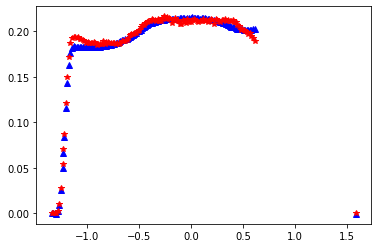

In [33]:
plt.plot(test_pos[0],list(prediction[0]),"b^")
plt.plot(test_pos[0],test_gt[0],"r*")